# I want to see whether the frequency of word occurence in titles of the journal "Cell" follows specific trends 

In [ ]:
### install required packages

#install.packages('tidyverse')
#install.packages('ggplot2')
#install.packages('curl')
#install.packages('tm')
#install.packages("tidytext")
#install.packages("nortest")



In [1]:
### Load necessary libraries and data
library(dplyr)
library(tidyr)
library(stringr)
library(readr)

# Load the CSV file with specified encoding
url <- "https://raw.githubusercontent.com/TomatoGreen2/WebScrapping-Dashboarding-Regression/main/ScientJournalTileScrapping/CellArticleTitles.csv"
data <- read_csv(url)

print(data[1:10,])


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  X1 = col_double(),
  Titles = col_character(),
  Years = col_double()
)


# A tibble: 10 x 3
      X1 Titles                                                            Years
   <dbl> <chr>                                                             <dbl>
 1     0 Tumor-associated macrophages trigger MAIT cell dysfunction at th~  2023
 2     1 A conserved family of immune effectors cleaves cellular ATP upon~  2023
 3     2 An ethical framework for human embryology with embryo models.      2023
 4     3 Insights and strategies for improving equity in graduate school ~  2023
 5     4 "RNA \"COURIERs\": Enabling synthetic cell-to-cell communication~  2023
 6     5 The calvaria stands alone: Unique aspects of the skull bone marr~  2023
 7     6 Herpes simplex virus gene therapy for dystrophic epidermolysis b~  2023
 8     7 Adaptive evolution of the enigmatic Takakia now facing climate c~  2023
 9     8 Distinct molecular profiles of skull bone marrow in health and n~  2023
10     9 Repeat polymorphisms underlie top genetic risk loci for glaucoma~  2023


In [2]:
### define manually words that often occur in the titles but may be irrelevant as biological buzzwords

stopwords <- c("among", "amino", "way", "within", "you", "your", "3d", "x", "ß", "a", "we", 
               "when", "what", "1", "3", "not", "upon", "and", "the", "of", "in", "for", "with", 
               "a", "an", "as", "at", "inâ", "t", "to", "research", "from", "by", "is", "on", "into", 
               "that", "are", "against", "during", "via", "about", "1", "2", "3", "4", "5", "aaa", "across",
               "1", "3", "aaa", "acid", "acids", "acquisition", "act", "action", "actions", "activate", "activates", 
               "activation", "activator", "active", "activities", "activity", "acts", "african", "after", "all", "altered", 
               "alternative", "american", "aml", "analyses", "analysis", "applications", "approach", "approaches", "architecture", 
               "asymmetry", "attachment", "b", "back", "balance", "bar", "barrier", "barriers", "base", "basic", "basis", "be",  "beige", 
               "beta", "between", "beyond", "big", "binding", "binds", "biological", "biology", "blockade", "blocking", "blocks", "both", 
               "bound", "branching", "break", "breaking", "breaks", "brown", "building", "but", "c", "cc", "ca2", "calcium", "can", "capacity", 
               "capture", "cargo", "cause", "causes", "cell", "center", "central", "chain", 
               "challenges", "change", "changes", "characterization", "charting", "chemical", "choice", "comes", "coming", "common", 
               "communication", "comparative", "complex", "confers", "consequences", "contact", "contacts", "cord", "core", "creating", 
               "critical", "ctcf", "de", "delivery", "delta", "depends", "design", "detection", "differences", "different", "direct", "directly", 
               "dna", "do", "does", "domain", "domains", "double", "down", "e", "e3", "early", "electron", "element", "elements", "end", "ends", 
               "er", "es", "extensive", "facilitate", "facilitates", "fast", "field", "finding", "first", "g", "get" ,"gets", "getting", "go",
               "goes", "good", "ground", "group", "has", "heat", "high", "highly", "how", "hybrid", "i", "identification", "identified", 
               "idol", "ii", "iii", "impact", "impacts", "impaired", "implications", "important", "improves", "individuals", "information", 
               "innate", "inner", "inside", "insight", "insights", "insulin", "intact", "invasion", "ion", "iron", "it", "its", "journey", 
               "just", "k", "keeping", "key", "large", "leading", "leads", "learning", "length", "lessons", "levels", "life", "light", "living", 
               "logic", "long", "major", "make", "makes", "making", "manner", "master", "matters", "meets", "molecular", "molecule", "molecules", 
               "more", "most", "motion", "movement", "nascent", "native", "natural", "negative", "new", "next", "nk", "no", "notice", "novel", 
               "novo", "old", "one", "open", "or",  "out", "outer", "over", "oxygen", "p", "parallel", "partner", "past", "patients", "perspective", 
               "population", "populations", "potential", "precision", "prevents", "preview", "principles", "problem", "pulling", "questions", 
               "research", "retraction", "reveal", "revealed", "reveals", "rewiring", "rhesus", "ribosomal", "ring", "risk", "s", "science", 
               "scientific", "severe", "shape", "shaped", "size", "small", "specific", "specification", "stability", "stable", "step", "steps", 
               "studies", "study", "take", "takes", "than", "their", "to", "together", "tolerance", "tools", "touch", "toward", "trained", 
               "turning", "two", "uncovers", "under", "underlies", "underlying", "understanding", "unexpected", "unfolded", "unique", 
               "up", "uptake", "use", "using", "value", "versus", "view", "viral", "virulence", "visual", "visualizing", "where", "white", 
               "will", "without", "world", "years", "a", "ß")                   

In [3]:
### use the package tm to remove unwanted words

# Load required library
library(tm)

# Create a Corpus from the Titles column
corpus <- Corpus(VectorSource(data$Titles))

# Preprocessing function
preprocess_text <- function(corpus) {
  corpus <- tm_map(corpus, content_transformer(tolower))              # Convert to lowercase
  corpus <- tm_map(corpus, removePunctuation)                         # Remove punctuation
  corpus <- tm_map(corpus, removeNumbers)                             # Remove numbers
  corpus <- tm_map(corpus, removeWords, stopwords)                   # Remove stopwords
  corpus <- tm_map(corpus, stripWhitespace)                          # Strip extra whitespace
  return(corpus)
}

# Apply the preprocessing function to the Corpus
preprocessed_corpus <- preprocess_text(corpus)

# Extract the processed text from the Corpus
processed_text <- sapply(preprocessed_corpus, as.character)

# Print the processed text to check
#print(processed_text)

Warning message:
"package 'tm' was built under R version 3.6.3"Loading required package: NLP
Warning message:
"package 'NLP' was built under R version 3.6.3"Warning message in tm_map.SimpleCorpus(corpus, content_transformer(tolower)):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, removeNumbers):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, removeWords, stopwords):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, stripWhitespace):
"transformation drops documents"

In [4]:
### check output

print(processed_text[2])

[1] " conserved family immune effectors cleaves cellular atp infection"


In [5]:
#### Combine preprocessed_text with Years column

library(tidyverse)
library(tidytext)
 
combined_data <- data.frame(PreprocessedText = processed_text, Years = data$Years)

# check data type
#str(combined_data)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1     v purrr   0.3.2
v tibble  2.1.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x ggplot2::annotate() masks NLP::annotate()
x dplyr::filter()     masks stats::filter()
x dplyr::lag()        masks stats::lag()


In [6]:
### create a new dataframe in which single words are listed with the year of their occurence

# Convert "PreprocessedText" to character vector
combined_data$PreprocessedText <- as.character(combined_data$PreprocessedText)

# Unnest the words while retaining the Year
unnested_data <- combined_data %>%
  unnest_tokens(output = "word", input = PreprocessedText)


In [7]:
# Print the unnested data to check
print(unnested_data)

        Years                              word
1        2023                   tumorassociated
1.1      2023                       macrophages
1.2      2023                           trigger
1.3      2023                              mait
1.4      2023                       dysfunction
1.5      2023                               hcc
1.6      2023                          invasive
1.7      2023                            margin
2        2023                         conserved
2.1      2023                            family
2.2      2023                            immune
2.3      2023                         effectors
2.4      2023                           cleaves
2.5      2023                          cellular
2.6      2023                               atp
2.7      2023                         infection
3        2023                           ethical
3.1      2023                         framework
3.2      2023                             human
3.3      2023                        emb

In [13]:
### count the frequency of words per year and filter for words that occurred at least 10 years in a row

# Load required libraries
library(dplyr)

# Count the frequency of words per year
word_frequency <- unnested_data %>%
  group_by(word, Years) %>%
  tally()

# Filter for words that occurred 10 years in a row
filtered_words <- word_frequency %>%
  group_by(word) %>%
  mutate(consecutive_years = Years - lag(Years) == 1) %>%
  group_by(word, consecutive_years) %>%
  filter(sum(consecutive_years) >= 9) %>%
  ungroup()

# Get the list of words that occurred at least 10 years in a row
selected_words <- filtered_words %>%
  distinct(word) %>%
  pull()

# Create a dataframe with all years and selected words
years_all <- seq(min(filtered_words$Years), max(filtered_words$Years))
result_dataframe <- expand.grid(Years = years_all, Word = selected_words)

# Join the word frequency data to the result dataframe
result_dataframe <- result_dataframe %>%
  left_join(filtered_words, by = c("Years" = "Years", "Word" = "word")) %>%
  select(Years, Word, frequency = n)

# Fill NA values with 0
result_dataframe[is.na(result_dataframe)] <- 0

# Print the result dataframe
print(selected_words)


Warning message:
"Column `Word`/`word` joining factor and character vector, coercing into character vector"

  [1] "acetylation"       "actin"             "adaptation"       
  [4] "adaptive"          "adult"             "aging"            
  [7] "allosteric"        "alzheimers"        "antibodies"       
 [10] "antibody"          "antigen"           "antiviral"        
 [13] "apoptosis"         "arabidopsis"       "assembly"         
 [16] "associated"        "atlas"             "autophagy"        
 [19] "axis"              "bacteria"          "bacterial"        
 [22] "behavior"          "behaviors"         "biogenesis"       
 [25] "blood"             "body"              "bone"             
 [28] "brain"             "breast"            "cancer"           
 [31] "cancers"           "cd"                "cellcycle"        
 [34] "cells"             "cellular"          "channel"          
 [37] "channels"          "checkpoint"        "chromatin"        
 [40] "chromosomal"       "chromosome"        "circadian"        
 [43] "circuit"           "class"             "cleavage"         
 [46] "cli

In [9]:
print(result_dataframe)

     Years              Word frequency
1     2006       acetylation         0
2     2007       acetylation         0
3     2008       acetylation         0
4     2009       acetylation        12
5     2010       acetylation         3
6     2011       acetylation         6
7     2012       acetylation         6
8     2013       acetylation         6
9     2014       acetylation        12
10    2015       acetylation         0
11    2016       acetylation         0
12    2017       acetylation         0
13    2018       acetylation         6
14    2019       acetylation         3
15    2020       acetylation         3
16    2021       acetylation         0
17    2022       acetylation         0
18    2023       acetylation         0
19    2006             actin         9
20    2007             actin        21
21    2008             actin         9
22    2009             actin         0
23    2010             actin         0
24    2011             actin         6
25    2012             ac

In [16]:
### only keep words with a maximun frequency >= 30

# Load the dplyr package
library(dplyr)

# Calculate the maximum frequency for each unique Word
max_freq_per_word <- result_dataframe %>%
  group_by(Word) %>%
  summarise(max_frequency = max(frequency, na.rm = TRUE))

# Filter out rows with max_frequency below 30
filtered_data <- result_dataframe %>%
  inner_join(max_freq_per_word, by = "Word") %>%
  filter(max_frequency >= 30)

# Select the desired columns
filtered_data <- filtered_data %>%
  select(Word, Years, frequency)

# Show results
print(filtered_data)

                Word Years frequency
1         antibodies  2006         0
2         antibodies  2007         0
3         antibodies  2008         0
4         antibodies  2009         0
5         antibodies  2010         0
6         antibodies  2011         0
7         antibodies  2012         3
8         antibodies  2013         3
9         antibodies  2014        15
10        antibodies  2015        21
11        antibodies  2016        33
12        antibodies  2017         9
13        antibodies  2018        15
14        antibodies  2019         9
15        antibodies  2020        45
16        antibodies  2021        63
17        antibodies  2022        12
18        antibodies  2023         0
19          antibody  2006         0
20          antibody  2007         0
21          antibody  2008         0
22          antibody  2009         3
23          antibody  2010         3
24          antibody  2011         0
25          antibody  2012         0
26          antibody  2013         0
2

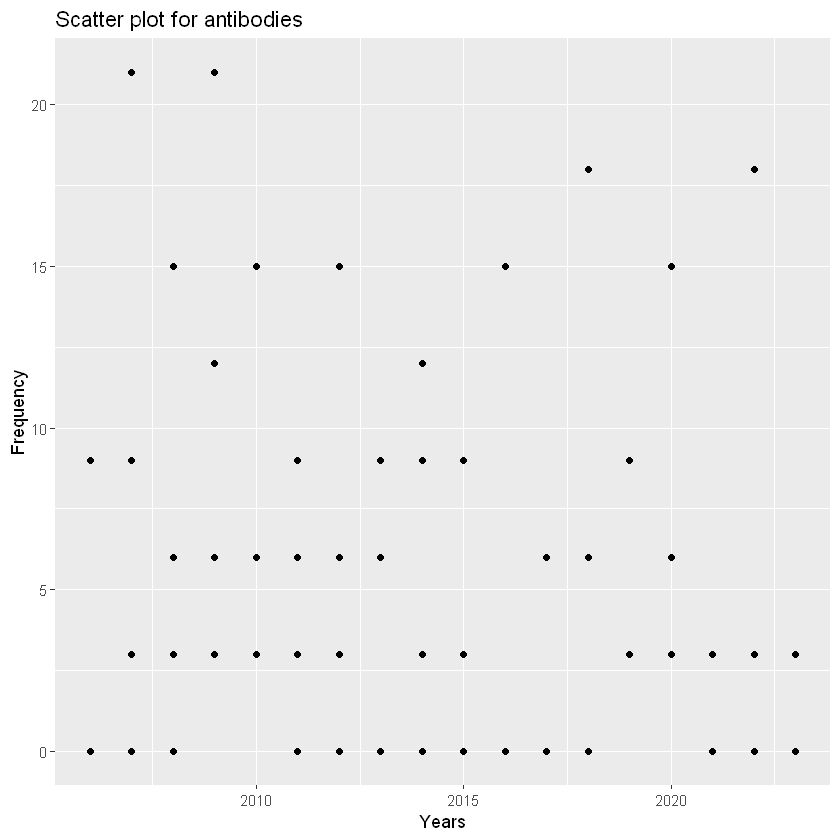

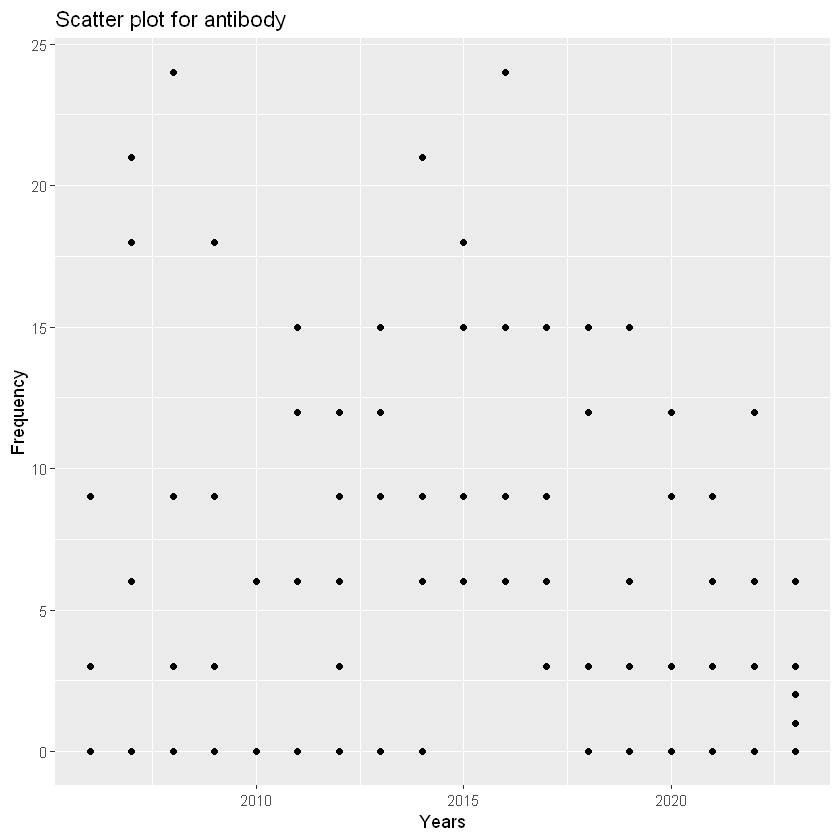

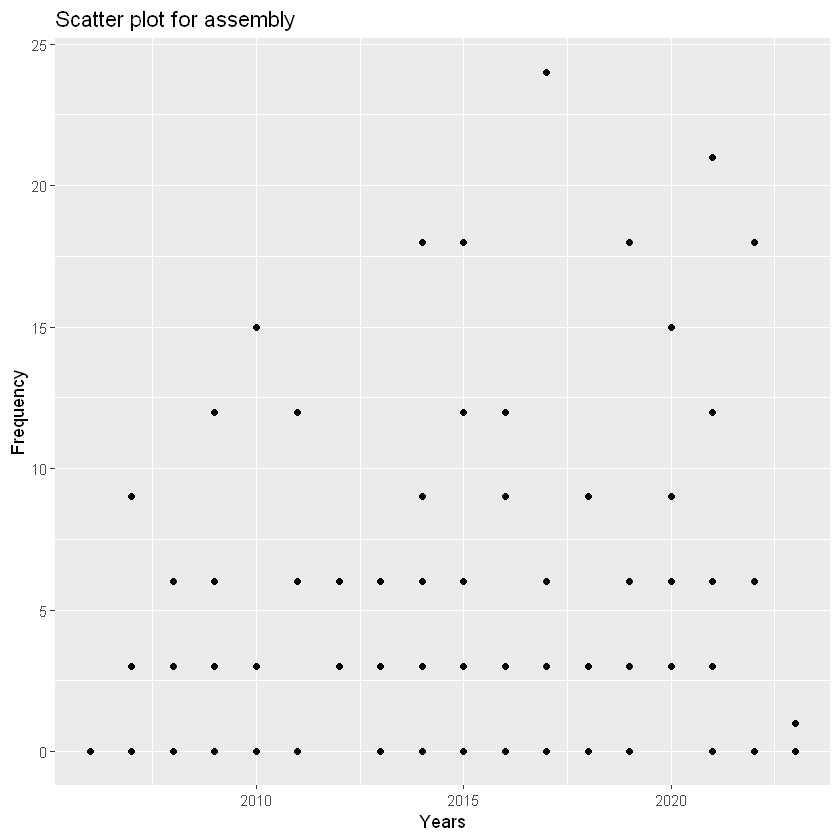

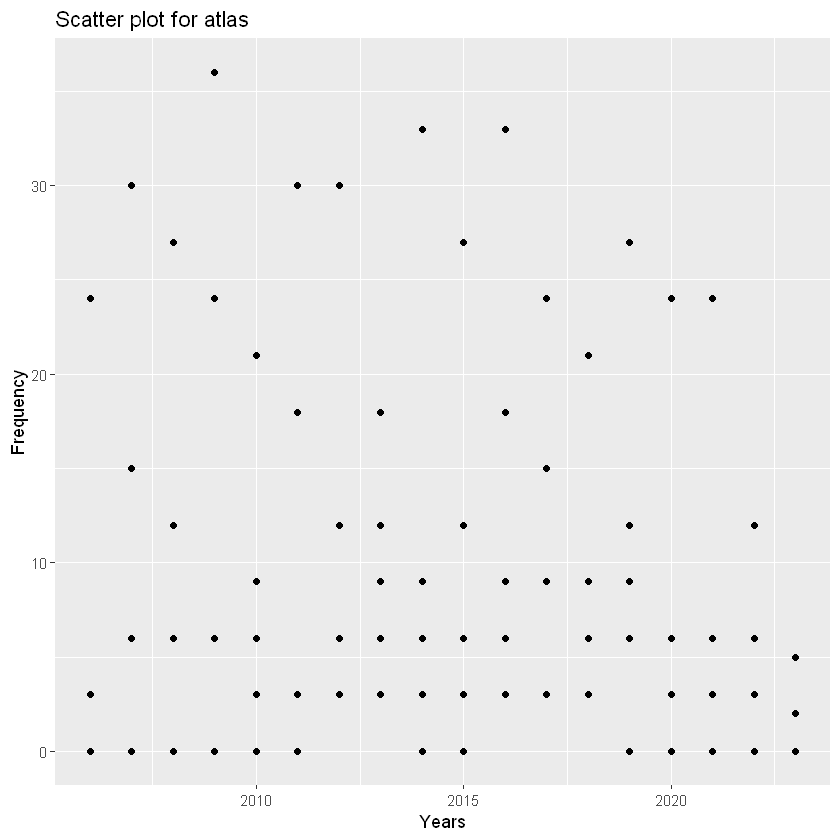

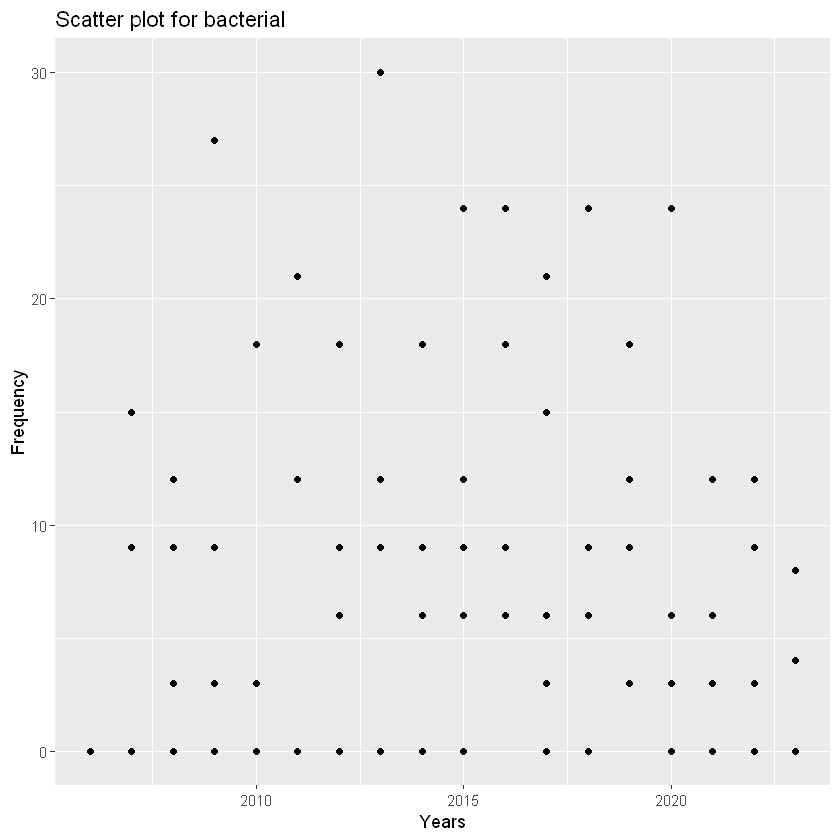

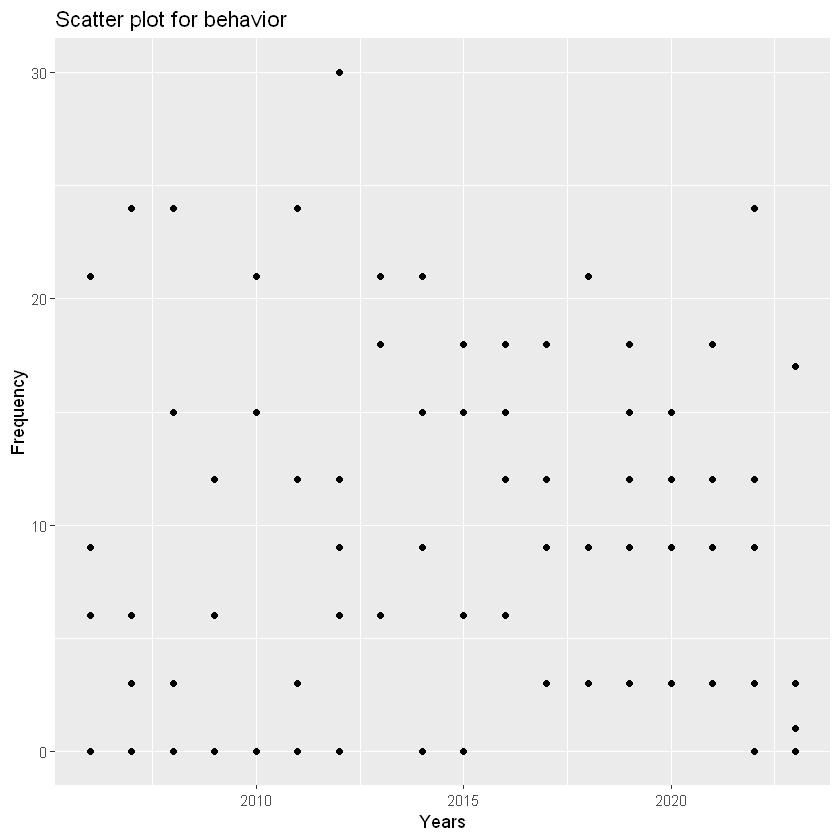

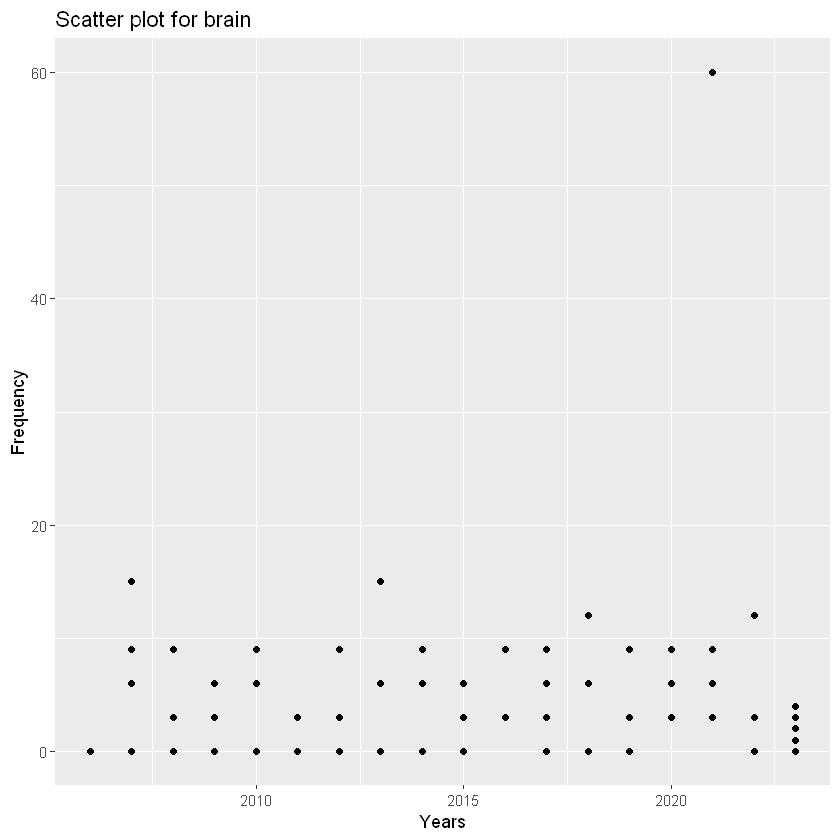

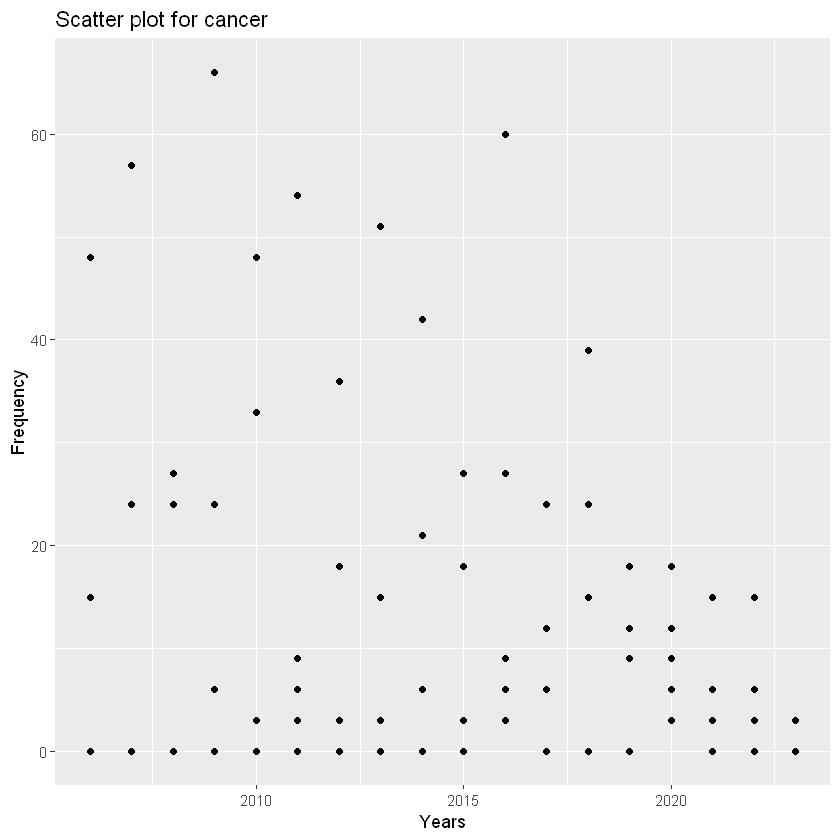

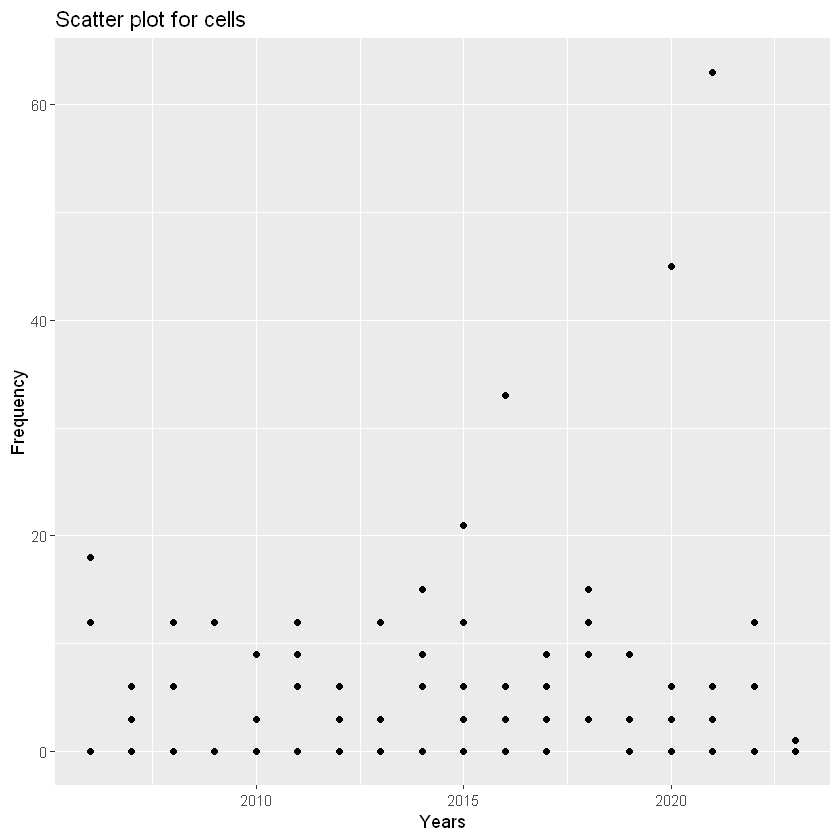

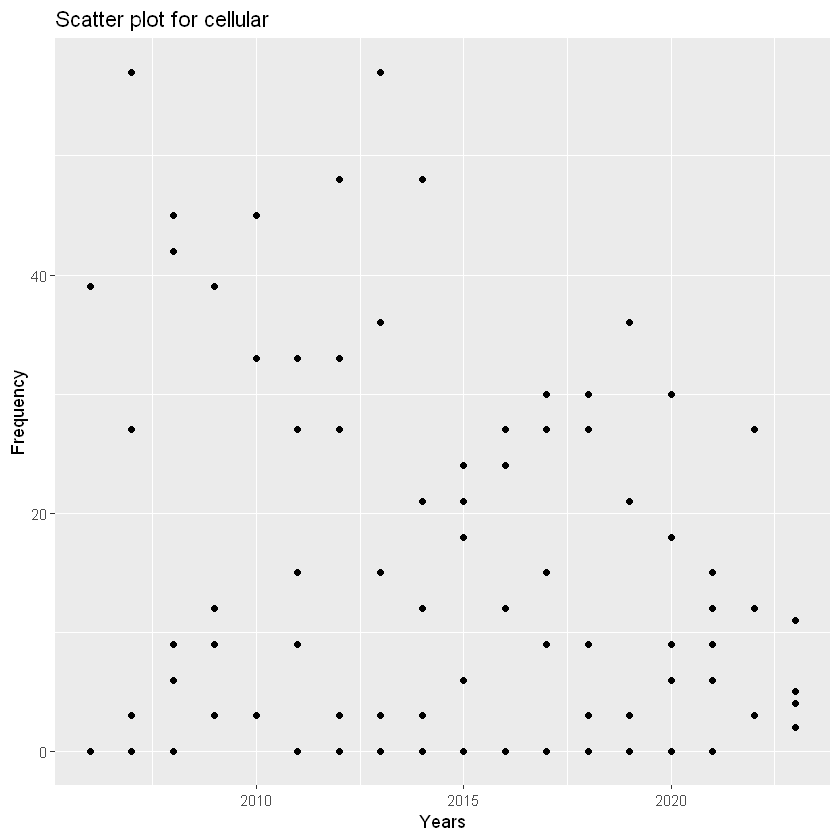

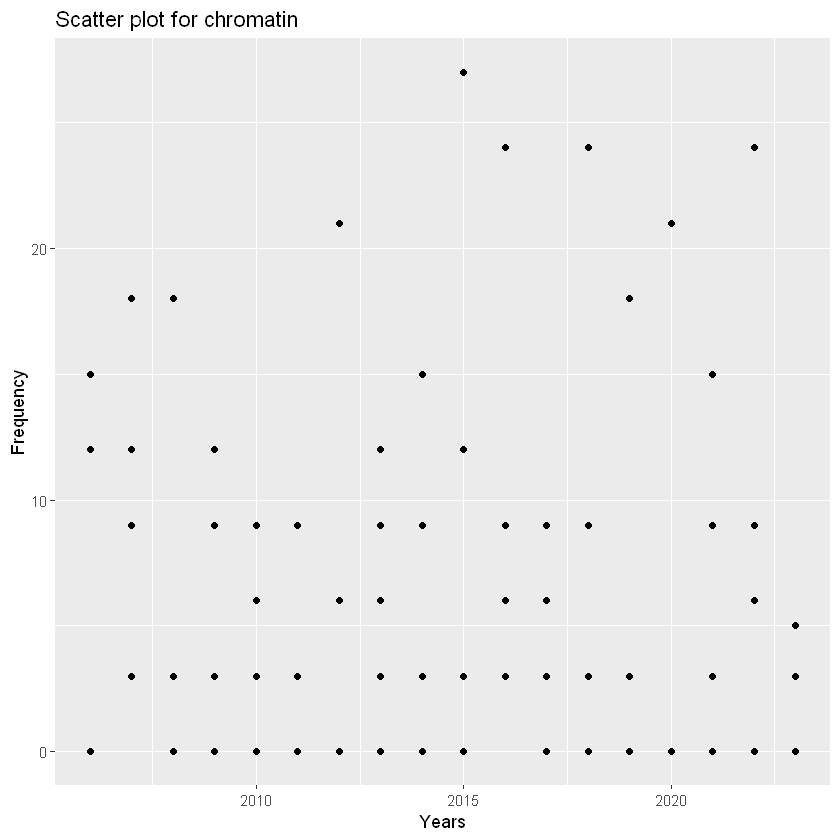

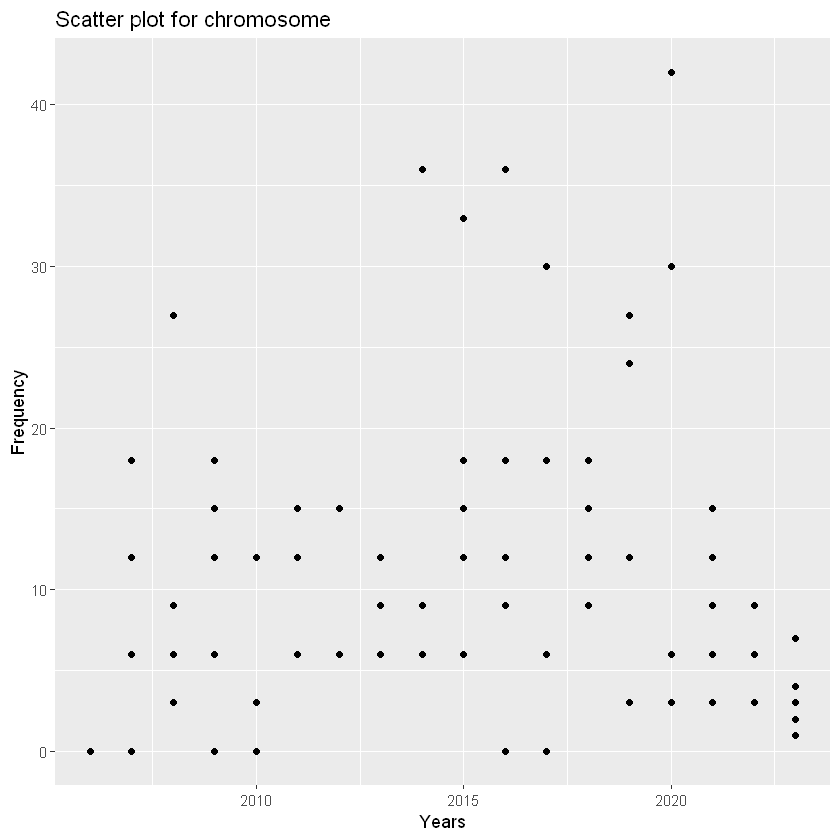

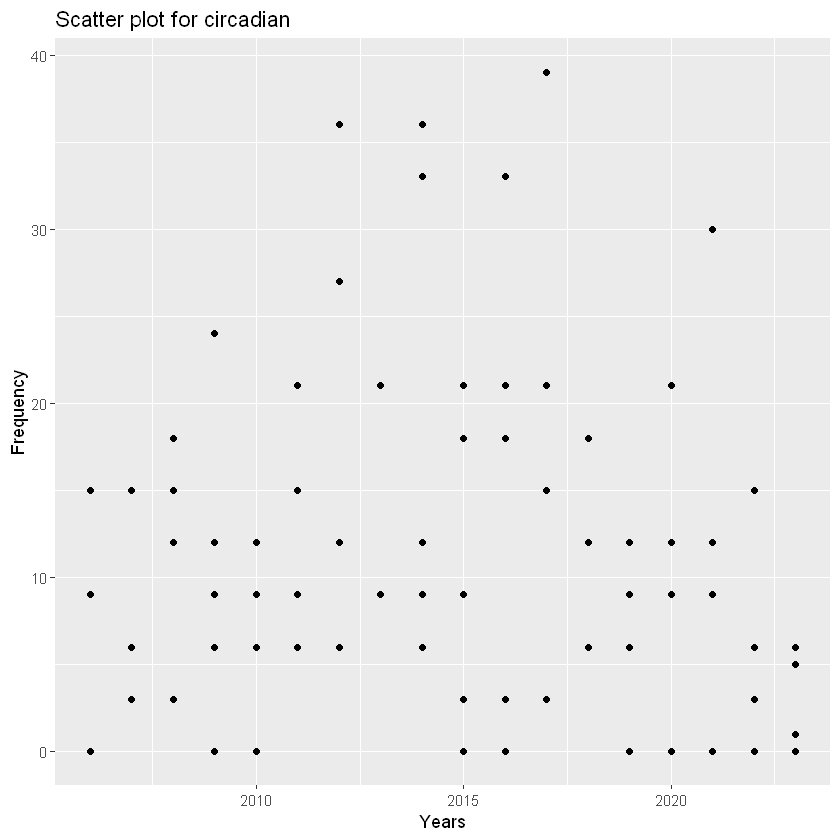

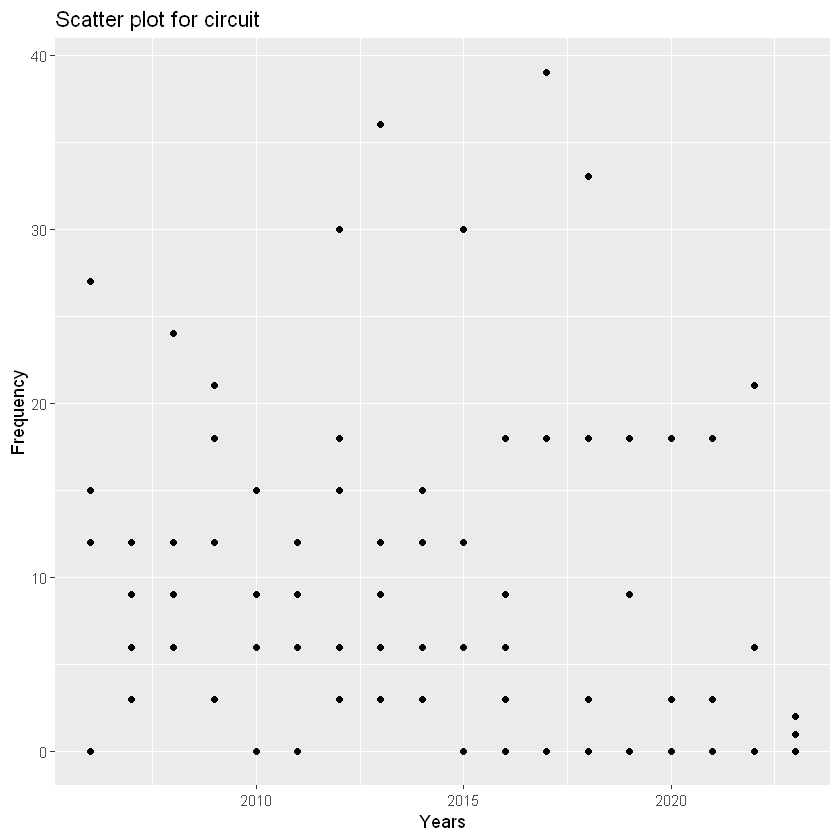

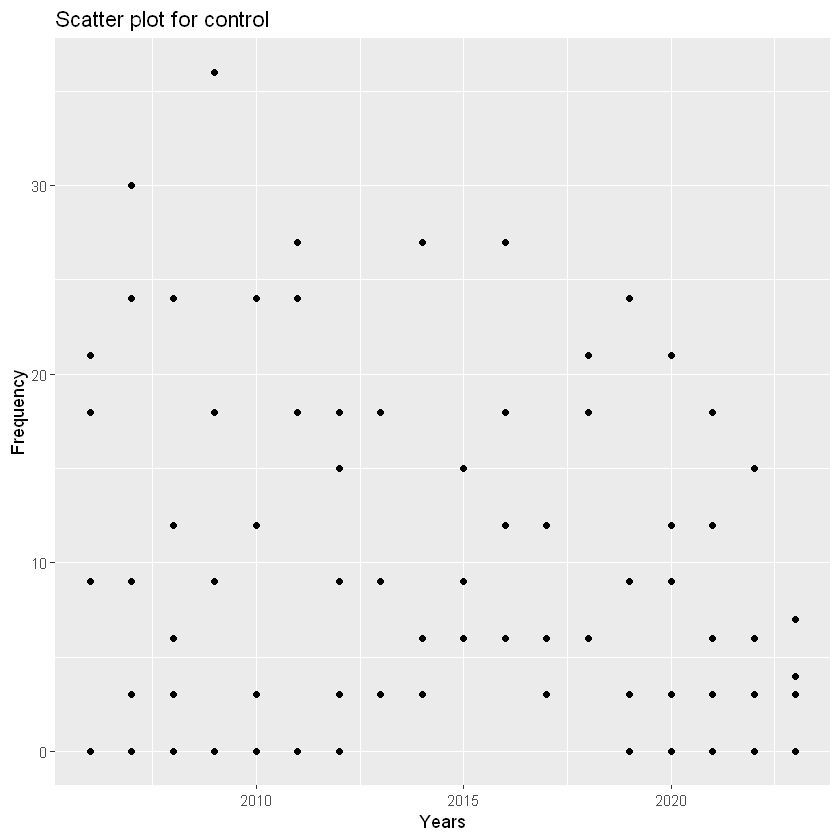

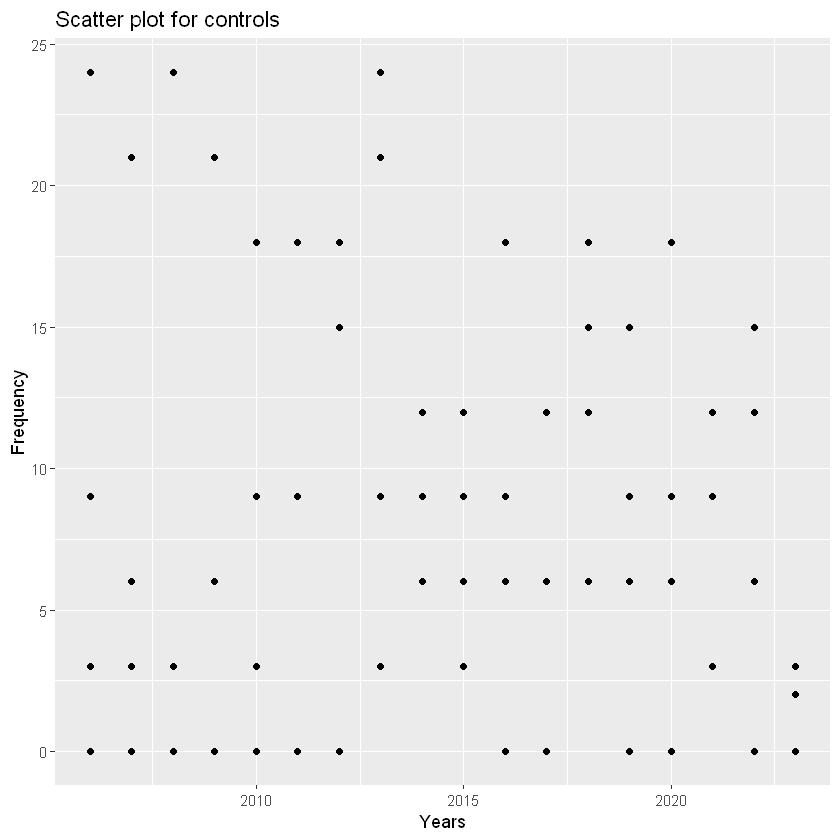

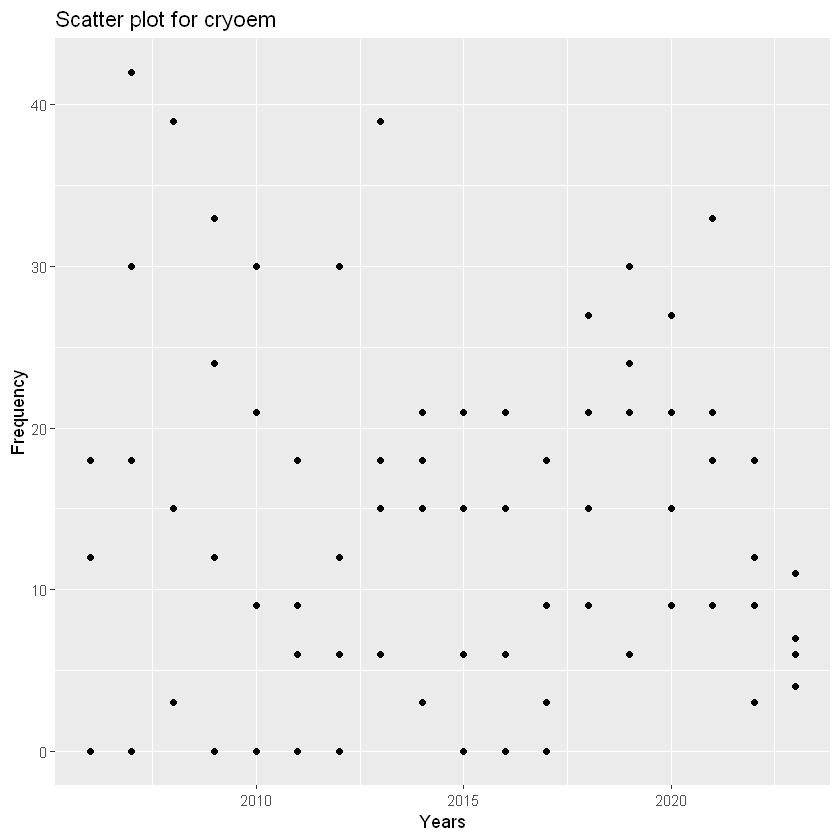

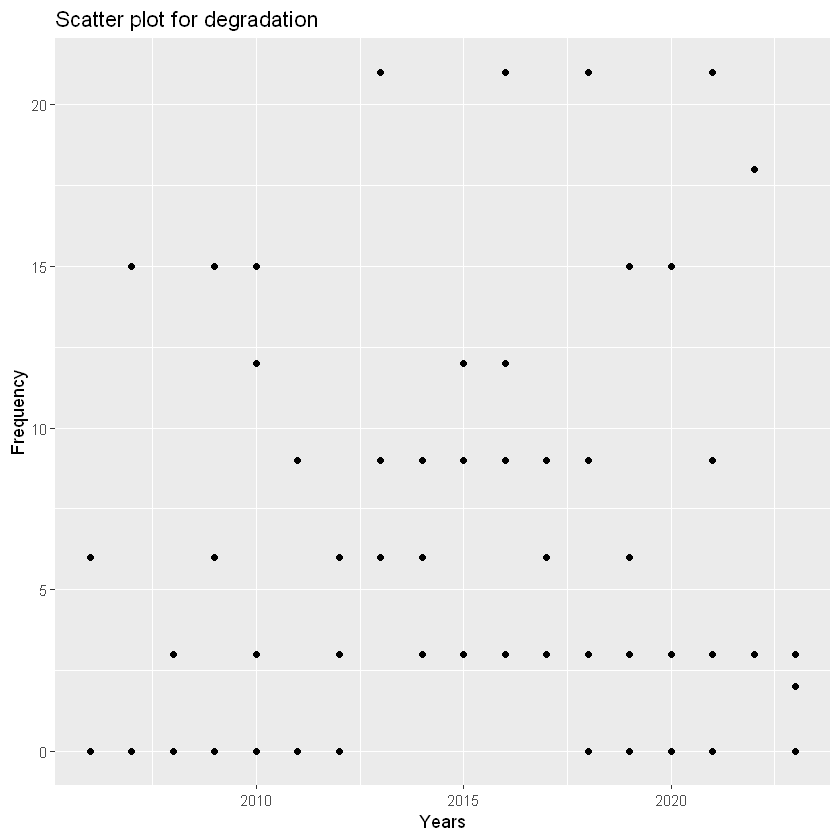

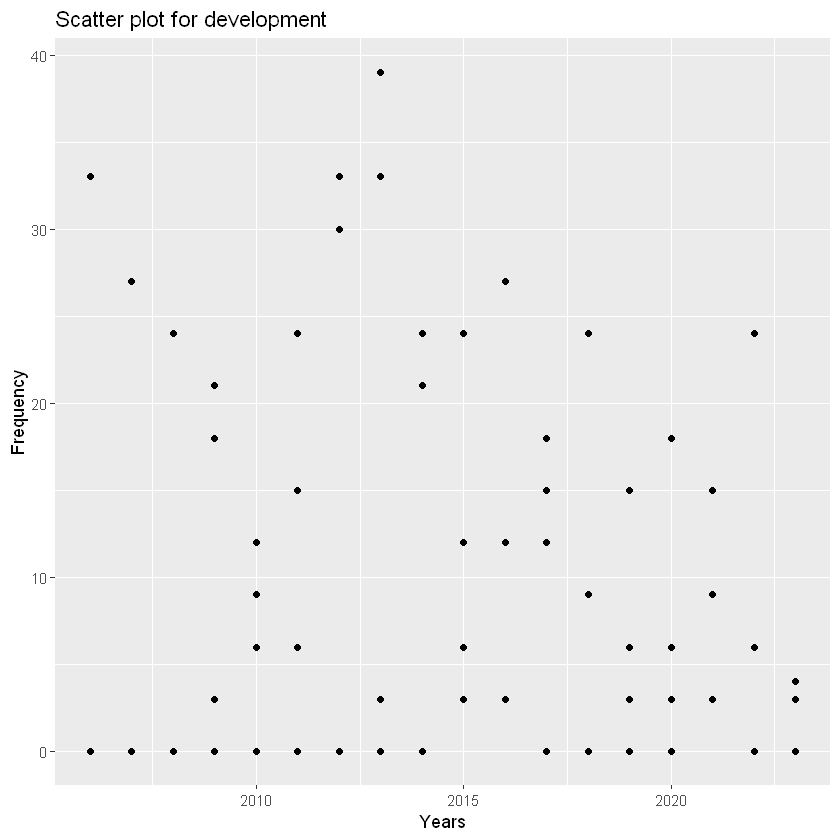

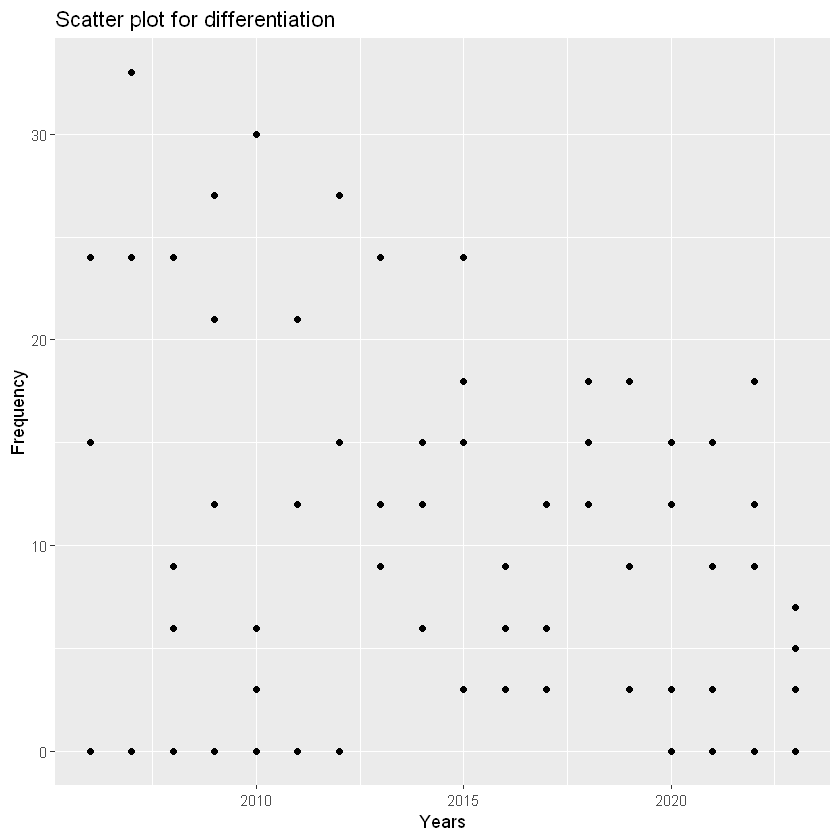

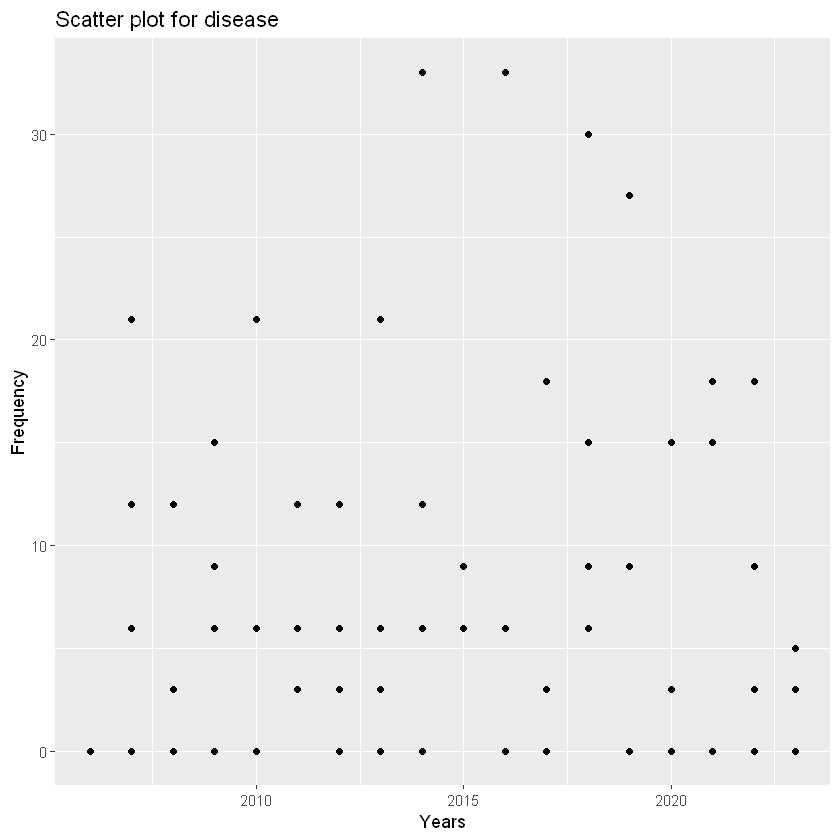

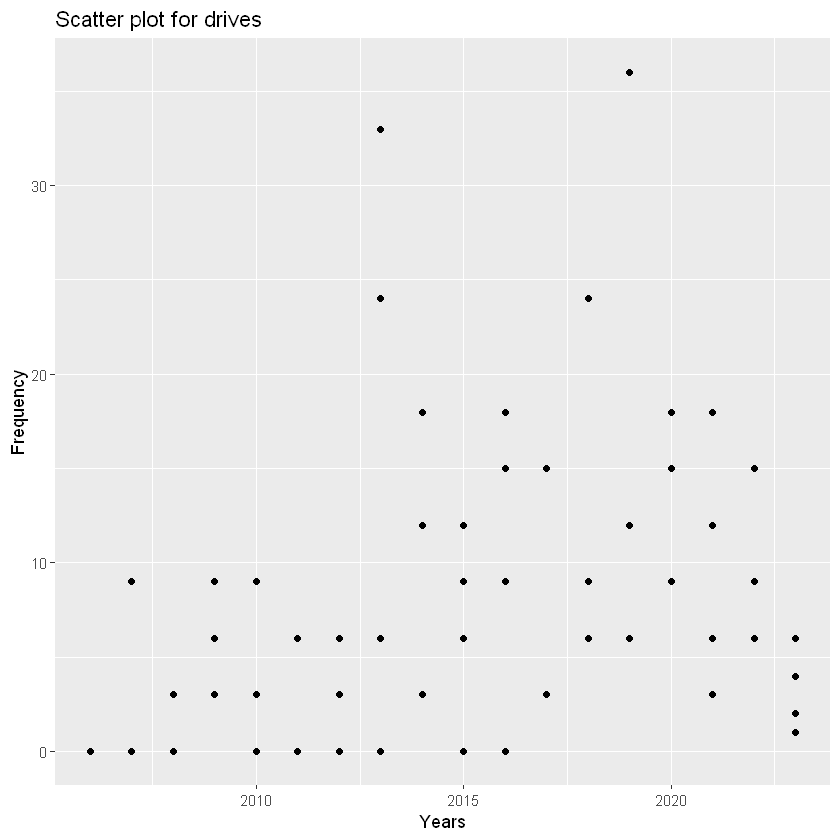

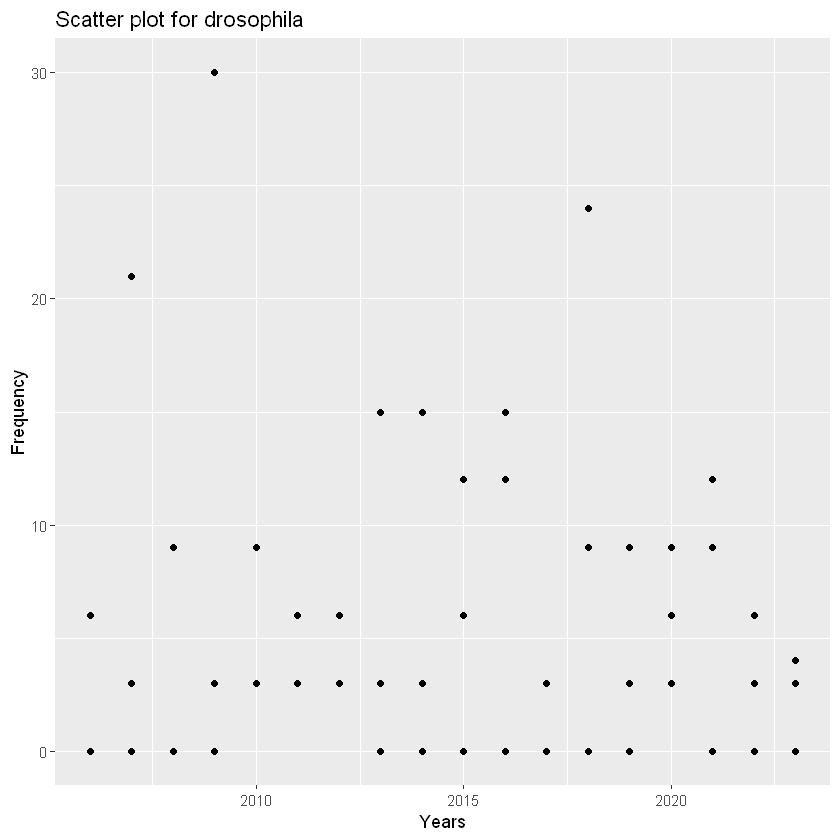

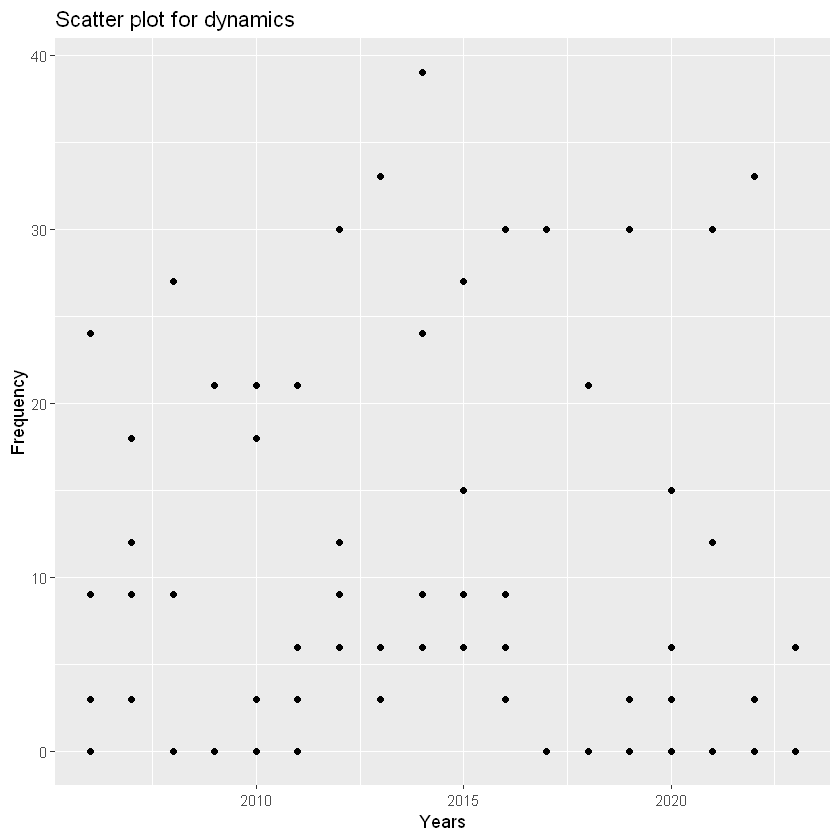

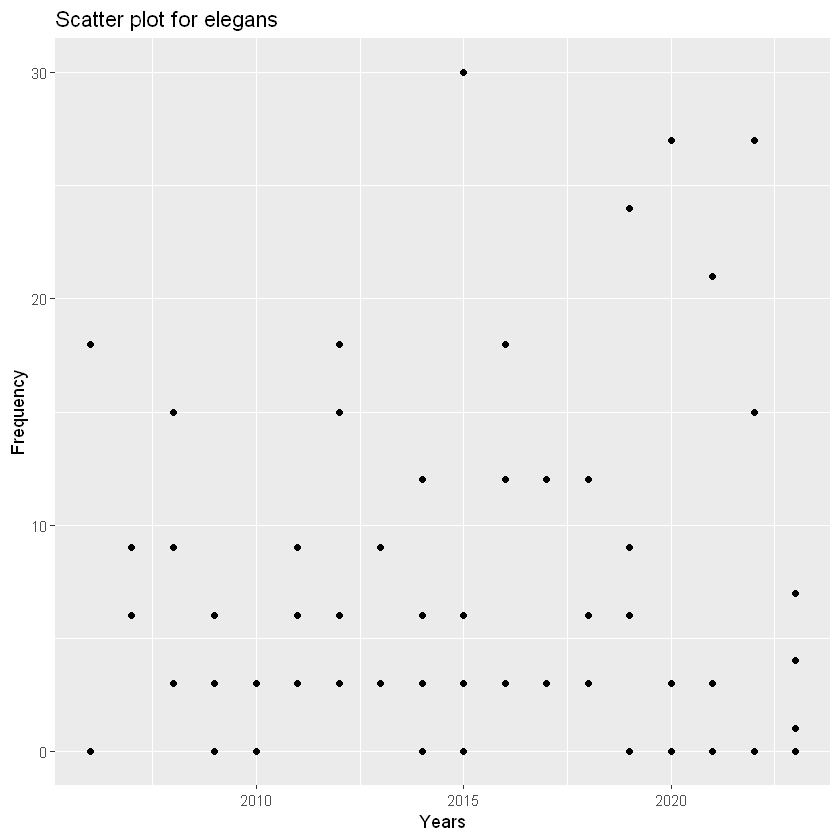

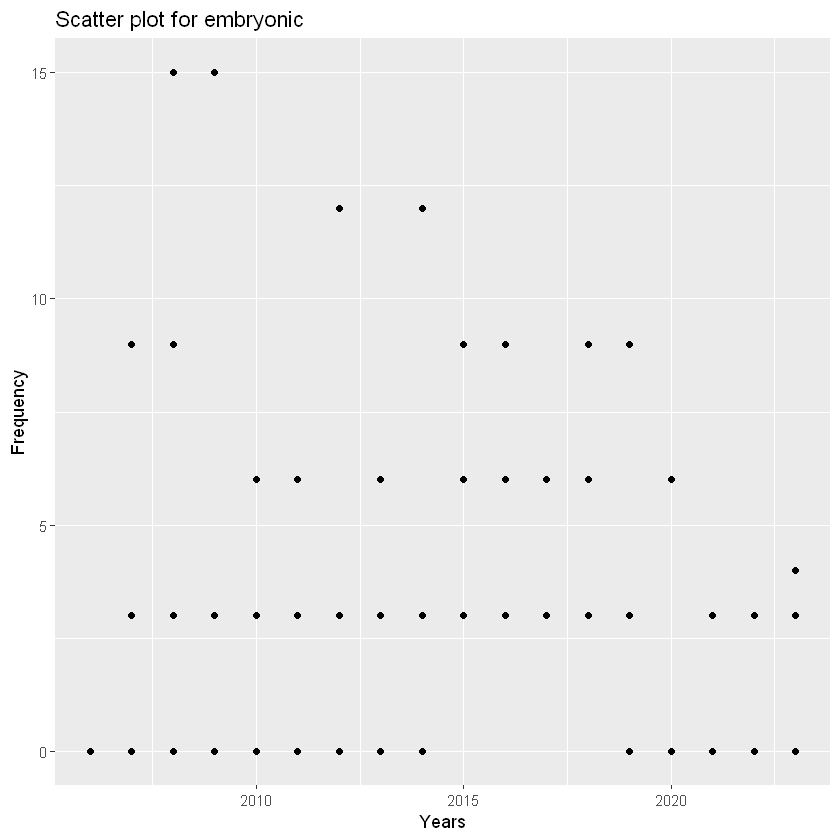

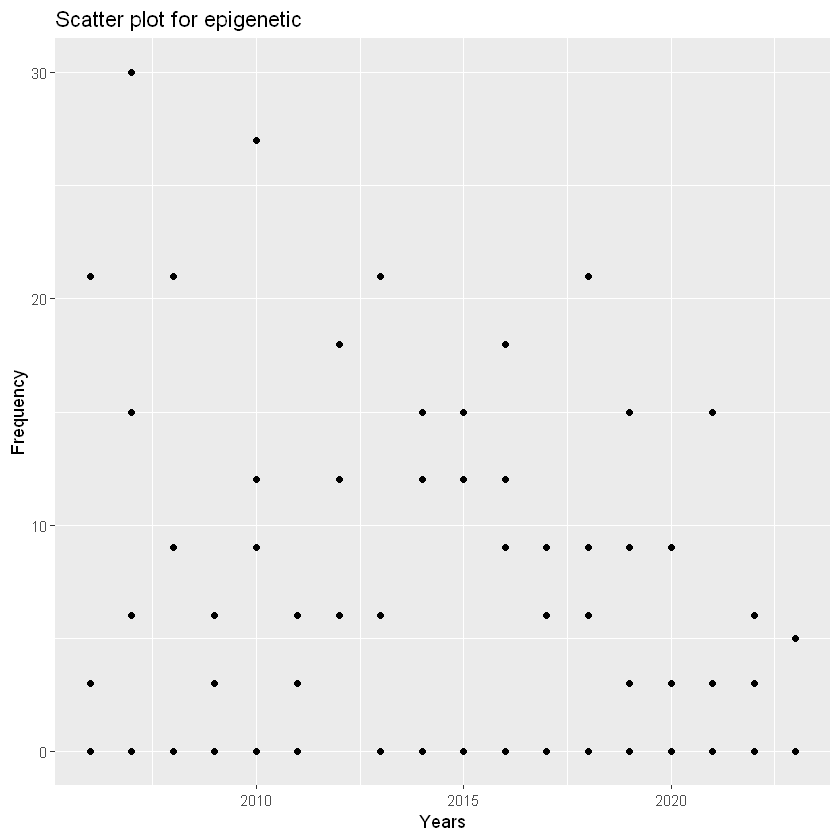

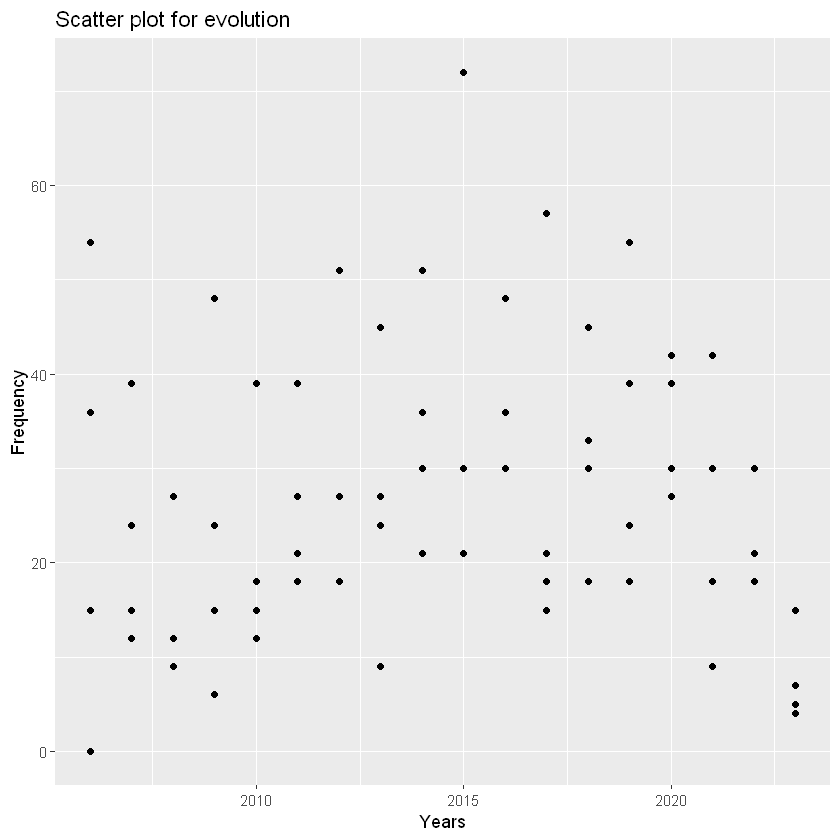

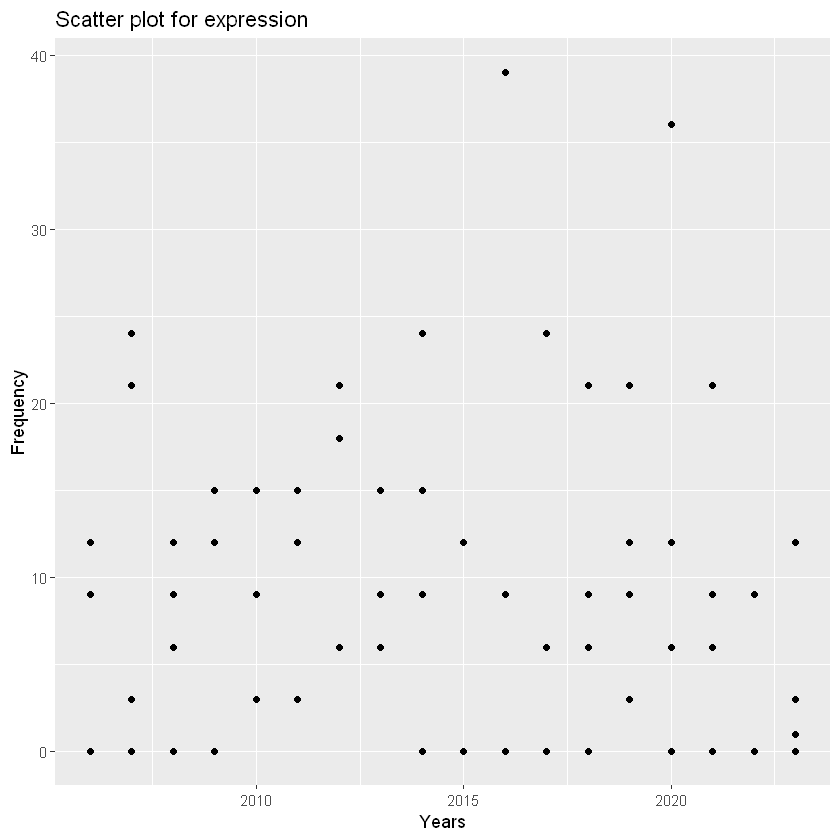

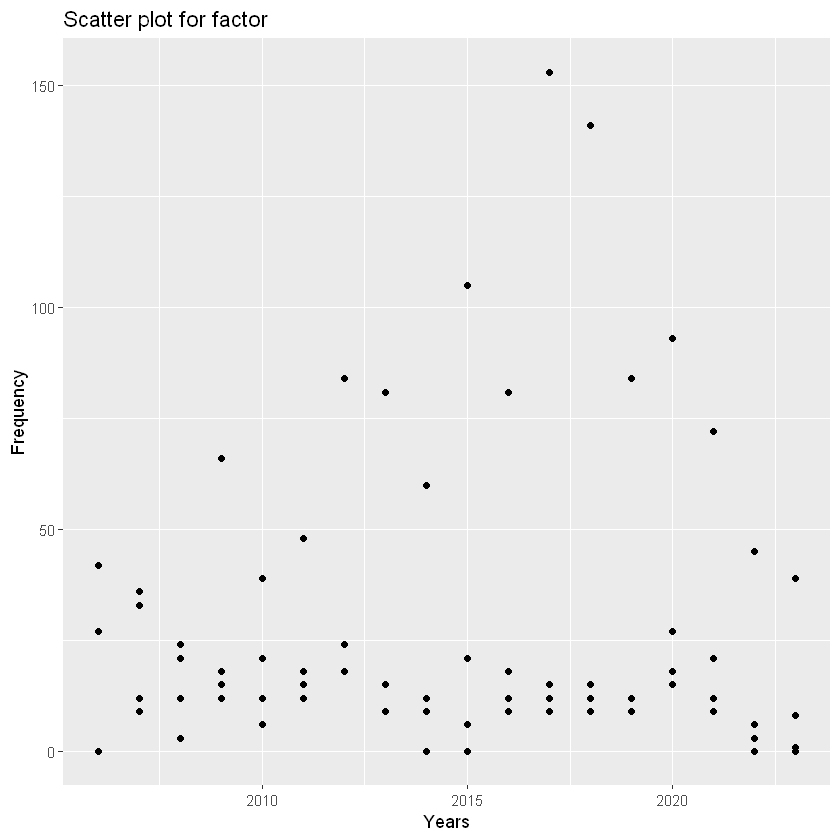

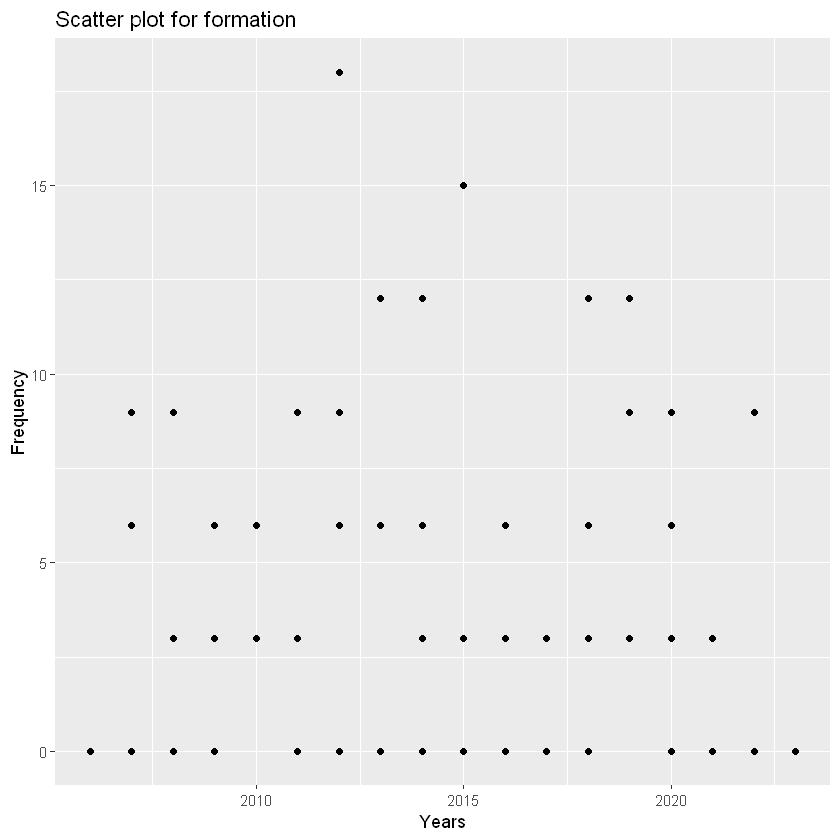

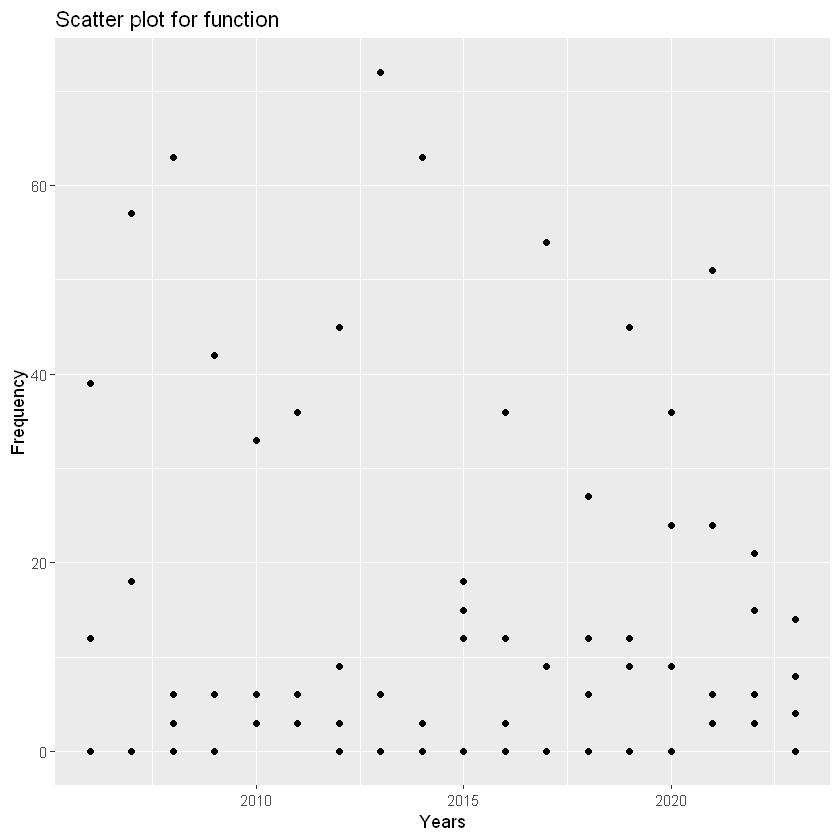

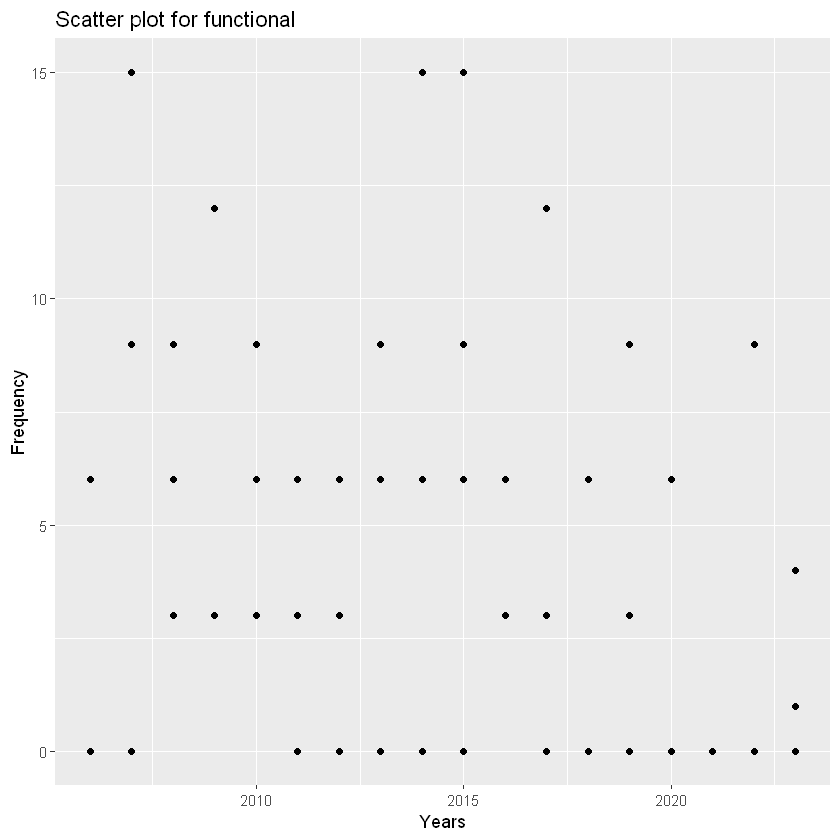

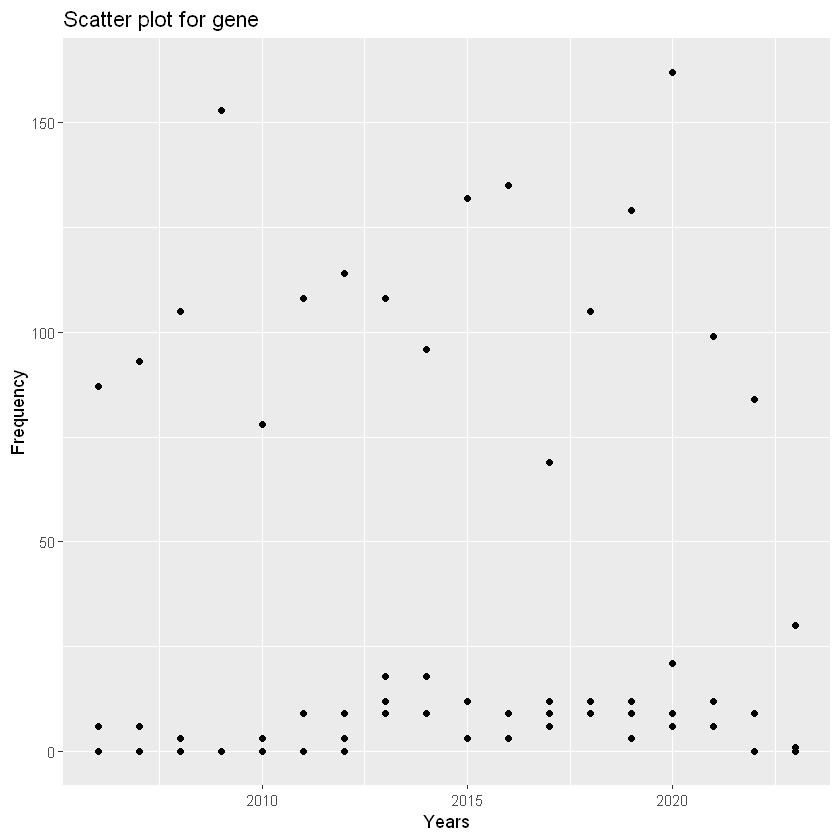

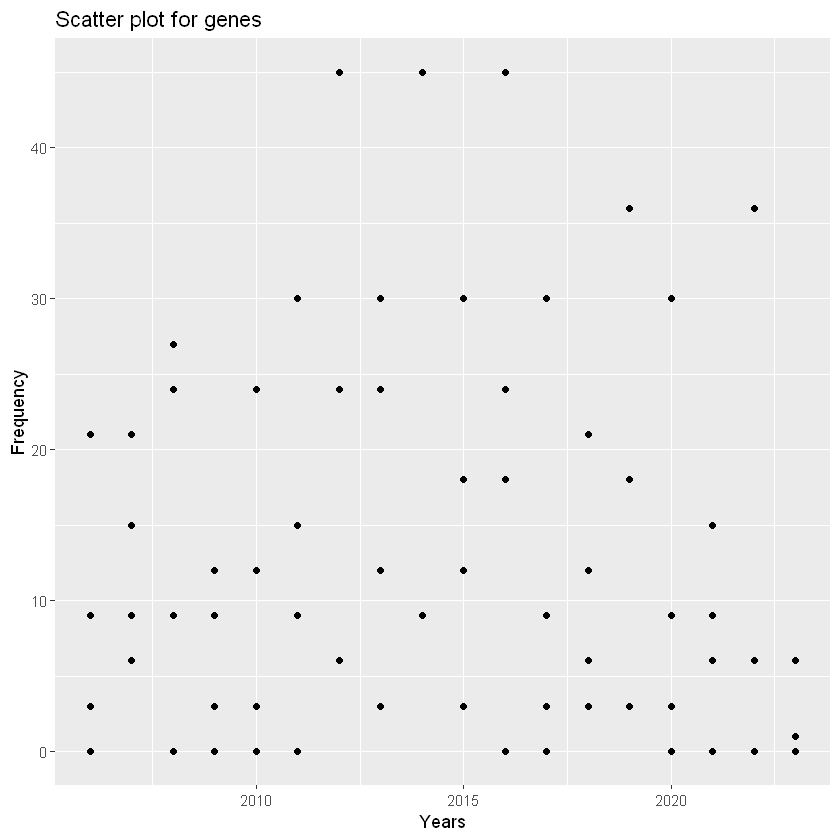

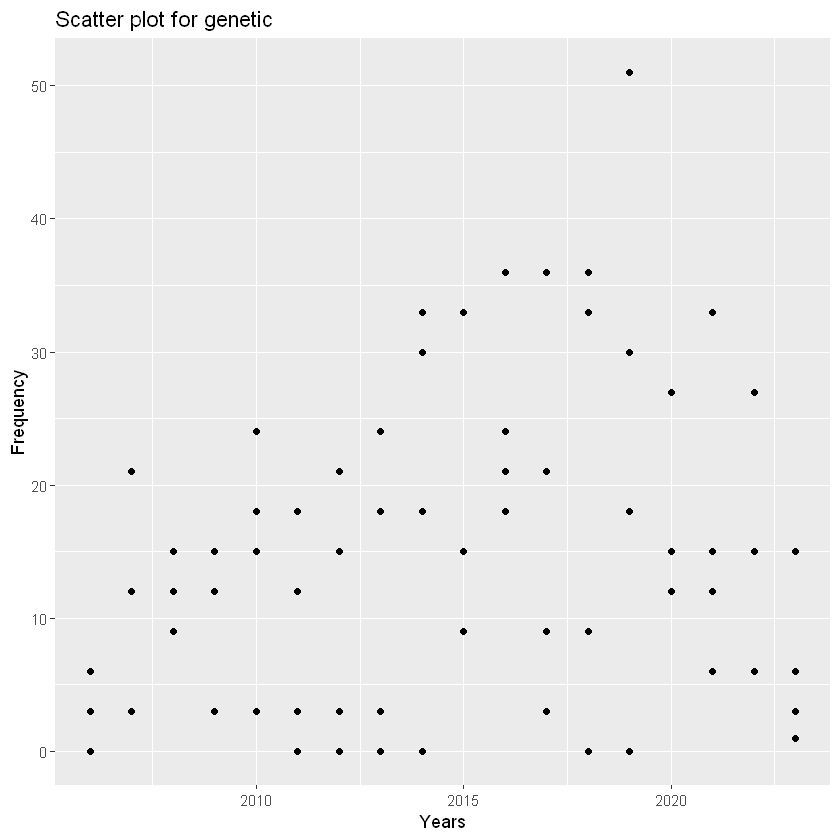

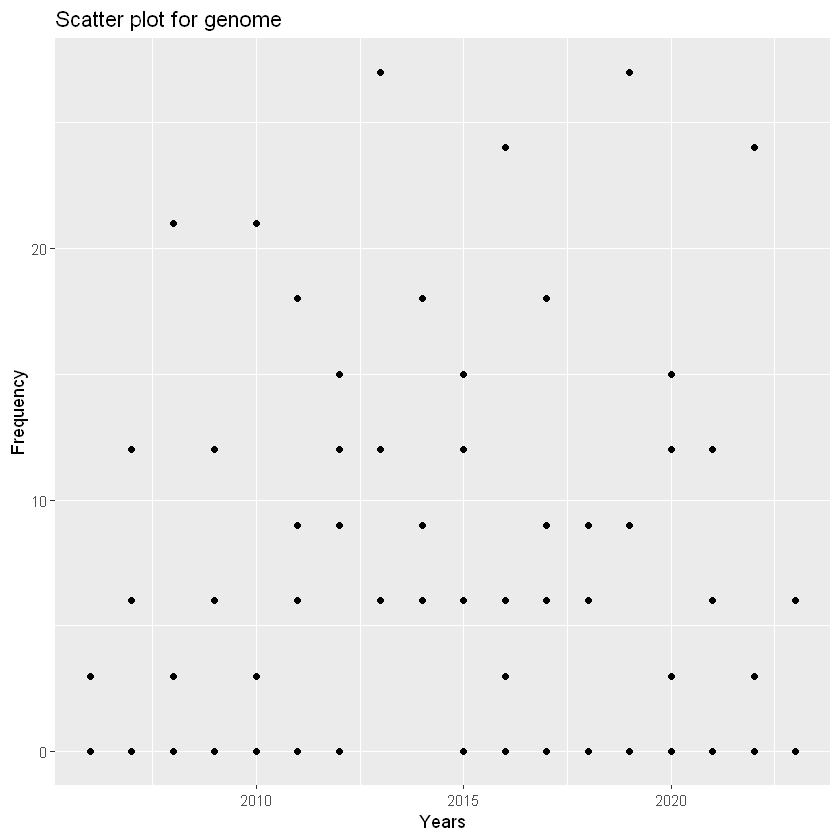

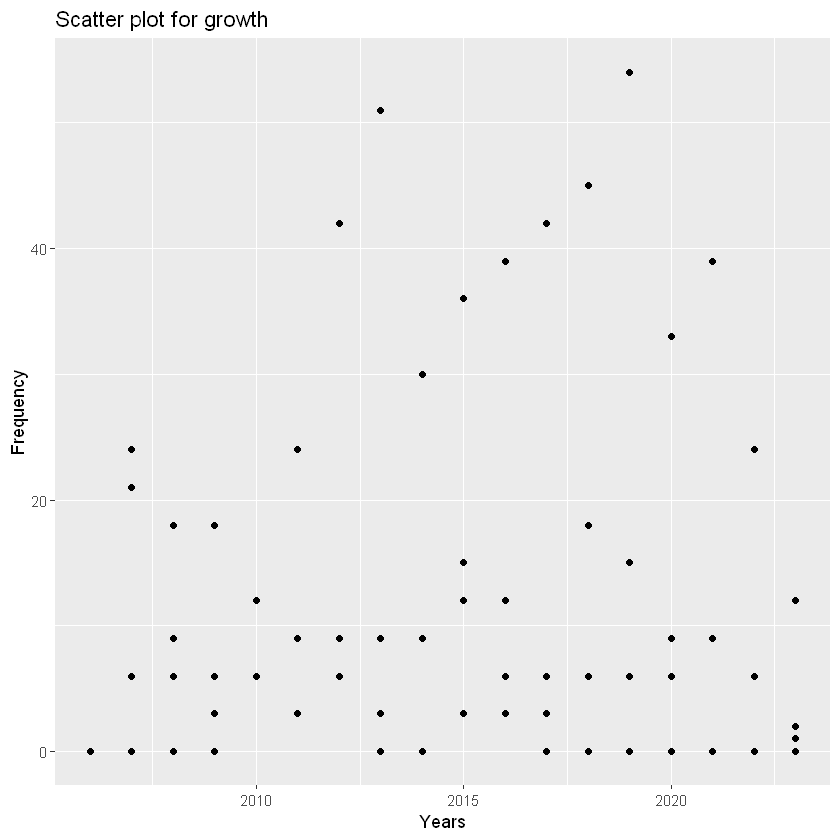

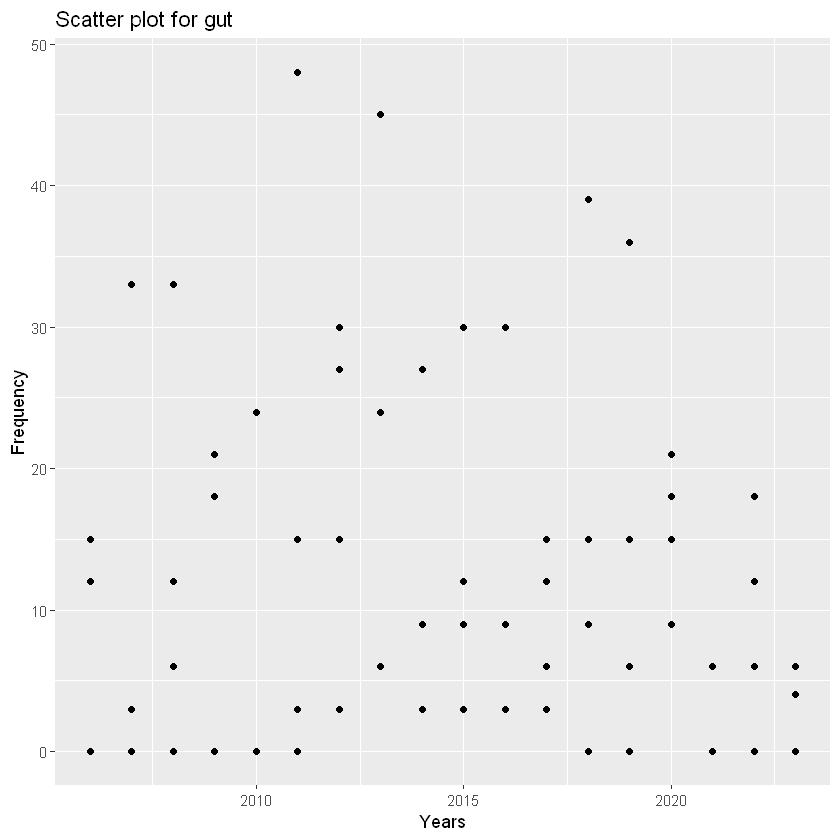

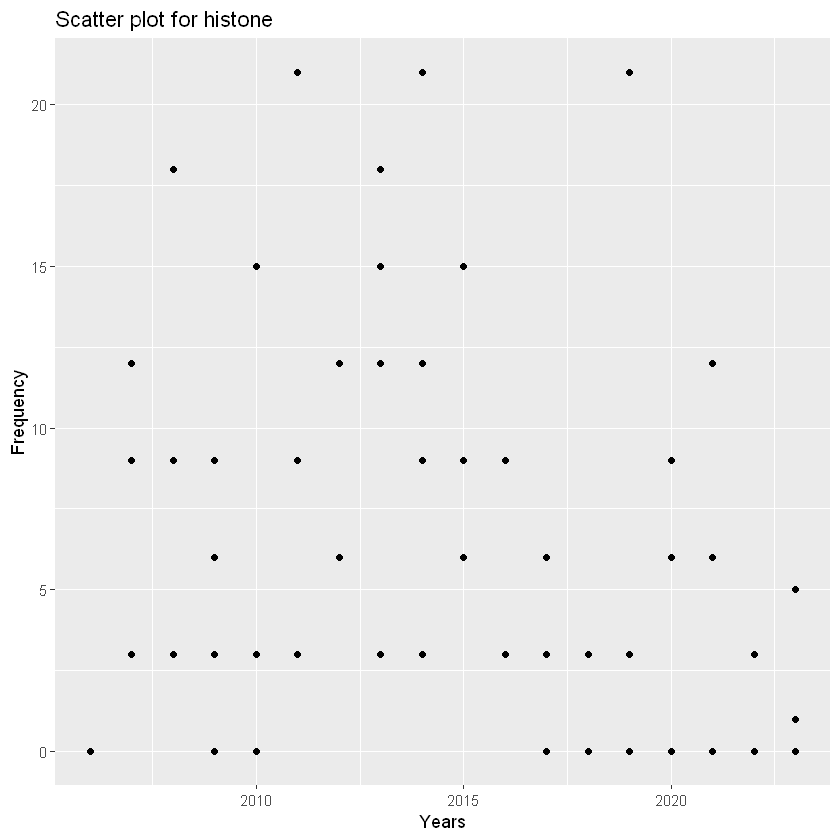

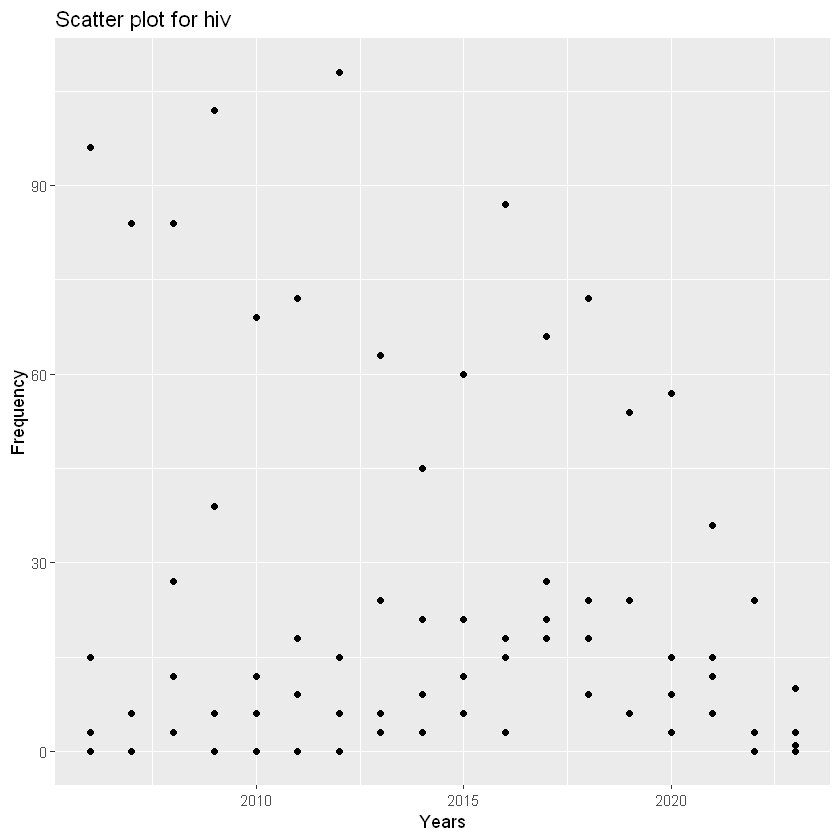

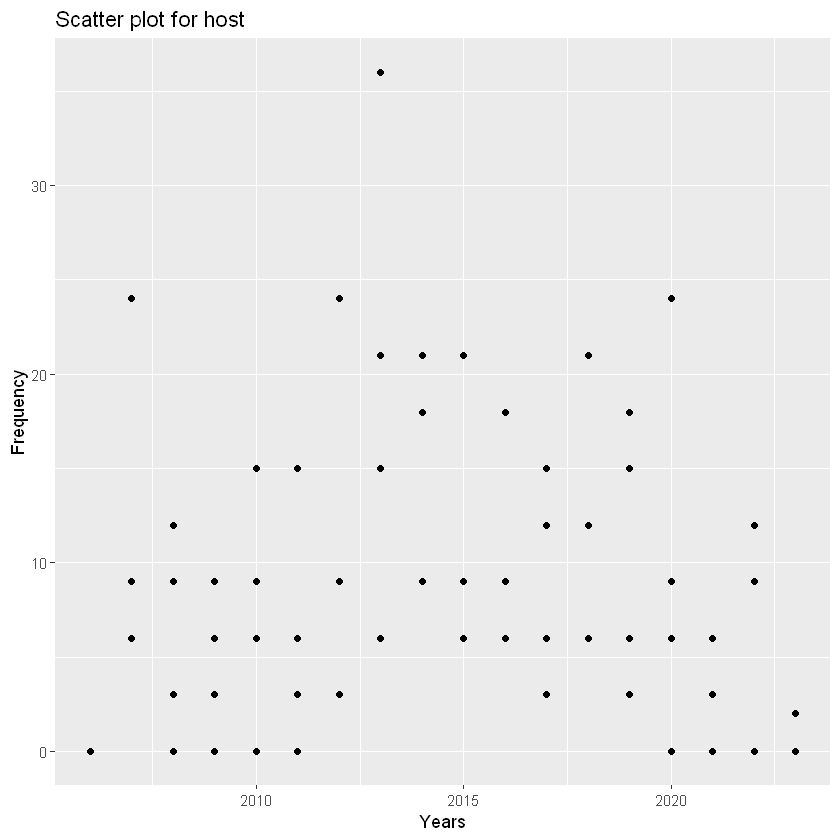

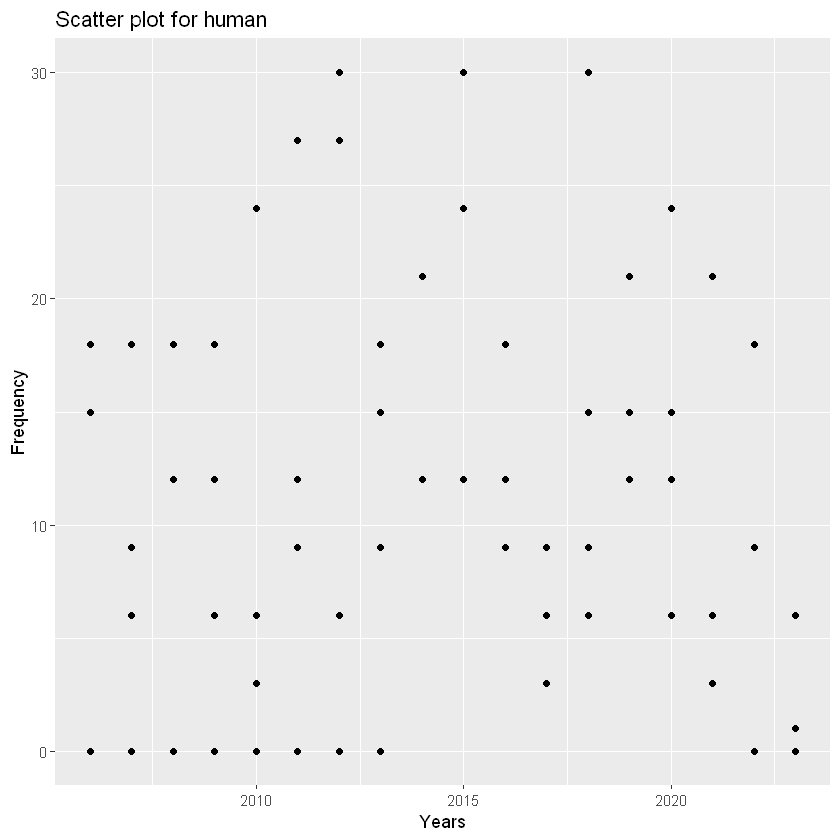

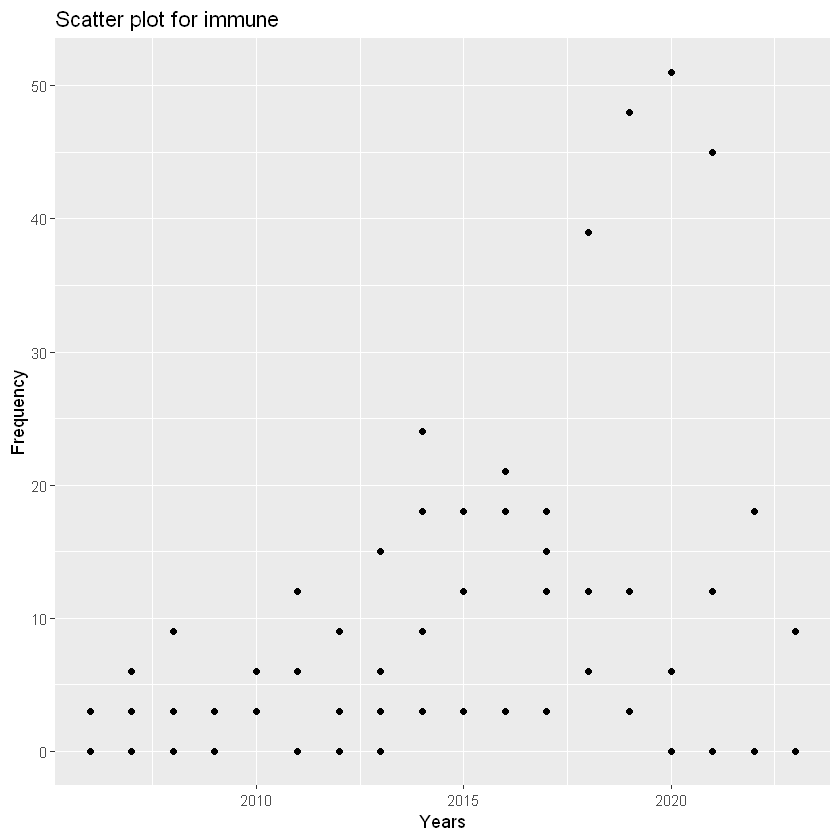

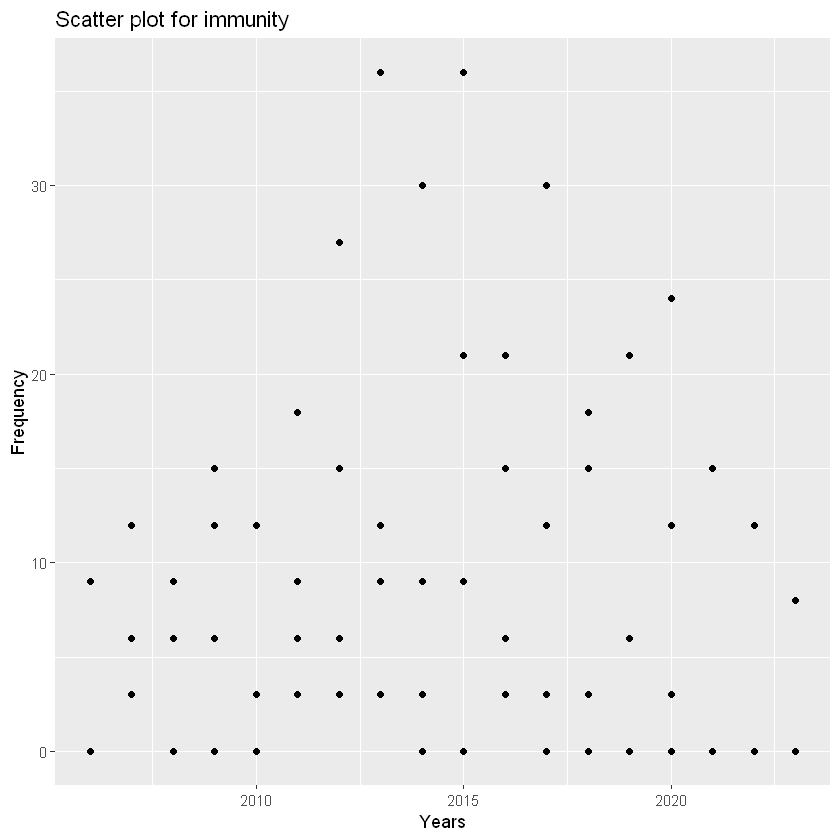

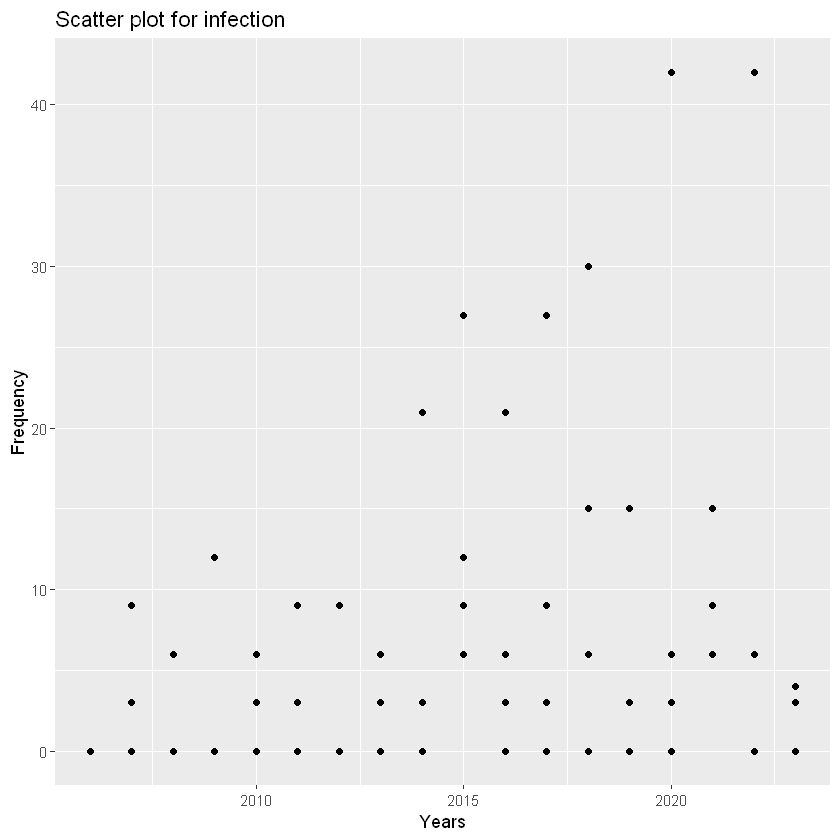

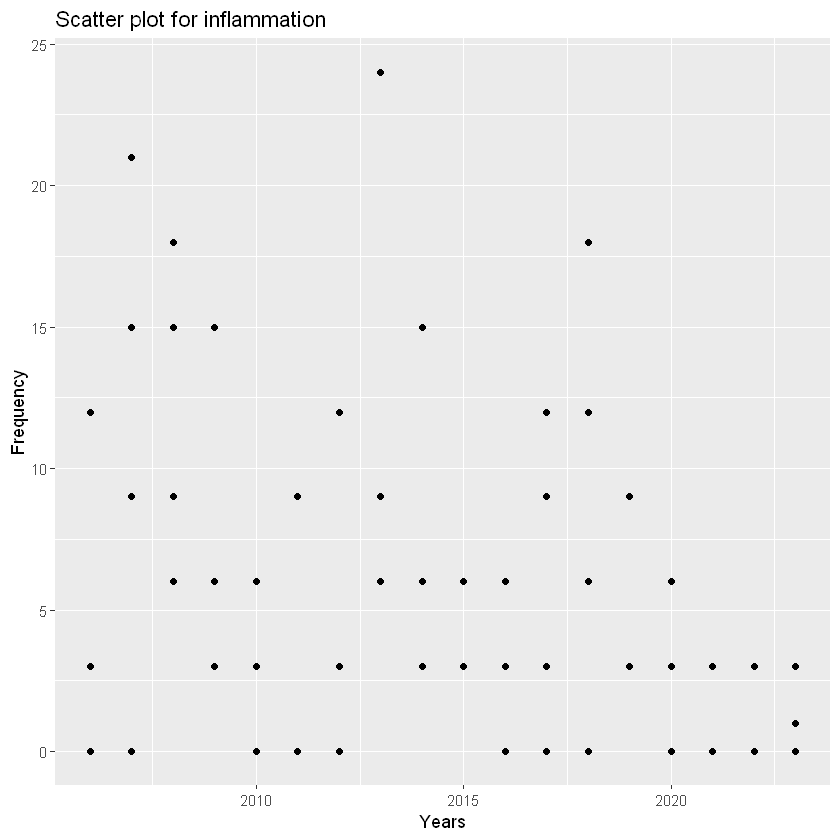

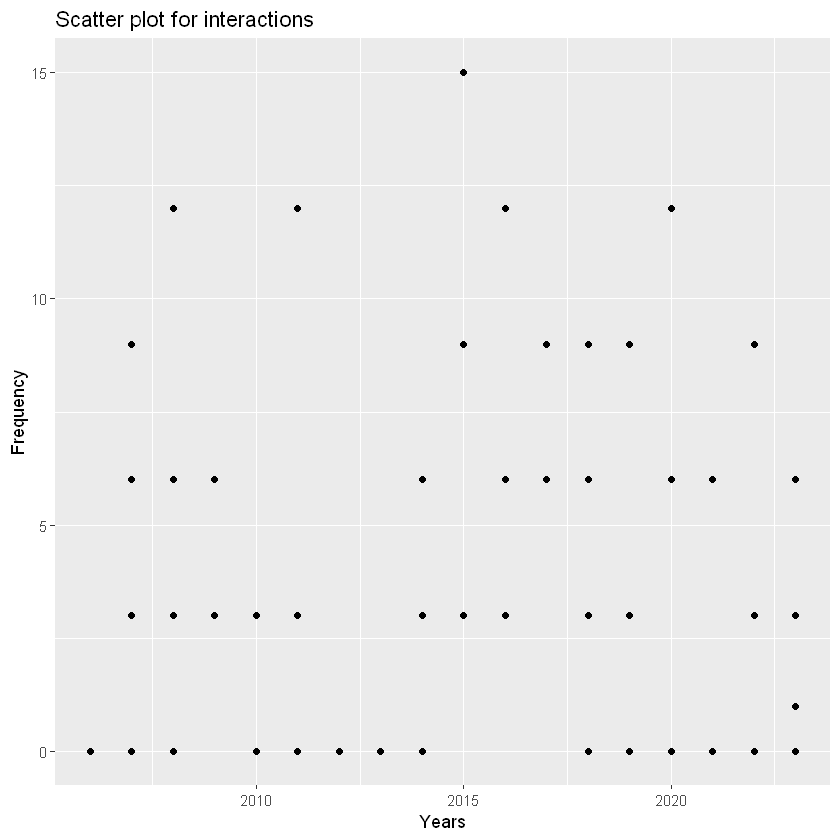

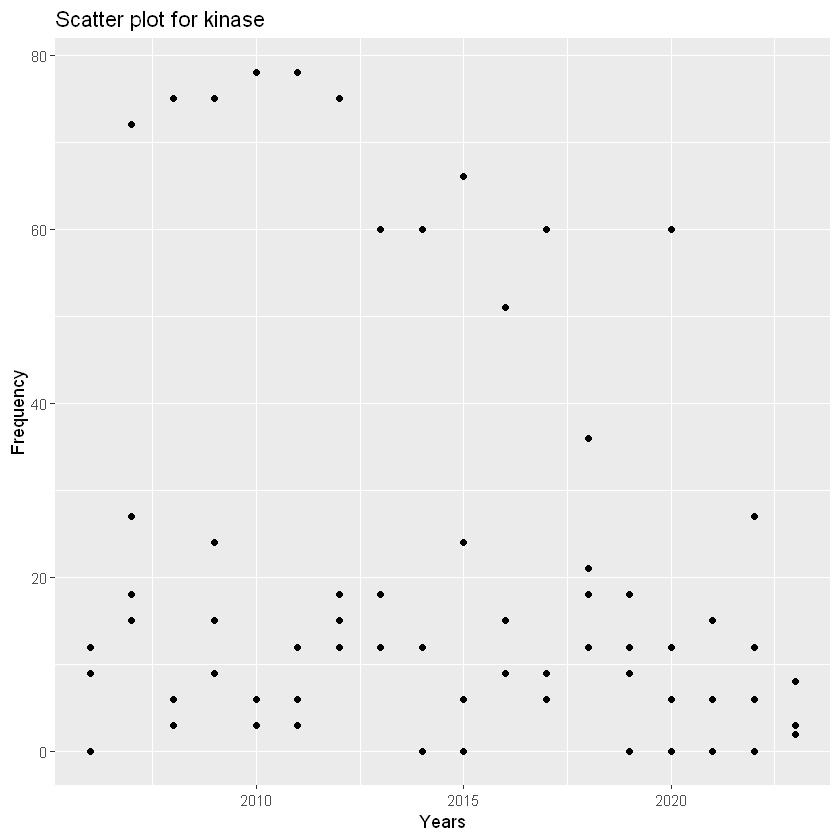

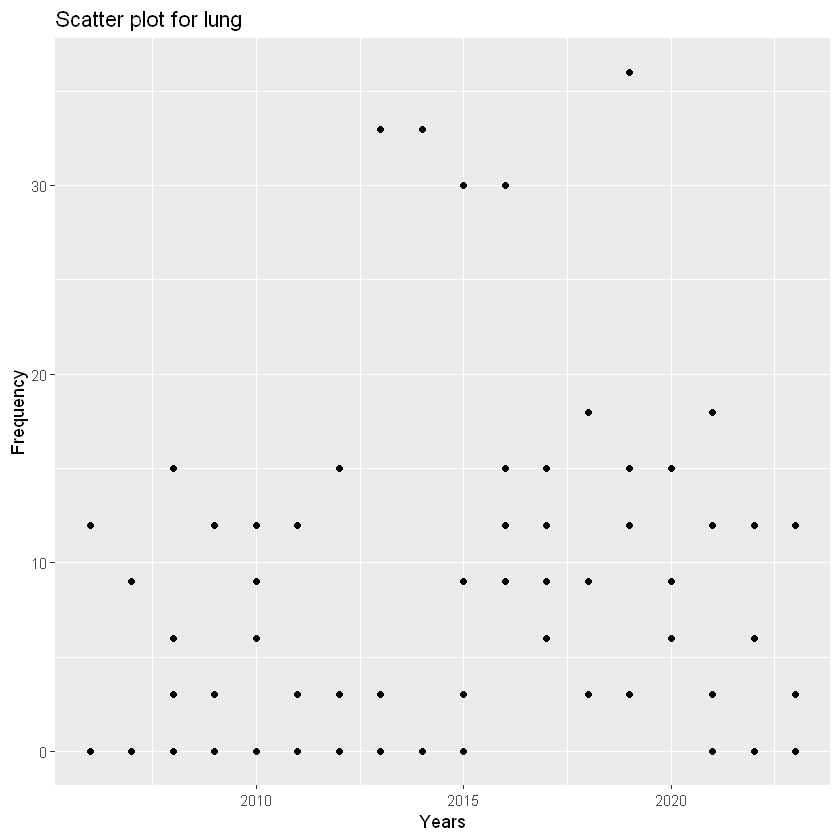

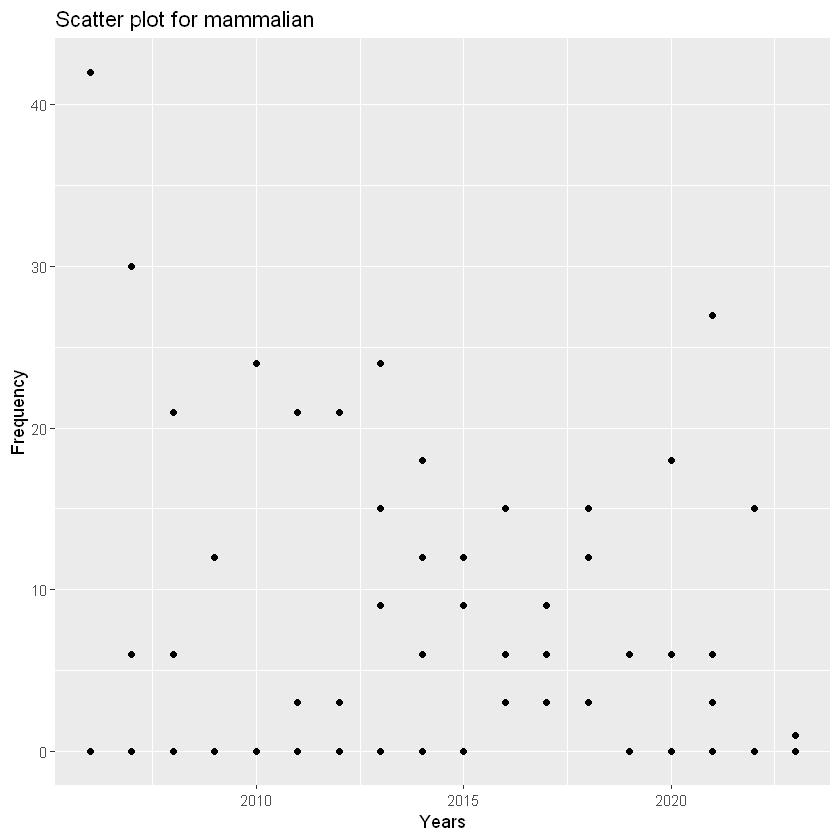

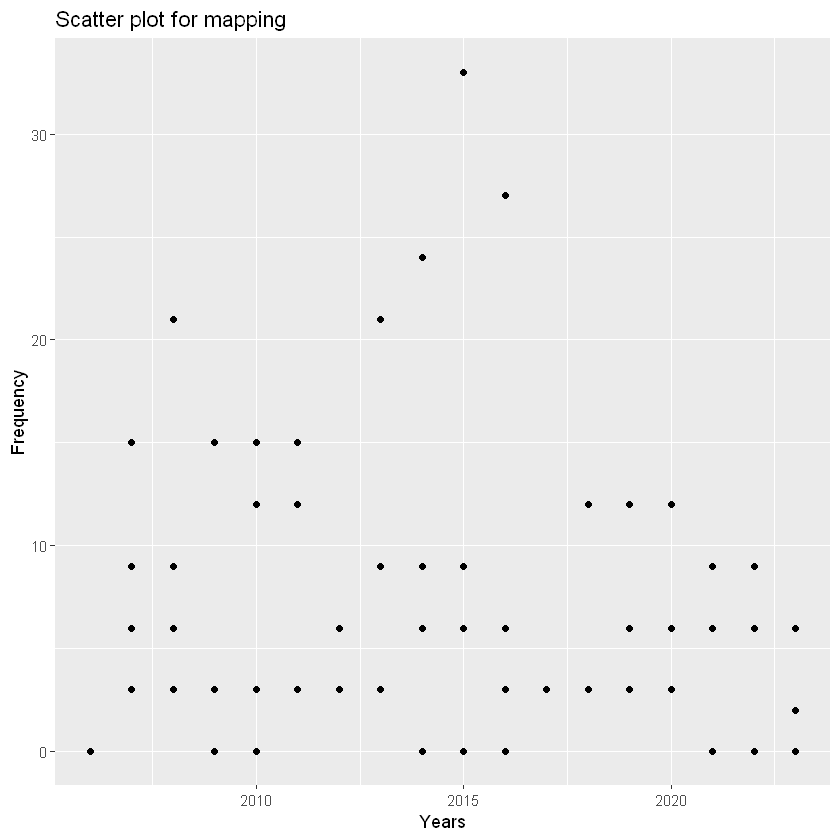

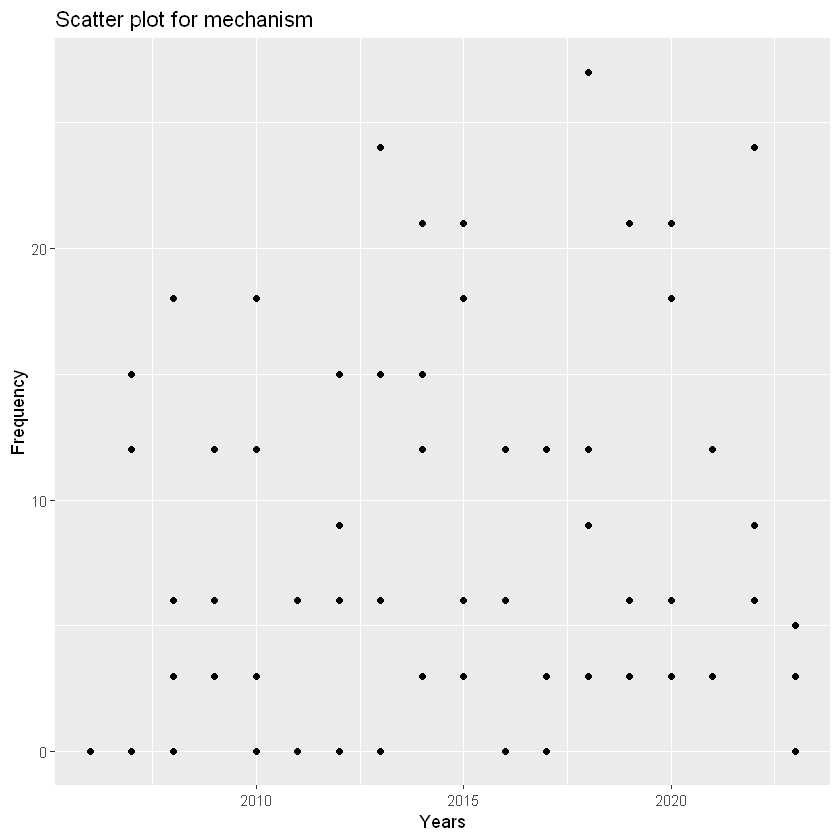

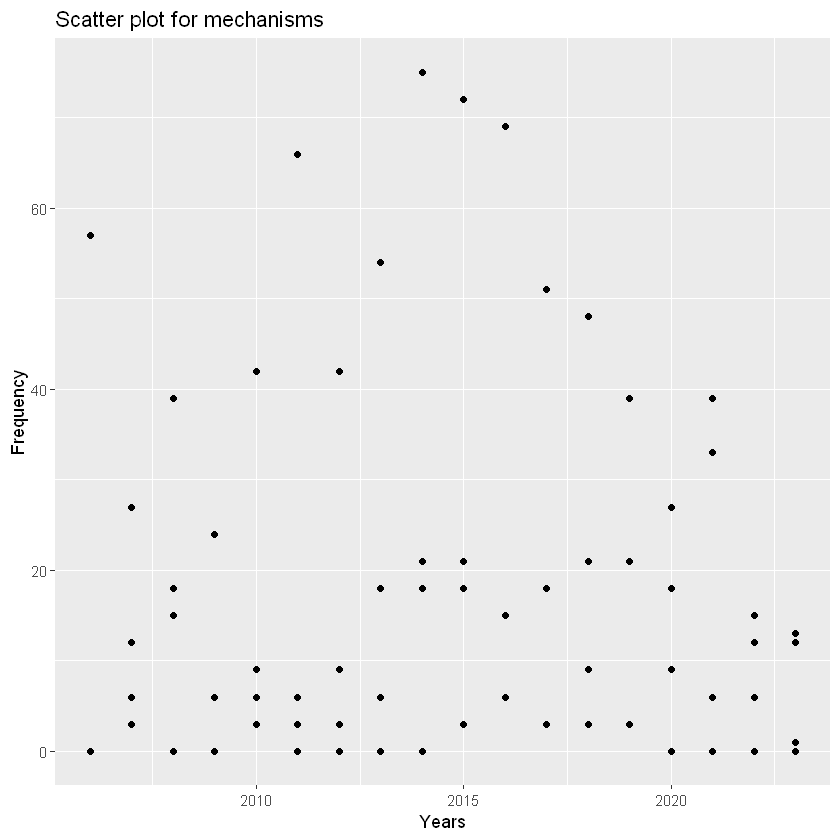

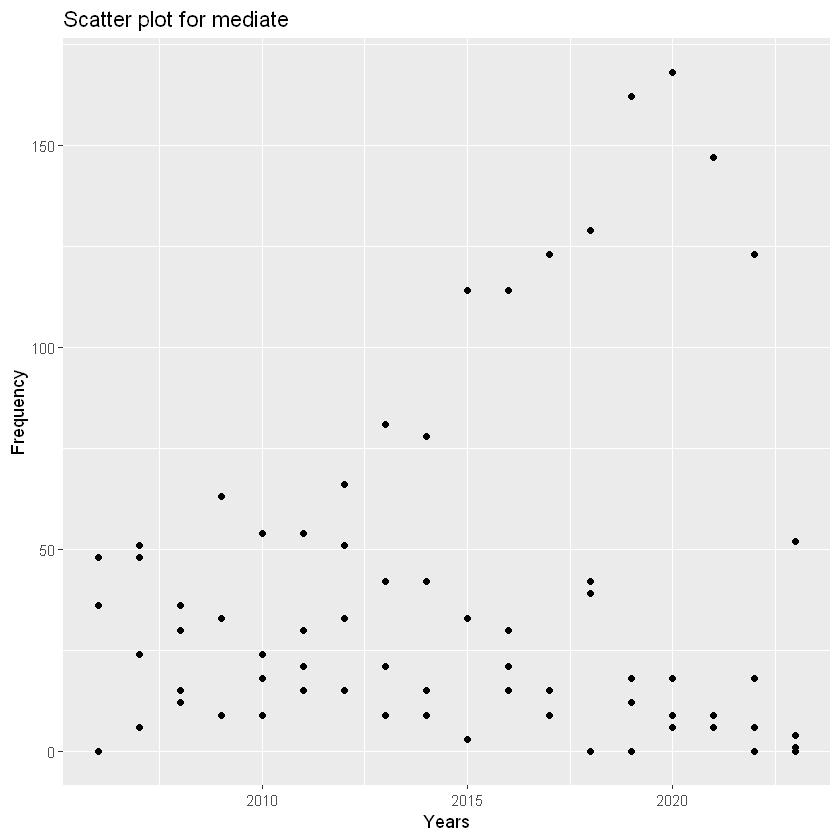

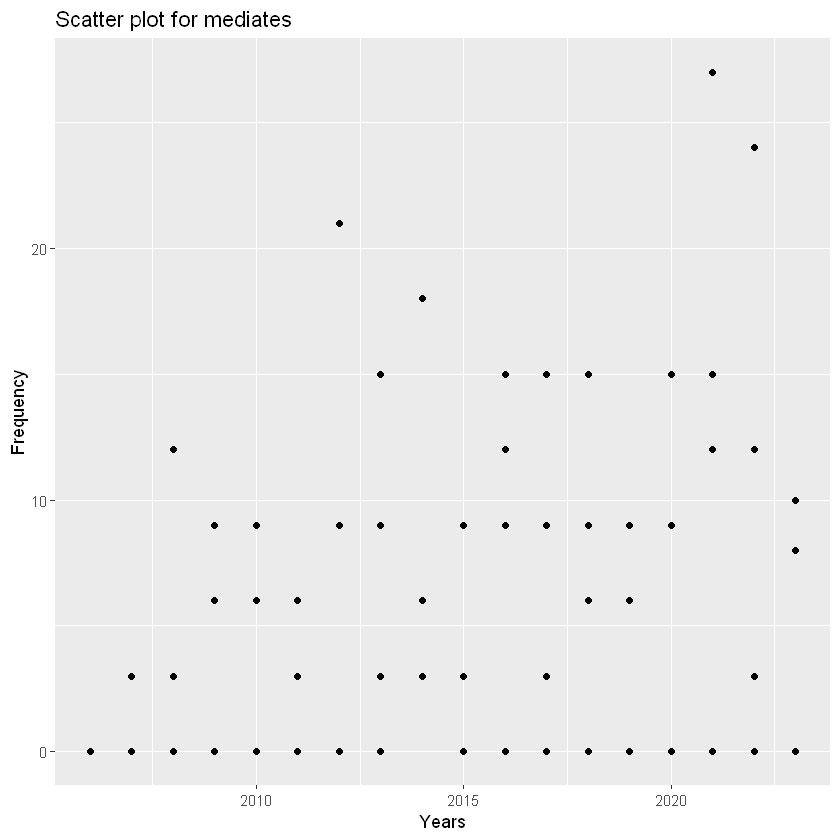

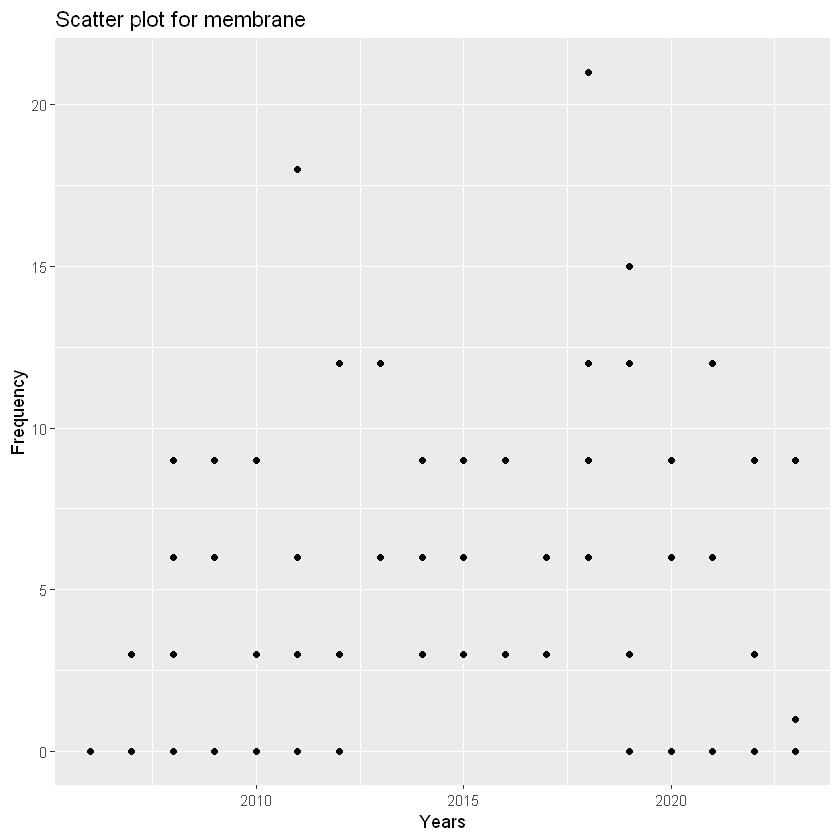

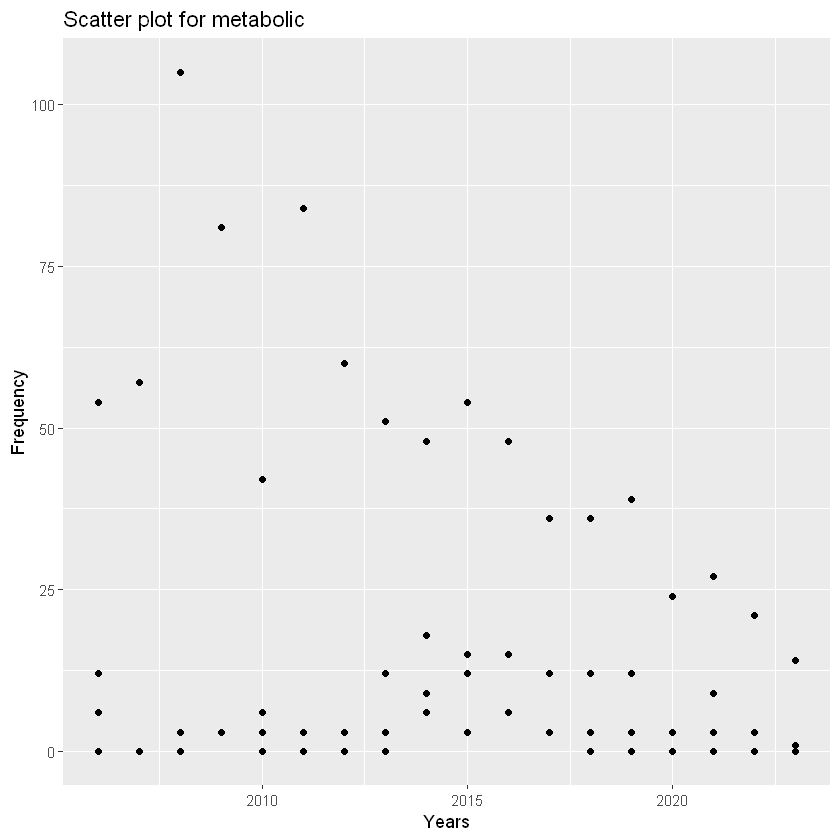

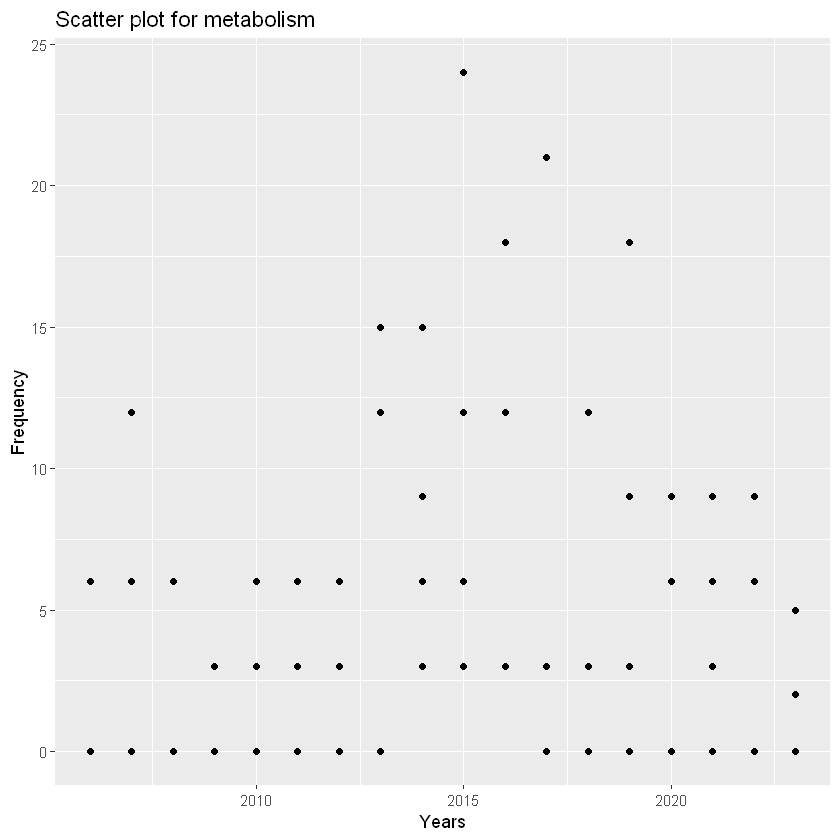

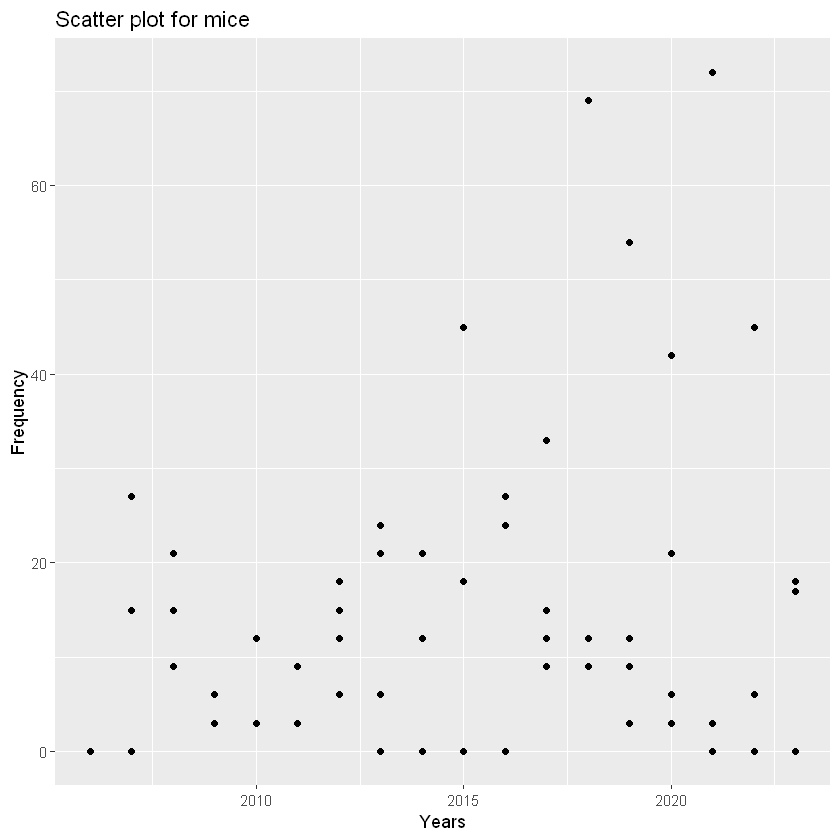

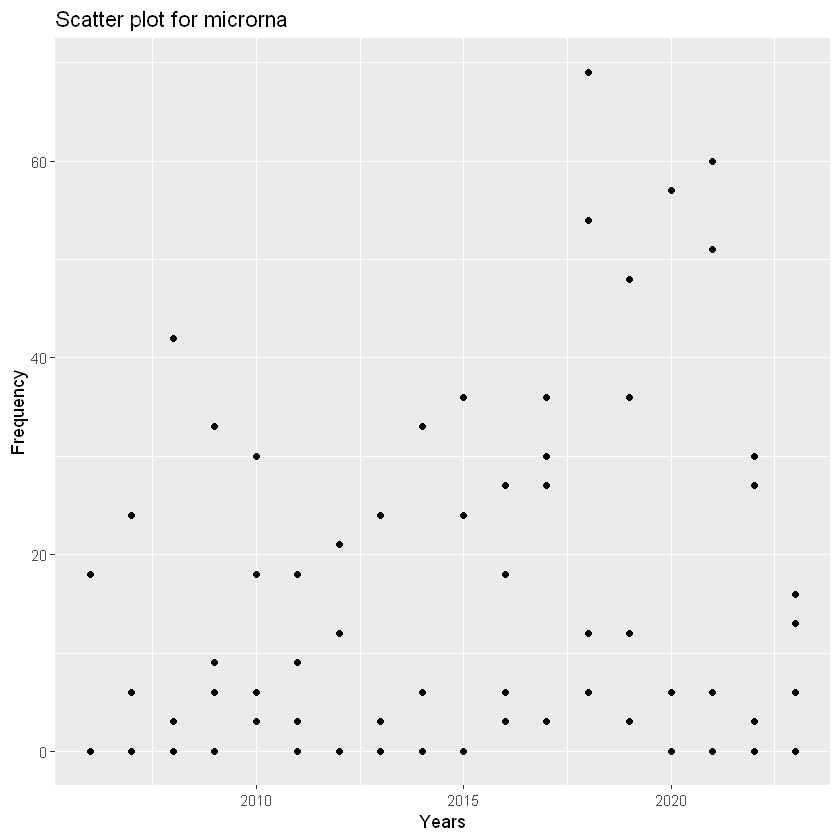

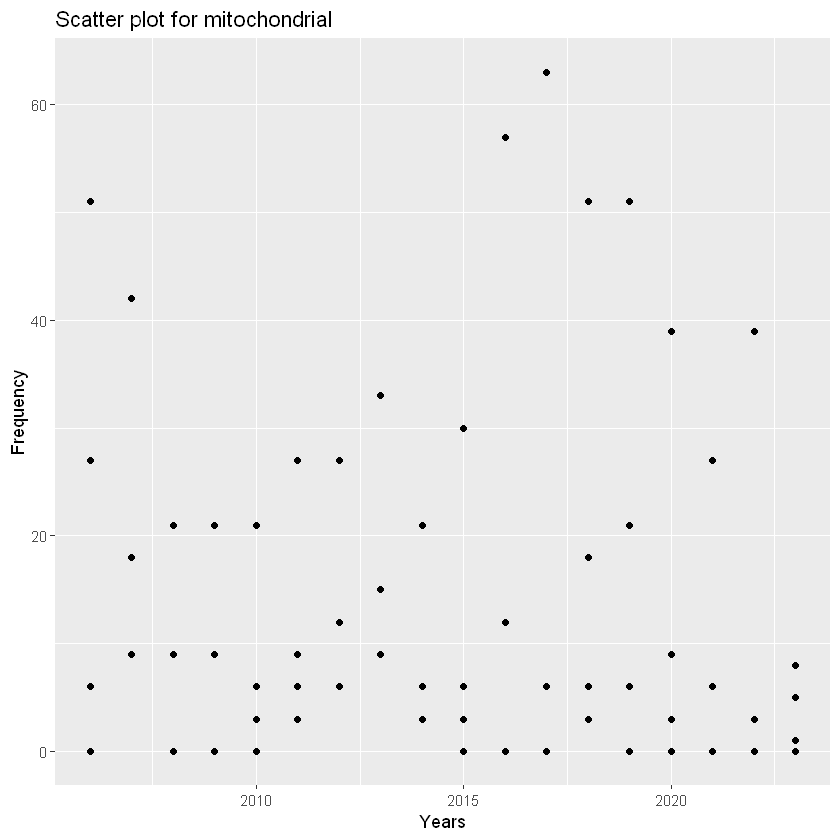

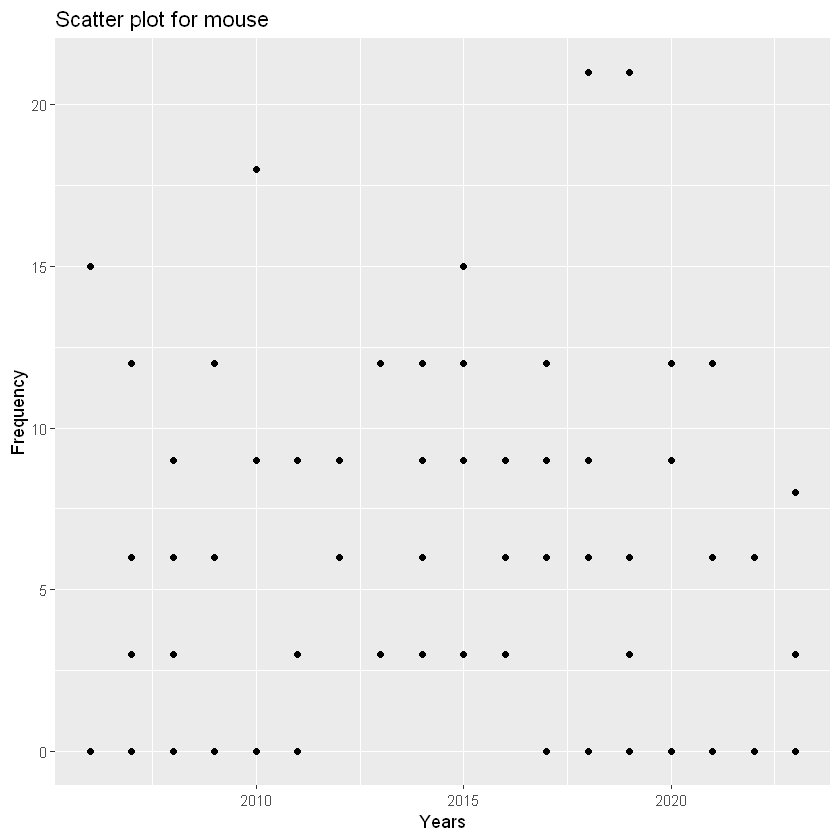

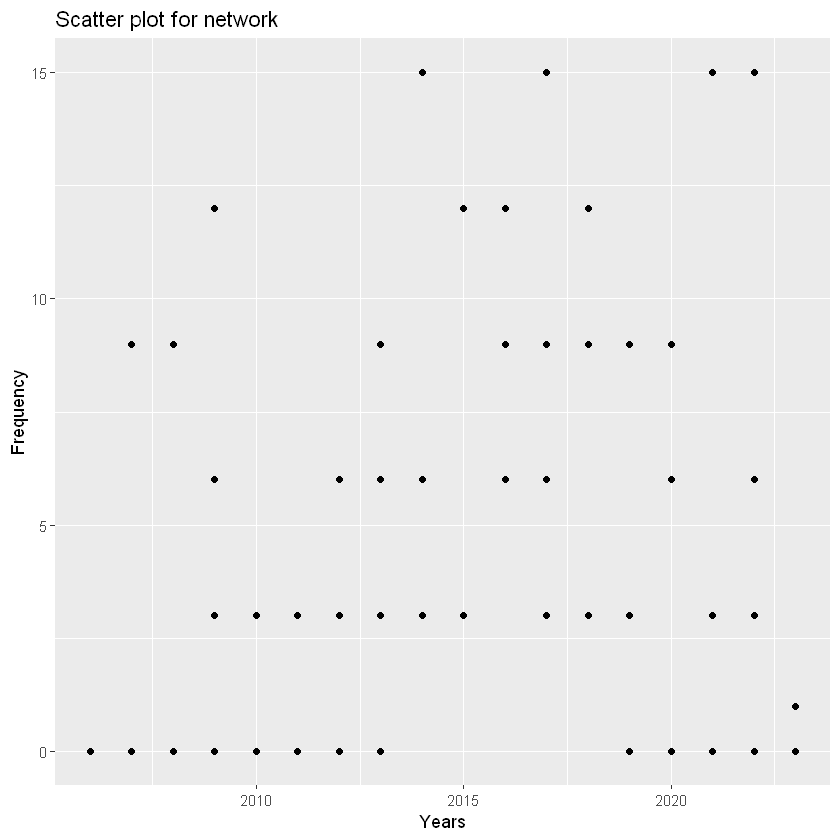

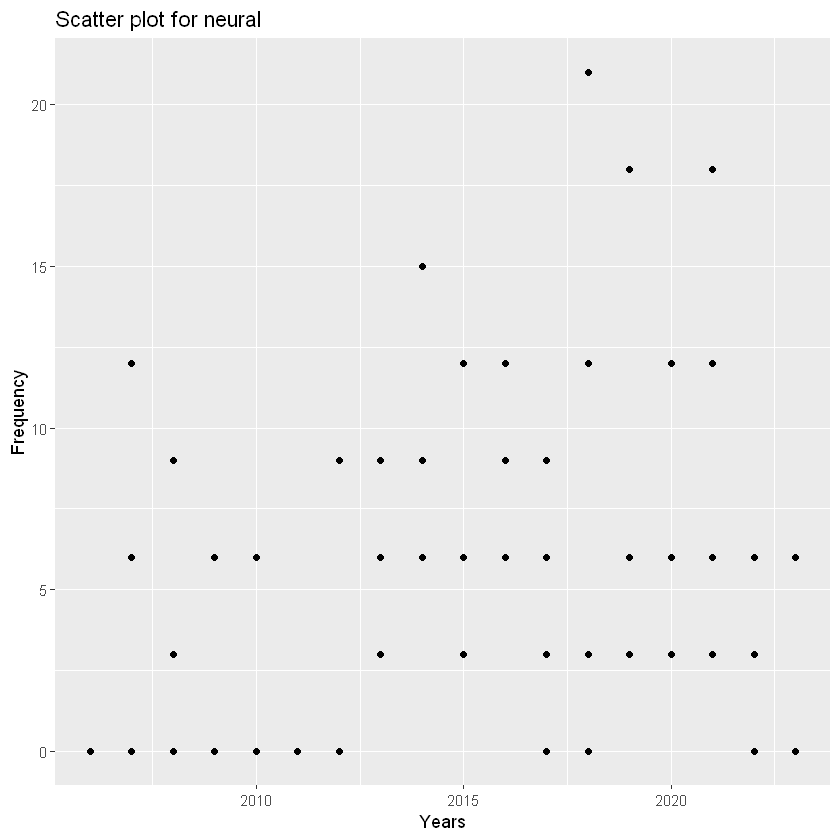

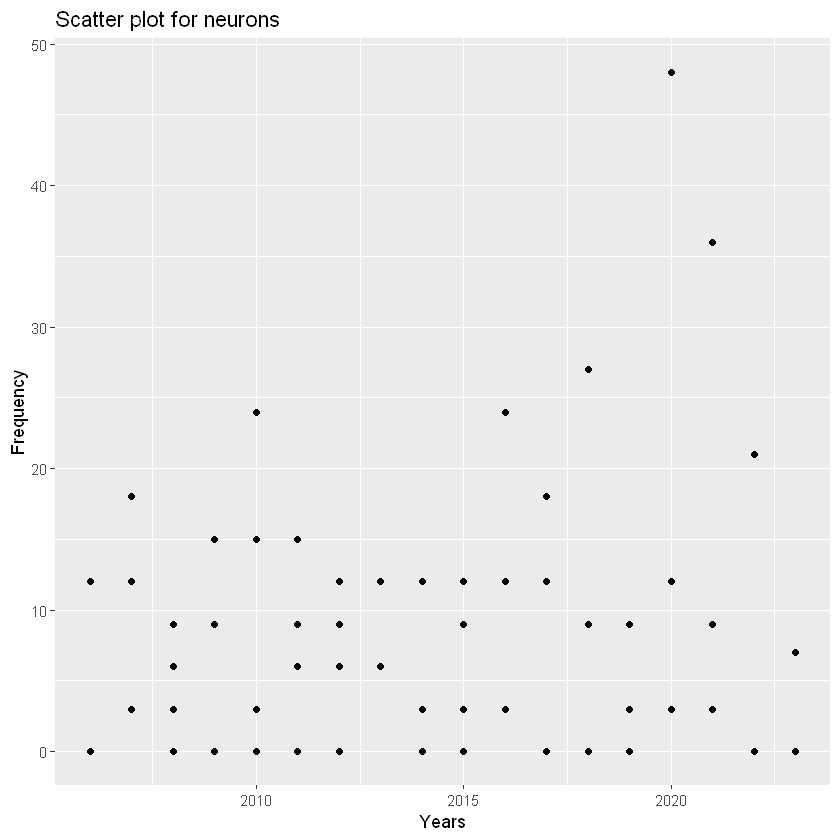

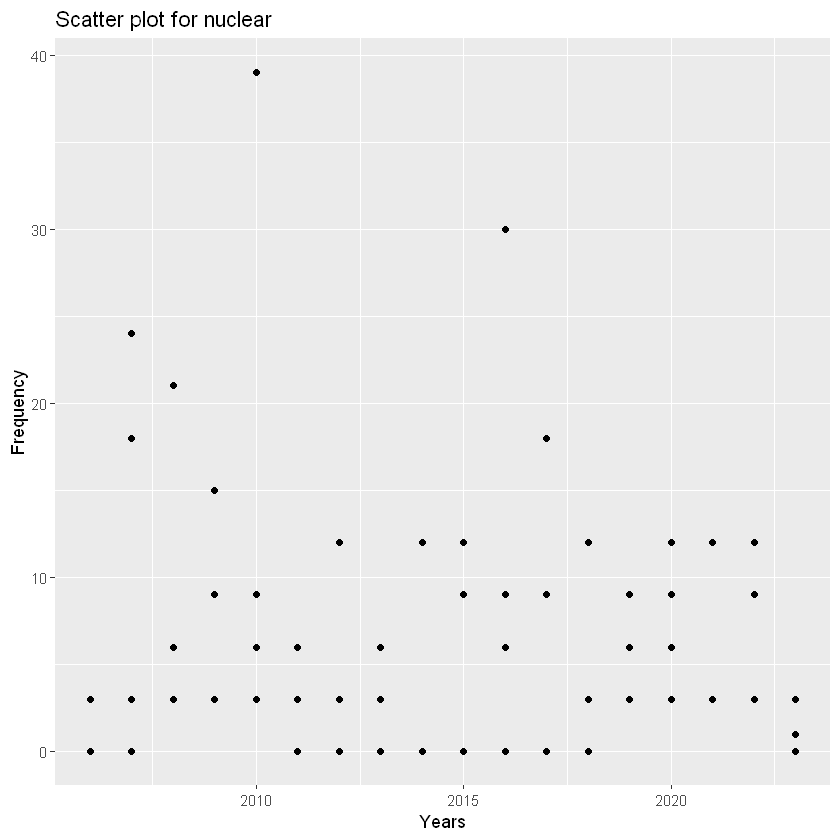

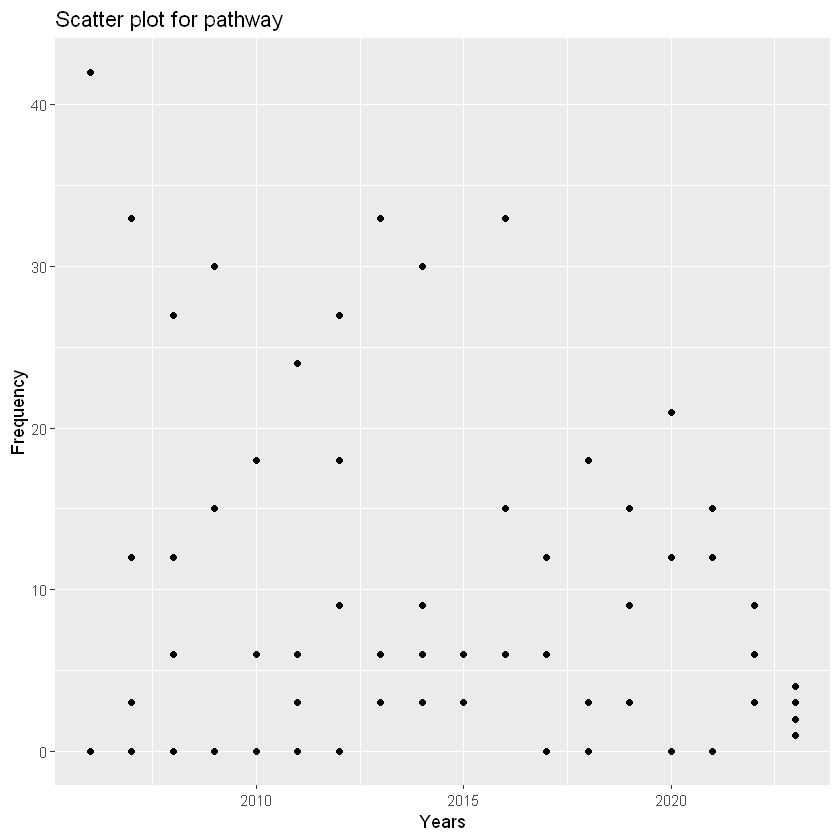

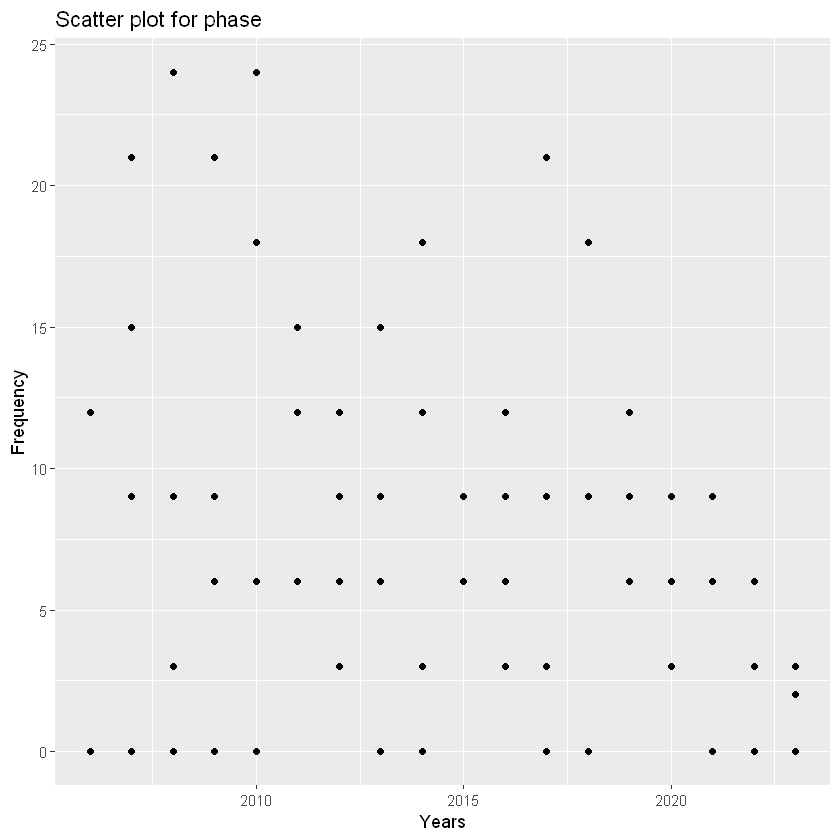

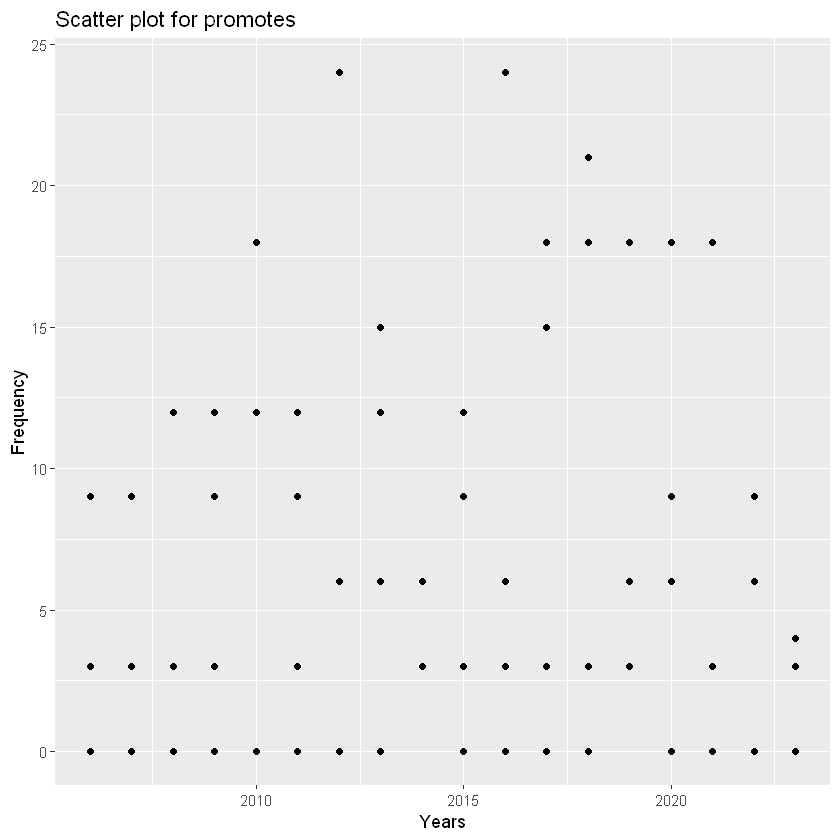

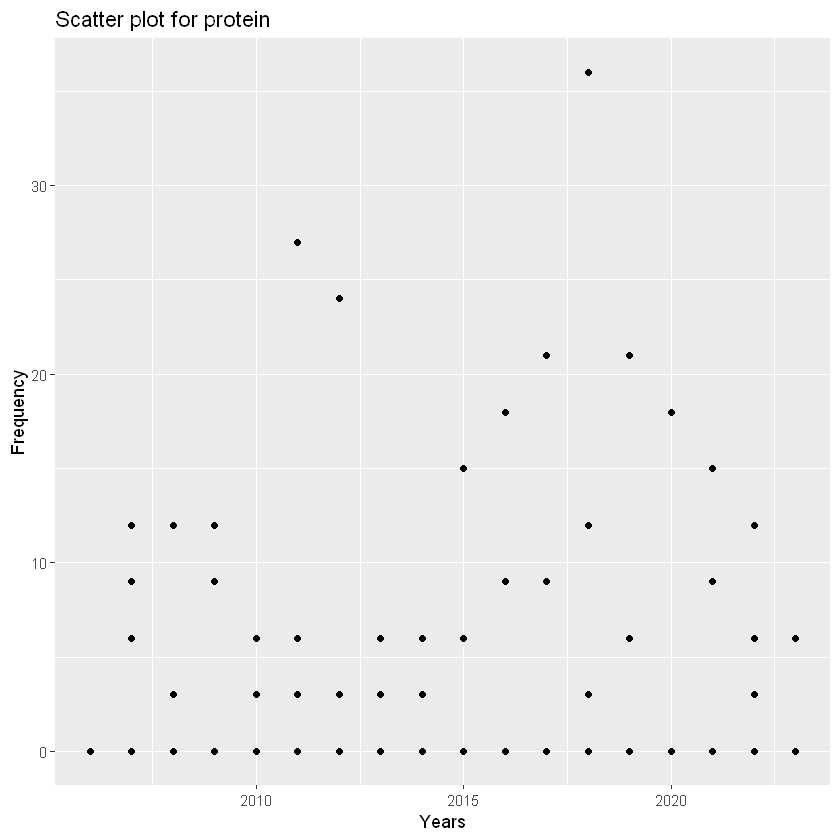

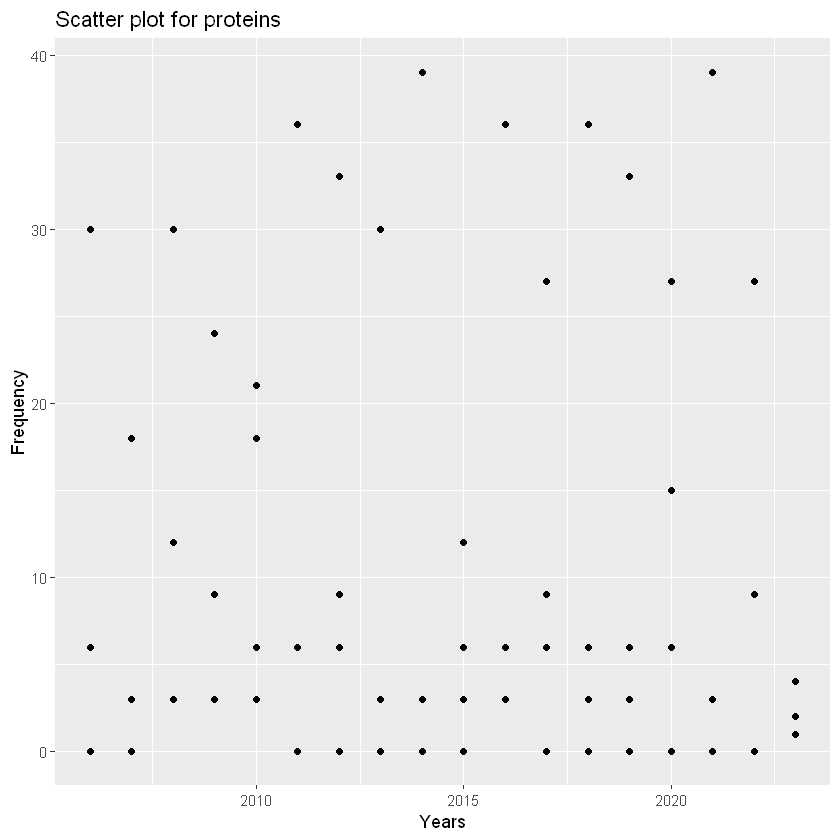

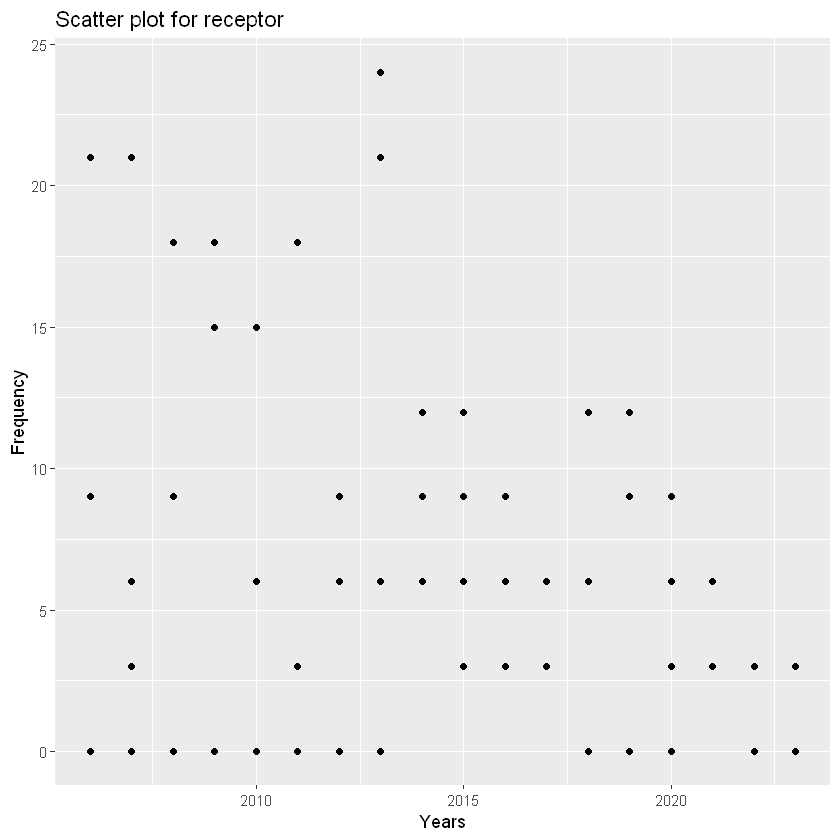

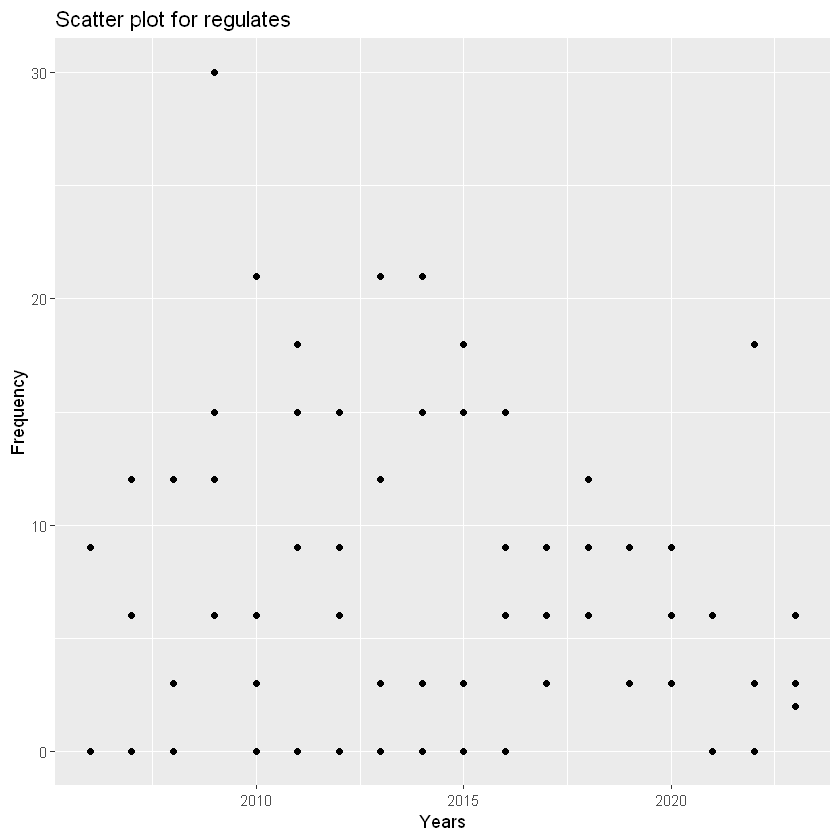

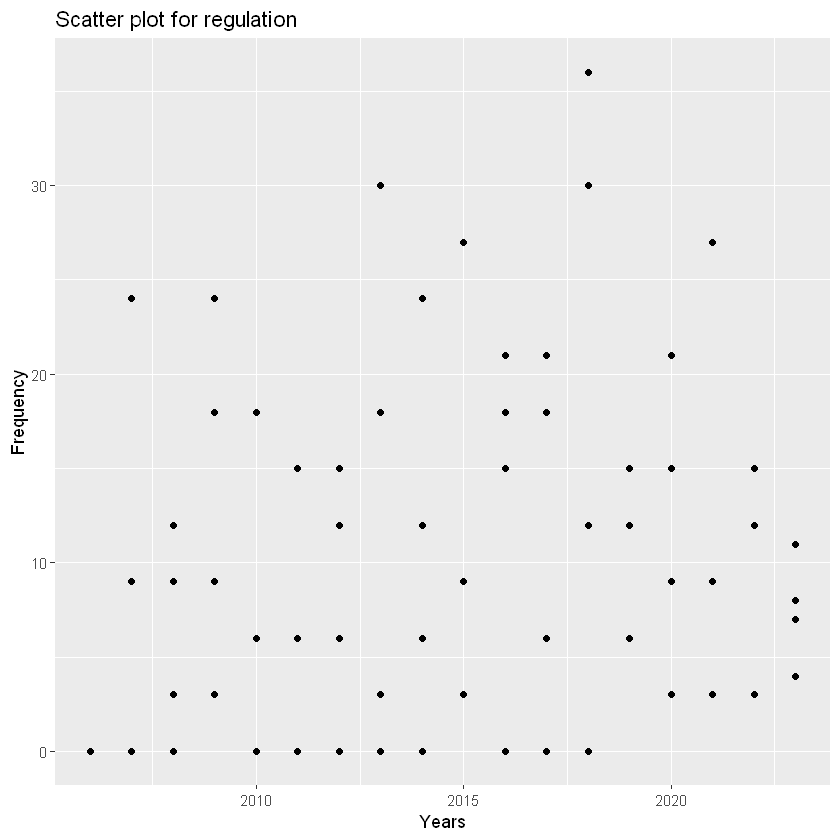

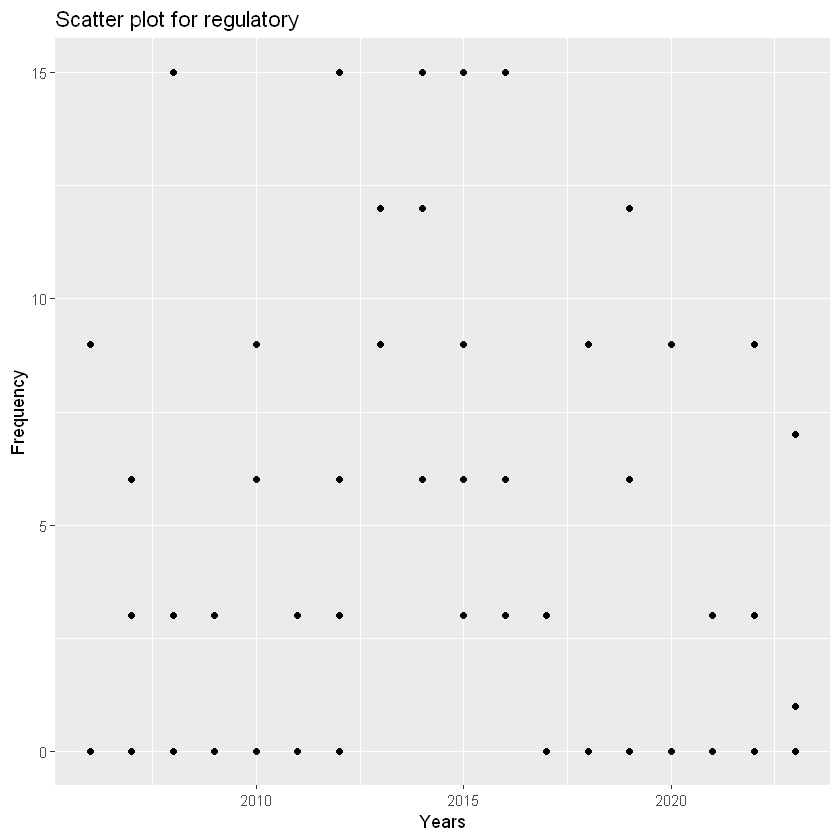

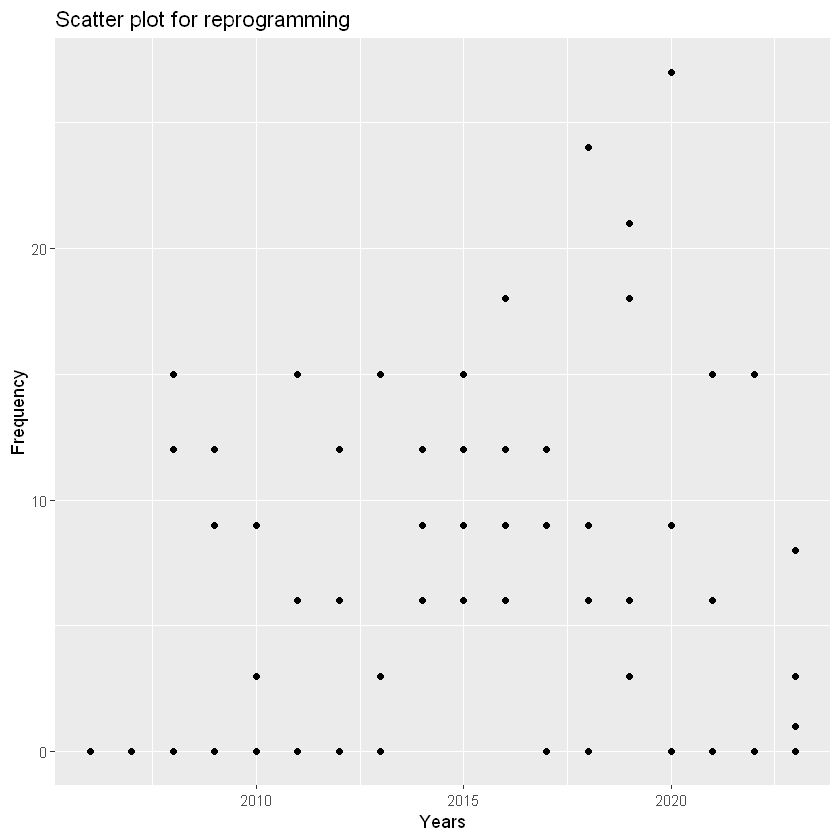

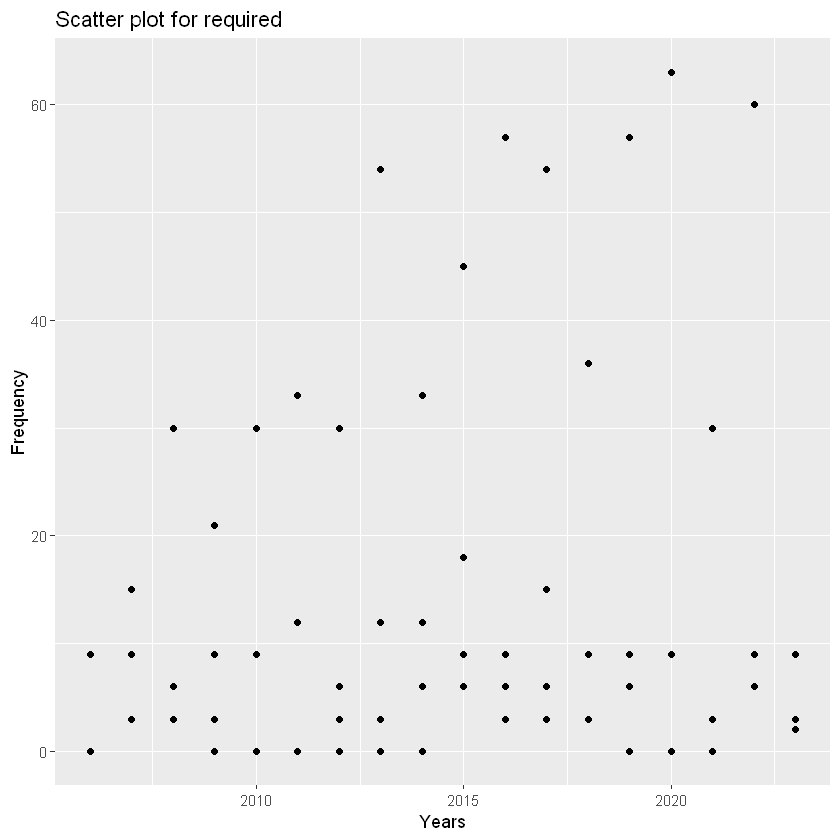

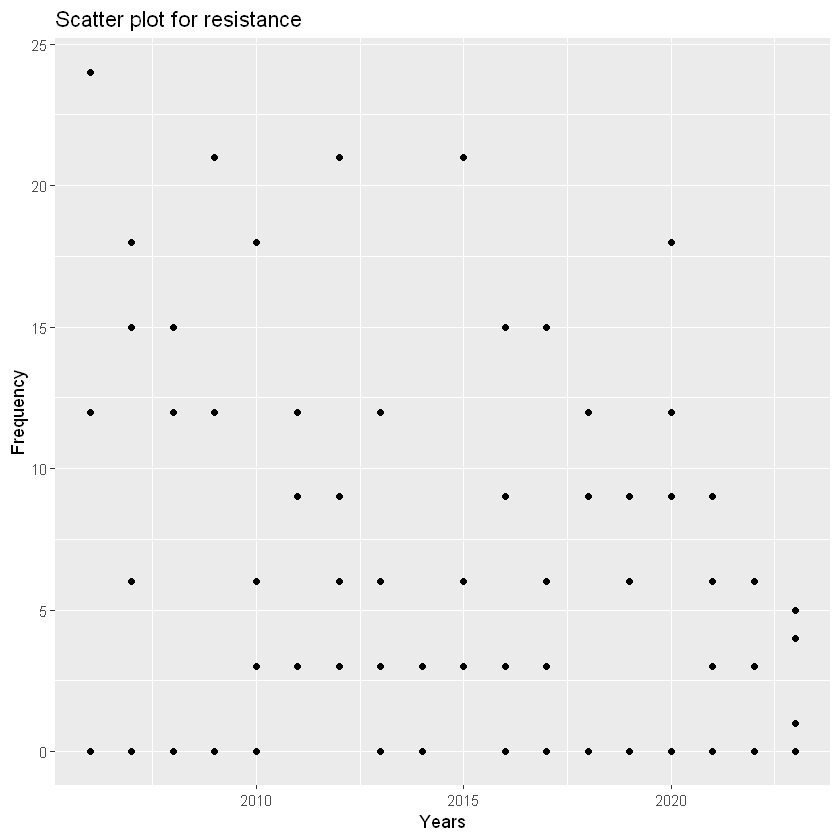

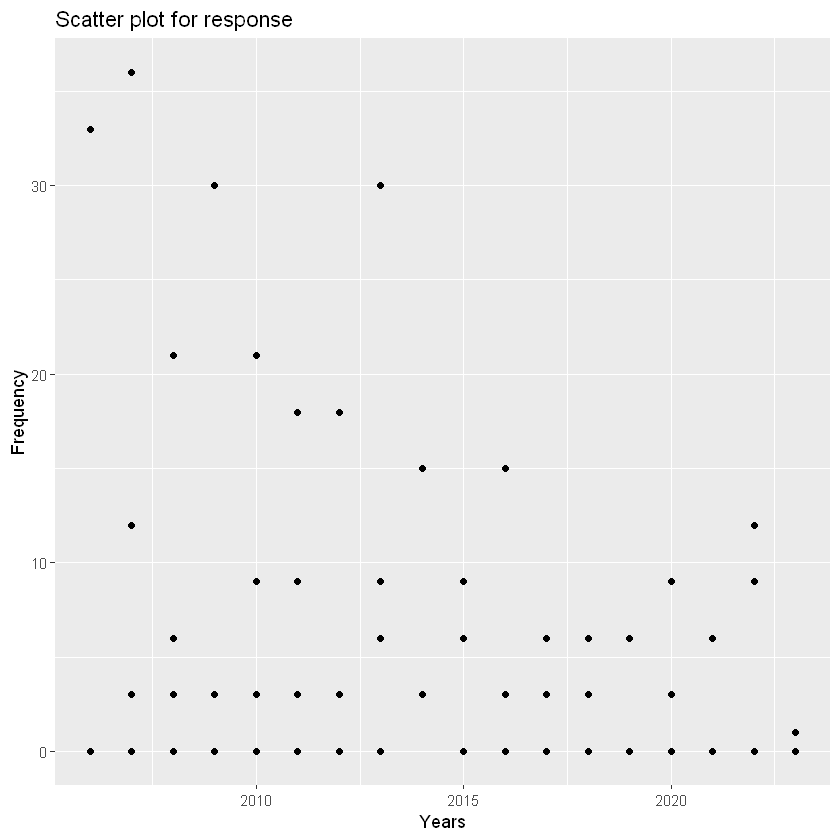

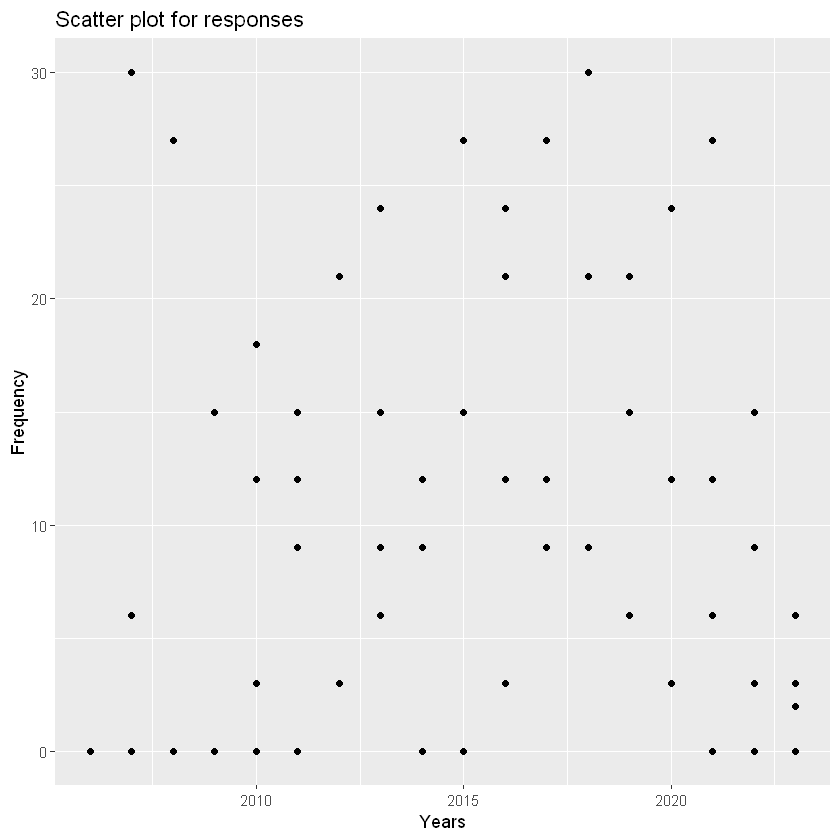

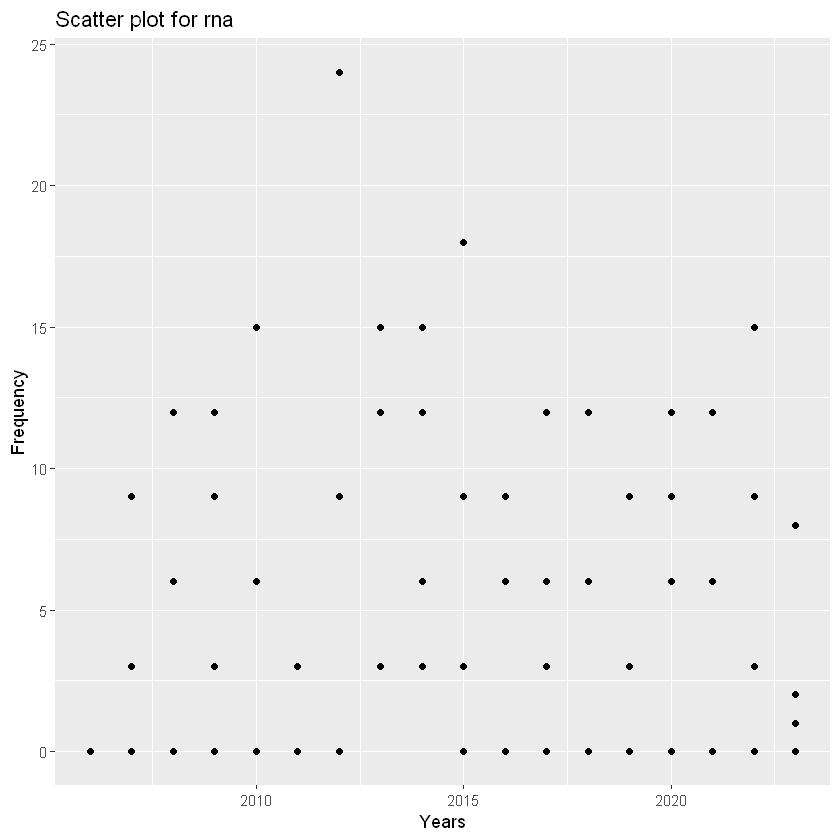

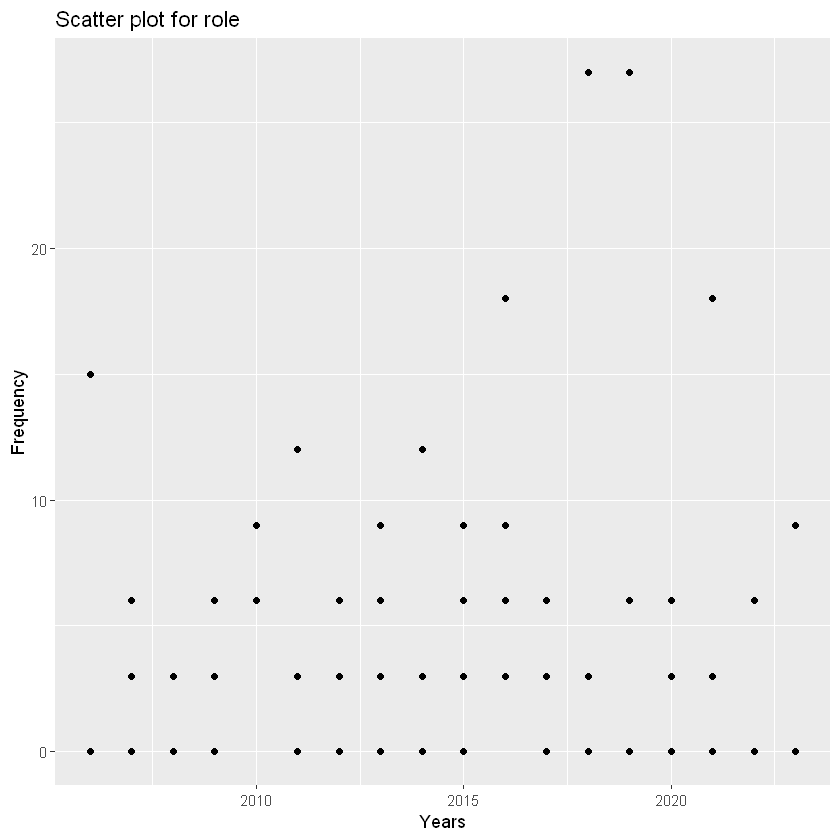

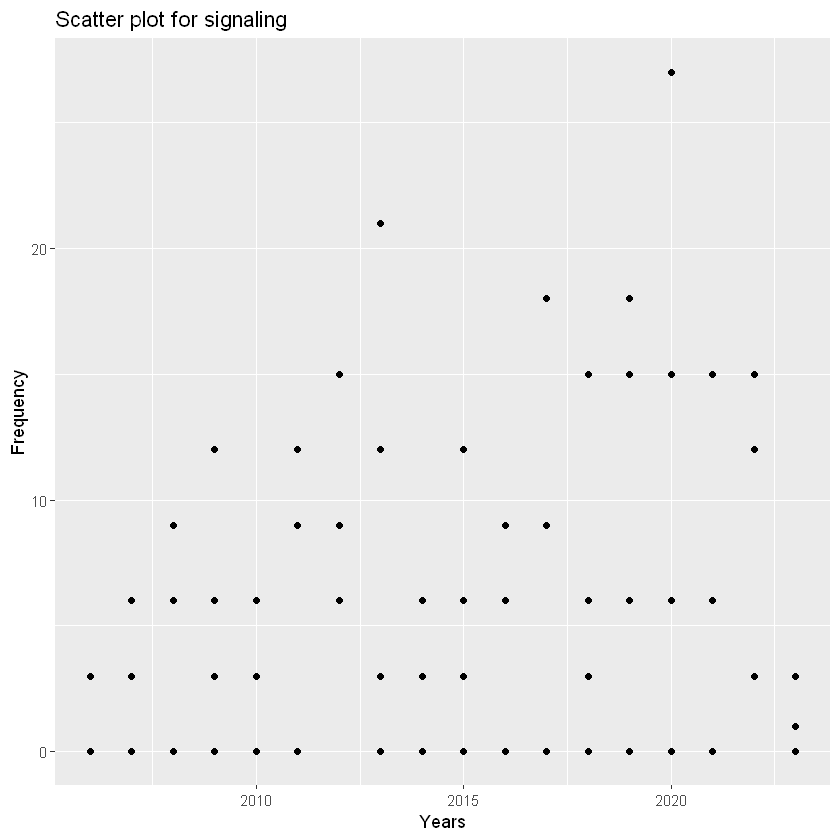

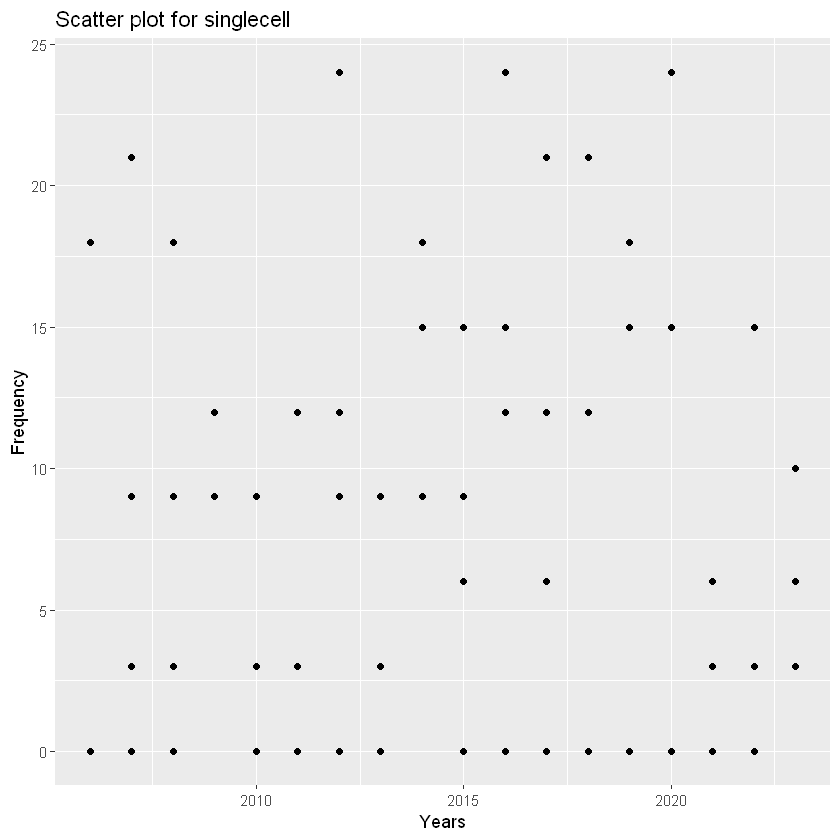

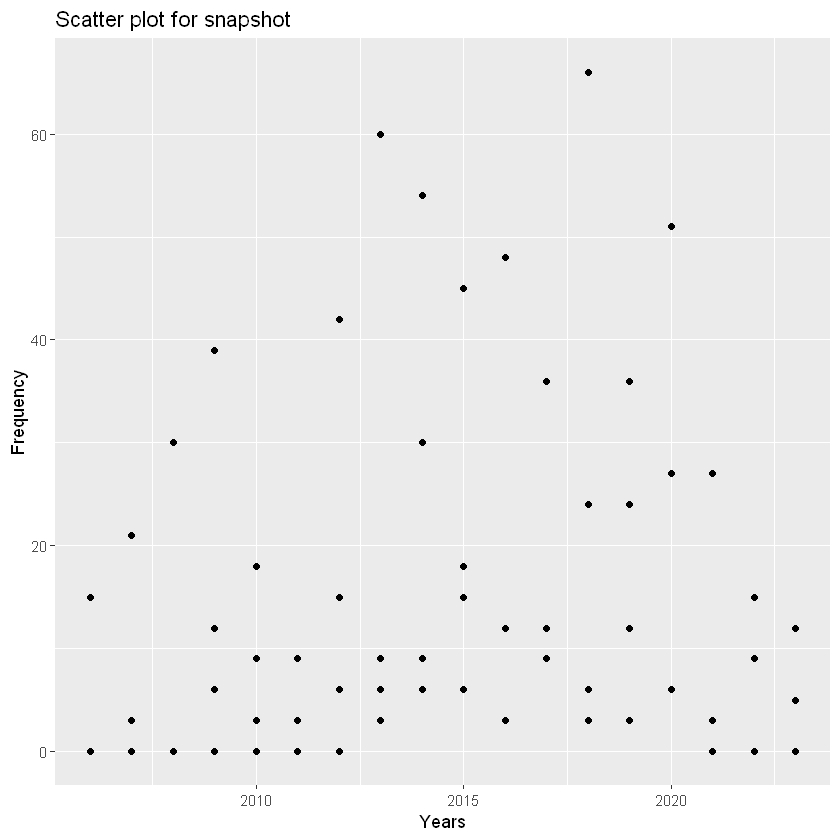

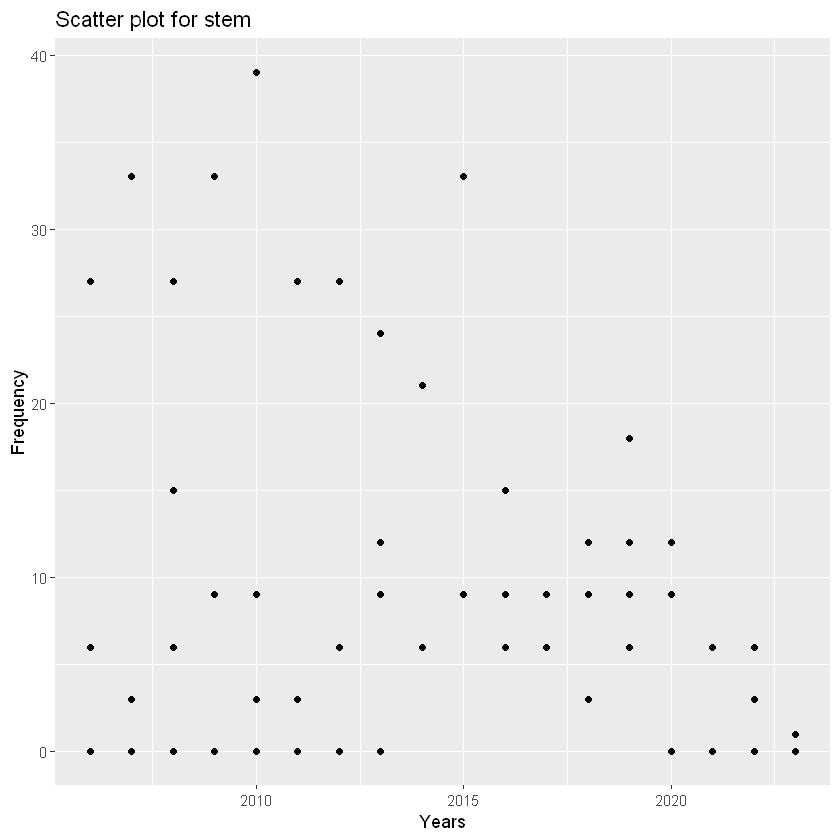

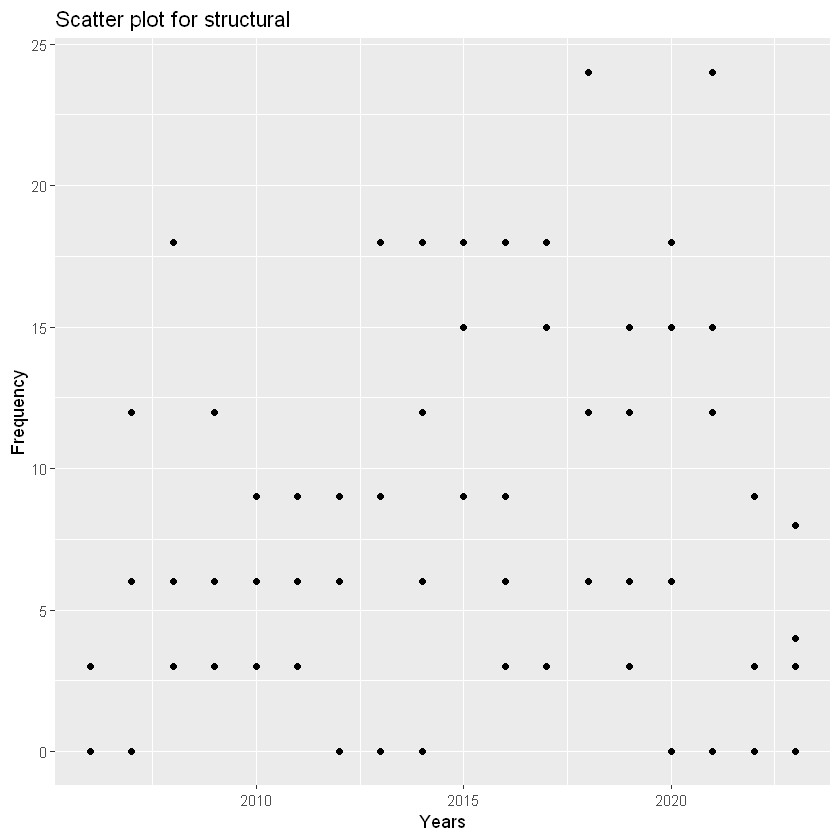

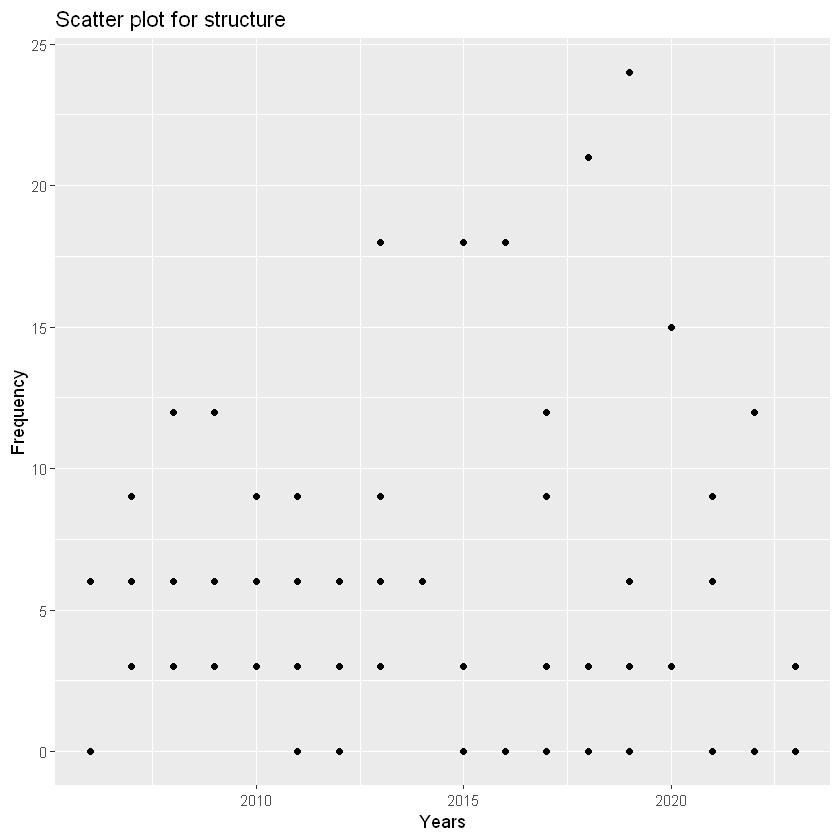

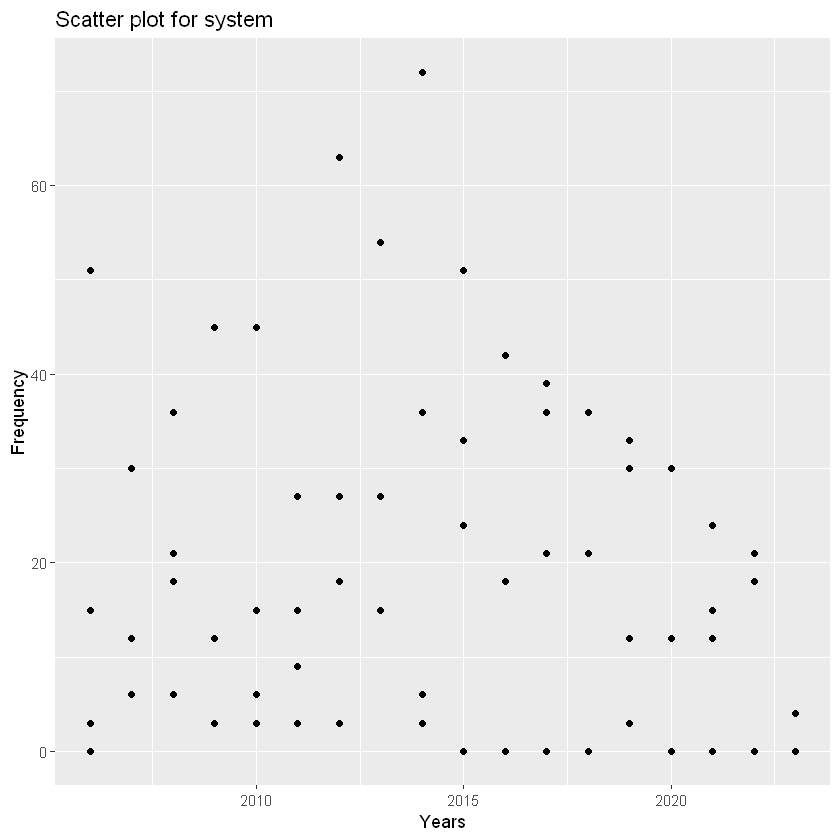

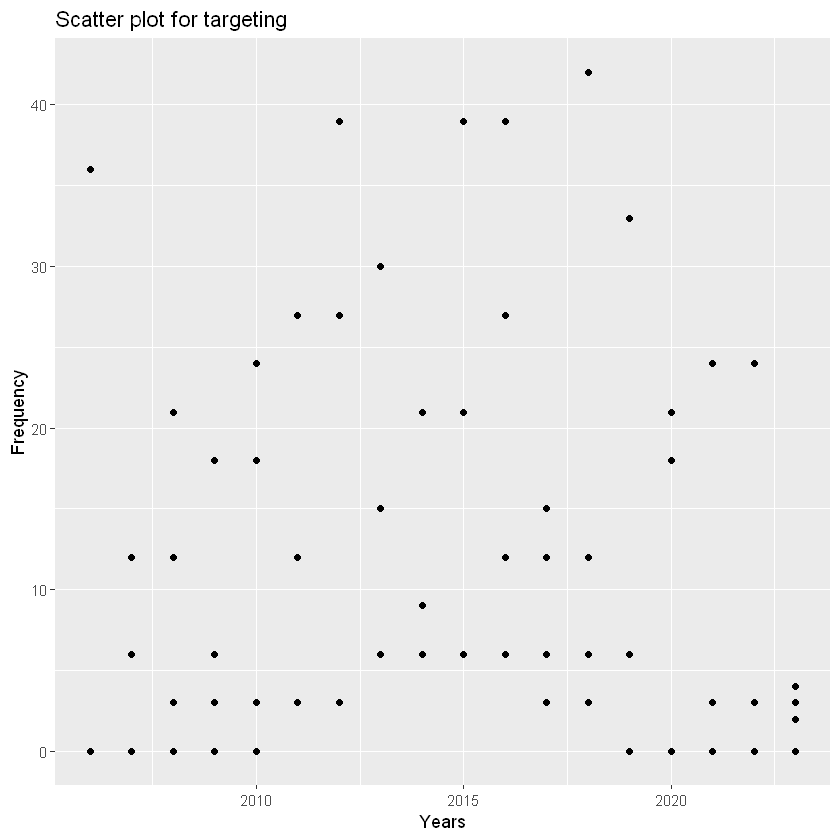

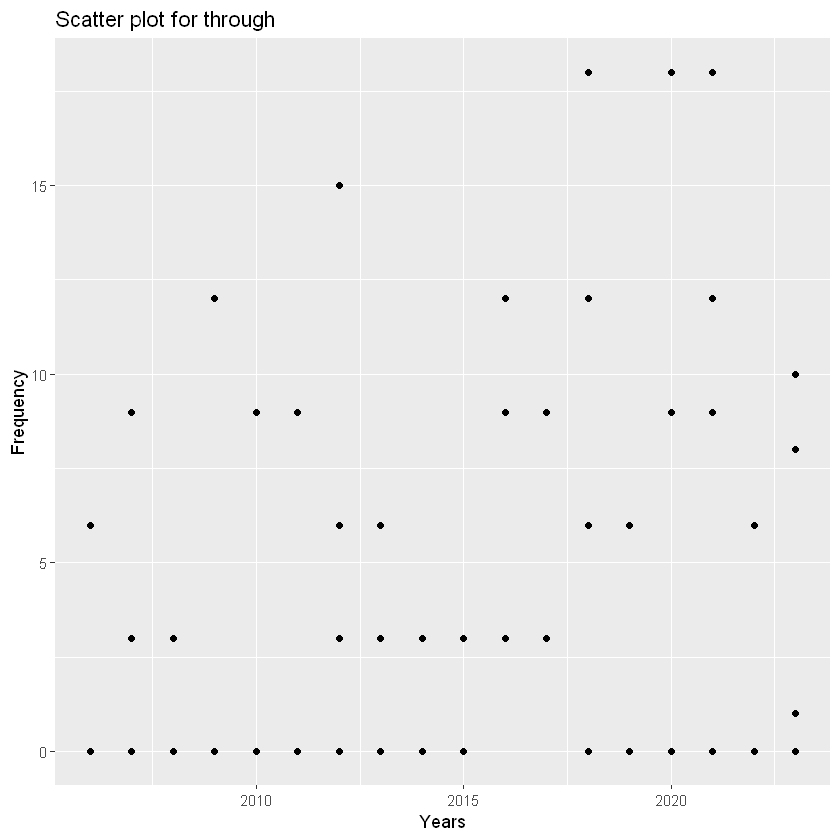

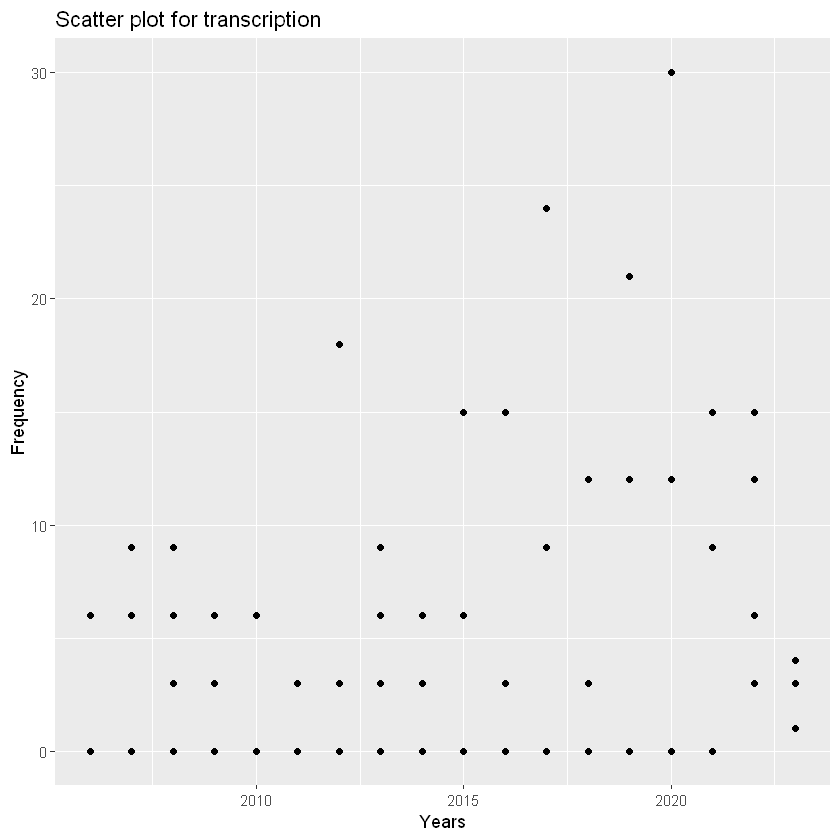

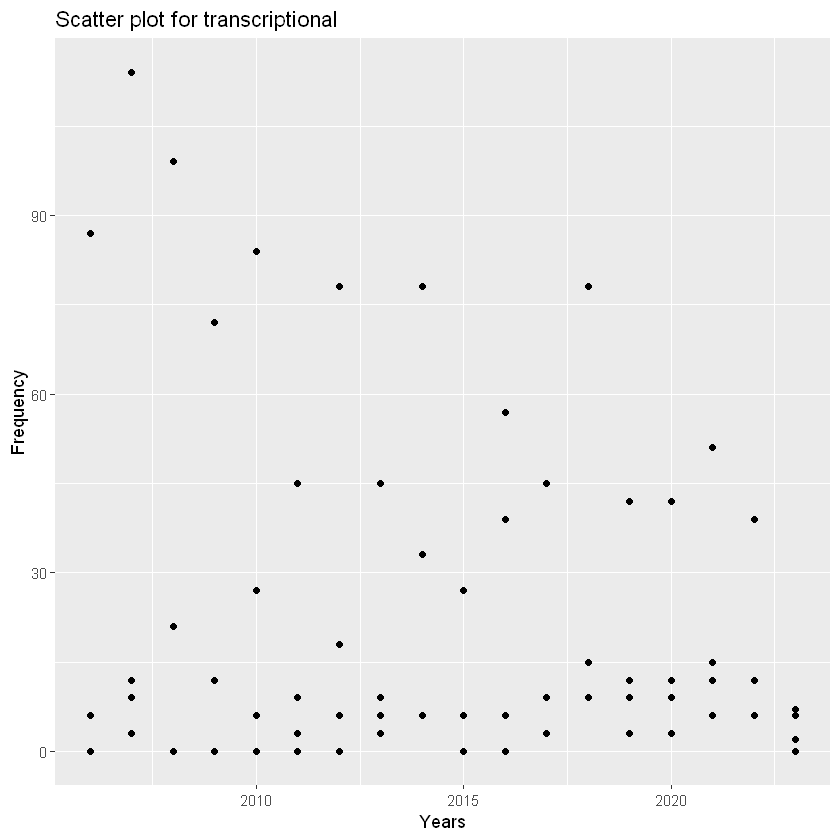

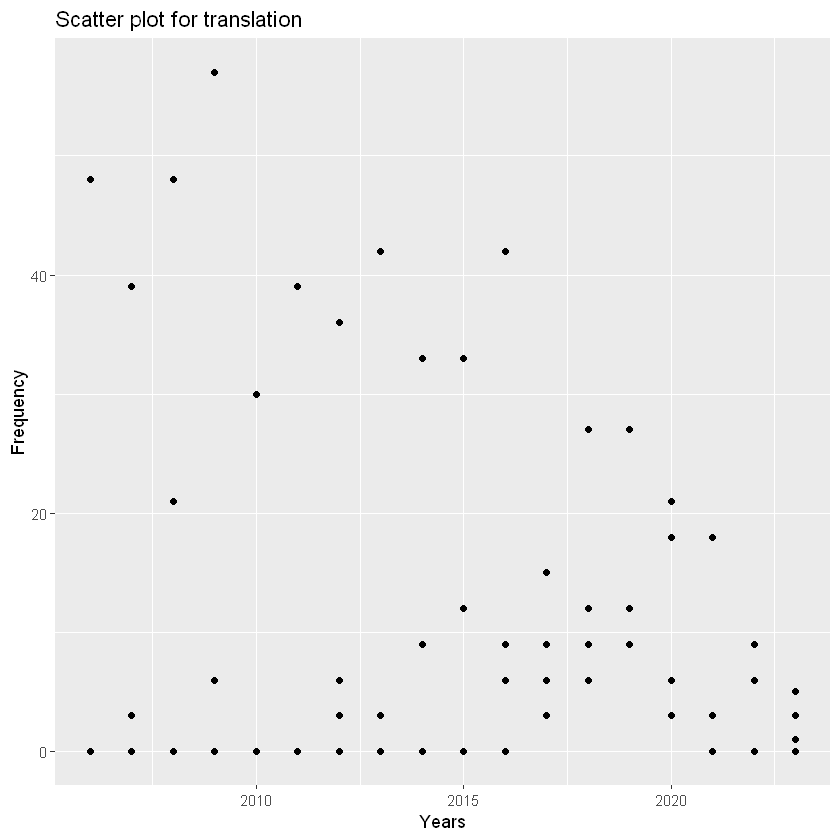

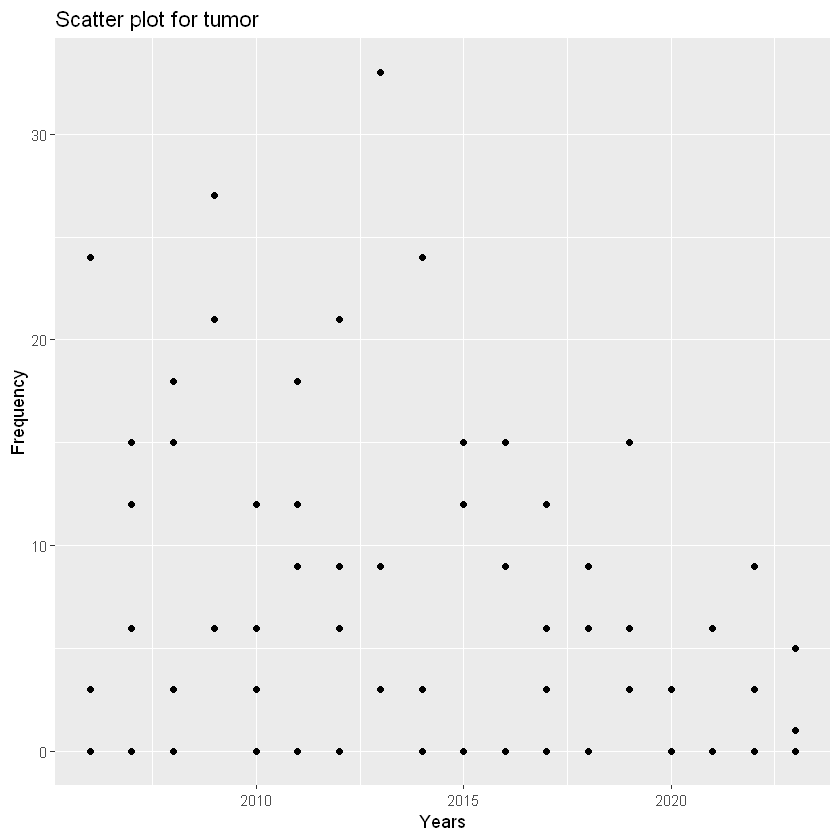

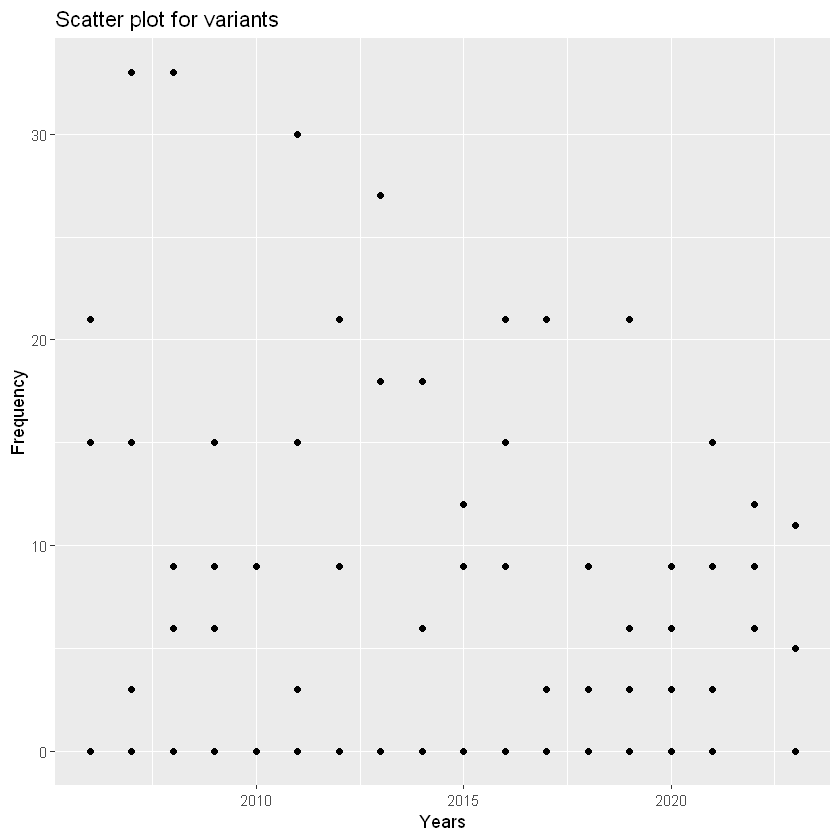

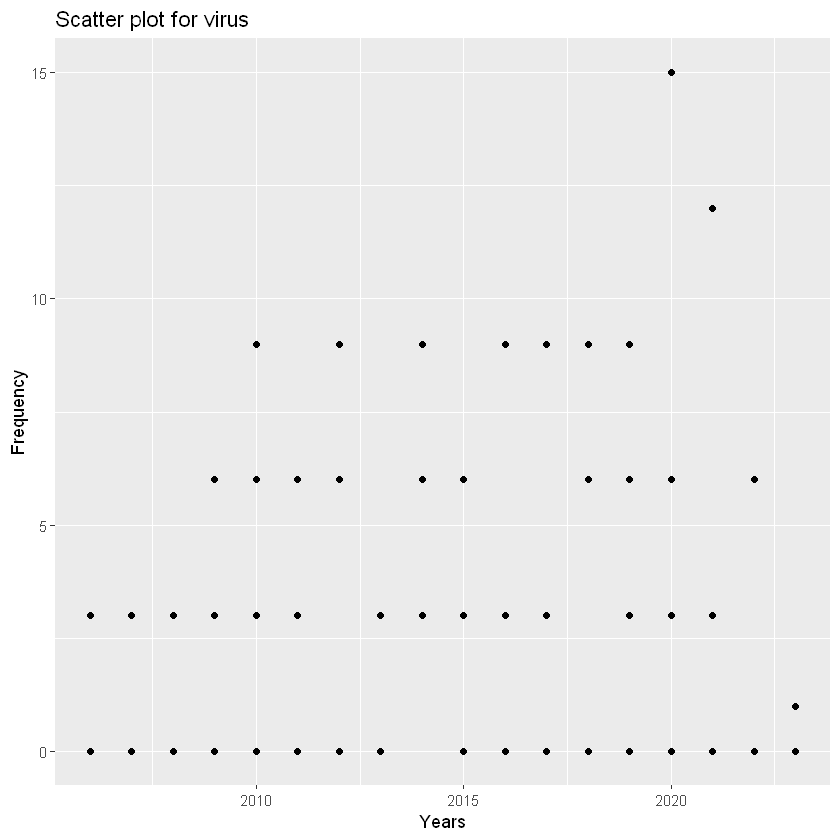

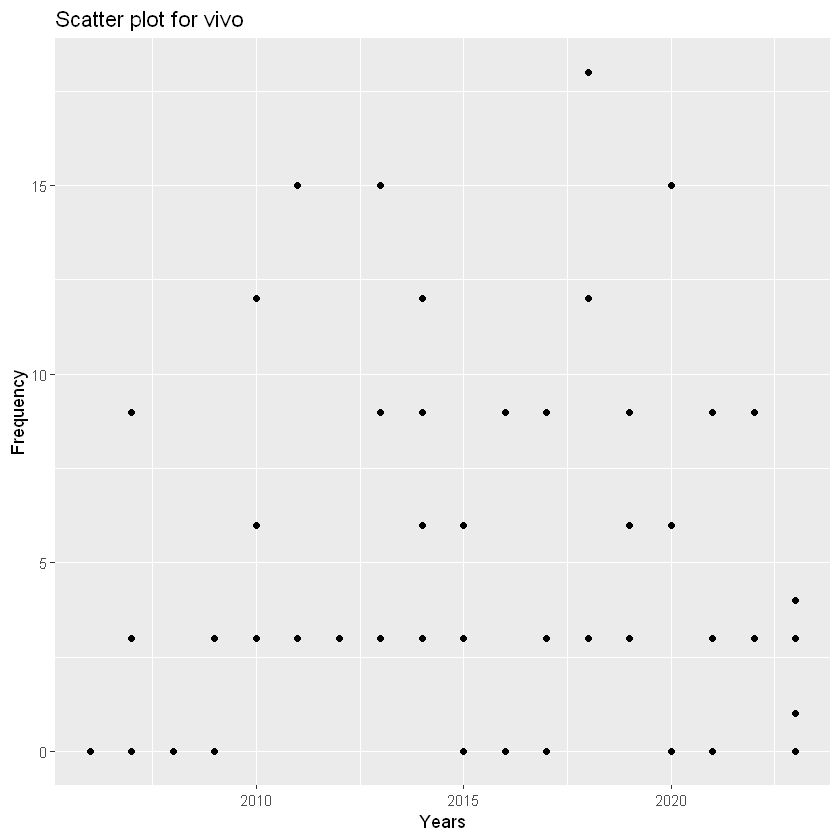

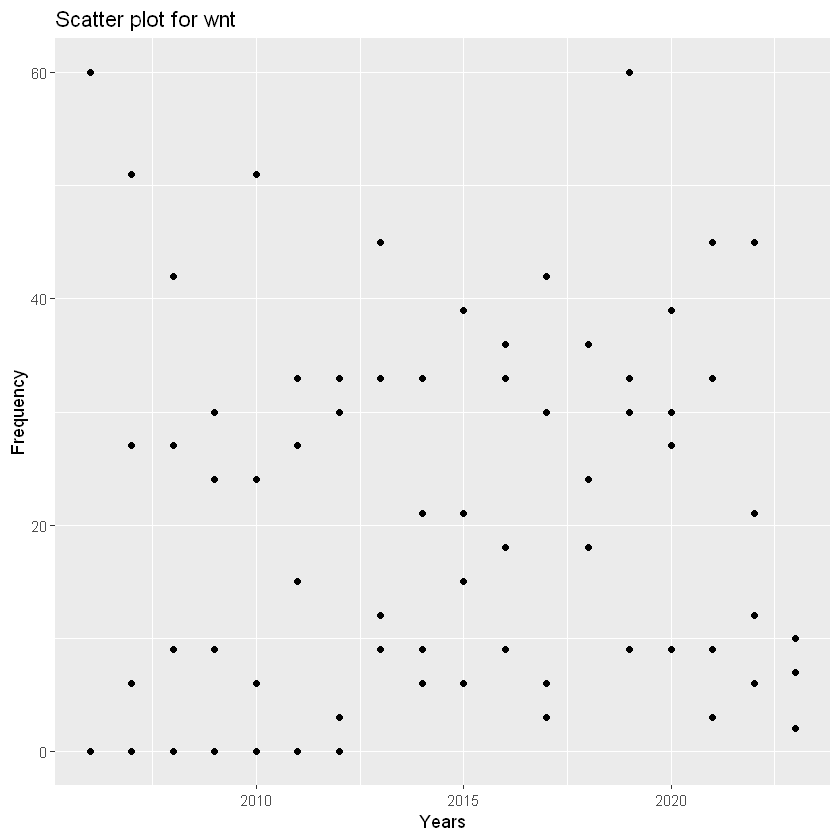

In [17]:
### scatter plots for all filtered words and their frequency per year

# Load required libraries
library(ggplot2)

# Assuming you have loaded the required libraries and have your result_dataframe

# Get unique words from the result_dataframe
unique_words <- unique(filtered_data$Word)

# Loop through each unique word and create a scatter plot
for (word in unique_words) {
  word_data <- result_dataframe[filtered_data$Word == word, ]
  
  # Create a scatter plot for the current word
  plot <- ggplot(word_data, aes(x = Years, y = frequency)) +
    geom_point() +
    ggtitle(paste("Scatter plot for", word)) +
    xlab("Years") +
    ylab("Frequency")
  
  # Save or display the scatter plot
  # You can choose to save it using ggsave() or display it using print()
  print(plot)
}


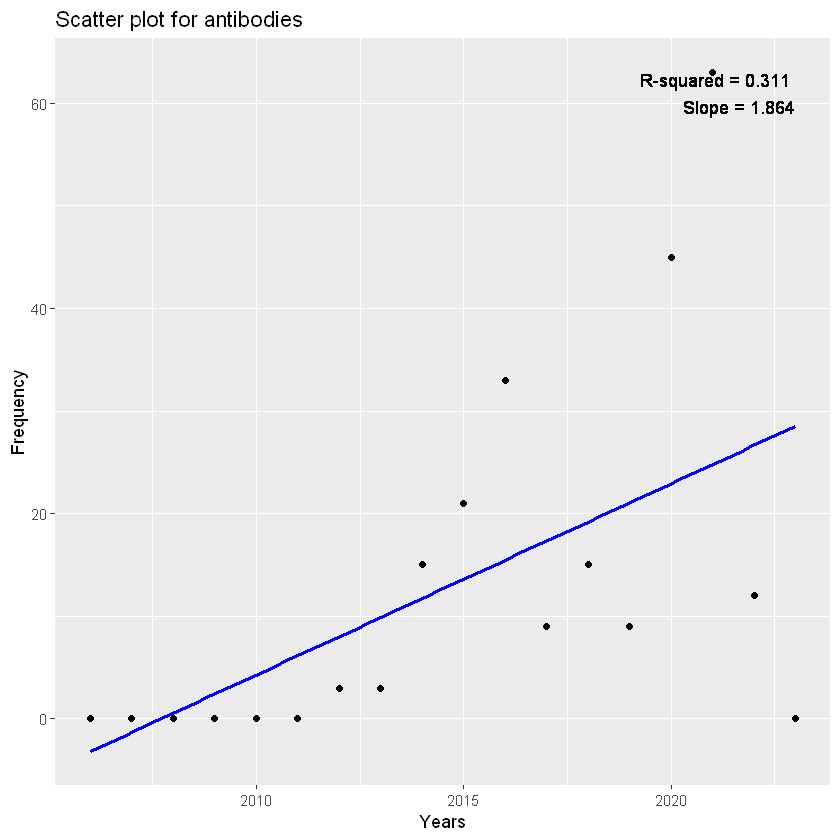

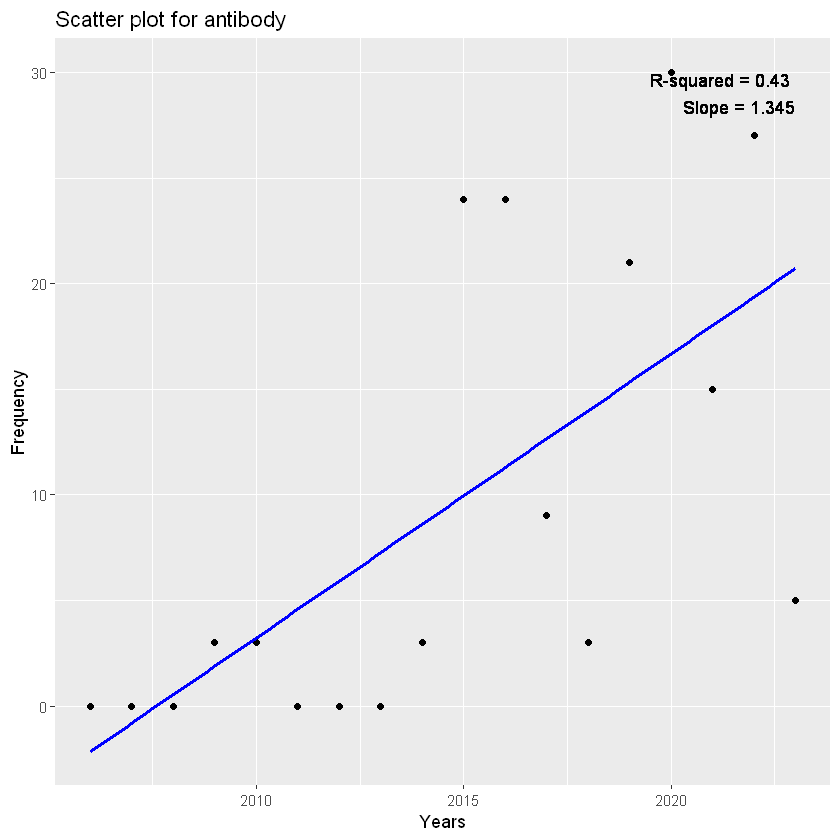

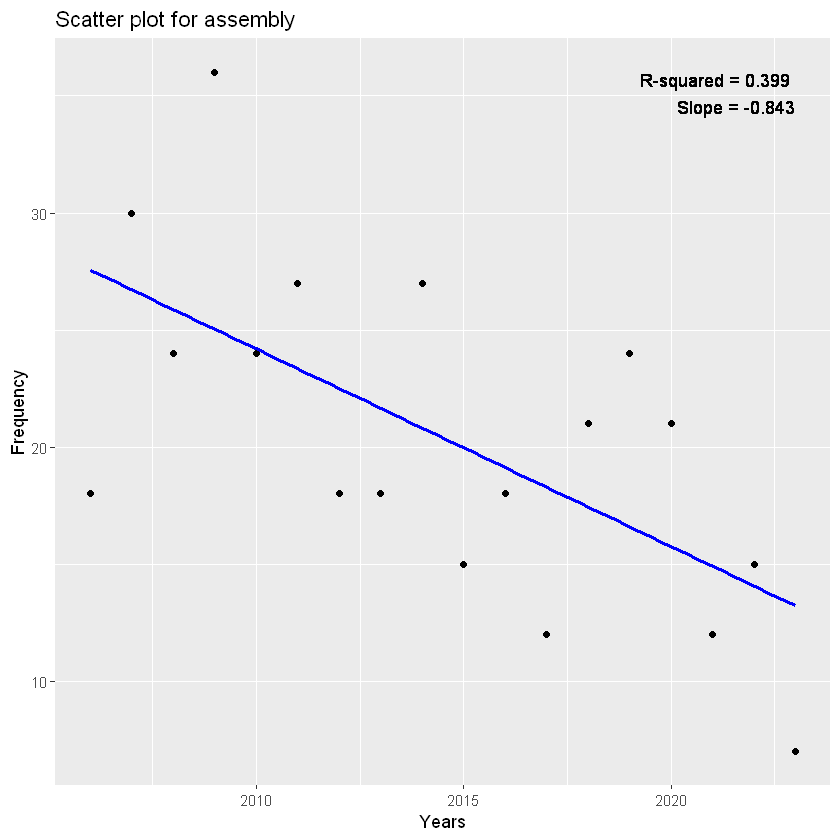

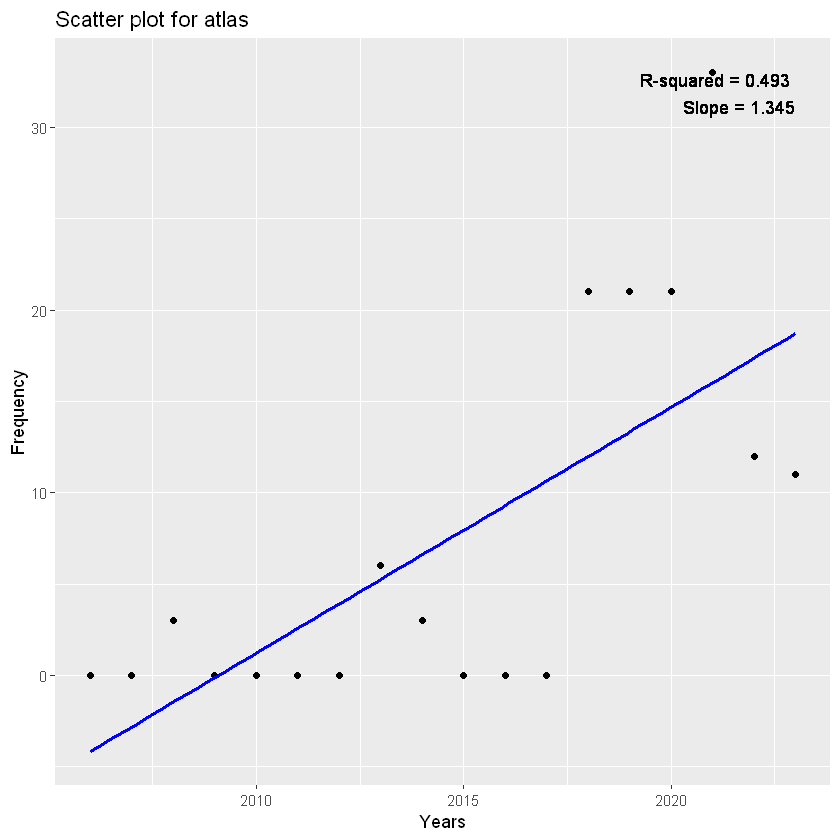

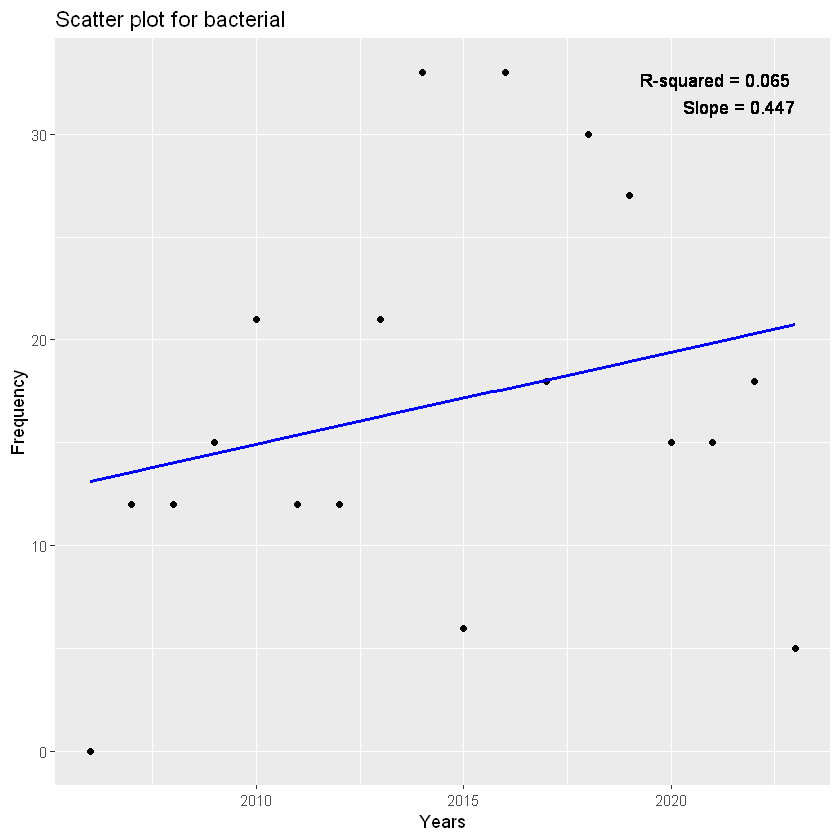

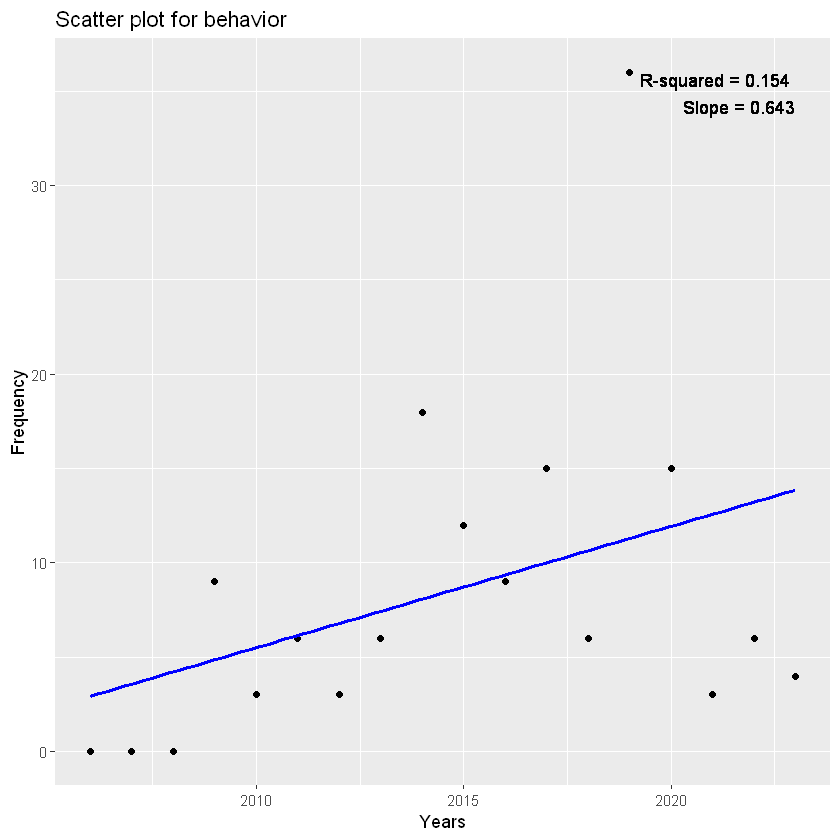

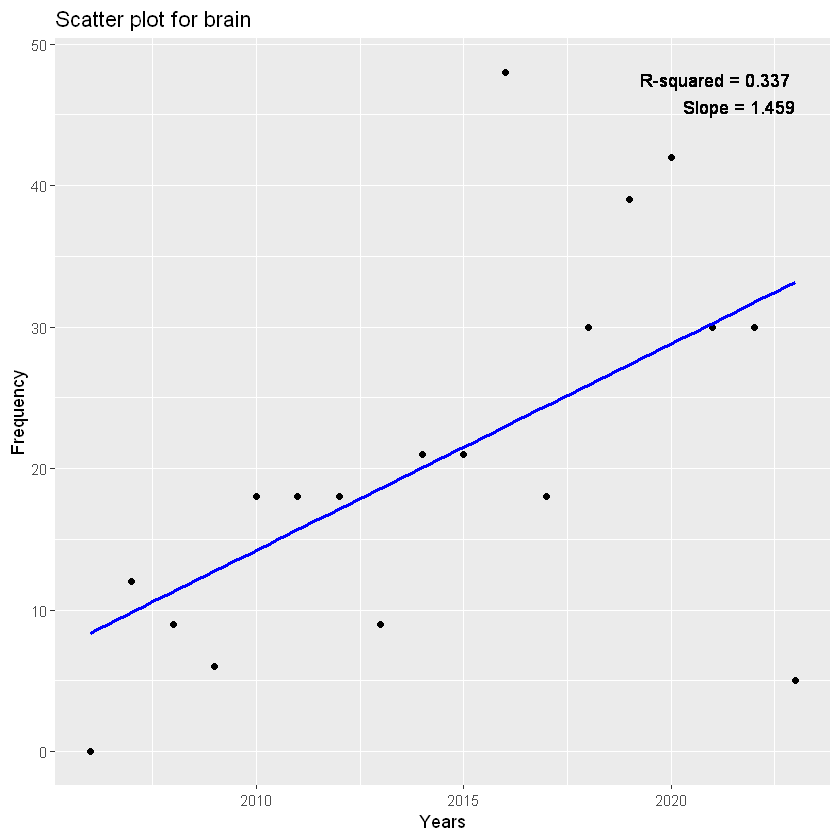

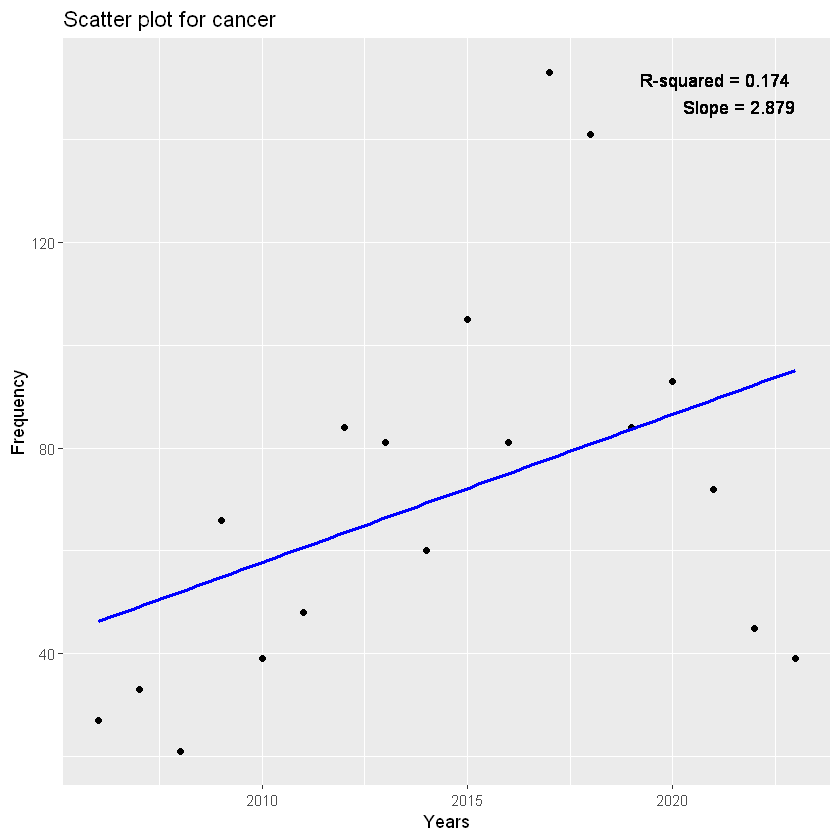

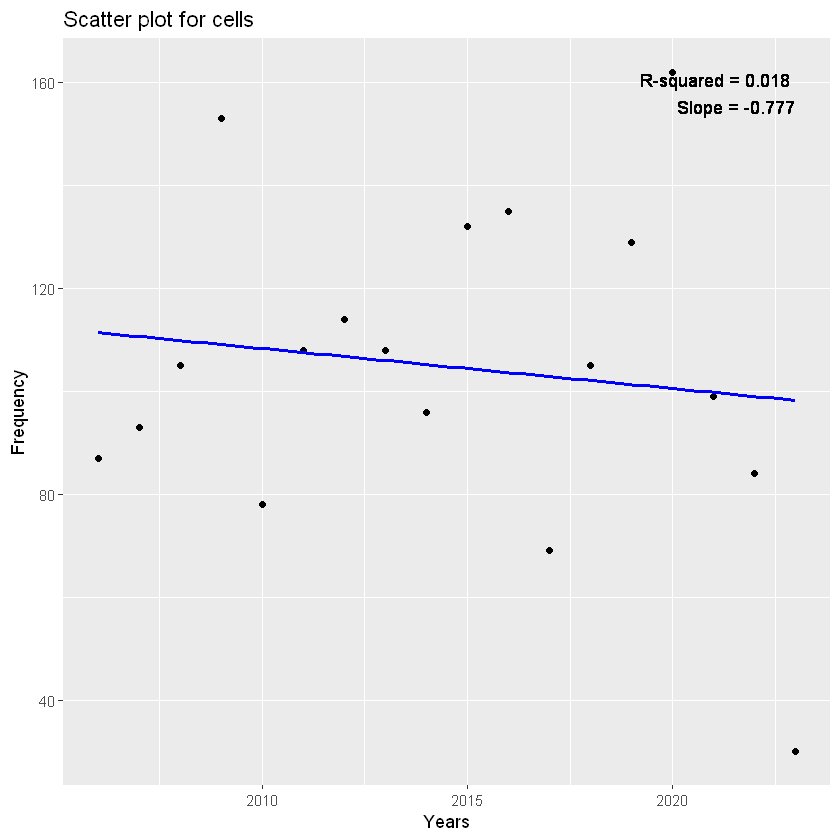

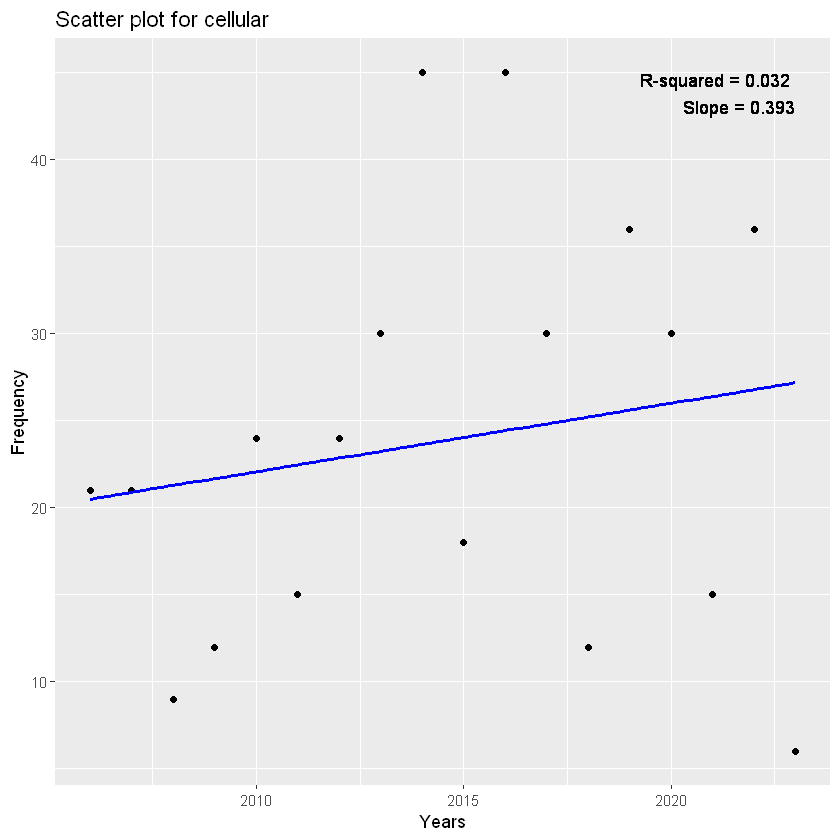

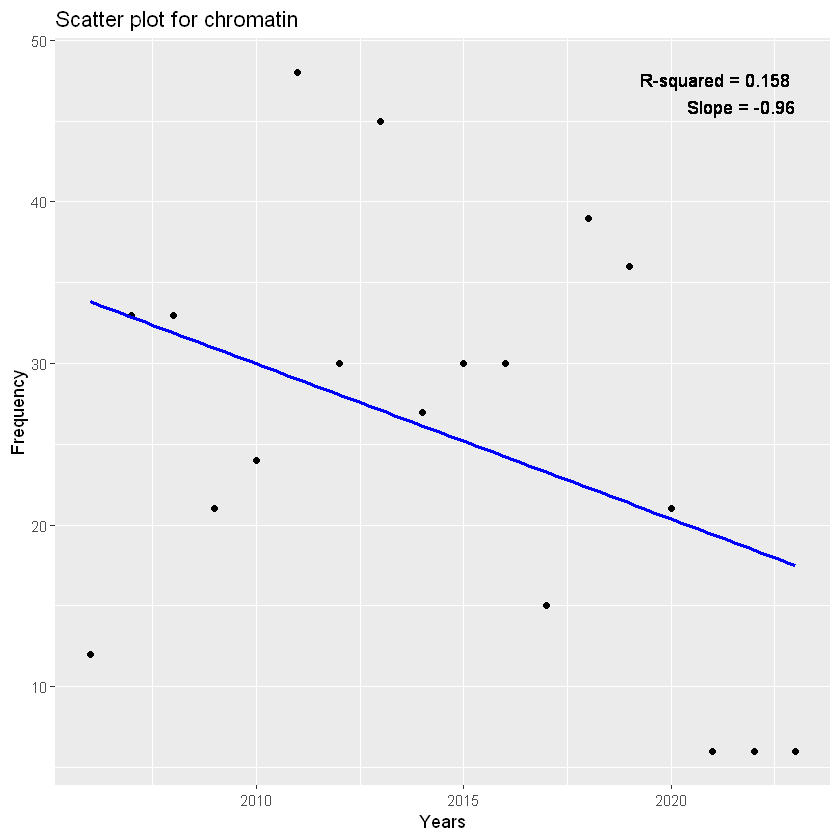

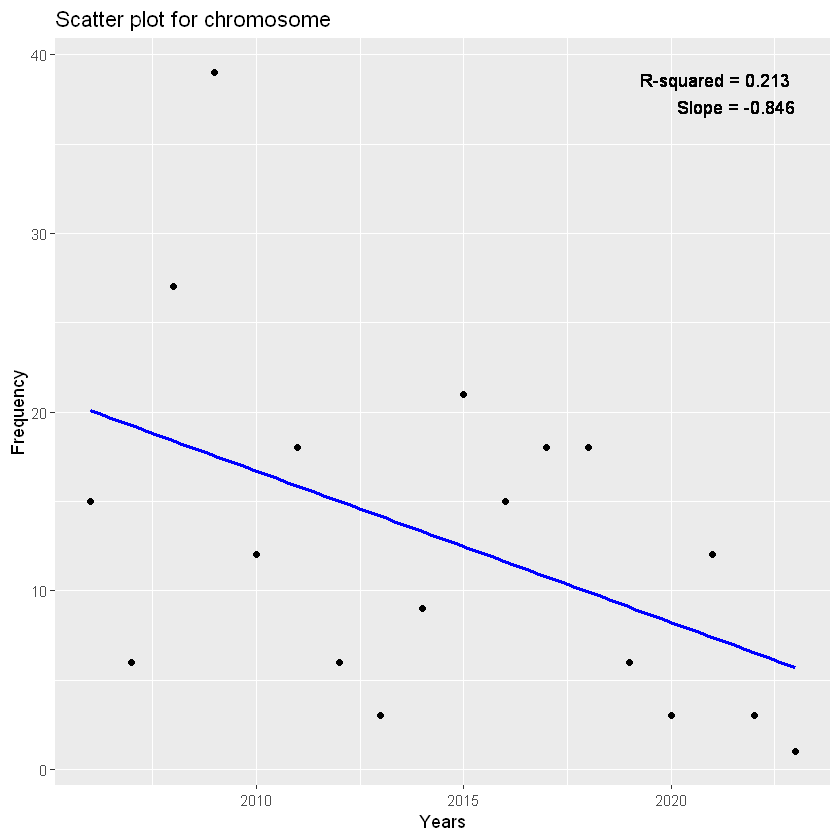

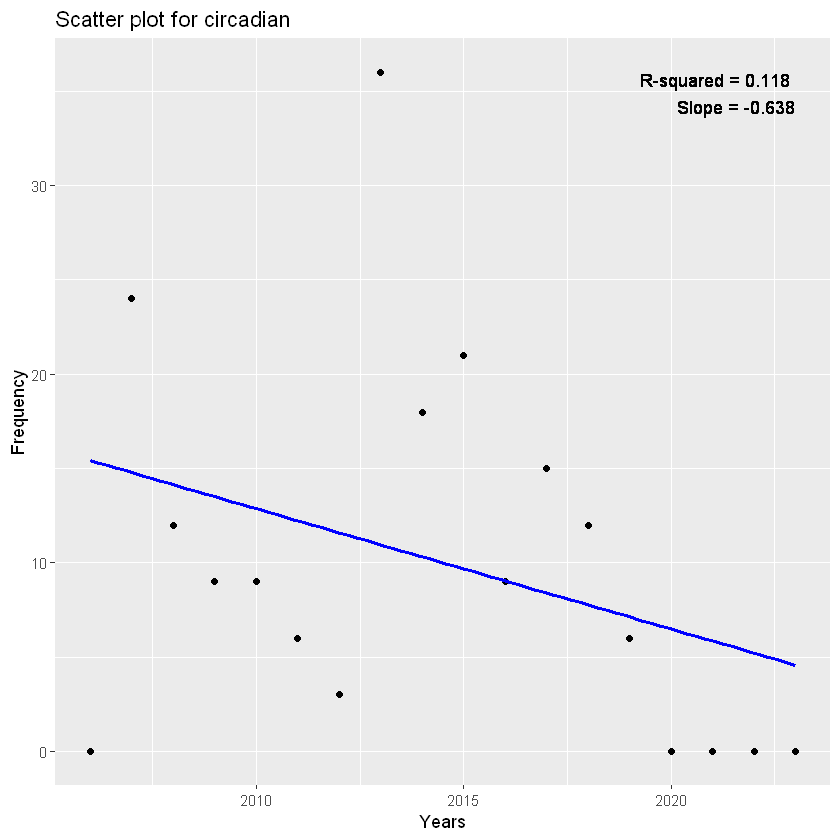

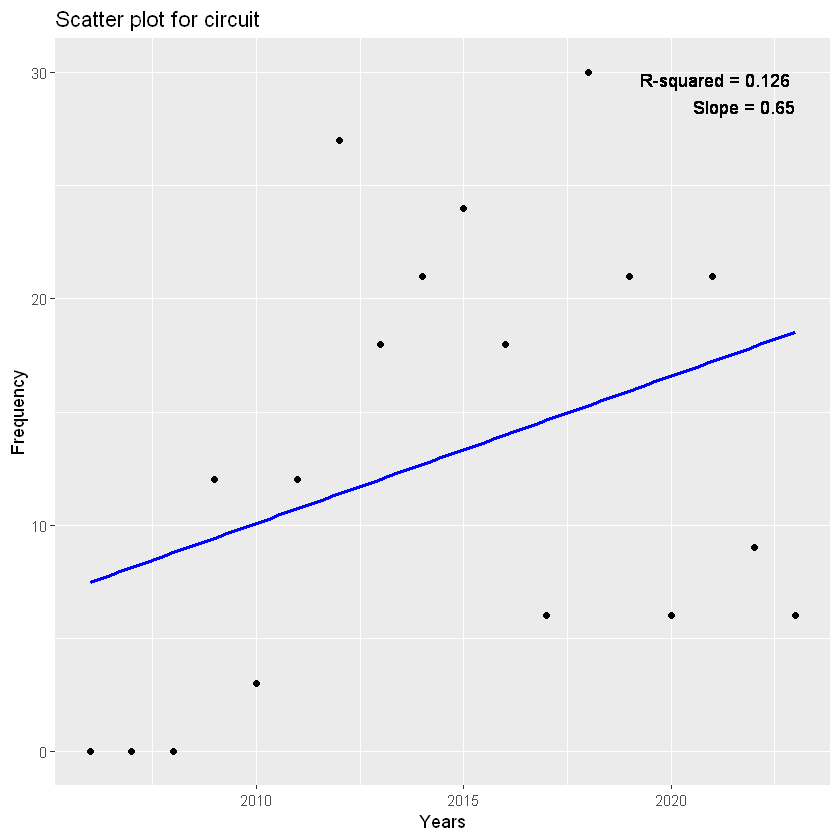

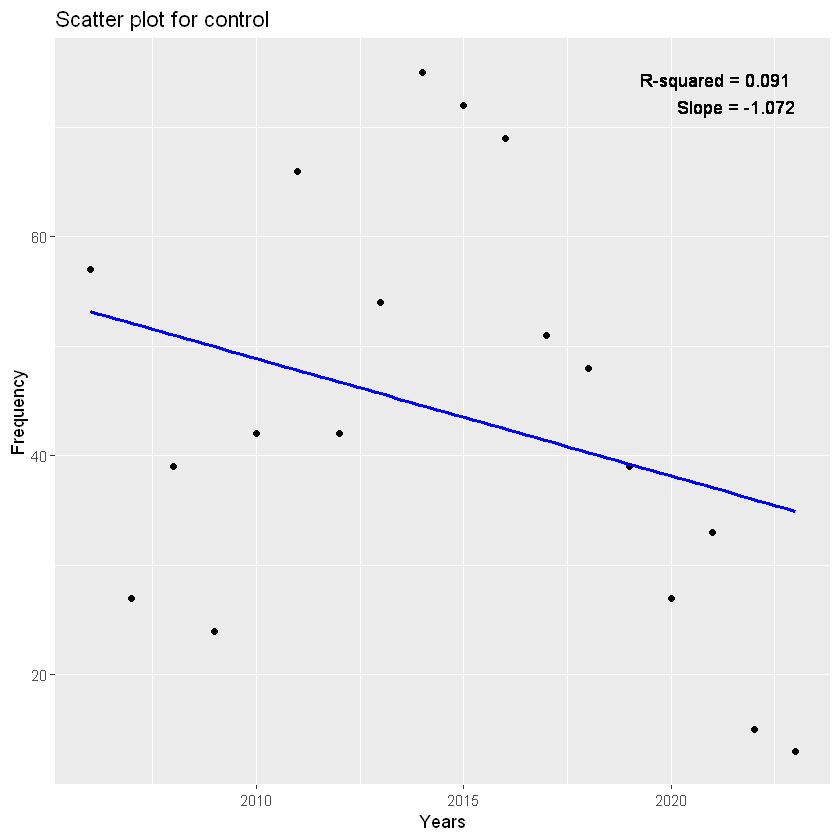

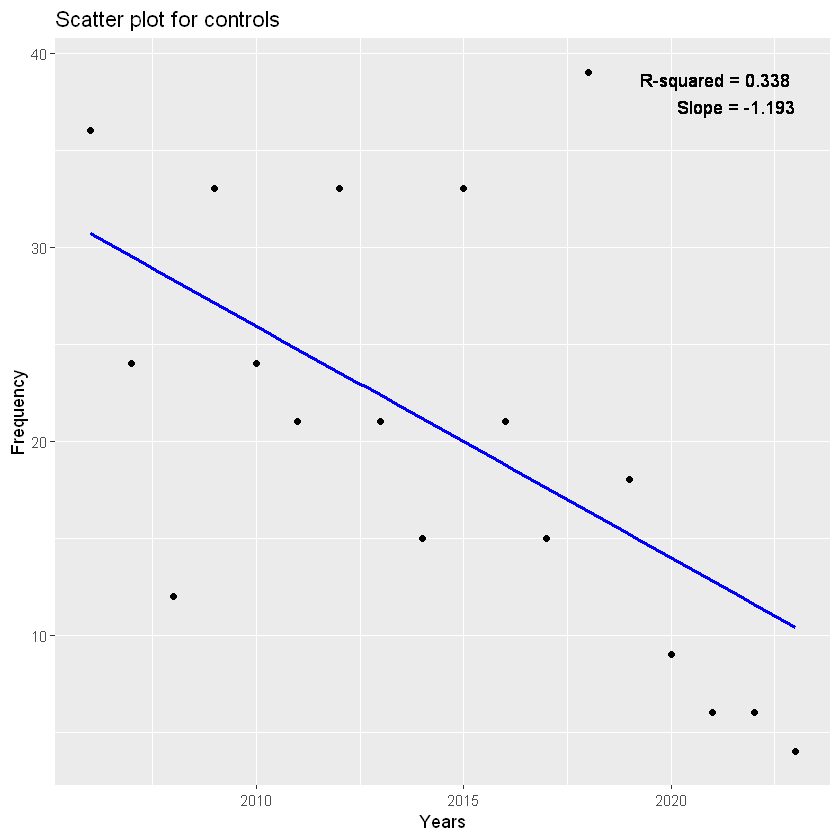

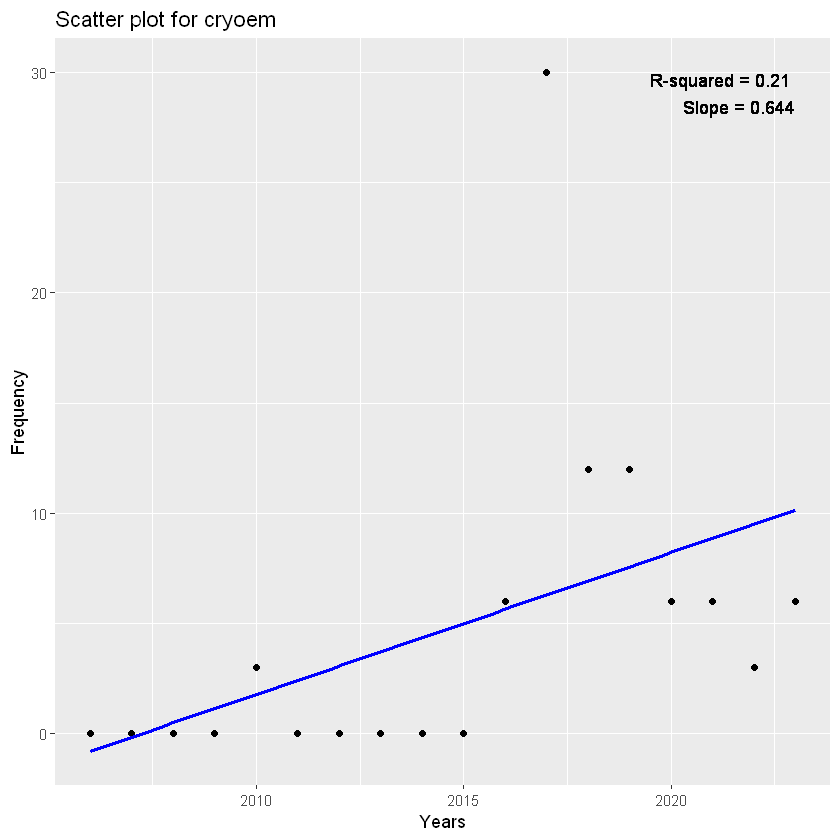

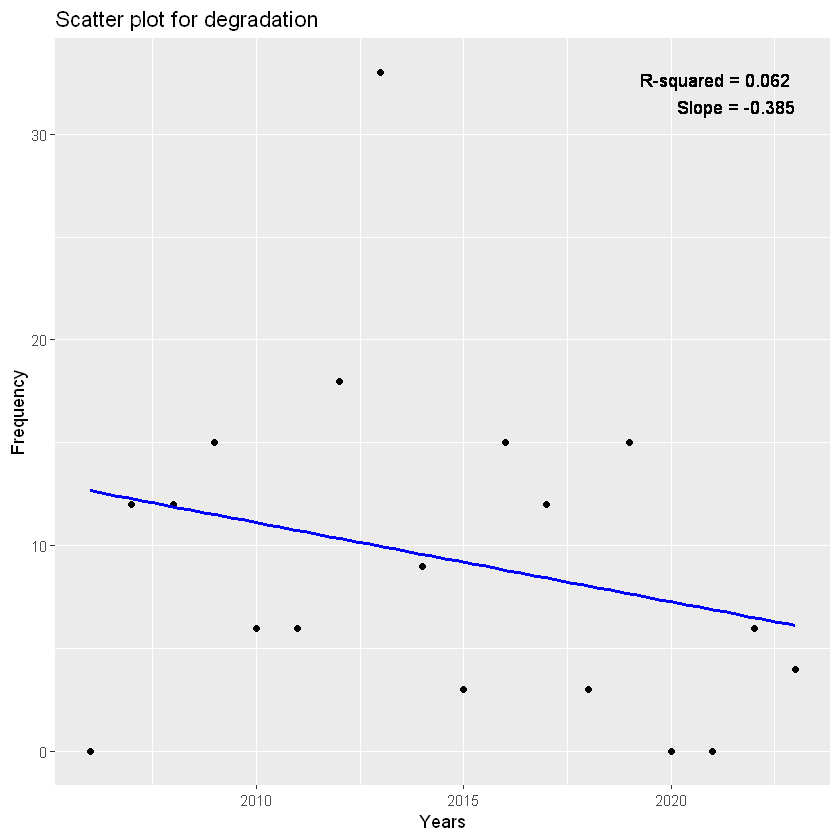

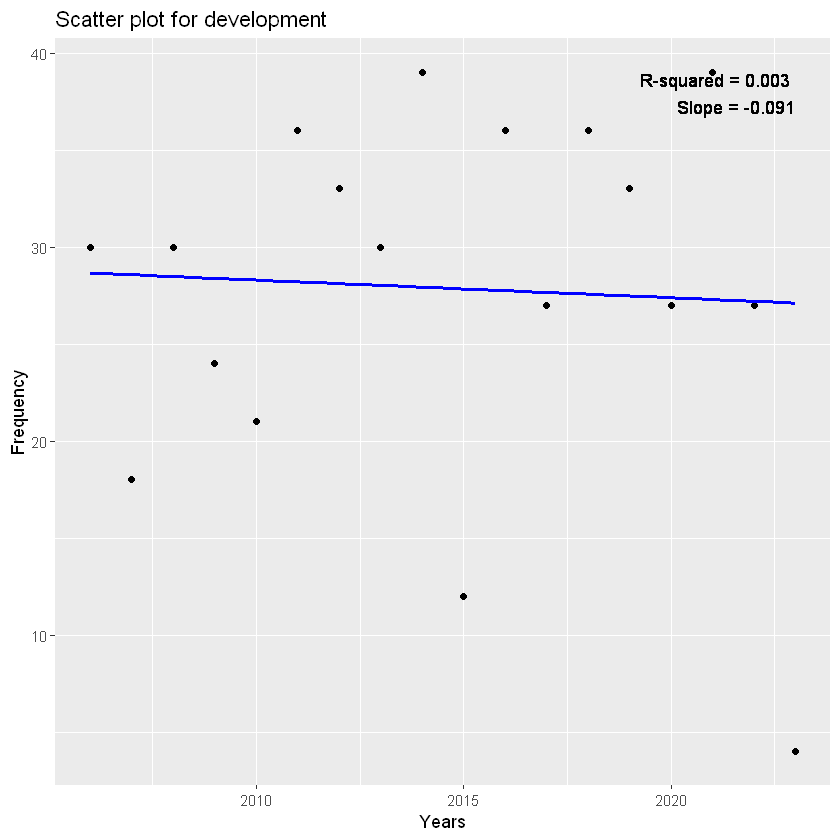

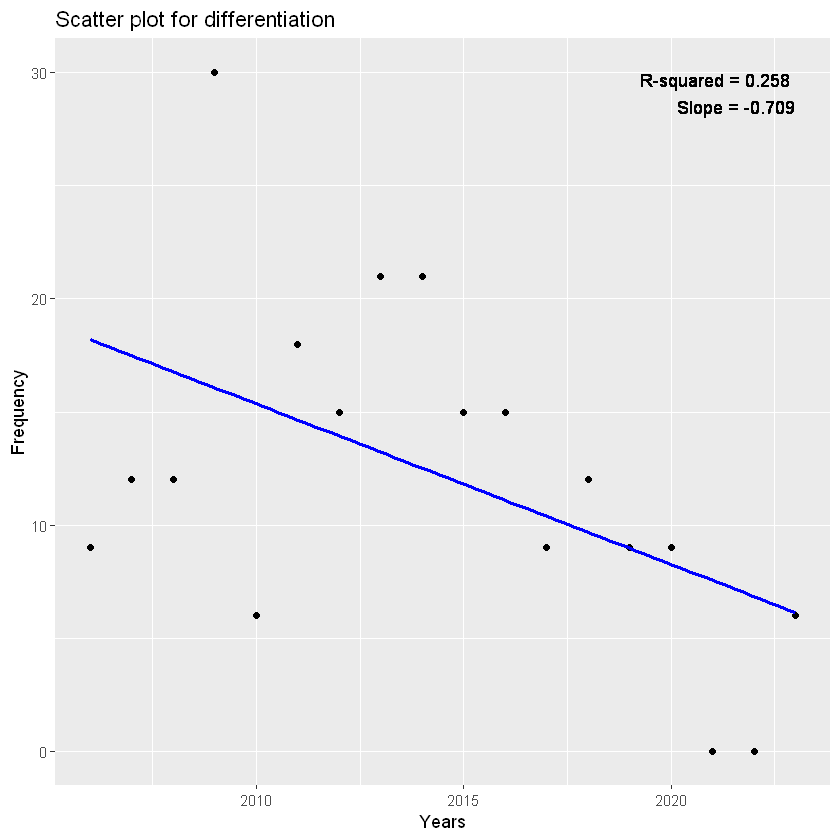

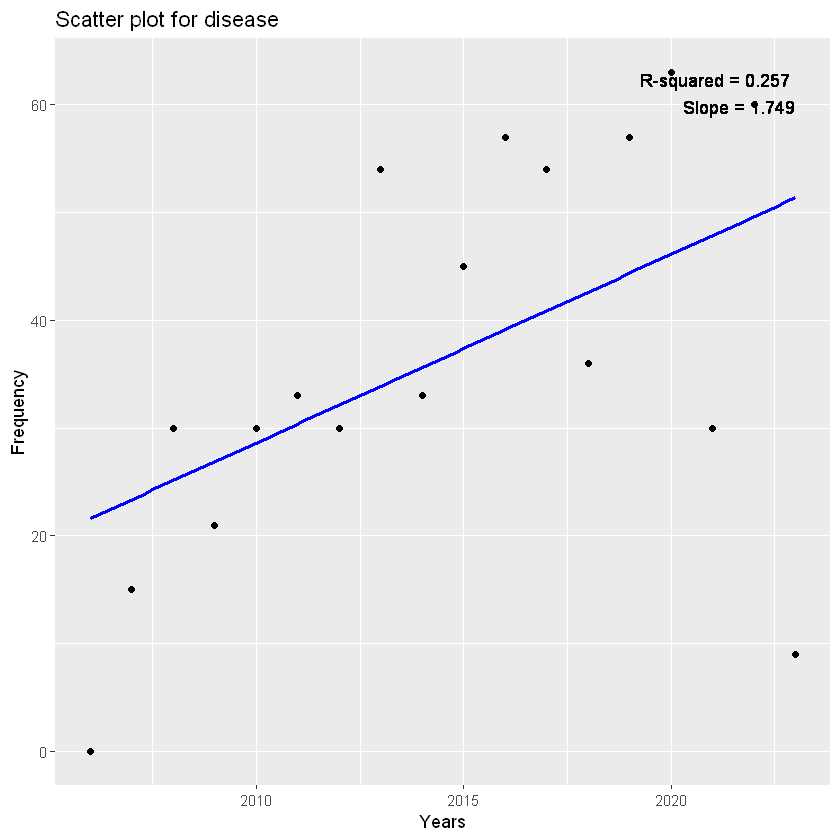

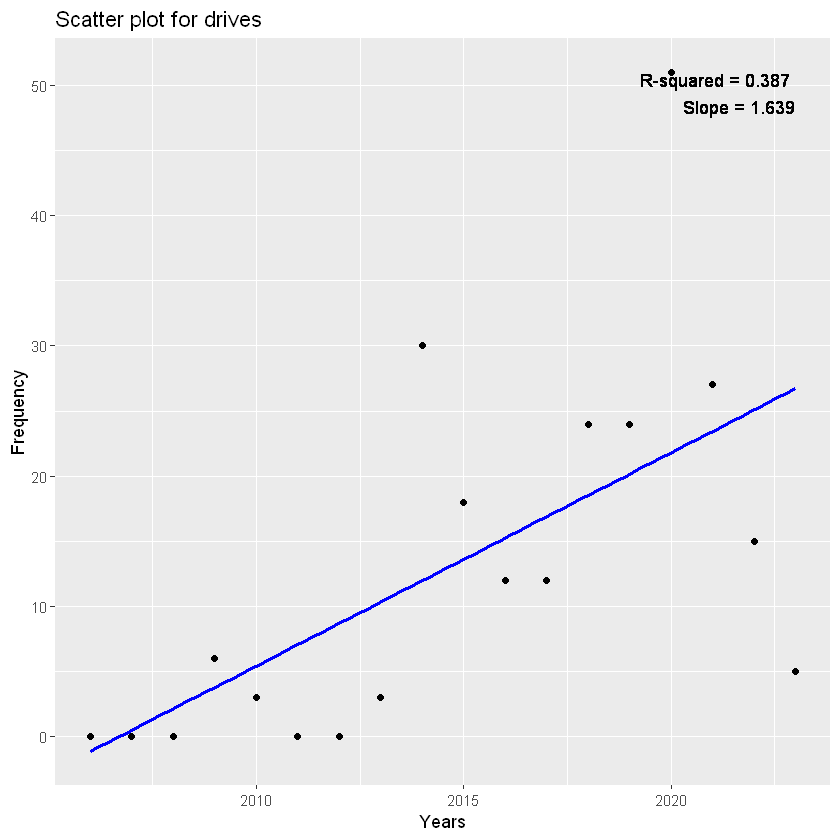

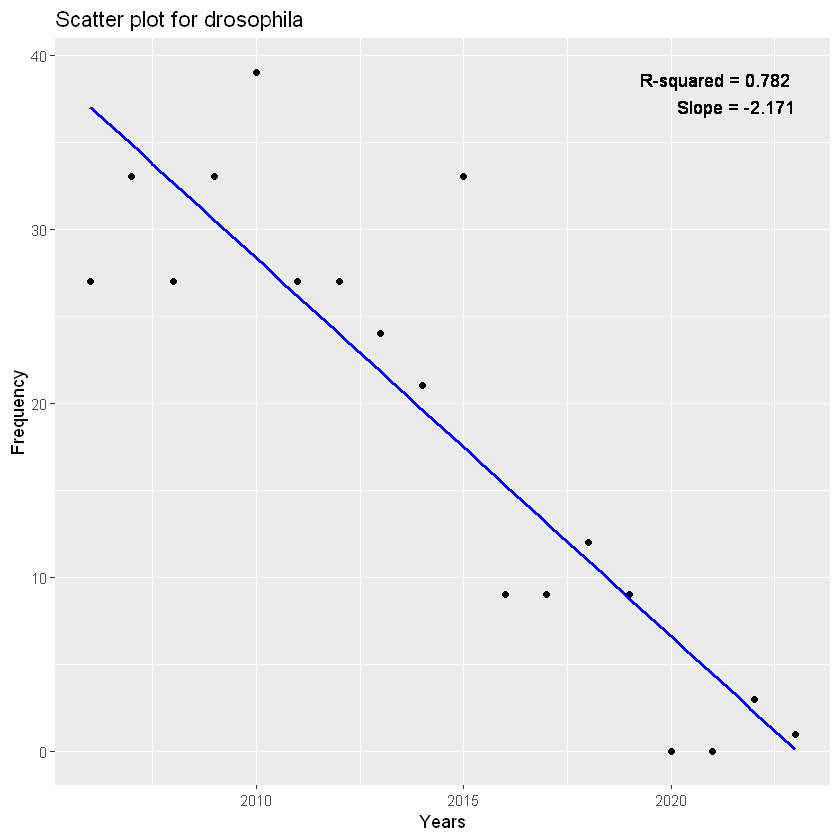

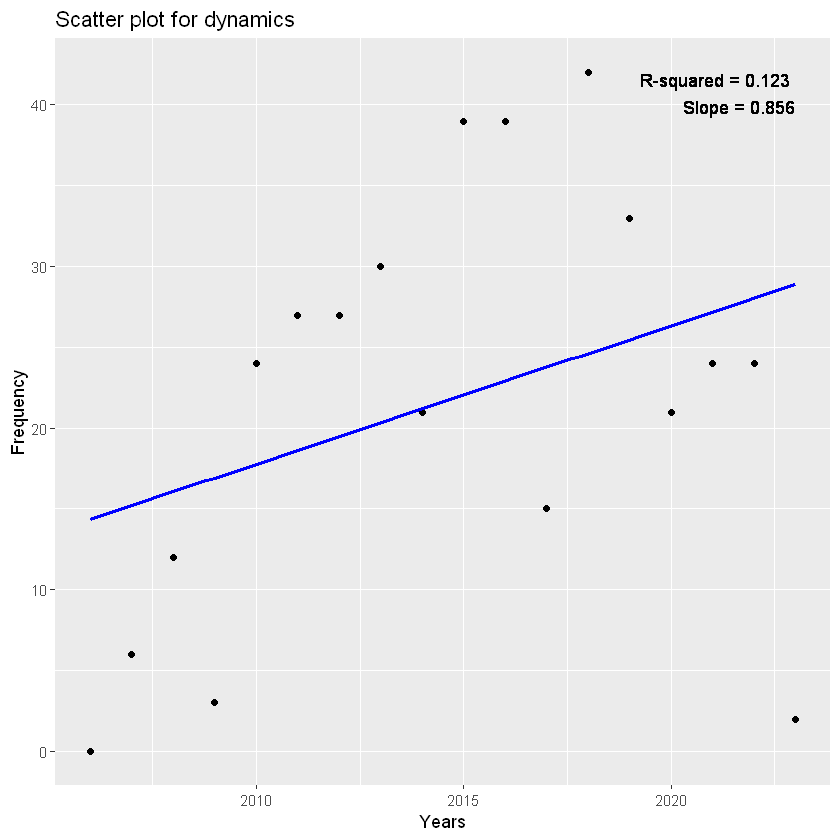

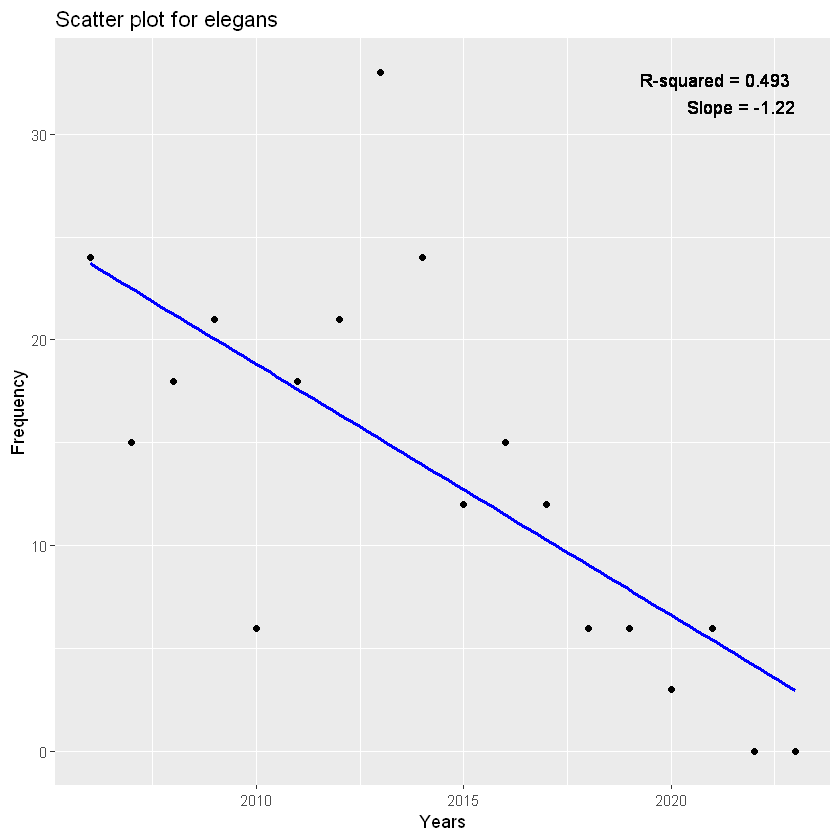

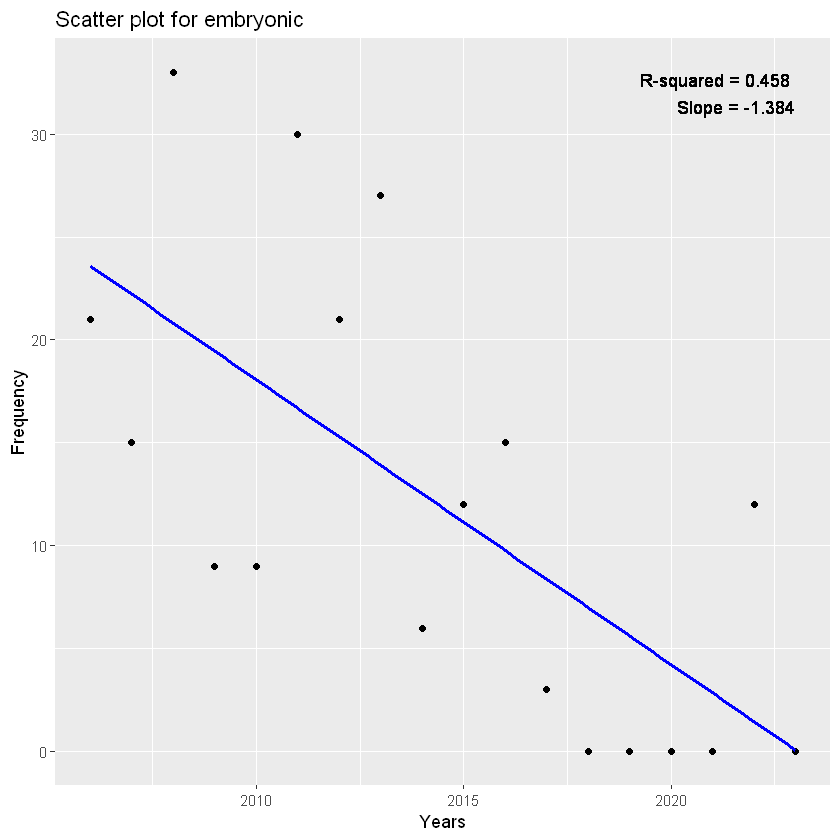

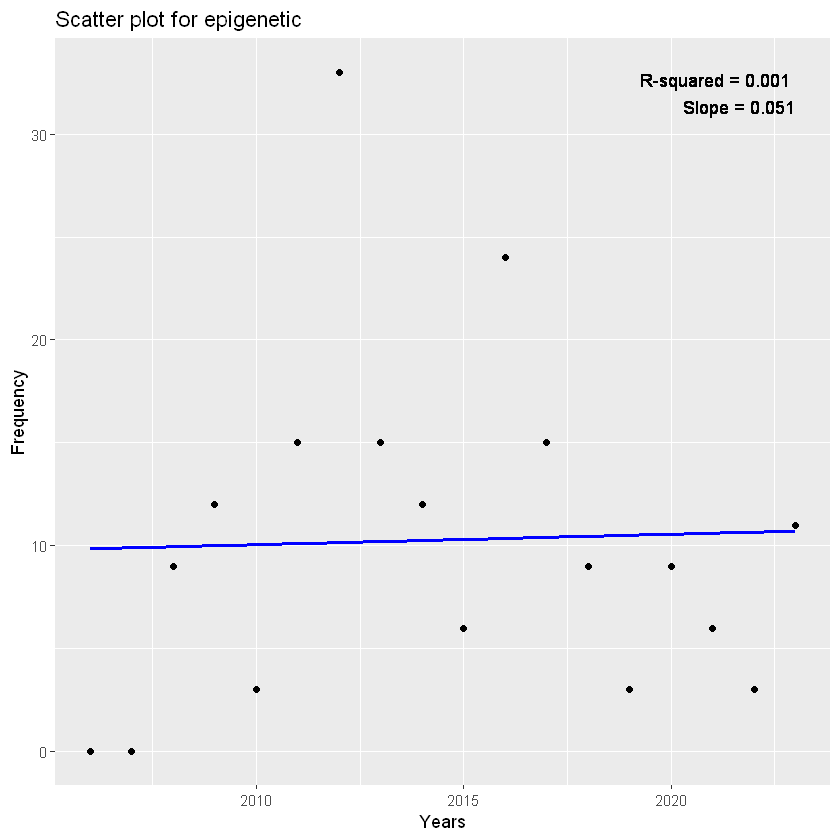

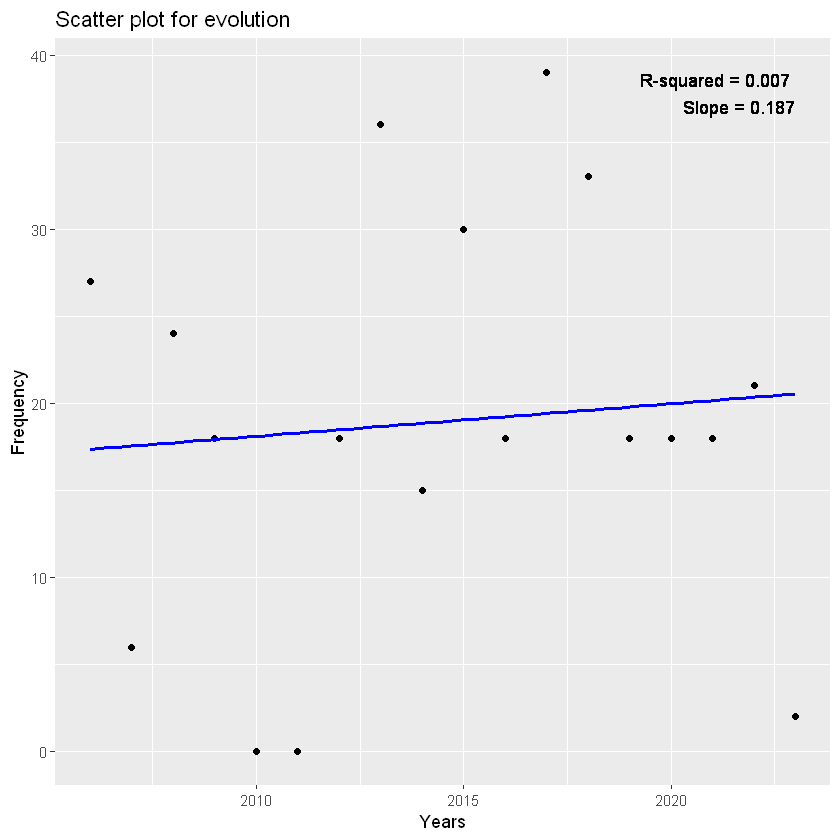

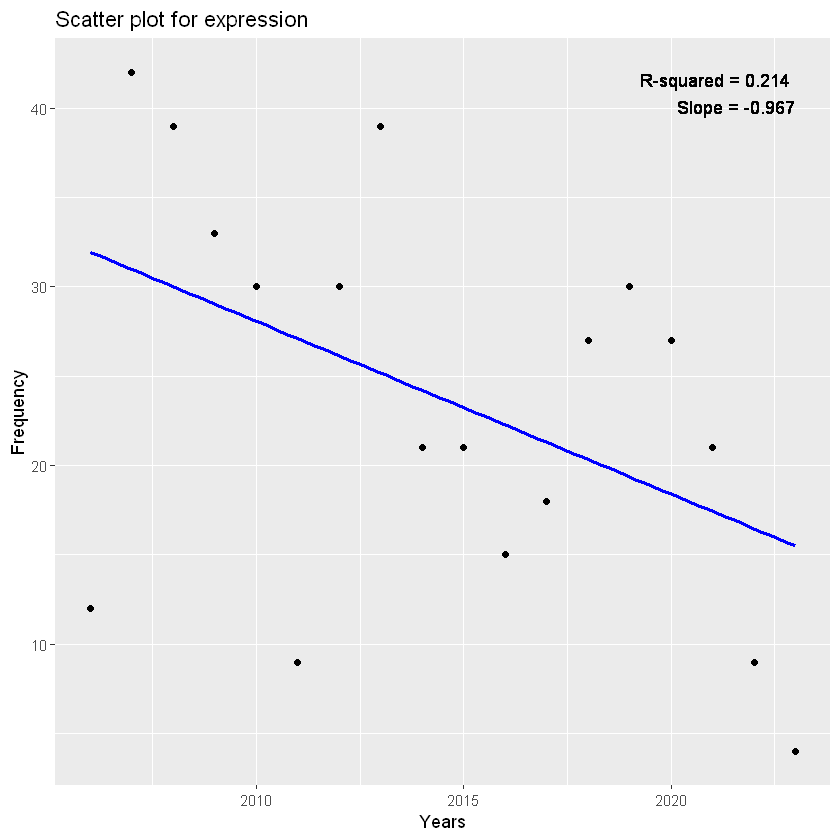

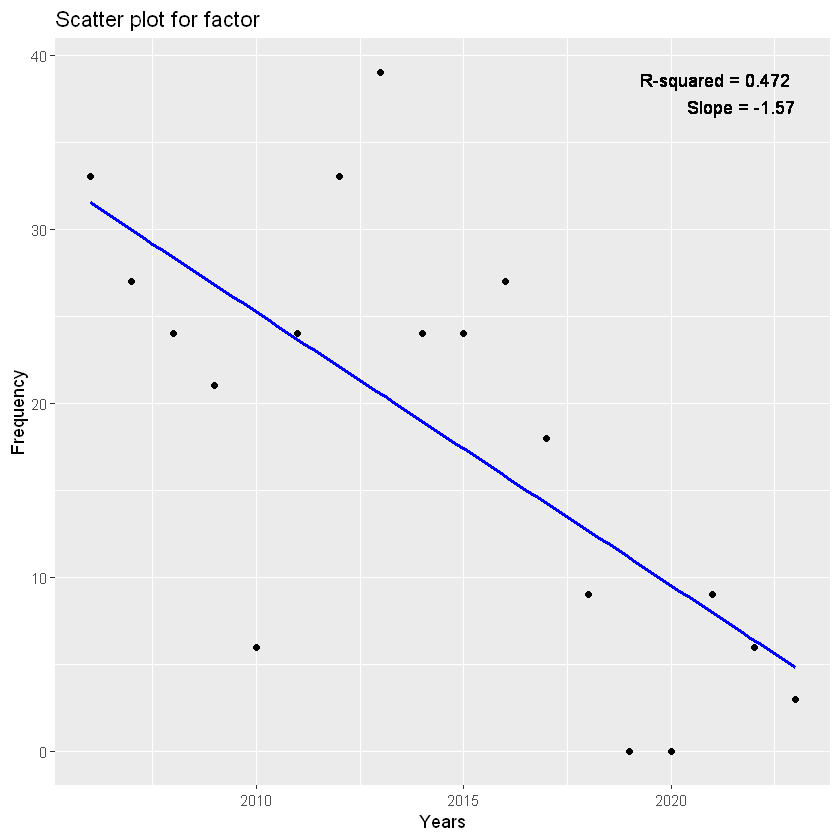

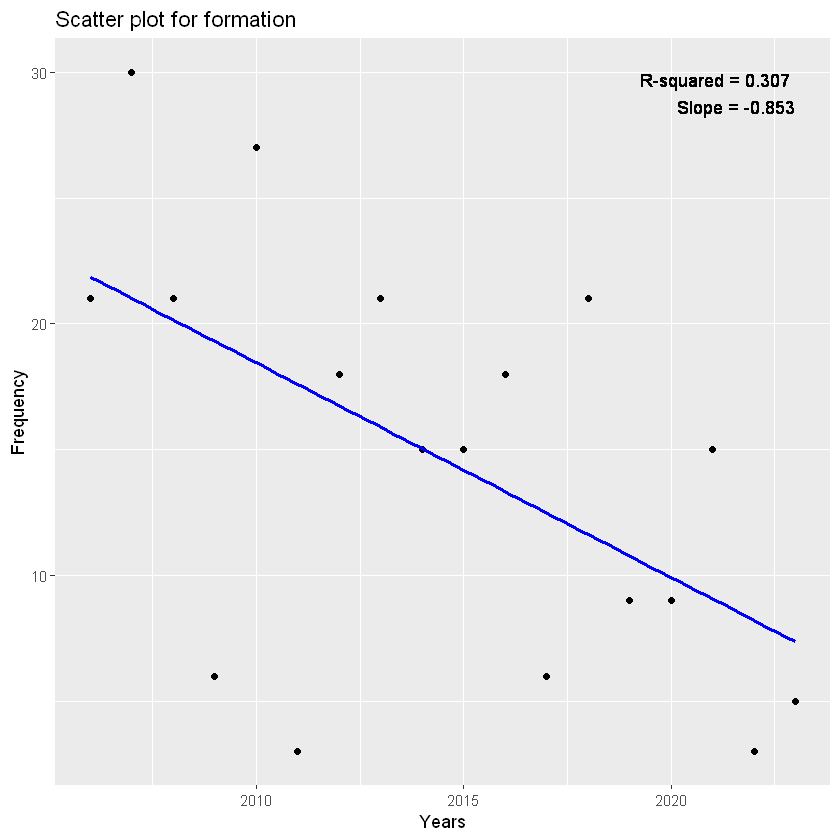

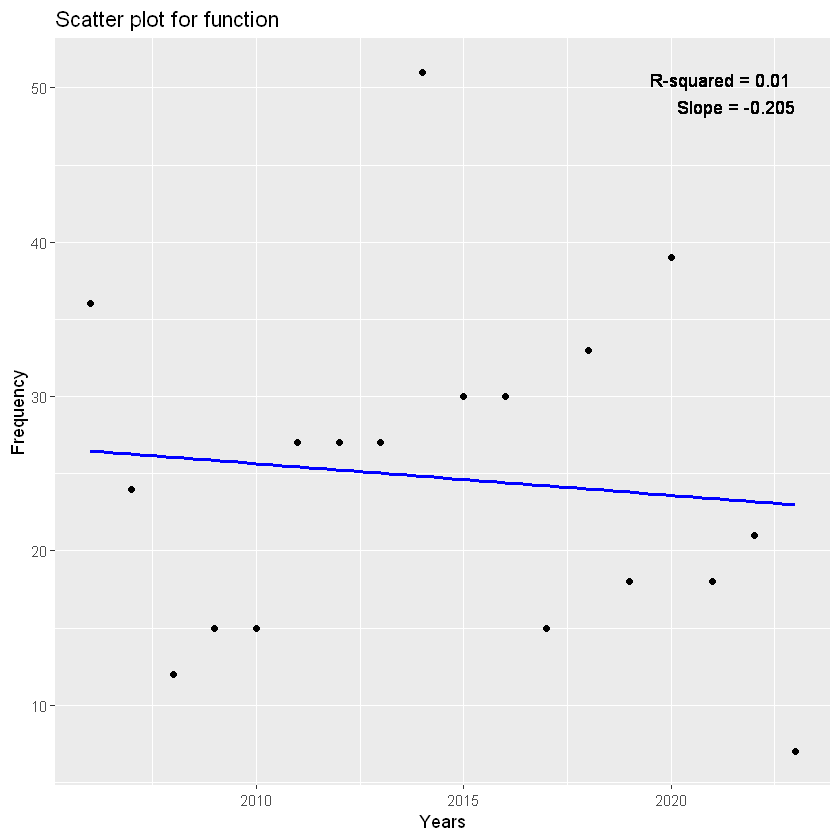

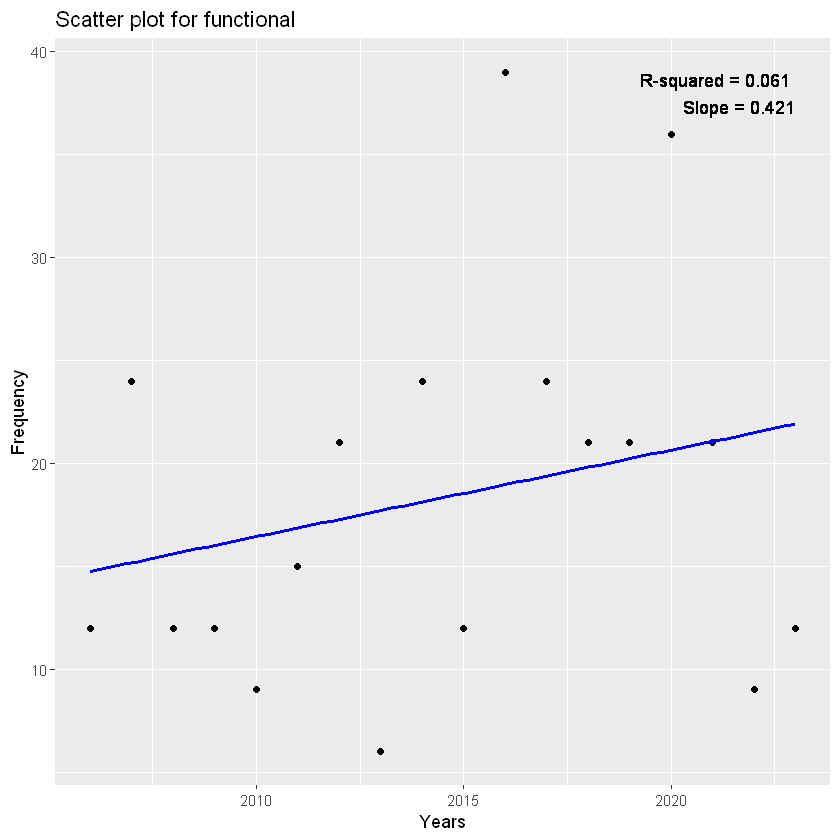

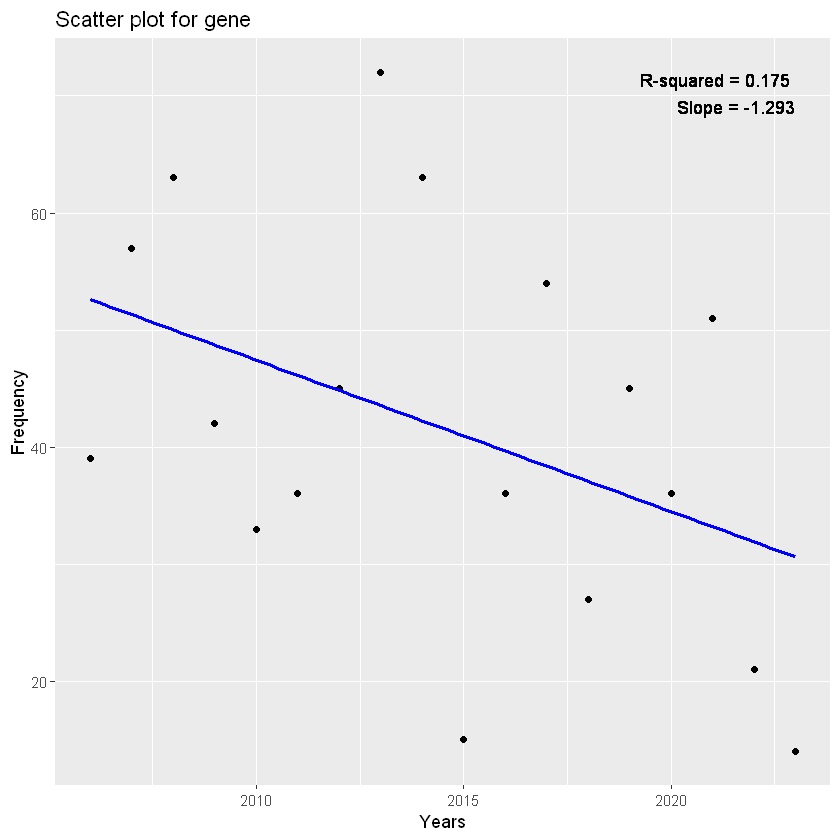

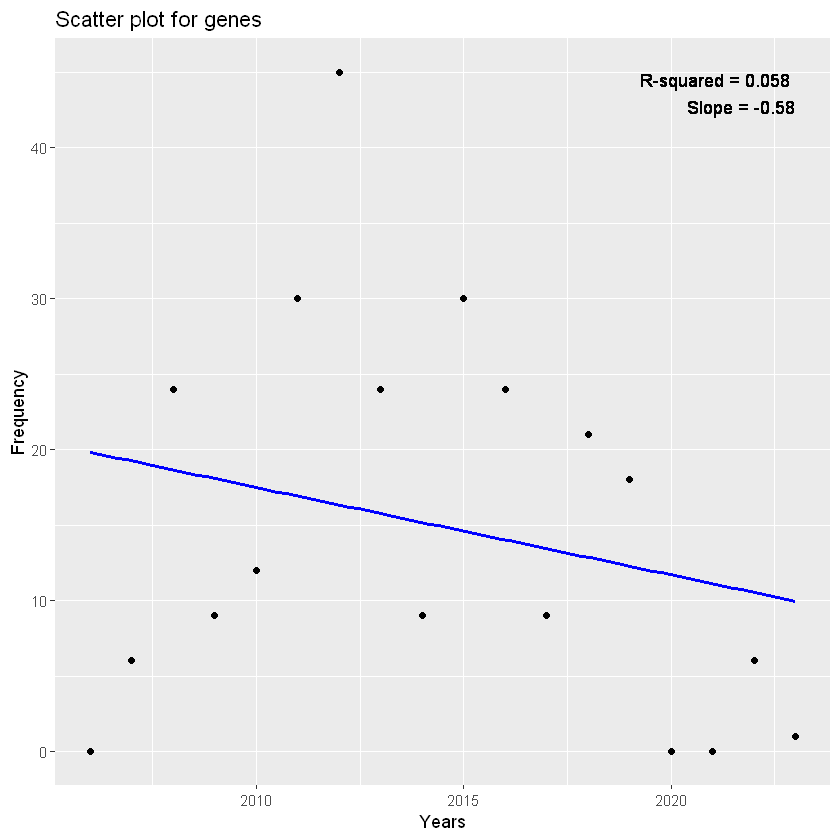

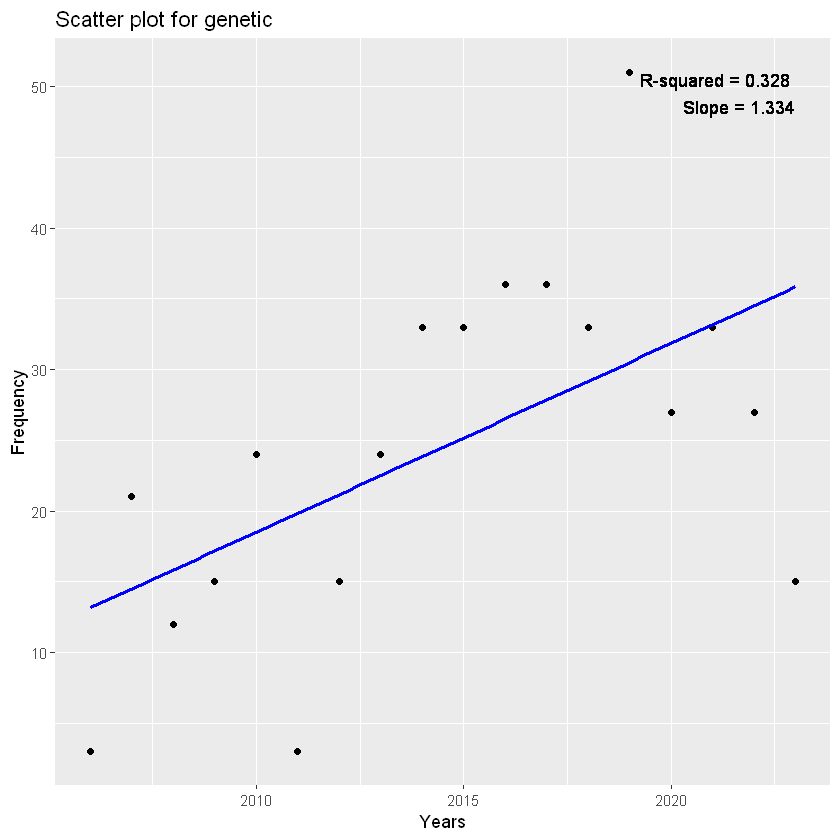

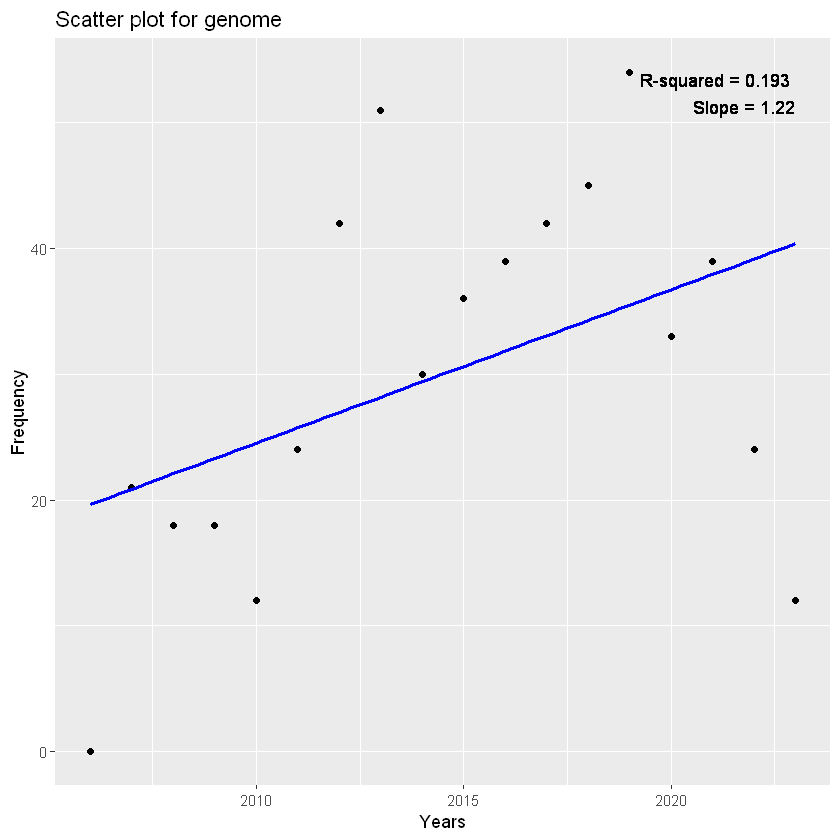

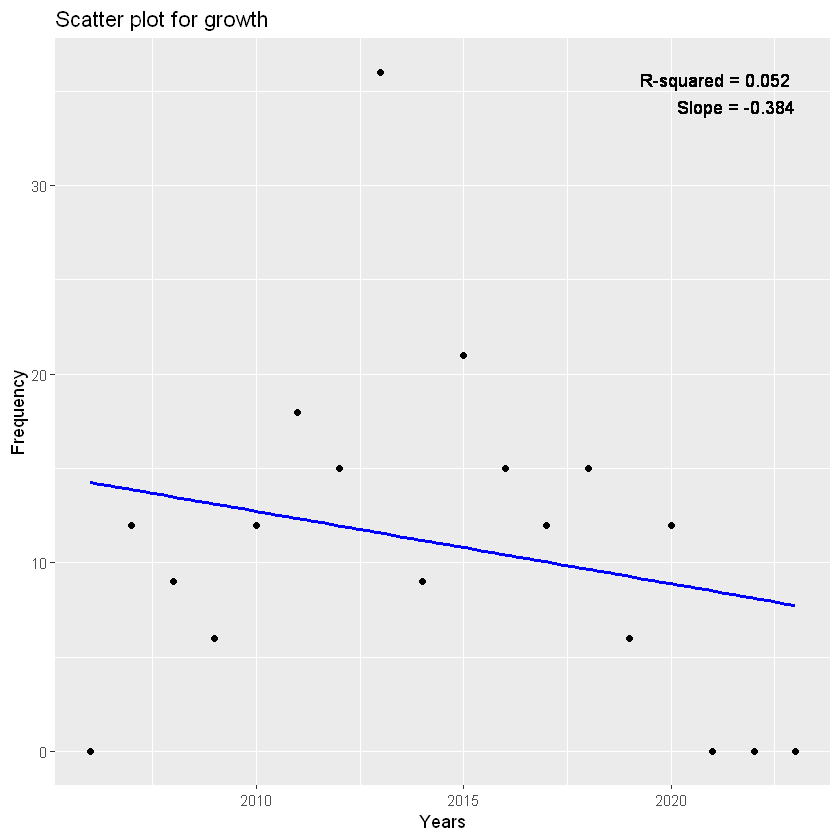

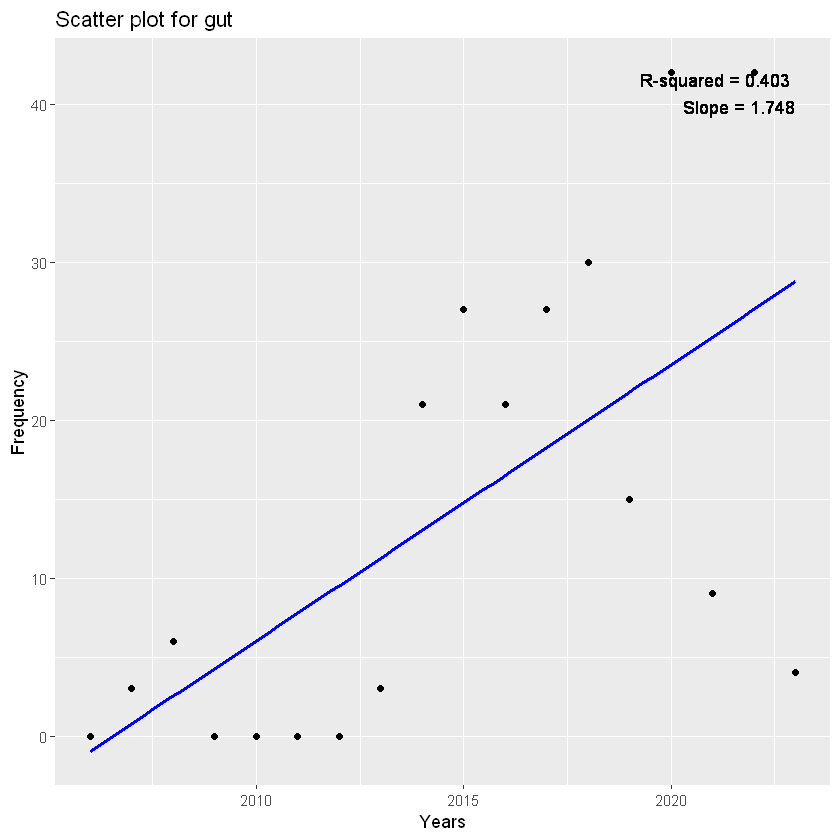

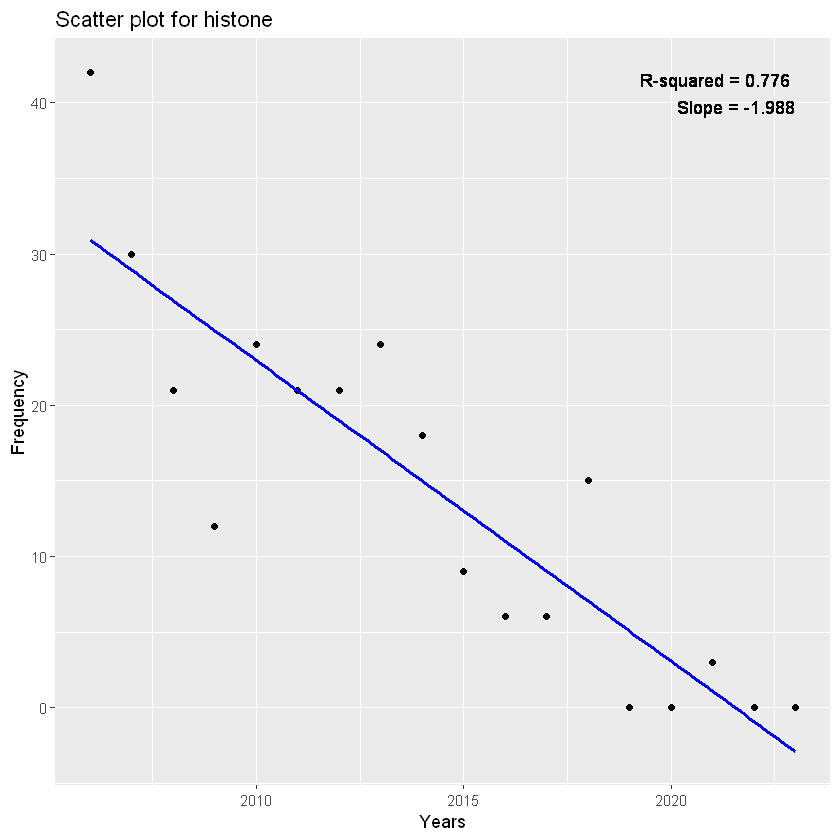

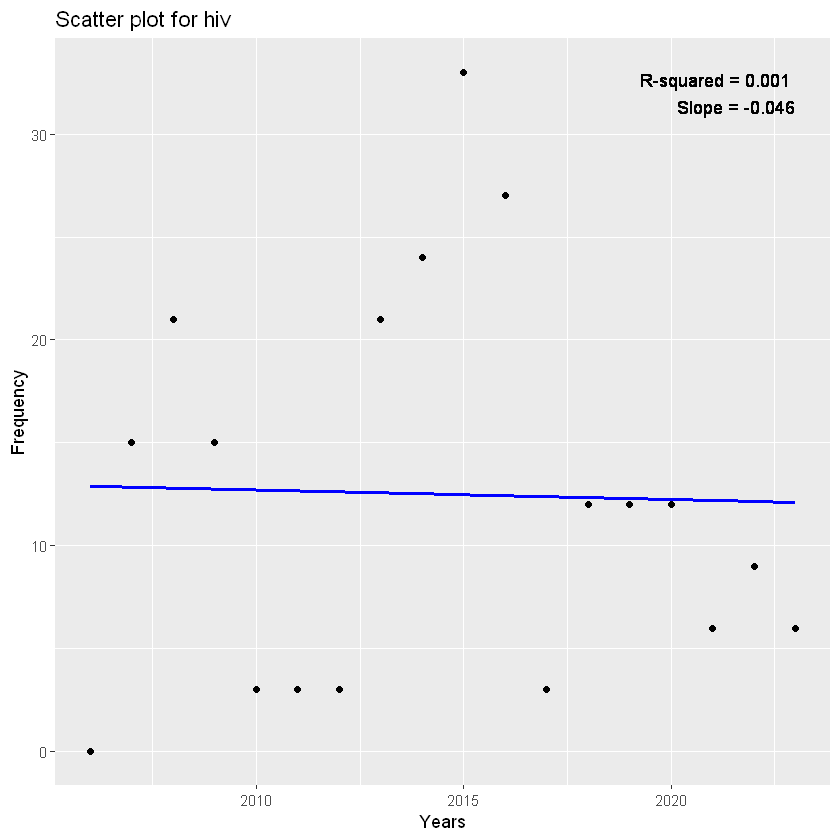

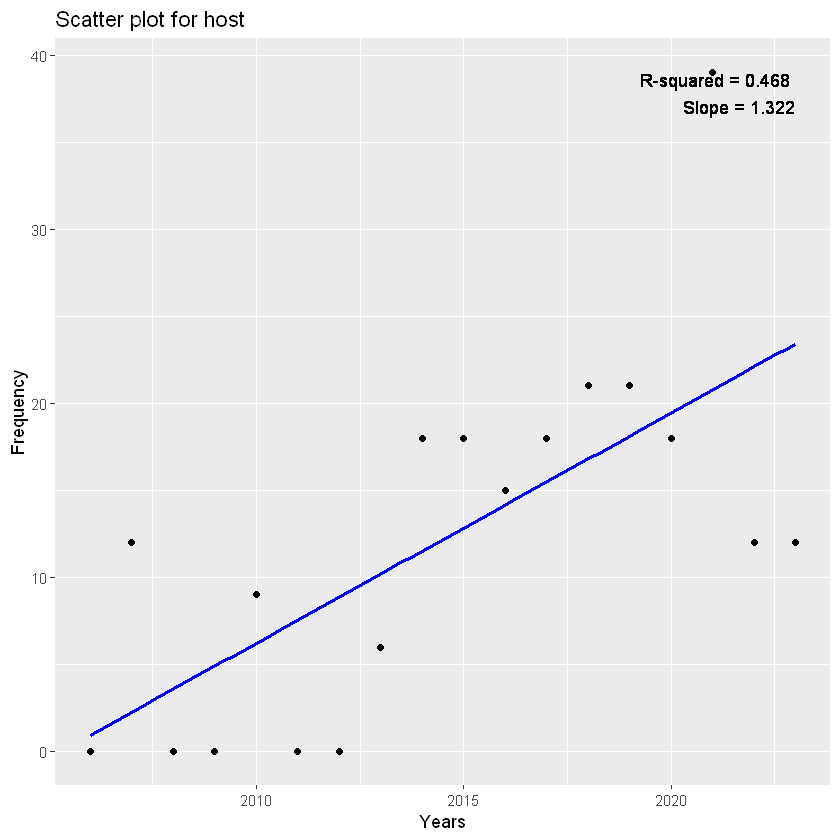

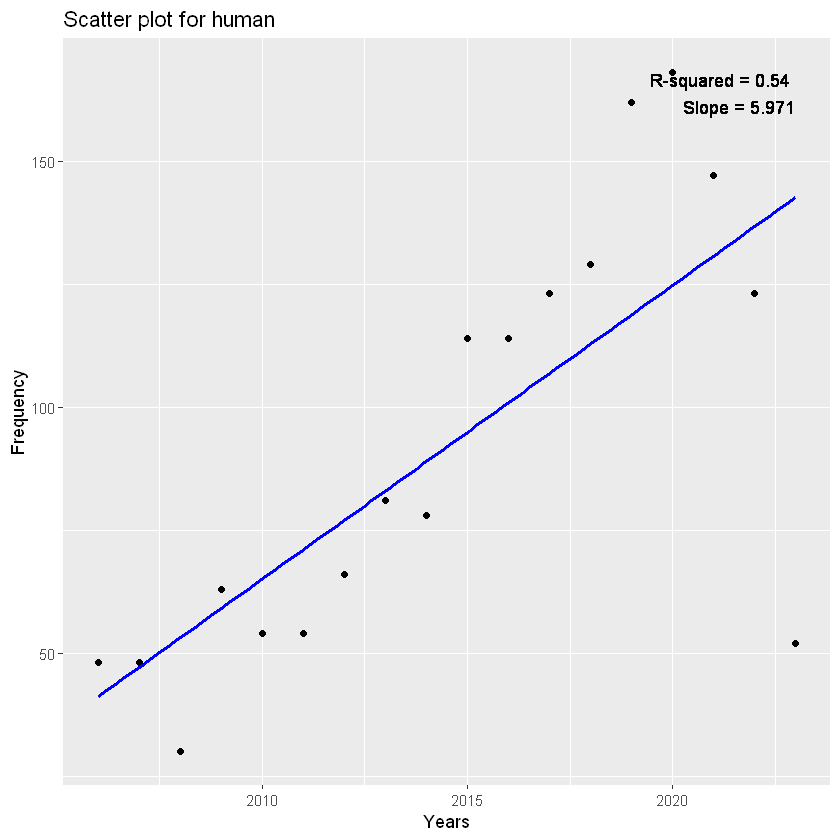

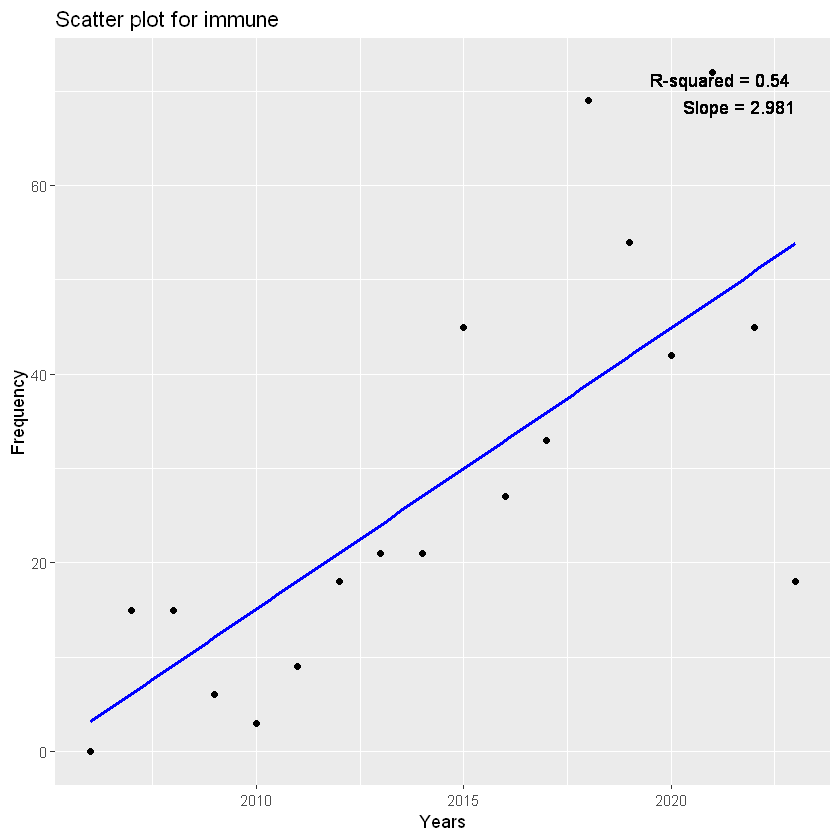

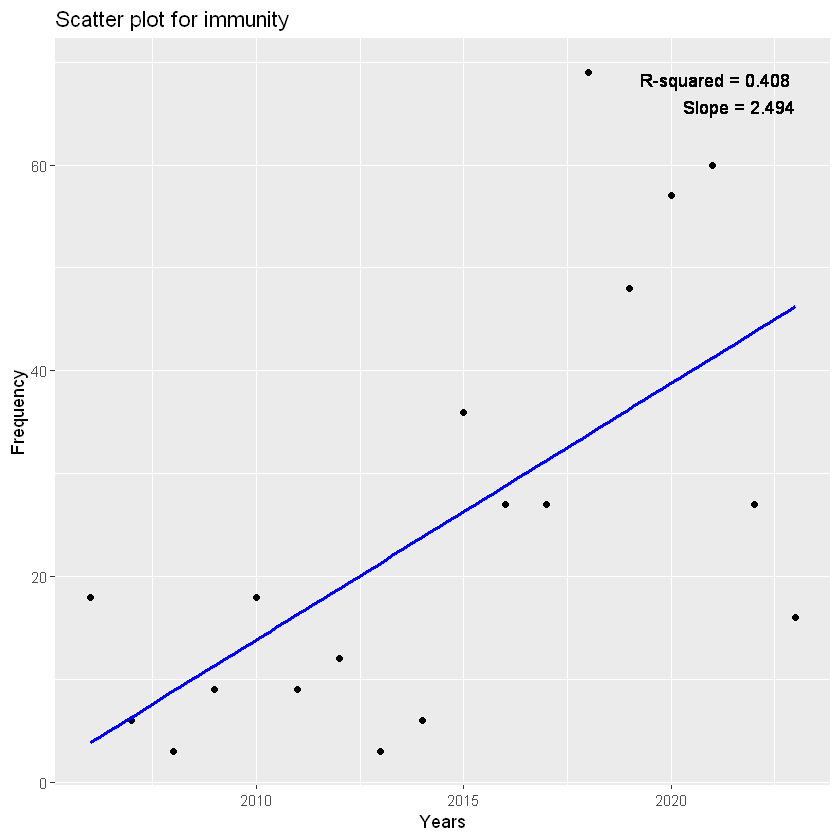

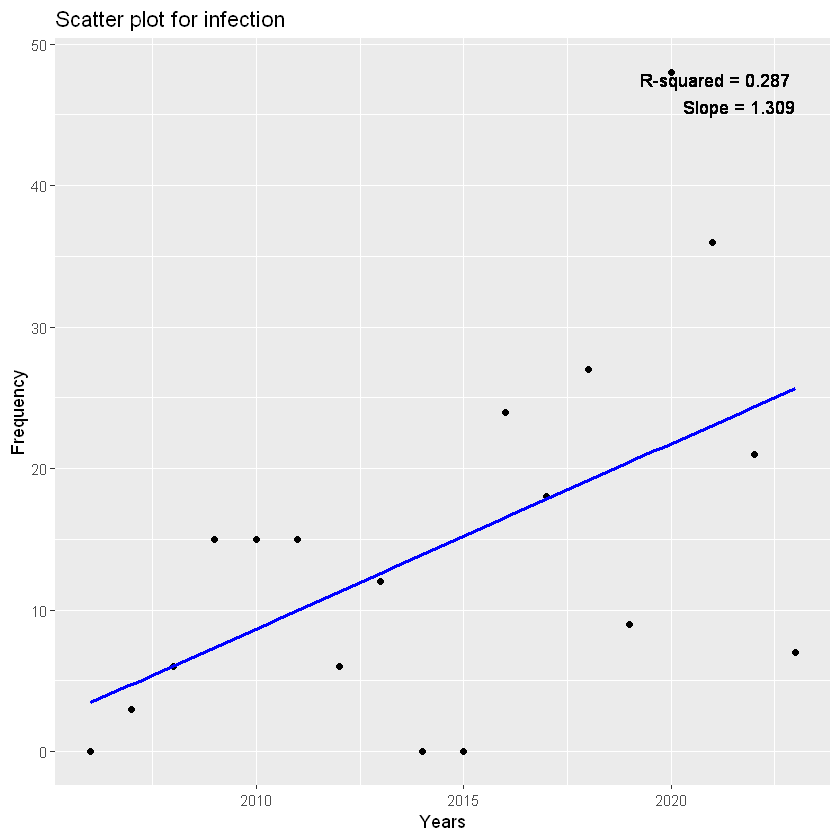

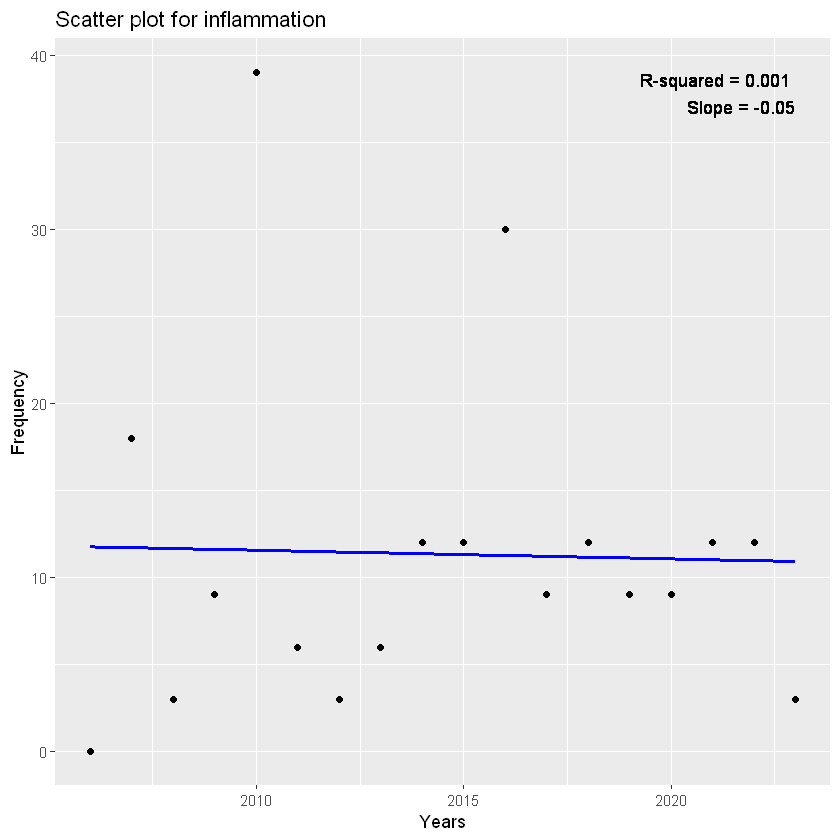

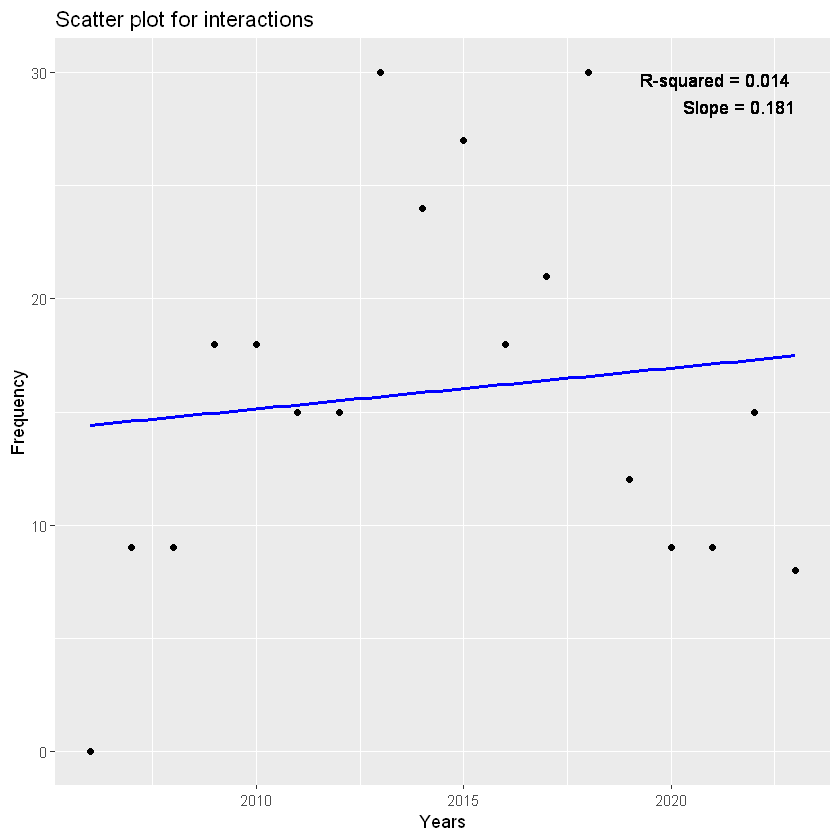

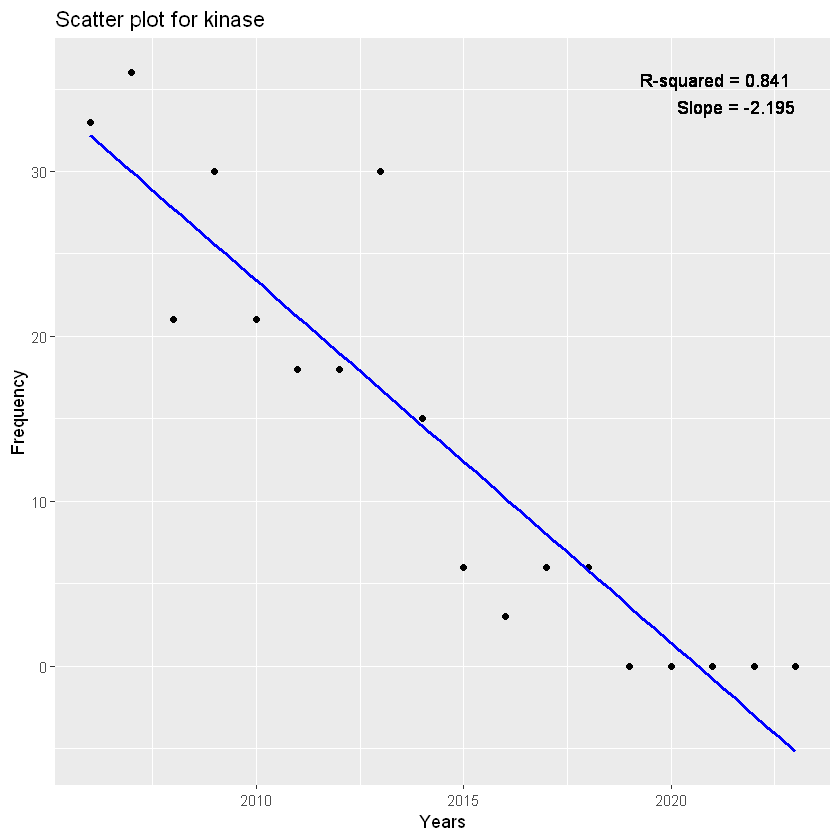

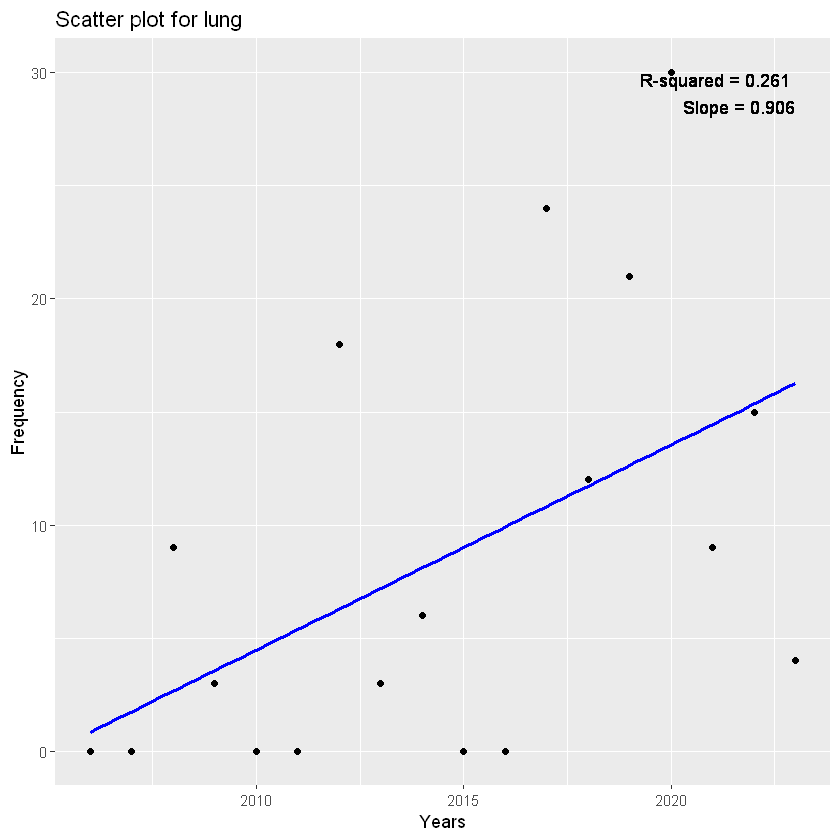

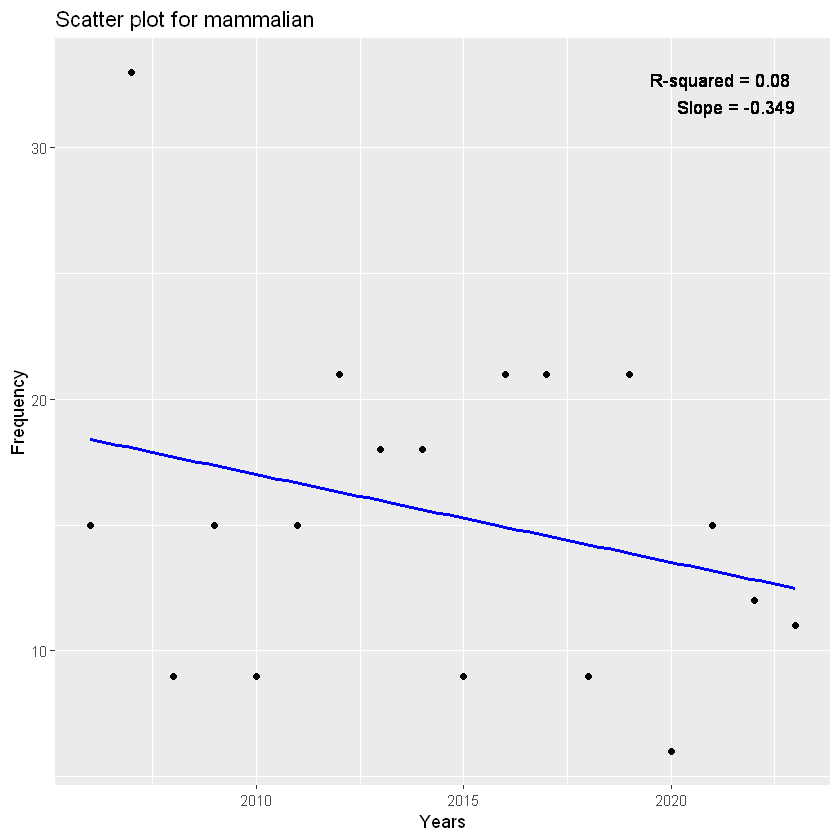

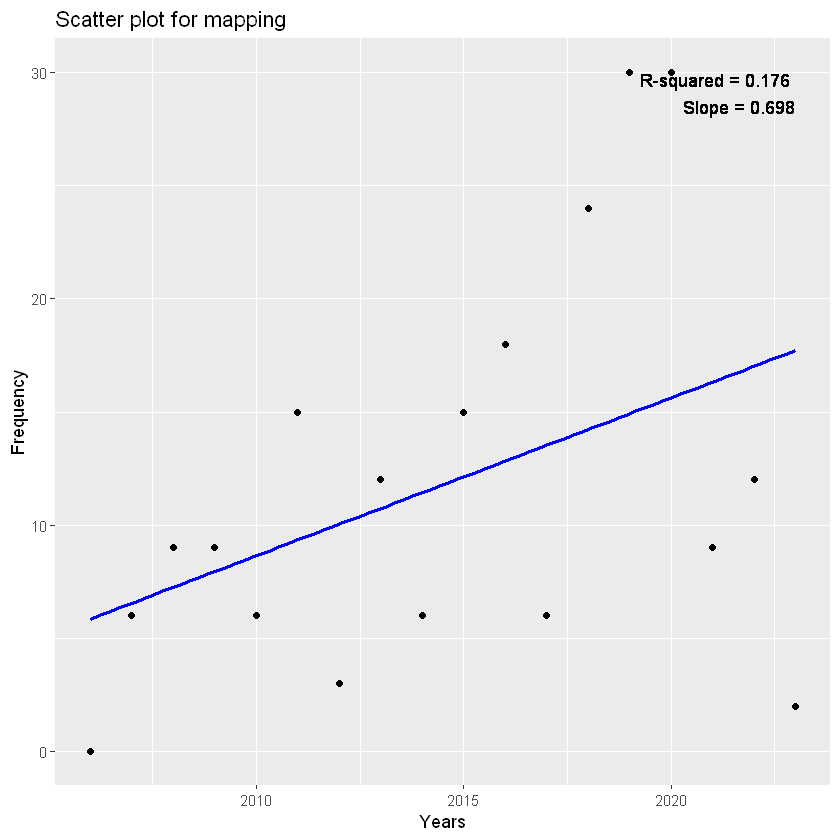

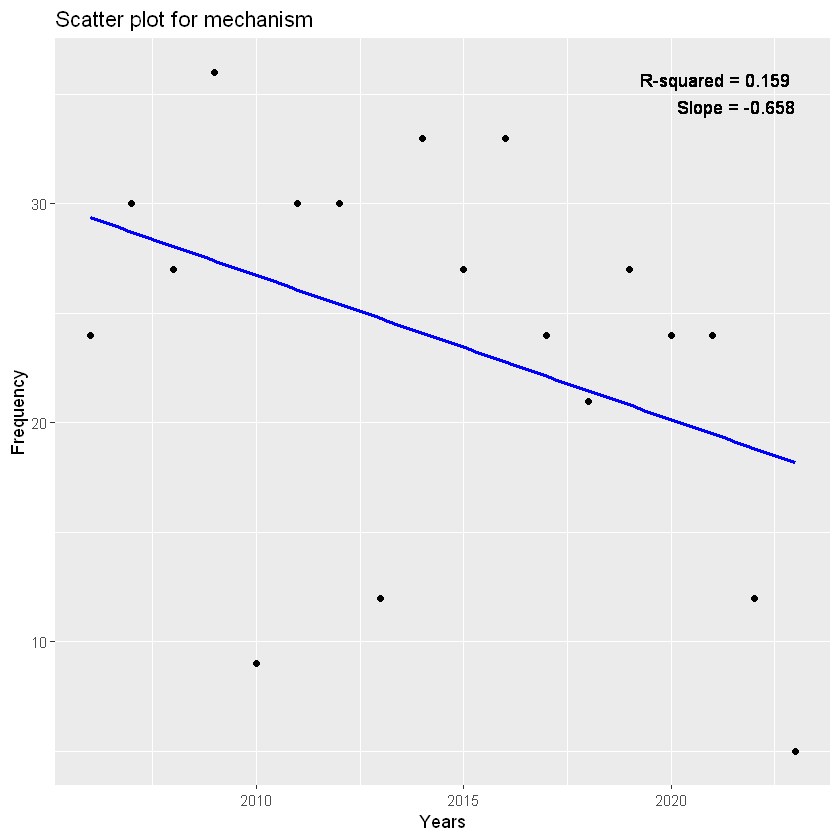

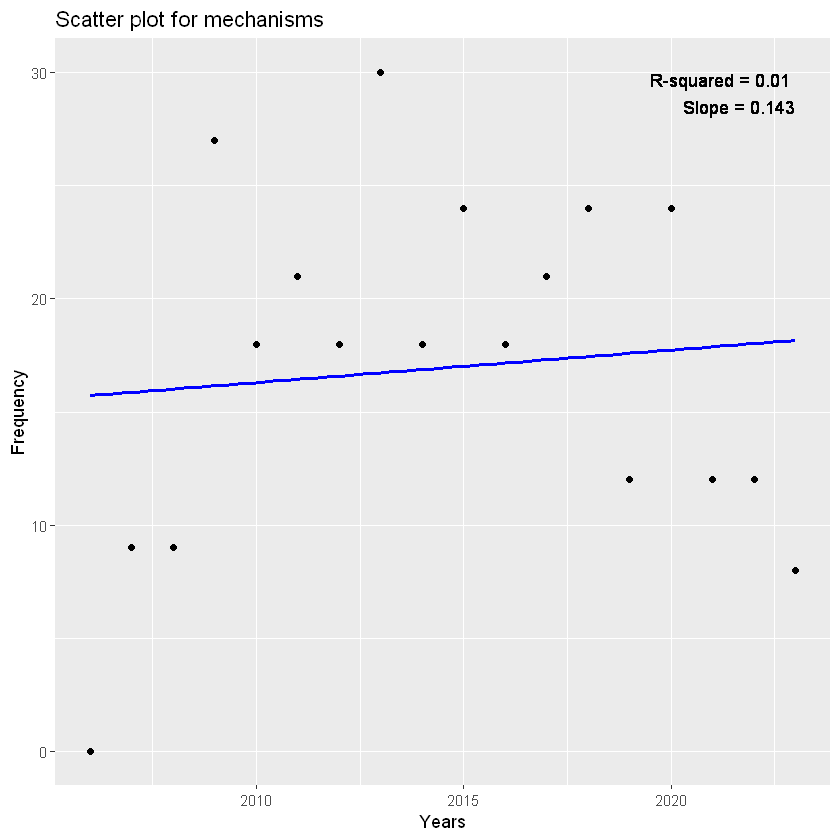

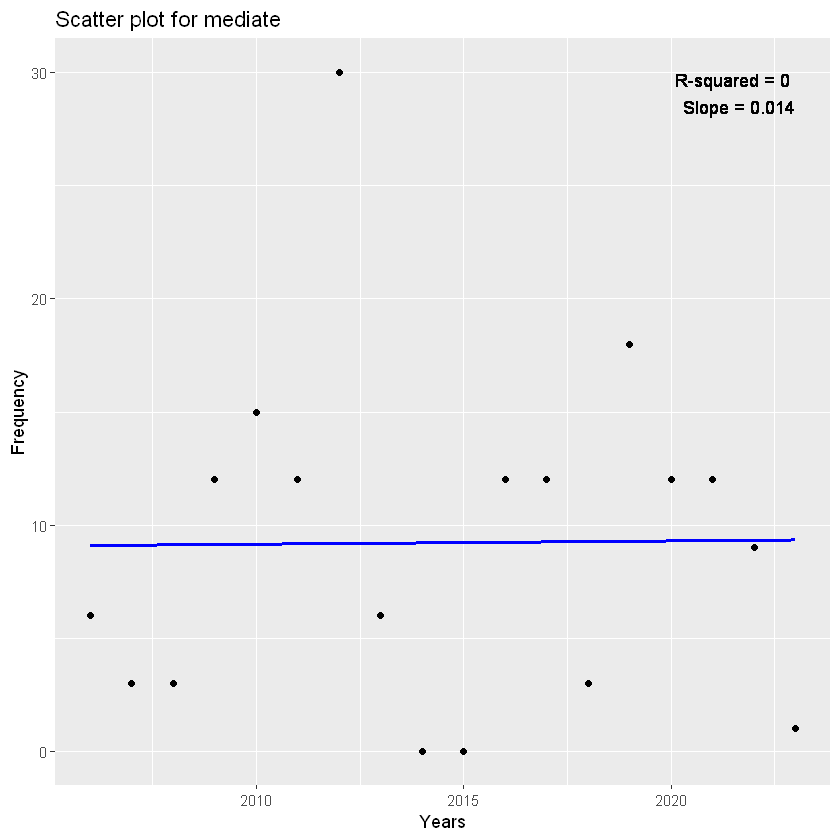

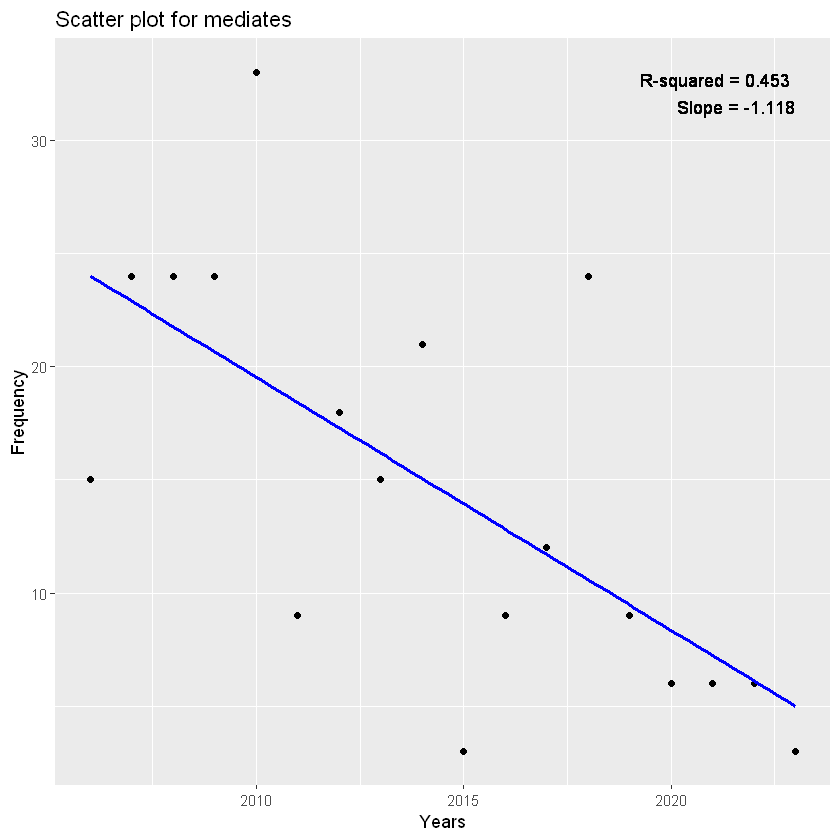

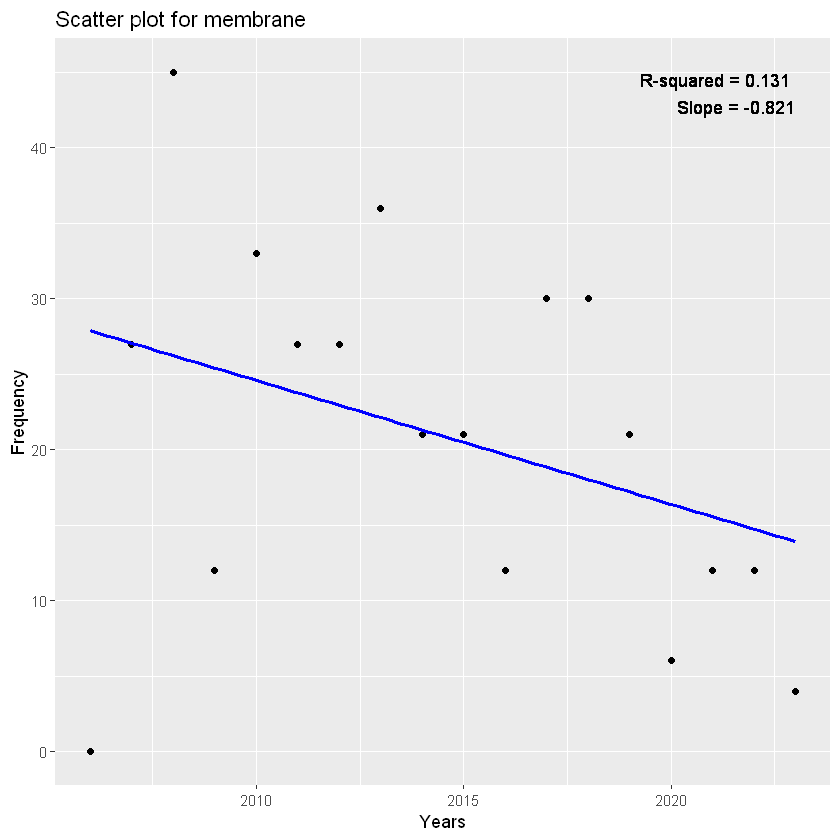

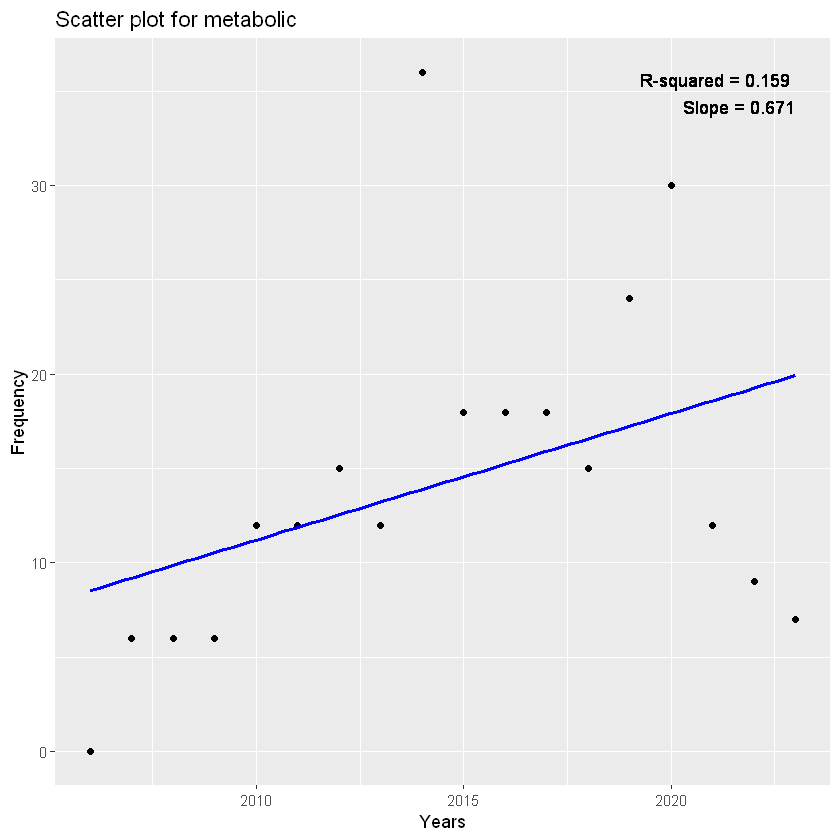

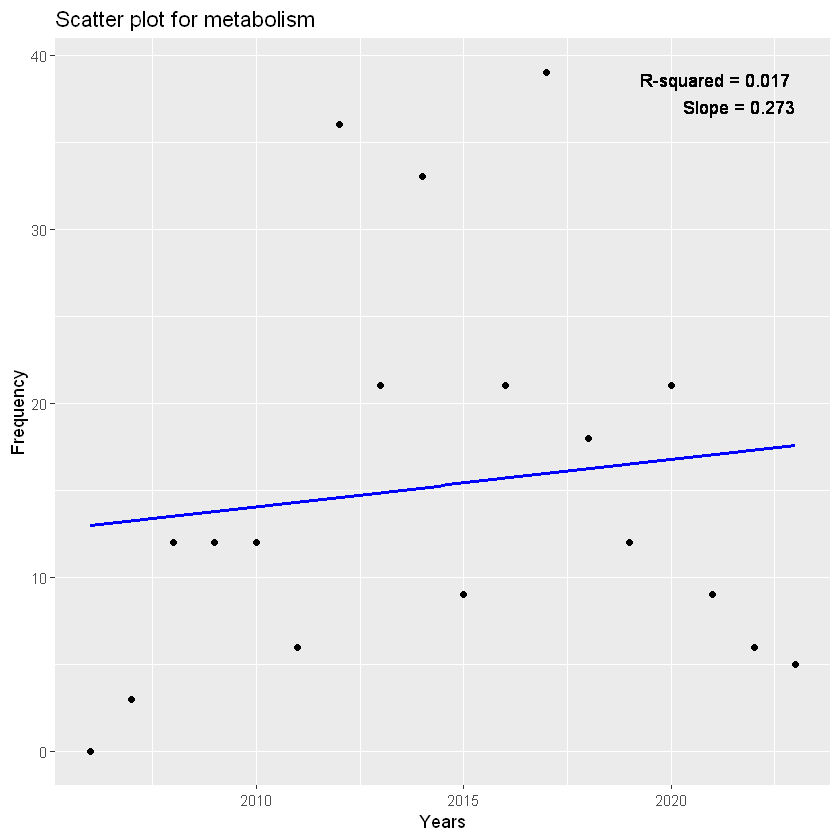

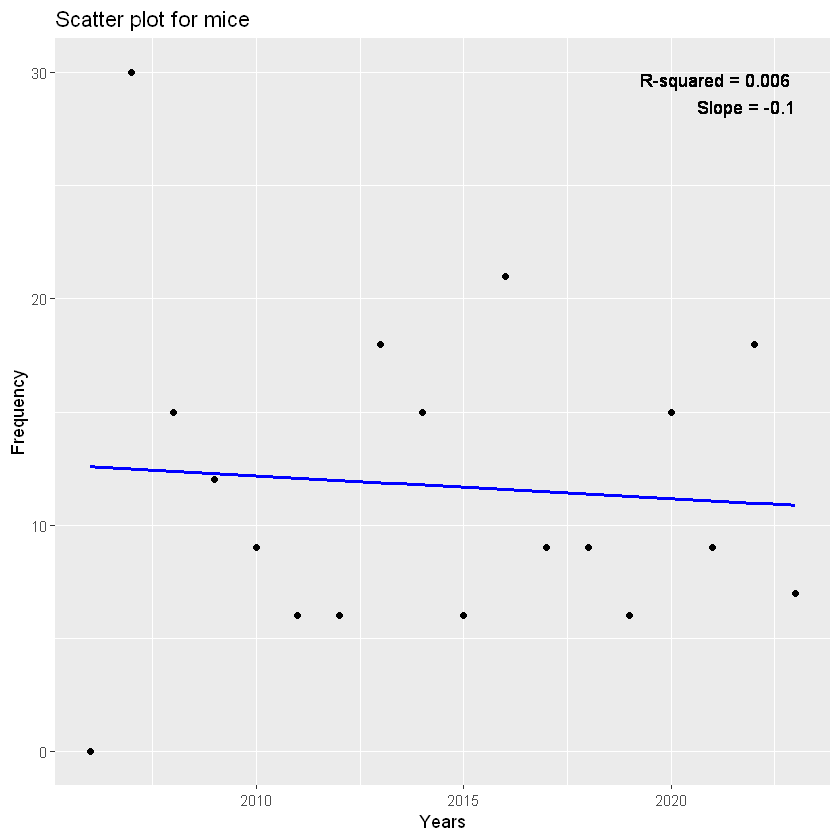

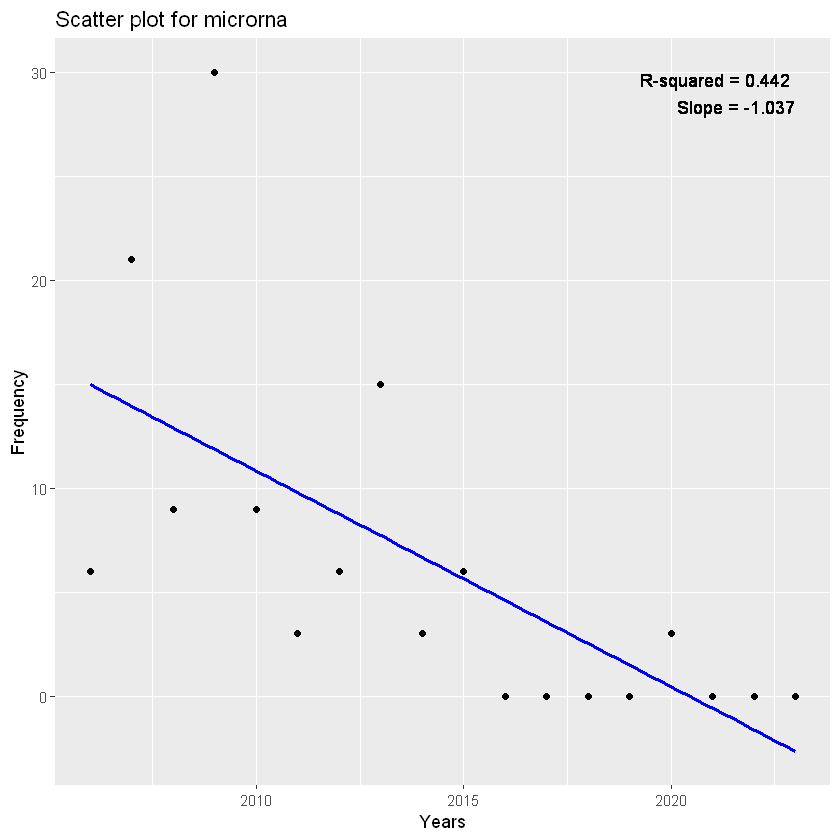

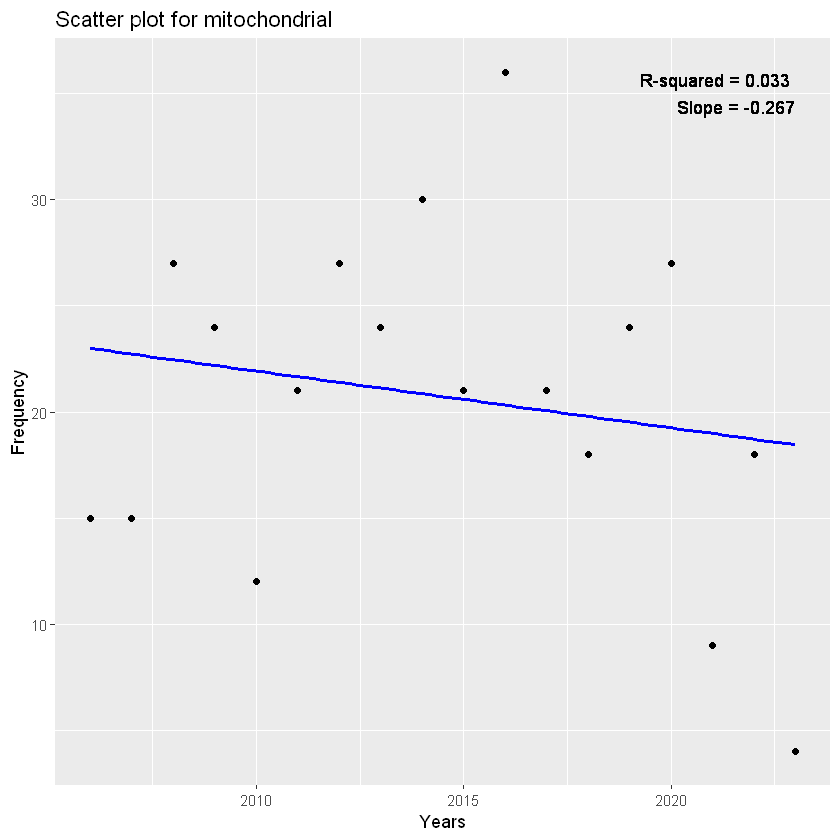

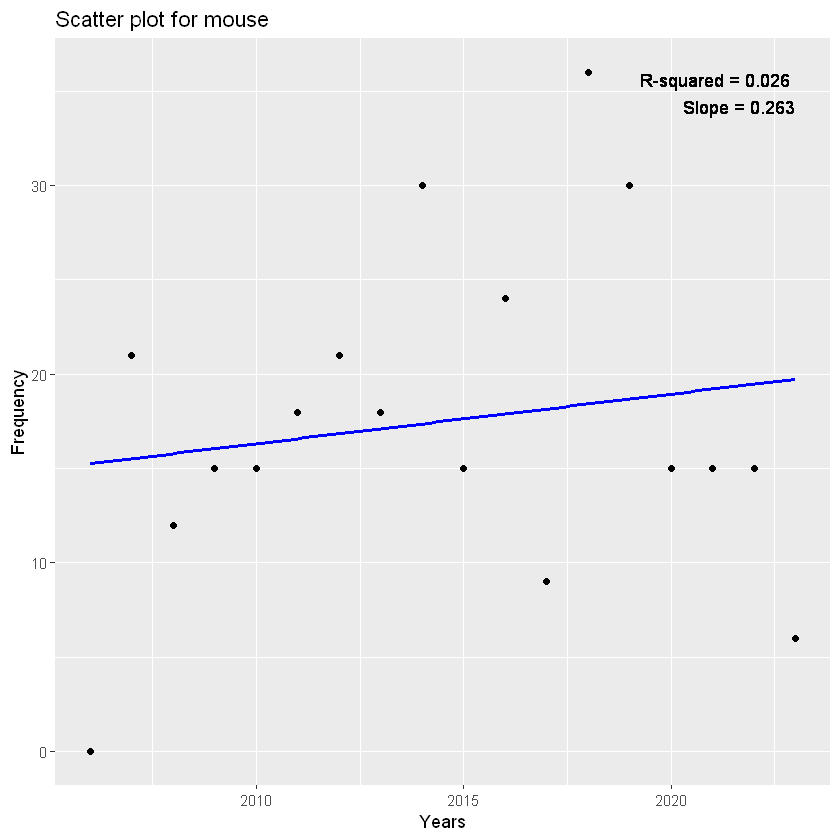

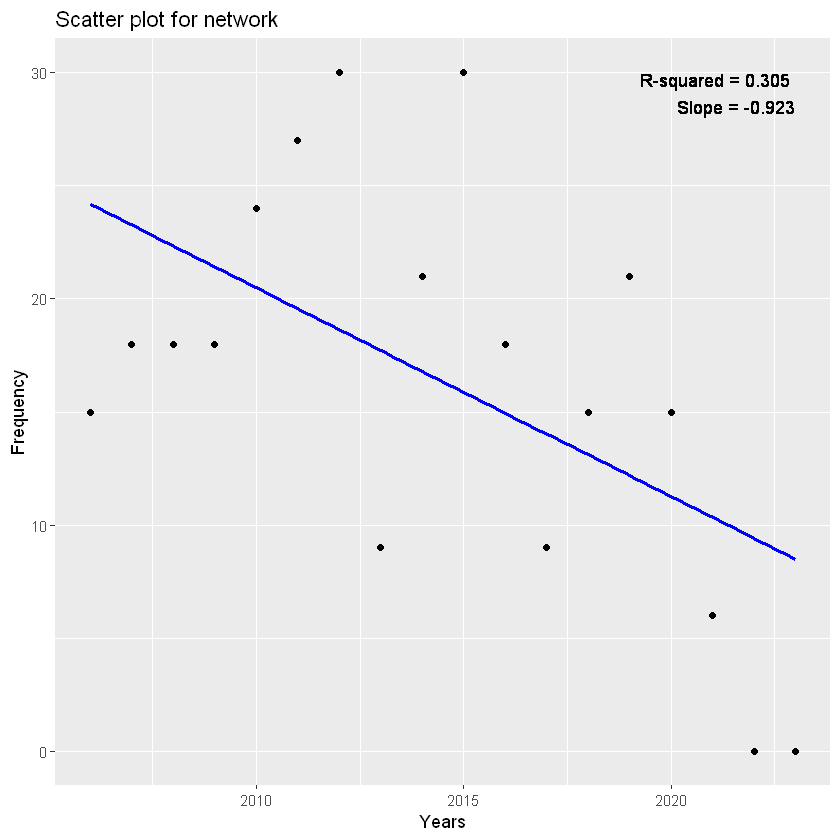

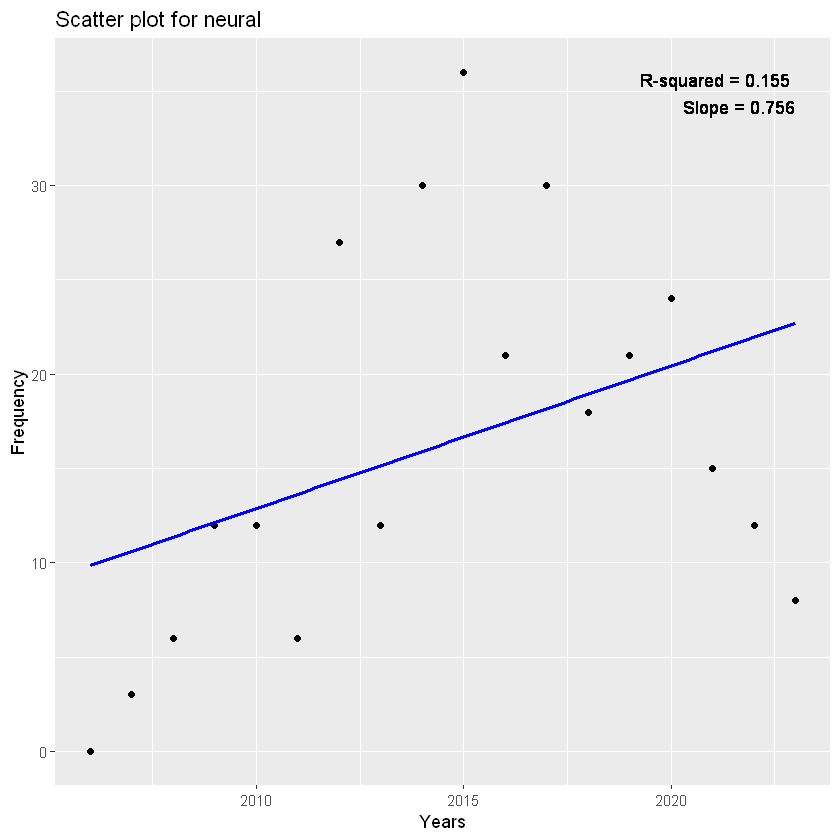

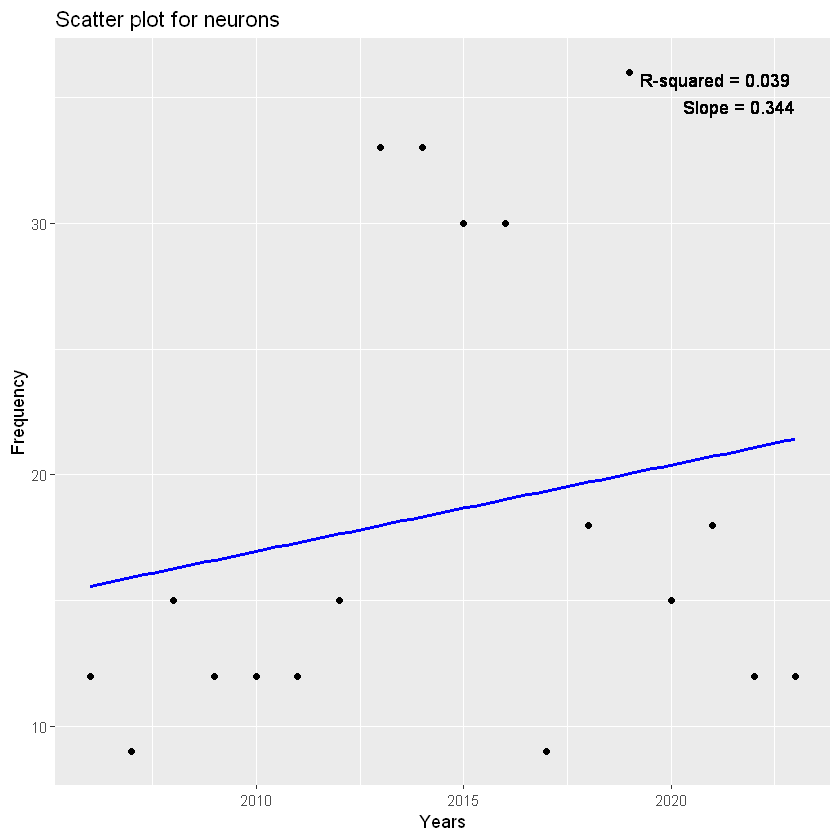

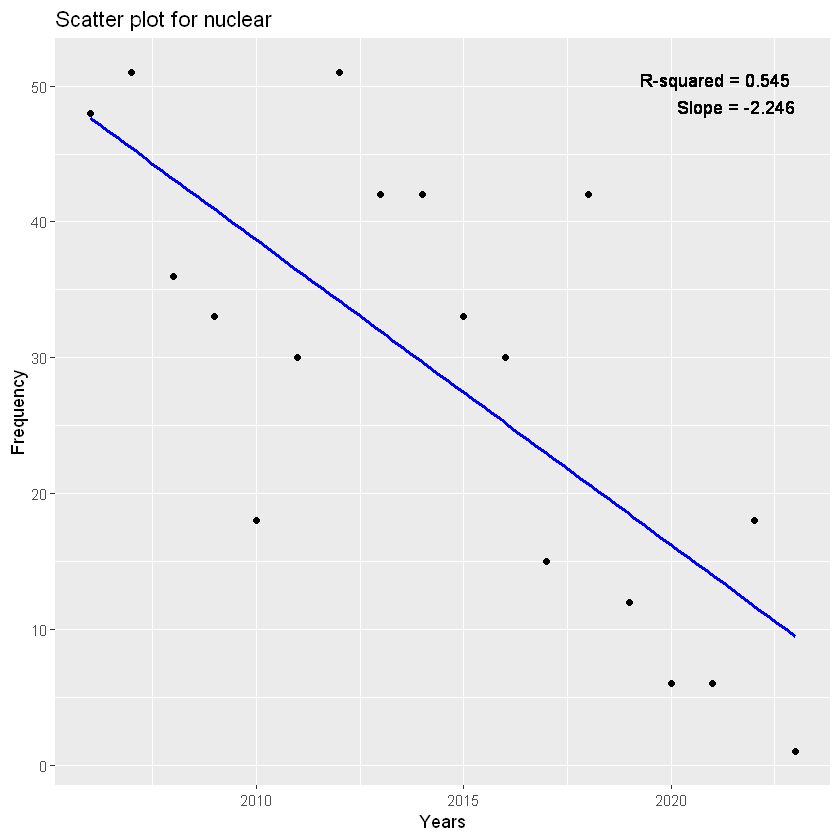

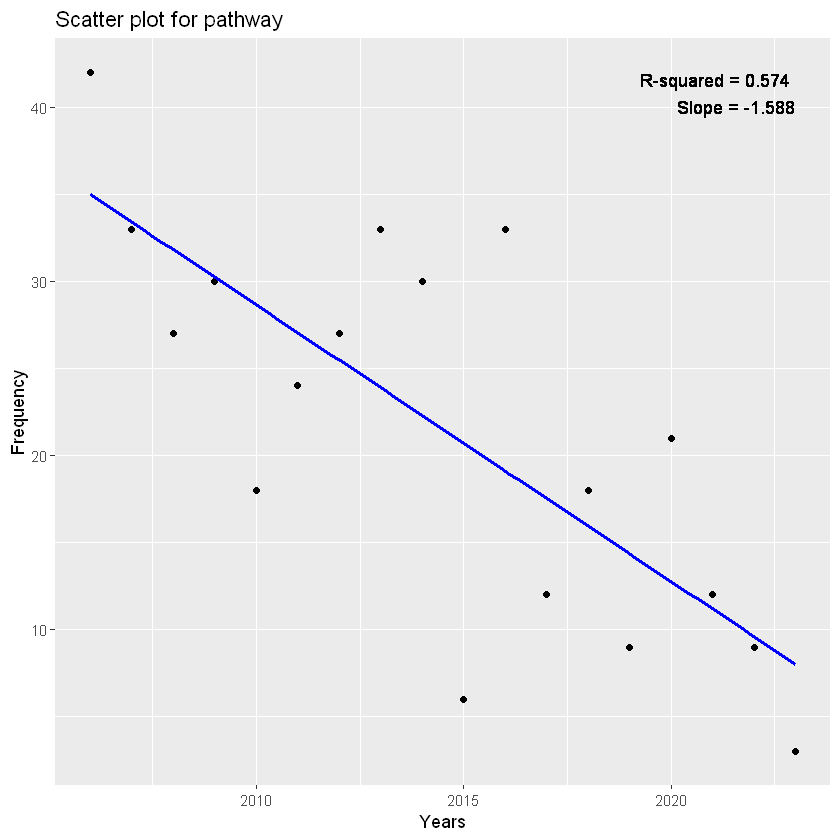

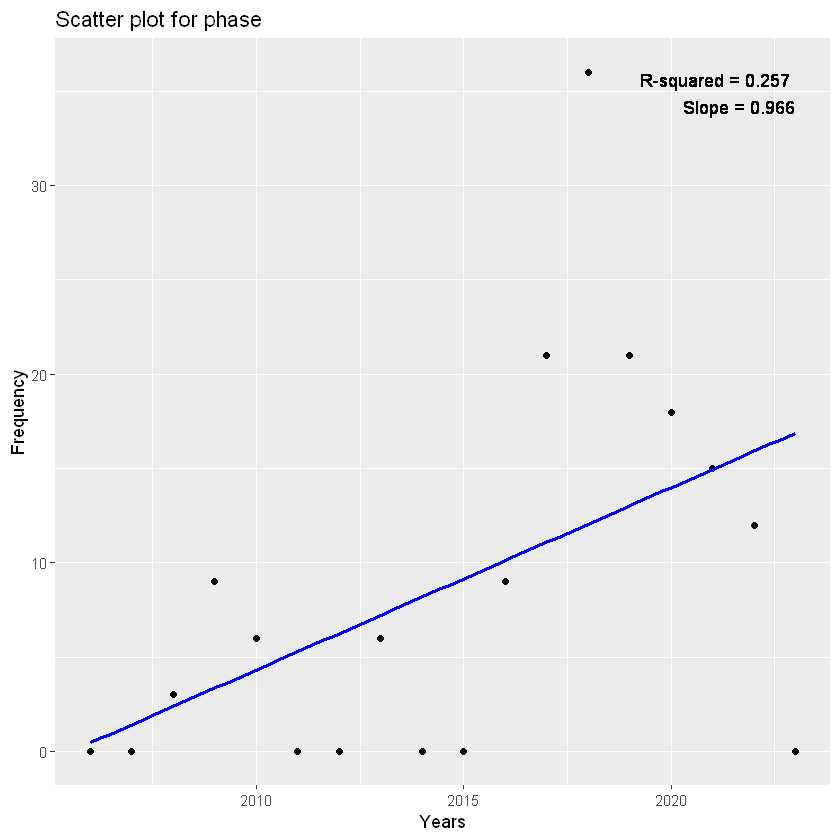

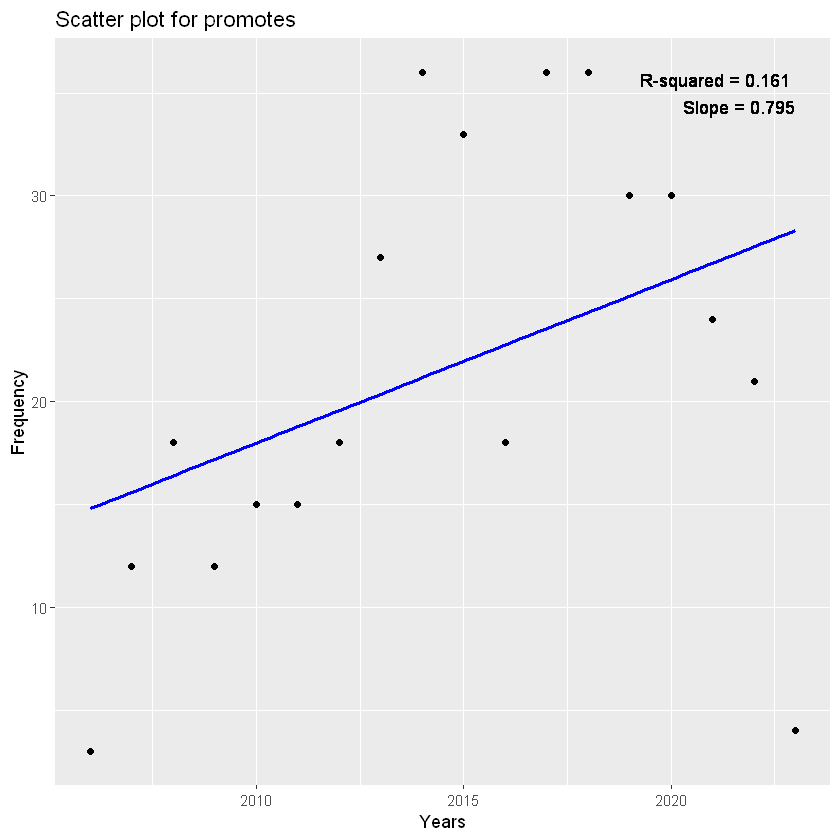

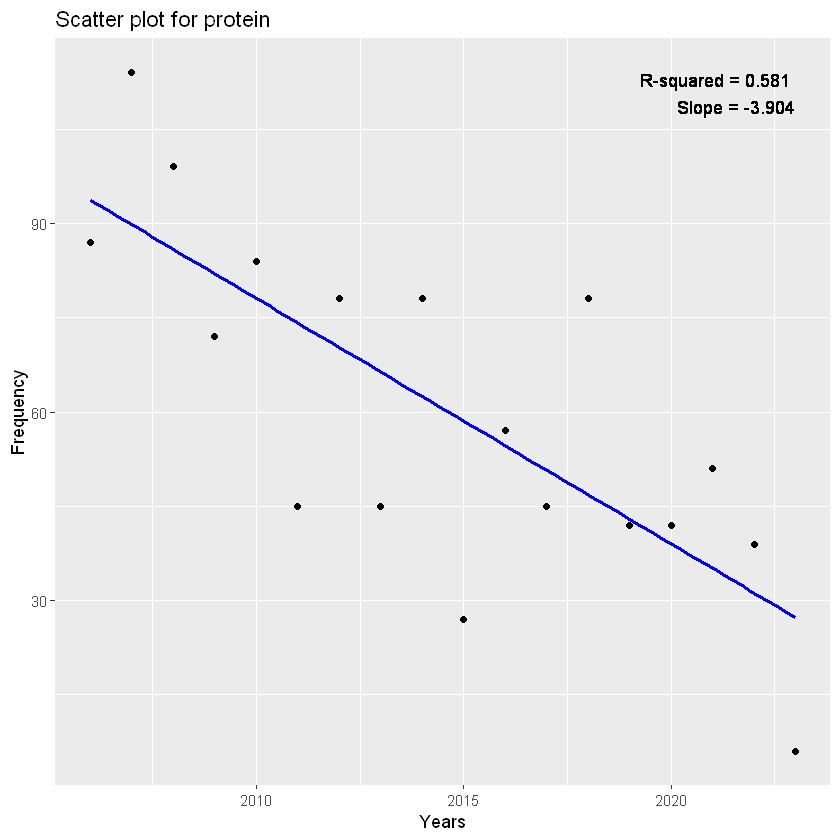

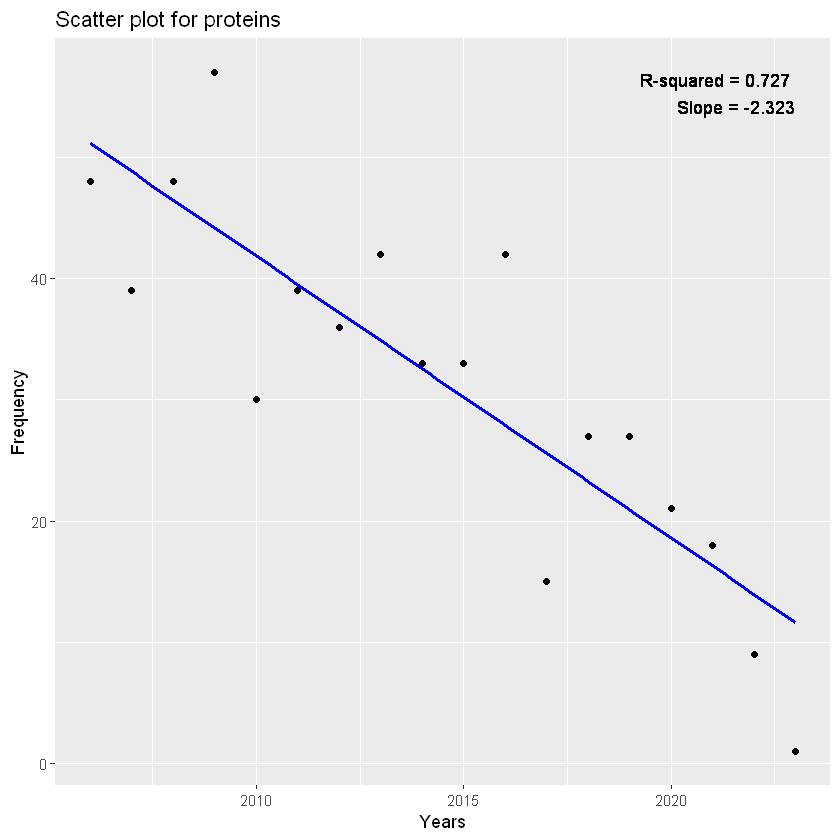

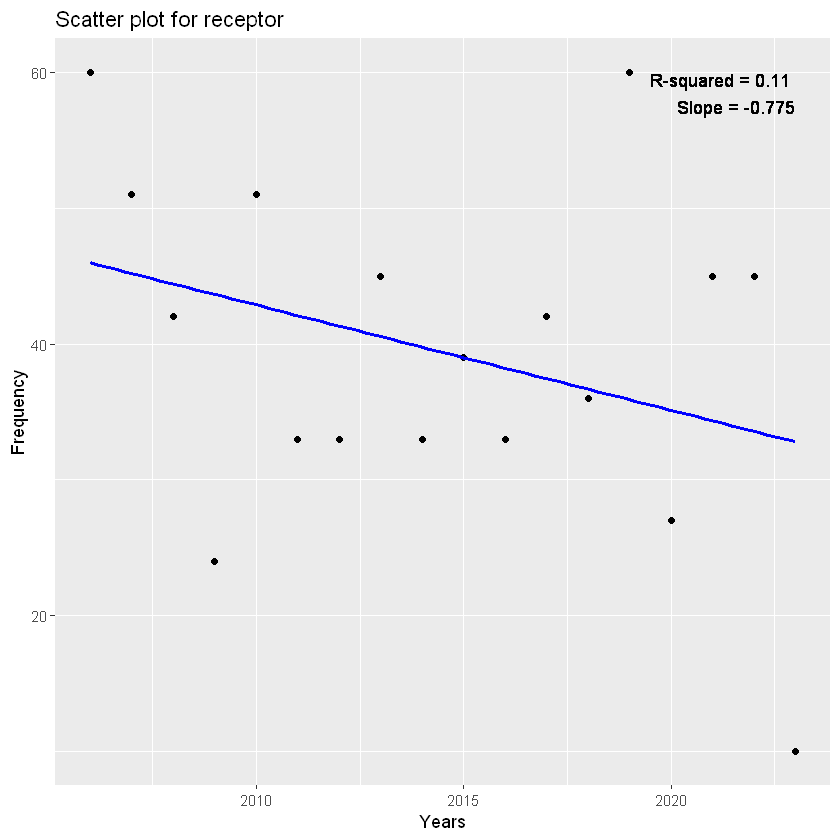

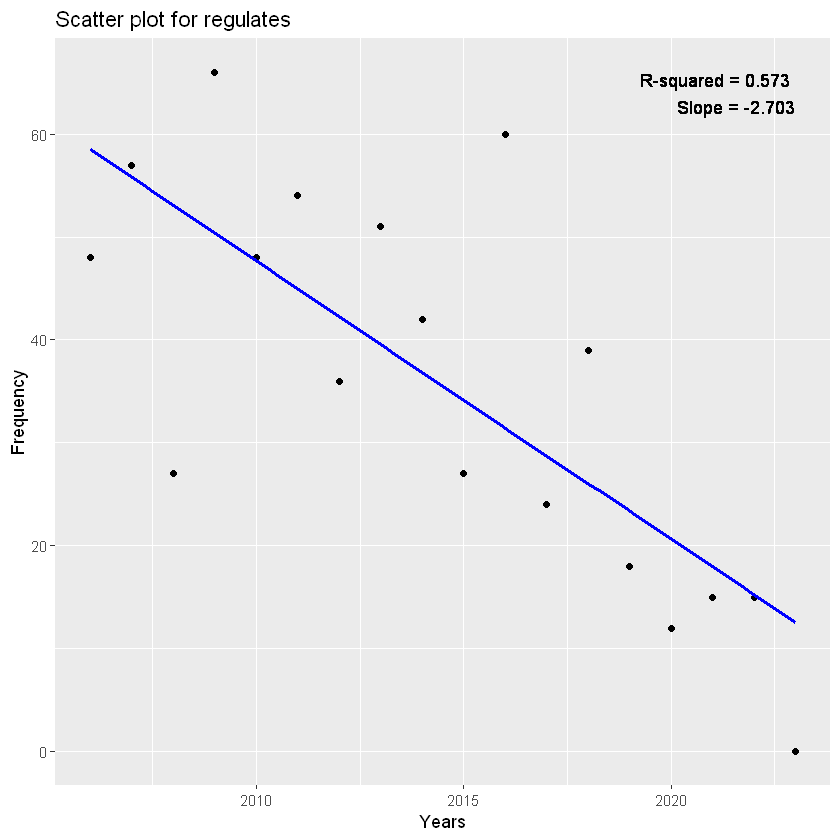

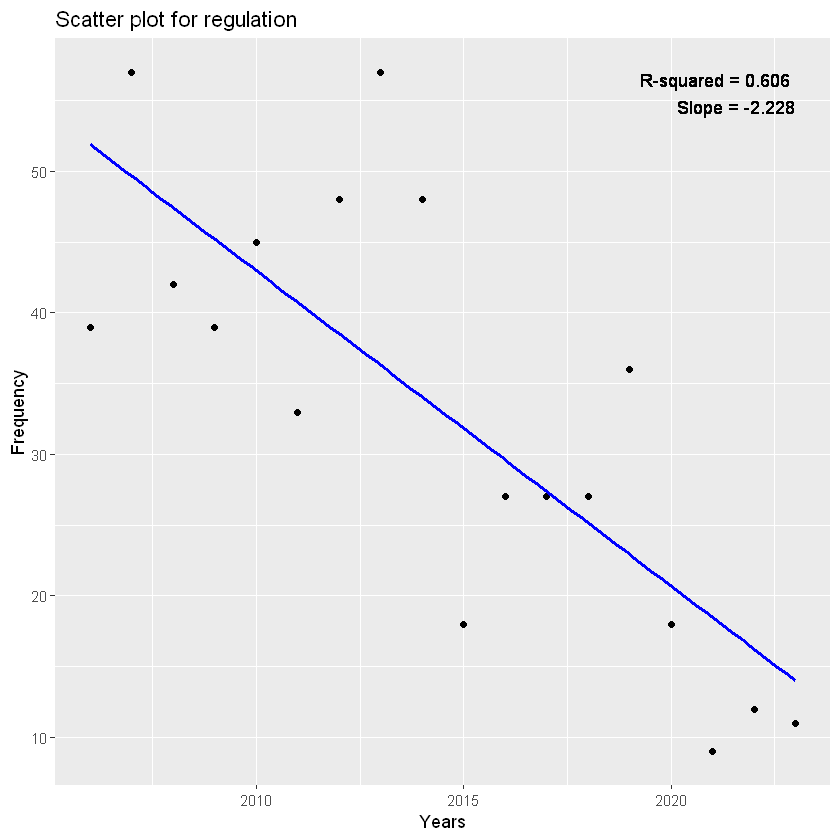

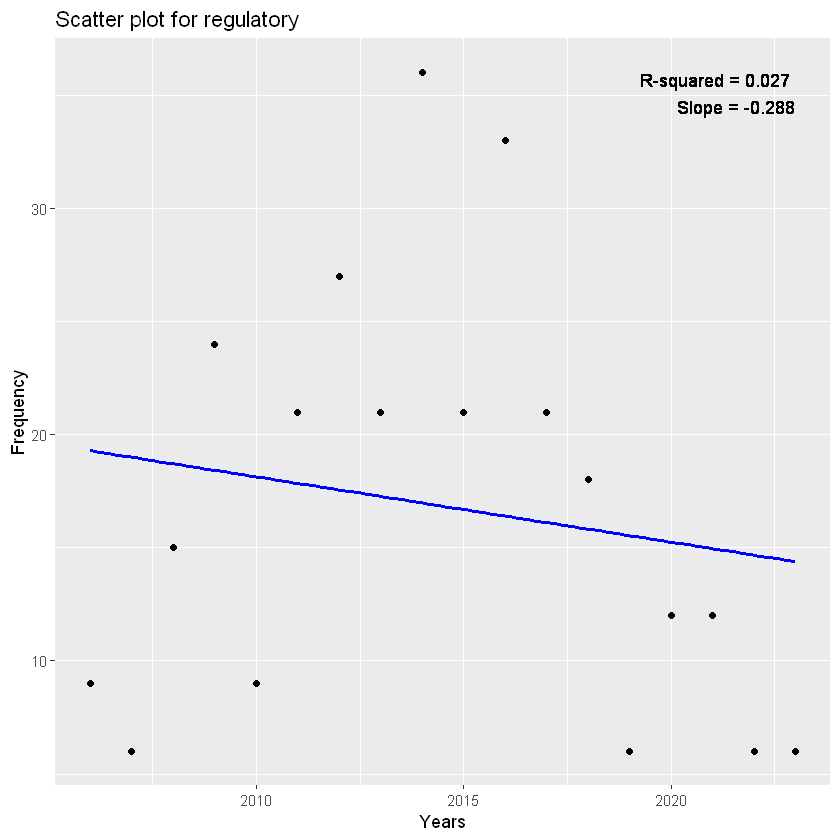

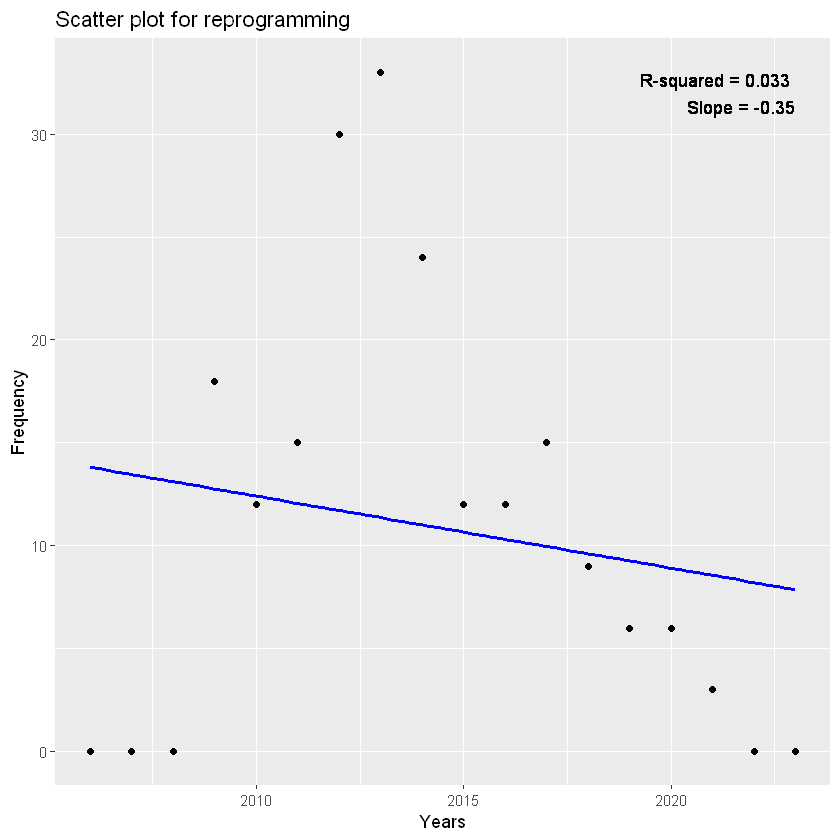

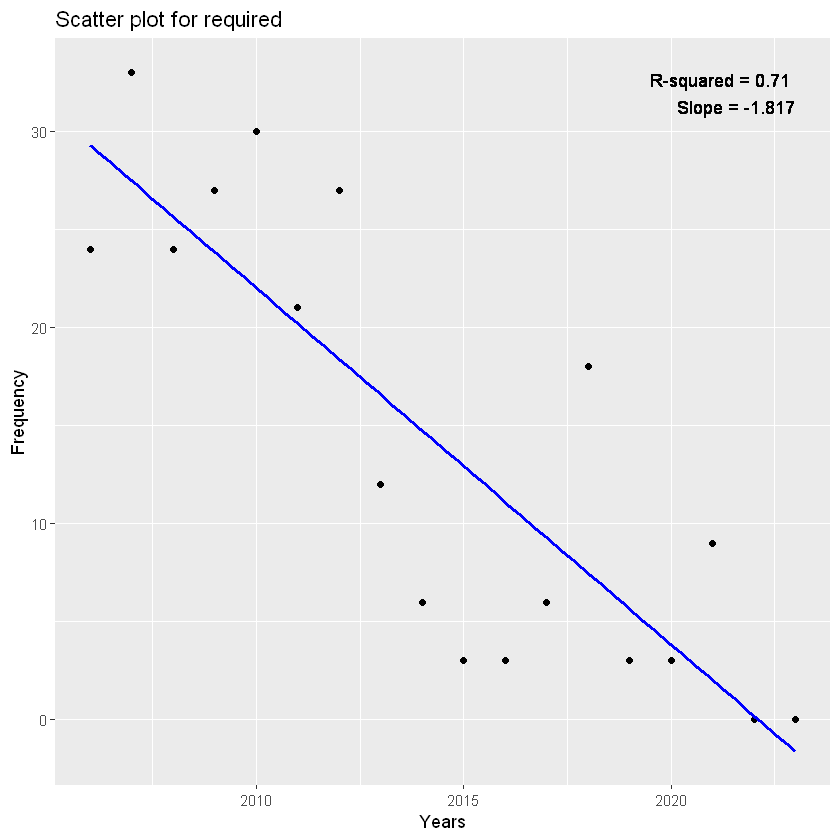

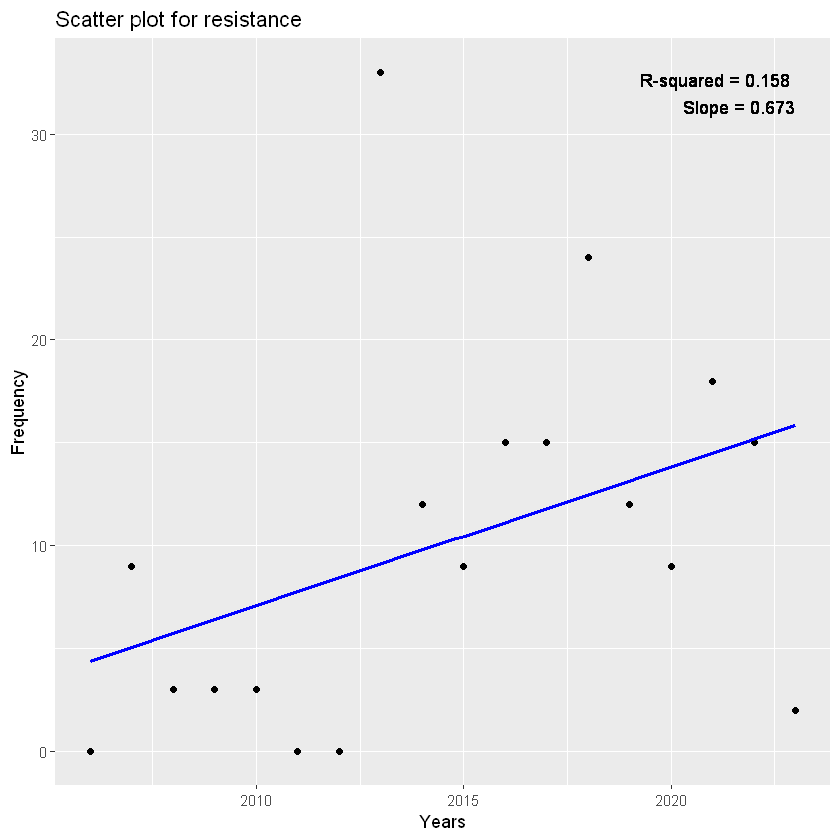

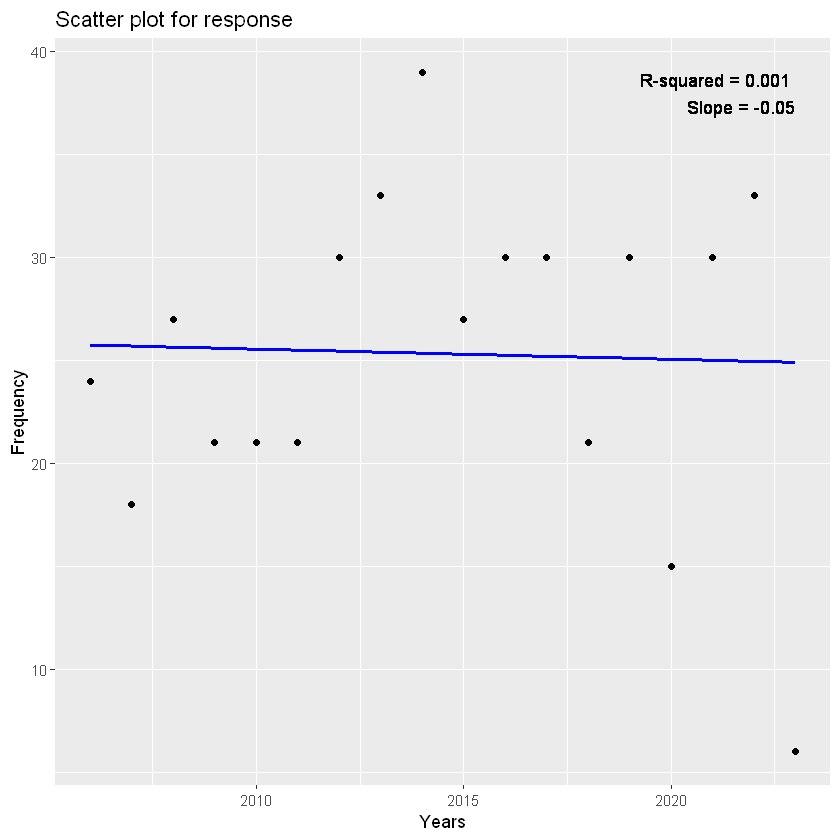

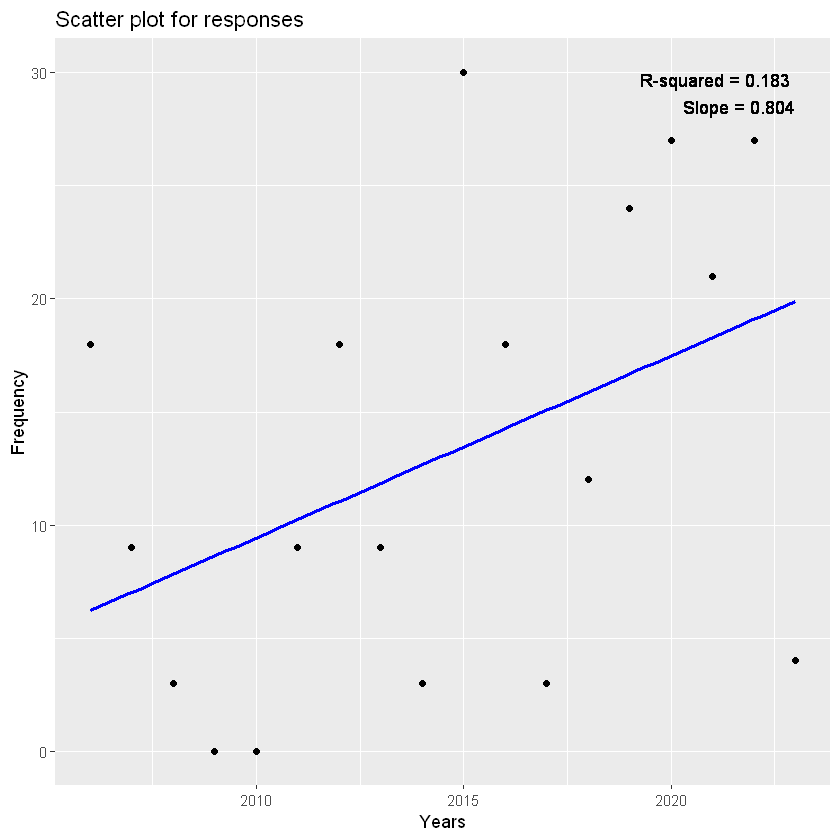

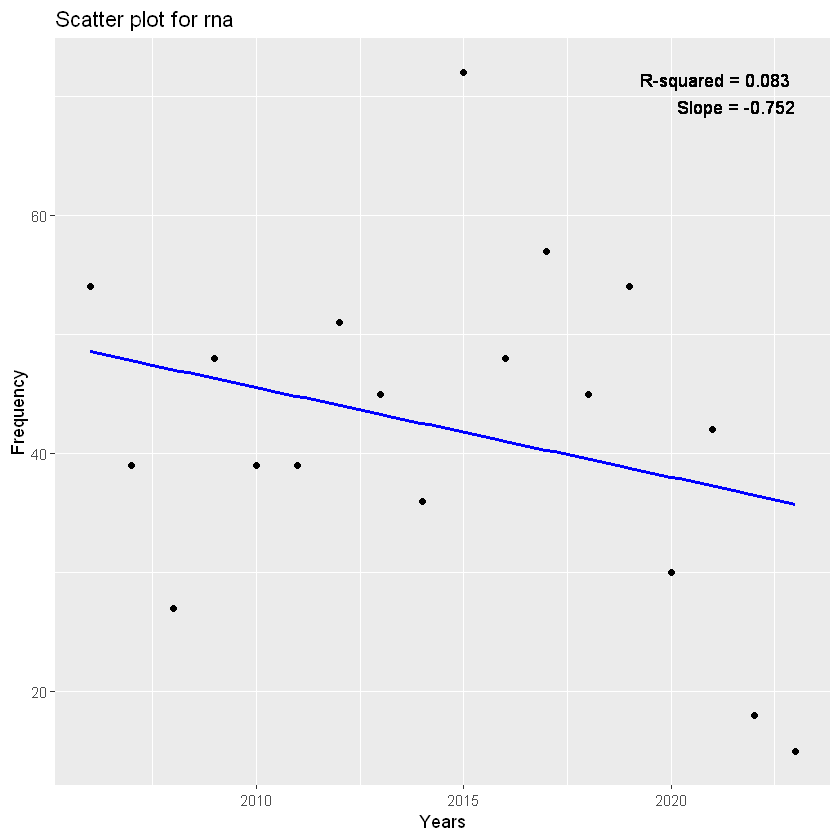

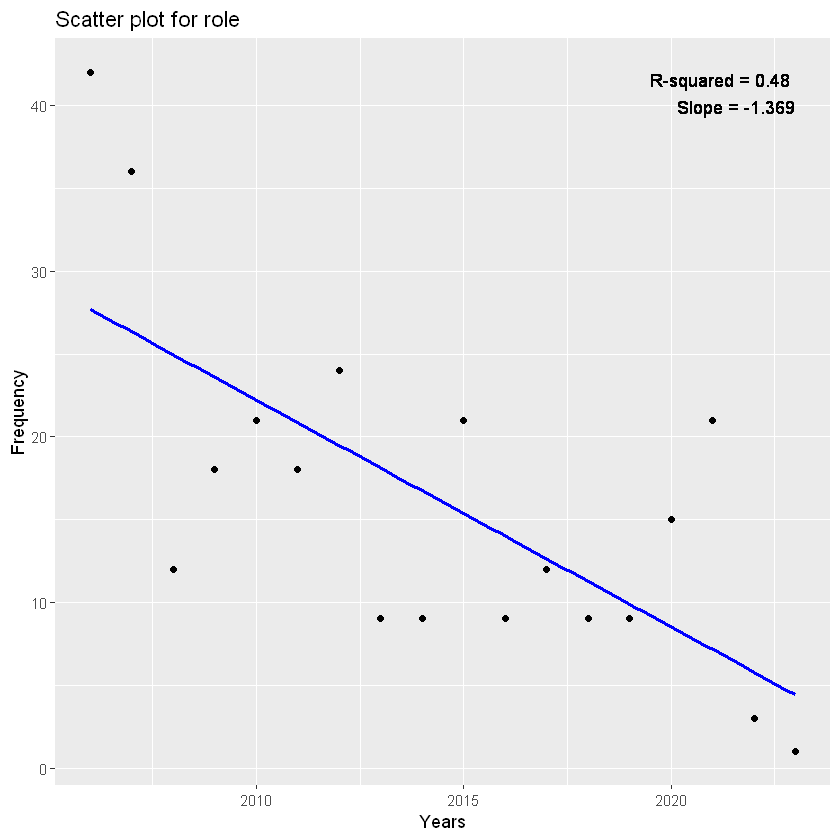

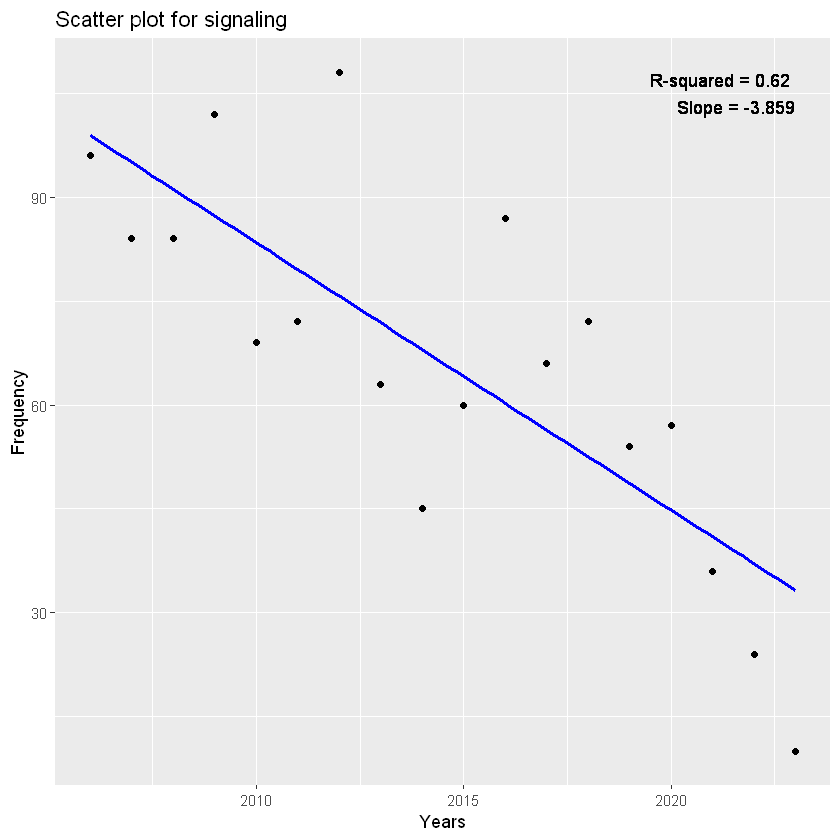

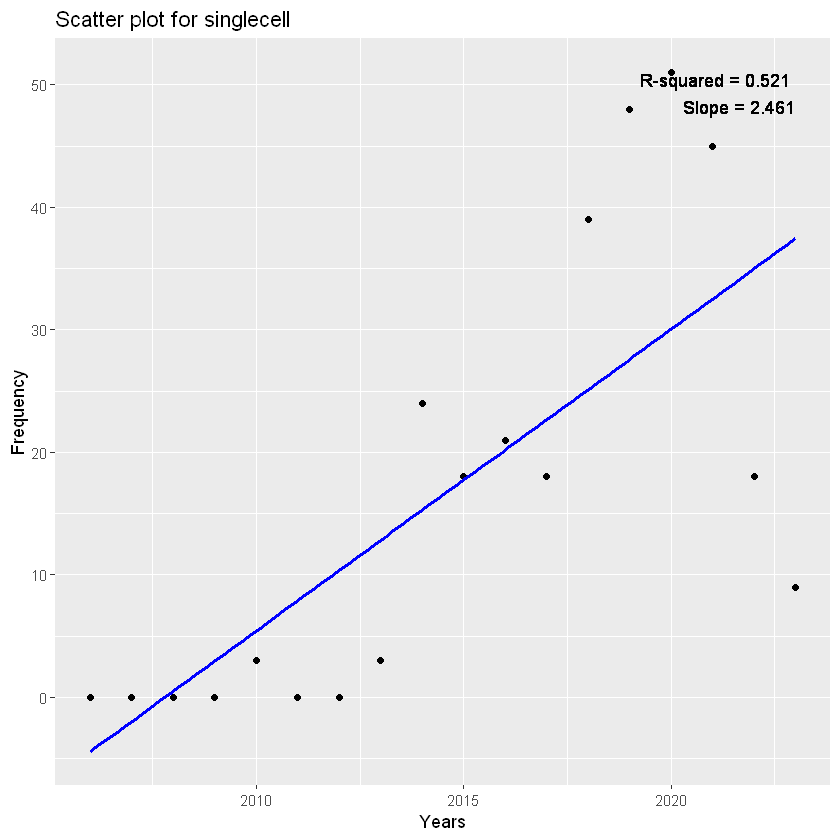

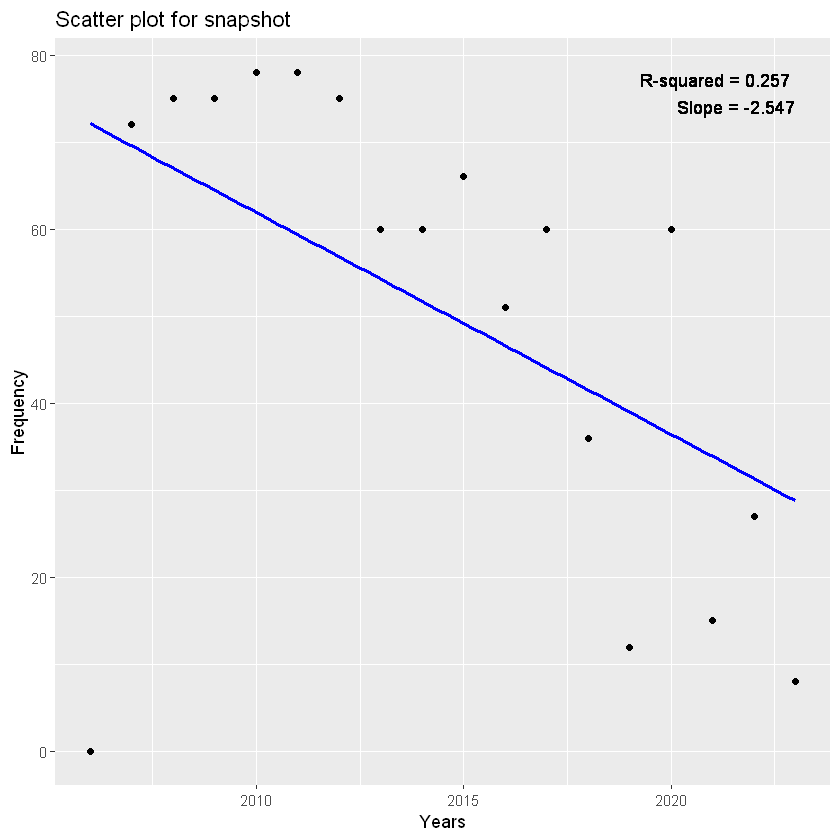

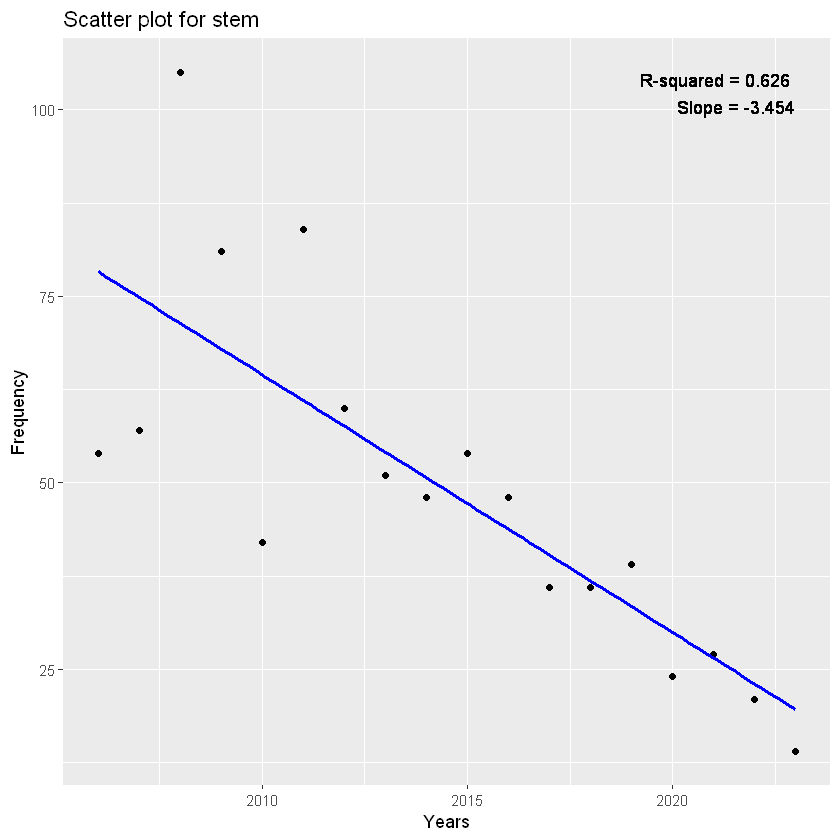

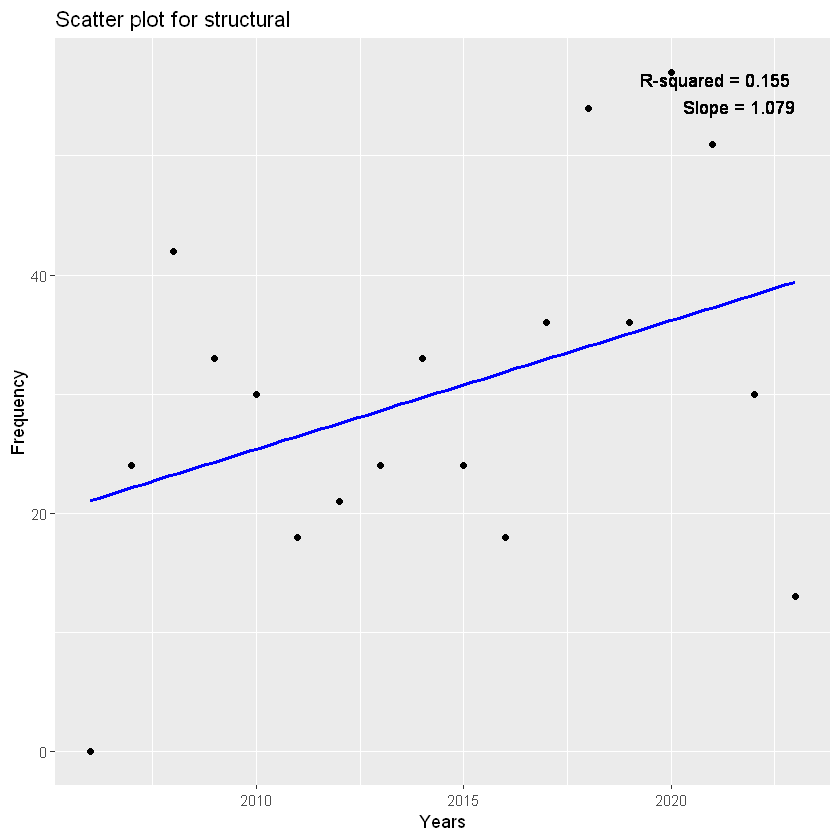

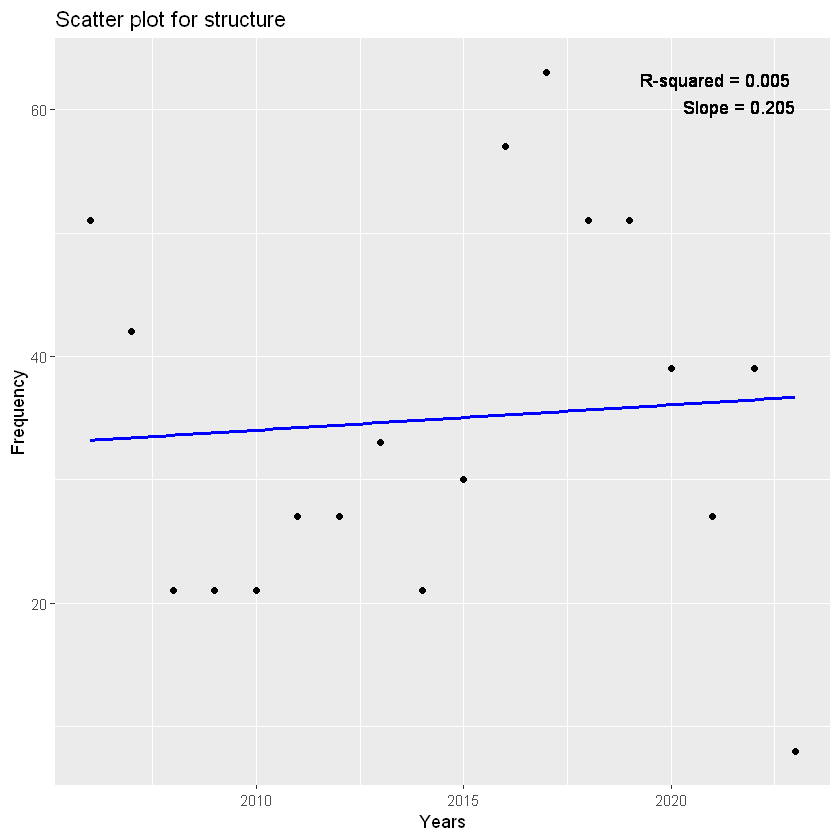

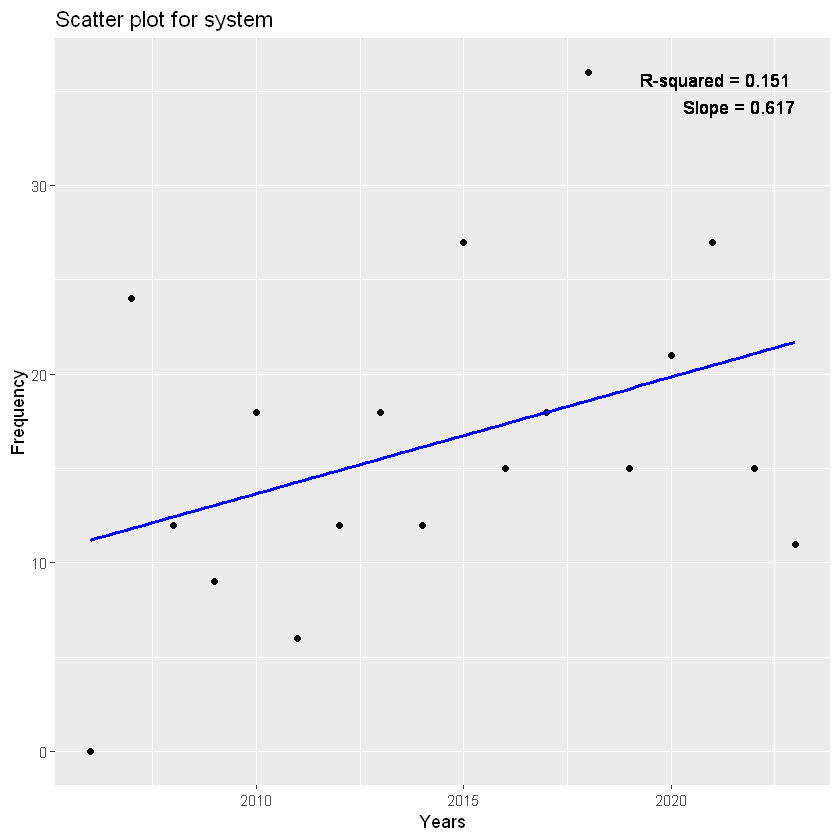

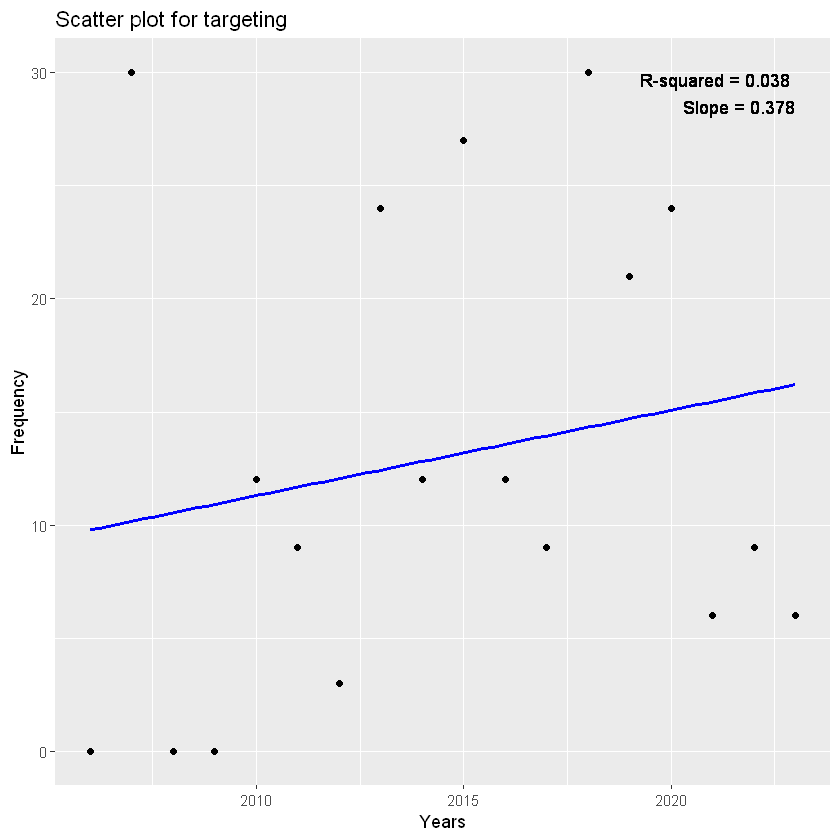

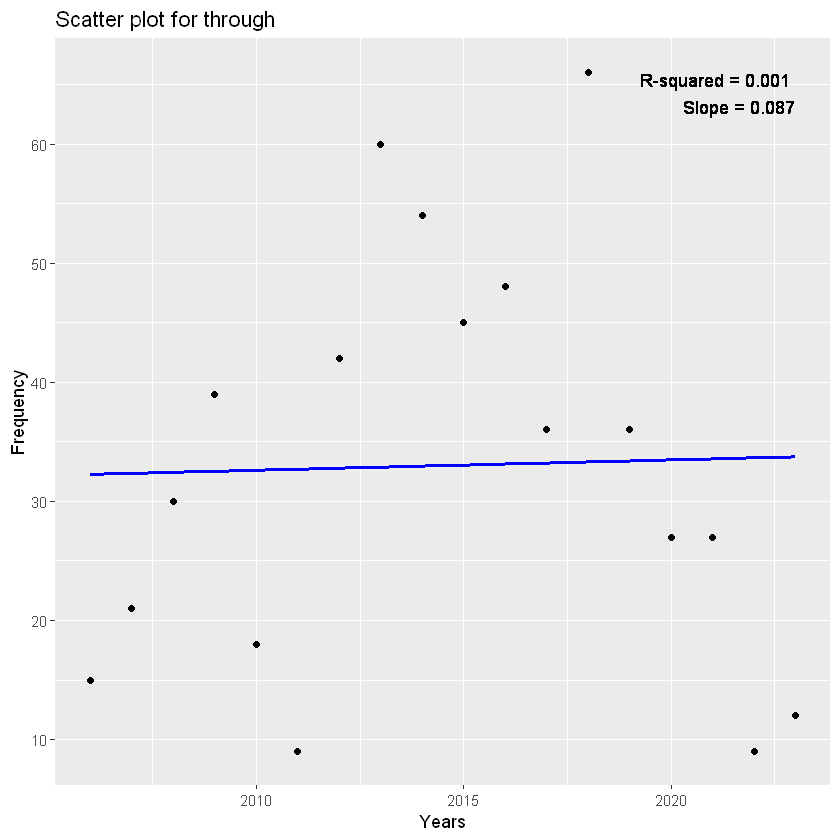

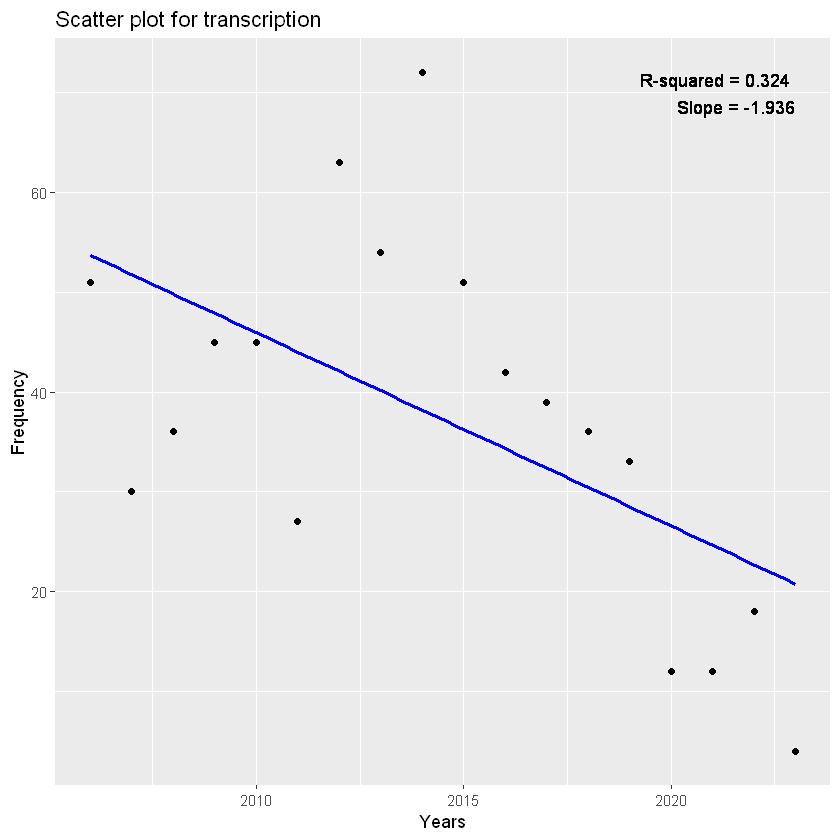

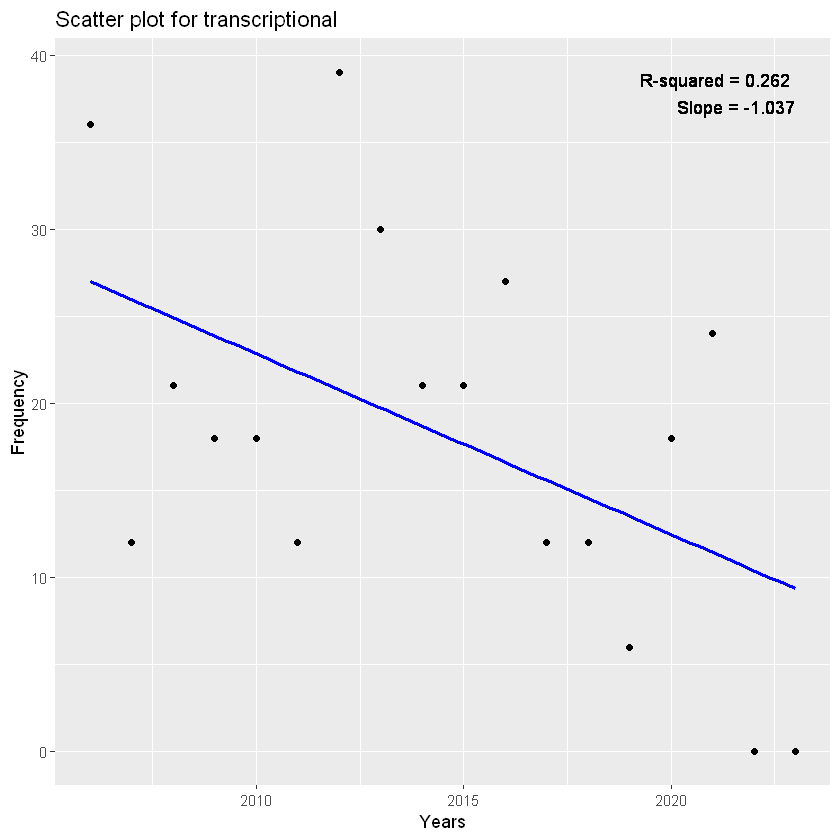

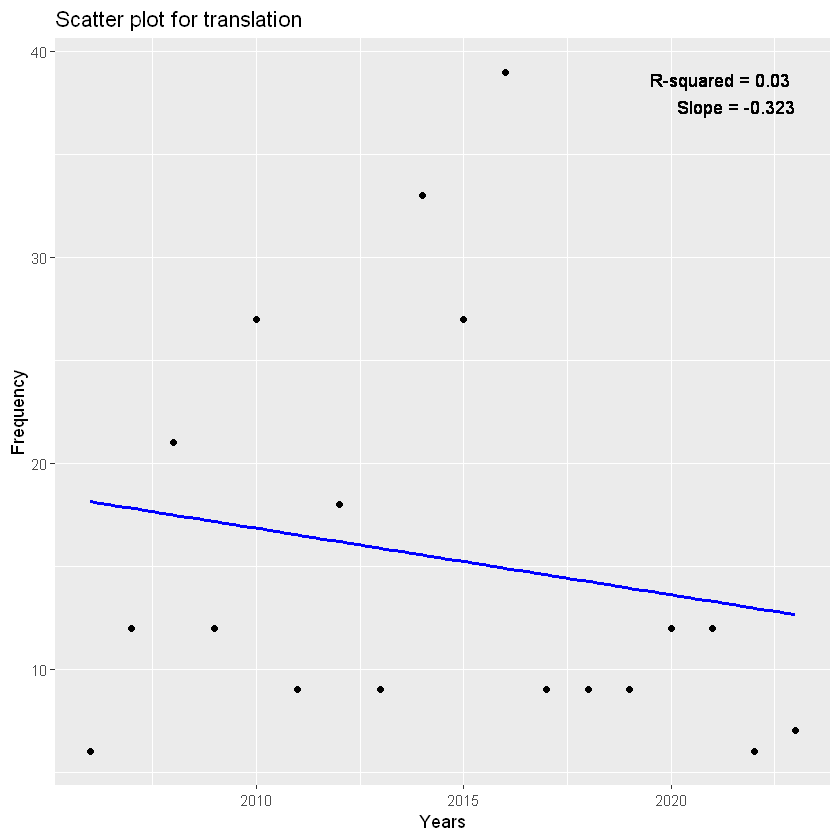

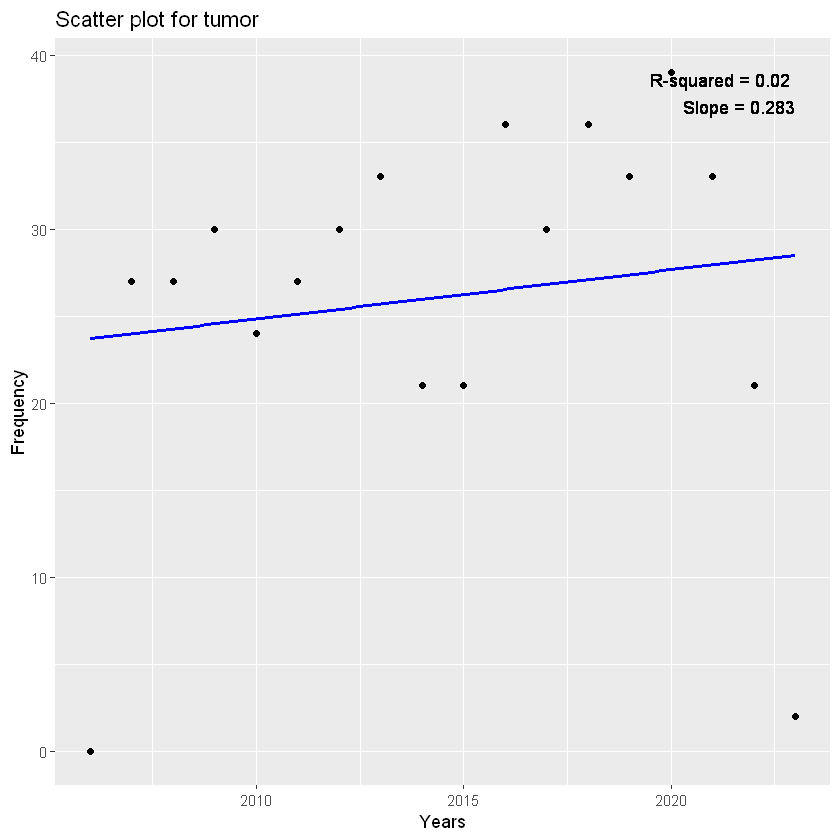

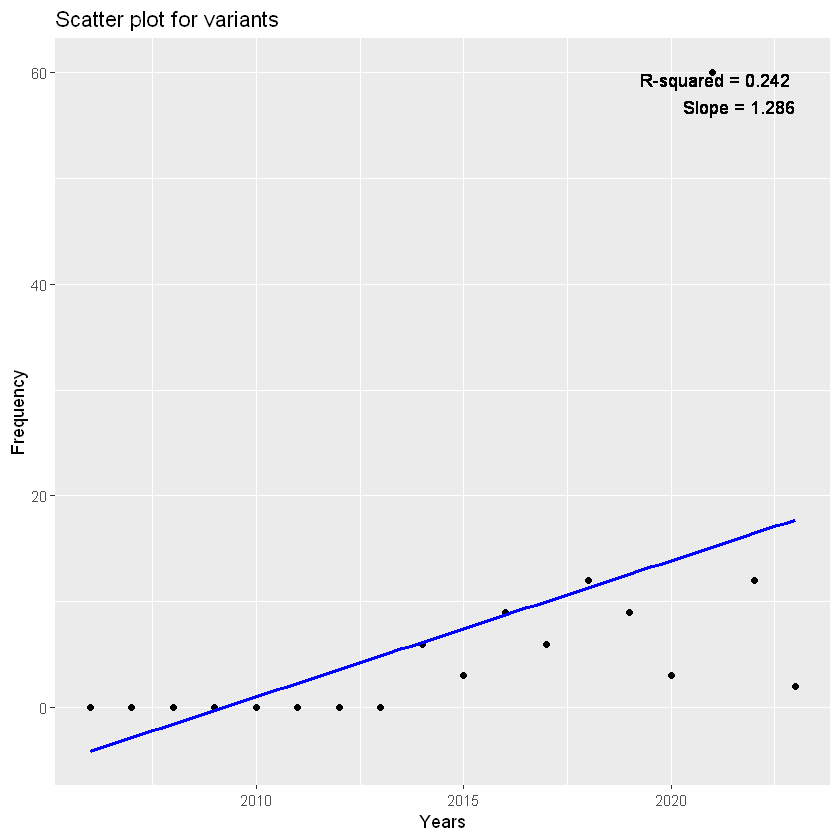

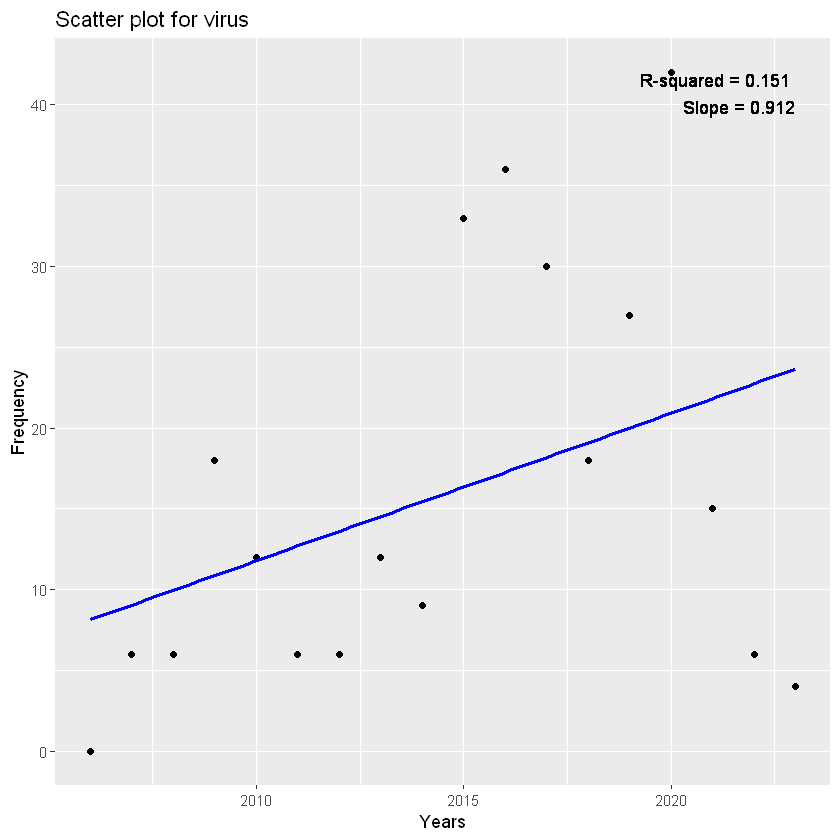

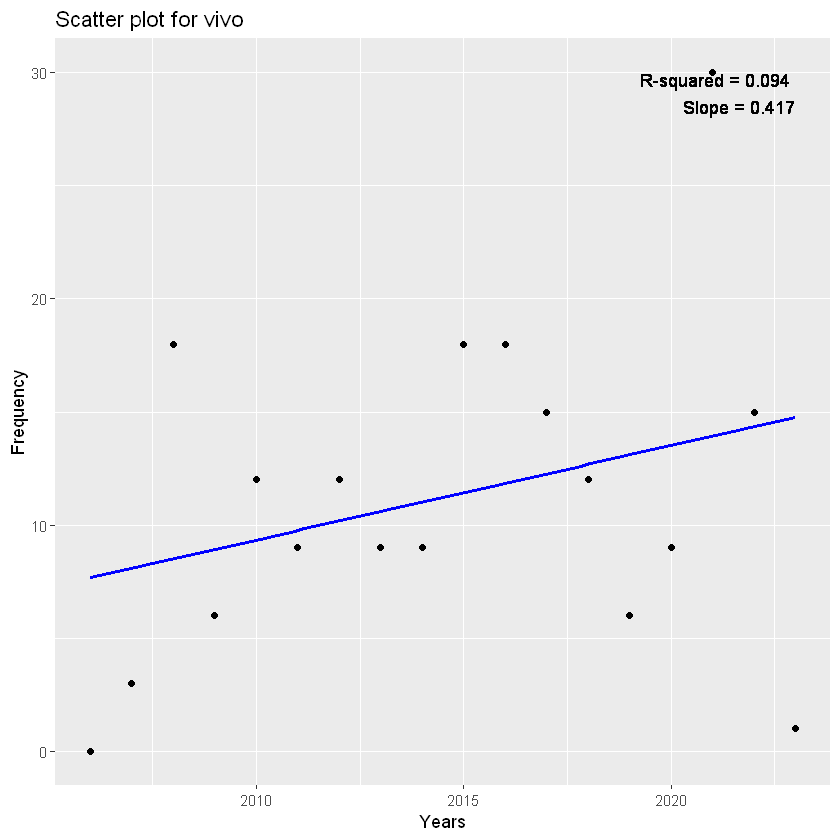

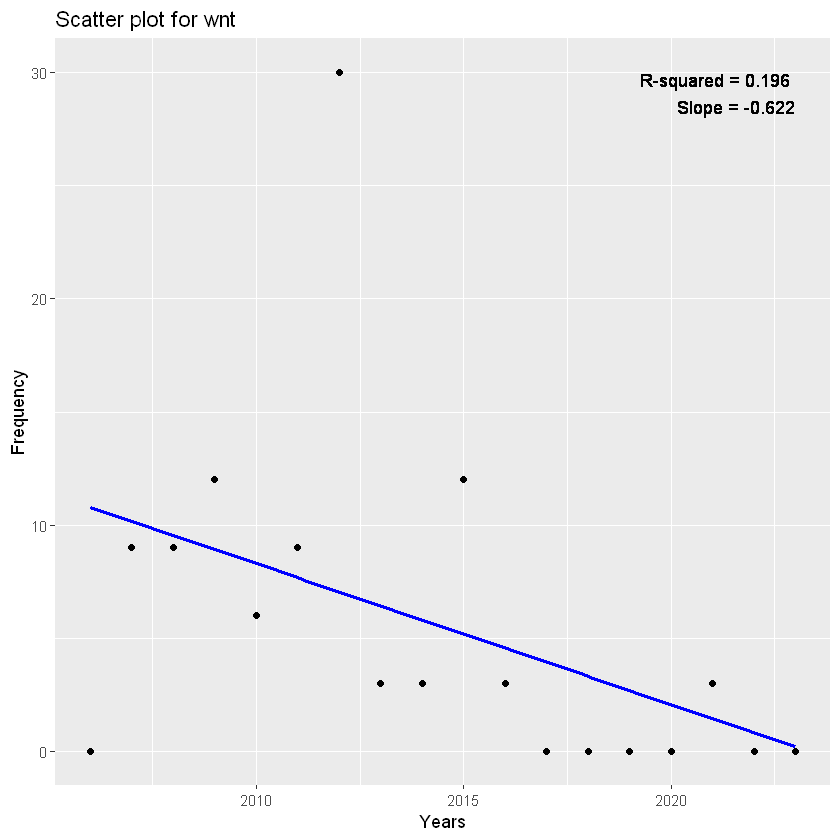

In [18]:
### try to fit a linear model to each scatter plot


for (word in unique_words) {
  word_data <- filtered_data[filtered_data$Word == word, ]
  
  # Fit a linear regression model
  lm_model <- lm(frequency ~ Years, data = word_data)
  
  # Calculate slope and R-squared
  slope <- coef(lm_model)["Years"]
  r_squared <- summary(lm_model)$r.squared
  
  # Create a scatter plot with trendline for the current word
  plot <- ggplot(word_data, aes(x = Years, y = frequency)) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE, color = "blue") +  # Add the trendline
    ggtitle(paste("Scatter plot for", word)) +
    xlab("Years") +
    ylab("Frequency") +
    # Annotate with R-squared and slope values
    geom_text(
      x = max(word_data$Years),  # Adjust position of the text
      y = max(word_data$frequency),  # Adjust position of the text
      label = paste("R-squared =", round(r_squared, 3), "\nSlope =", round(slope, 3)),
      hjust = 1,  # Right-align the text
      vjust = 1   # Top-align the text
    )
  
  # Save or display the scatter plot
  # You can choose to save it using ggsave() or display it using print()
  print(plot)
}

In [19]:
### create a table giving best fit values for each fitted line

# Create an empty list to store results
best_fit_words <- list()

# Loop through each unique word and calculate R-squared
for (word in unique_words) {
  word_data <- filtered_data[filtered_data$Word == word, ]
  
  # Fit a linear regression model
  lm_model <- lm(frequency ~ Years, data = word_data)
  
  # Calculate R-squared
  r_squared <- summary(lm_model)$r.squared
  
  # Store word and R-squared value in the list
  best_fit_words[[word]] <- r_squared
}

# Convert the list to a data frame
best_fit_df <- data.frame(Word = names(best_fit_words), R_squared = unlist(best_fit_words))

# Sort the data frame by R-squared values in descending order
best_fit_sorted <- best_fit_df[order(-best_fit_df$R_squared), ]

# Print the top words with the best R-squared values
print(best_fit_sorted)

                           Word    R_squared
kinase                   kinase 0.8407822397
drosophila           drosophila 0.7821476579
histone                 histone 0.7761858489
proteins               proteins 0.7270160319
required               required 0.7103953983
stem                       stem 0.6261977673
signaling             signaling 0.6196820852
regulation           regulation 0.6063109247
protein                 protein 0.5808820333
pathway                 pathway 0.5741823156
regulates             regulates 0.5728411041
nuclear                 nuclear 0.5448229096
human                     human 0.5398626324
immune                   immune 0.5397840675
singlecell           singlecell 0.5205463544
elegans                 elegans 0.4930986434
atlas                     atlas 0.4928313229
role                       role 0.4795032897
factor                   factor 0.4721083671
host                       host 0.4681941400
embryonic             embryonic 0.4583381441
mediates  

In [20]:
### try to fit logarithmic lines to the plot and check for fit

library(dplyr)
library(ggplot2)

# Function to calculate logarithmic fit
calculate_log_fit <- function(x, a, b) {
  a + b * log(x)
}

# Calculate R-squared for logarithmic fit
calculate_r_squared <- function(fit, data) {
  residuals <- data$frequency - predict(fit, newdata = data)
  ss_residuals <- sum(residuals^2)
  ss_total <- sum((data$frequency - mean(data$frequency))^2)
  r_squared <- 1 - ss_residuals / ss_total
  return(r_squared)
}

# Create data frame to store results
result_table <- data.frame(Word = character(0), BestFitValue = numeric(0))

# Calculate R-squared values for each word's logarithmic fit
for (word in unique(filtered_data$Word)) {
  word_data <- filtered_data[filtered_data$Word == word, ]
  log_fit <- lm(frequency ~ log(Years), data = word_data)
  r_squared <- calculate_r_squared(log_fit, word_data)
  result_table <- rbind(result_table, data.frame(Word = word, BestFitValue = r_squared))
}

# Sort the table based on BestFitValue
sorted_result_table <- result_table %>%
  arrange(desc(BestFitValue))

# Print or display the sorted result table
print(sorted_result_table)


               Word BestFitValue
1            kinase 0.8410210183
2        drosophila 0.7817619255
3           histone 0.7763795135
4          proteins 0.7265880894
5          required 0.7106256062
6              stem 0.6258805139
7         signaling 0.6192401811
8        regulation 0.6058808543
9           protein 0.5810162983
10          pathway 0.5741264778
11        regulates 0.5723127826
12          nuclear 0.5444803418
13            human 0.5403171129
14           immune 0.5400516986
15       singlecell 0.5208044773
16          elegans 0.4925671110
17            atlas 0.4925309359
18             role 0.4799072566
19           factor 0.4717041108
20             host 0.4683566493
21        embryonic 0.4582582371
22         mediates 0.4526787022
23         microrna 0.4423596594
24         antibody 0.4296353679
25         immunity 0.4076094830
26              gut 0.4035289980
27         assembly 0.3982862360
28           drives 0.3876466474
29         controls 0.3375439006
30        

In [21]:
### check for the fit of a polynomial line 

library(dplyr)
library(ggplot2)

# Function to calculate polynomial fit
calculate_poly_fit <- function(x, a, b, c) {
  a + b * x + c * x^2
}

# Calculate R-squared for polynomial fit
calculate_r_squared <- function(fit, data) {
  residuals <- data$frequency - predict(fit, newdata = data)
  ss_residuals <- sum(residuals^2)
  ss_total <- sum((data$frequency - mean(data$frequency))^2)
  r_squared <- 1 - ss_residuals / ss_total
  return(r_squared)
}

# Create data frame to store results
result_table <- data.frame(Word = character(0), BestFitValue = numeric(0))

# Calculate R-squared values for each word's polynomial fit
for (word in unique(filtered_data$Word)) {
  word_data <- filtered_data[filtered_data$Word == word, ]
  poly_fit <- lm(frequency ~ poly(Years, 2), data = word_data)
  r_squared <- calculate_r_squared(poly_fit, word_data)
  result_table <- rbind(result_table, data.frame(Word = word, BestFitValue = r_squared))
}

# Sort the table based on BestFitValue
sorted_result_table_1 <- result_table %>%
  arrange(desc(BestFitValue))

# Print or display the sorted result table
print(sorted_result_table_1)


               Word BestFitValue
1            kinase  0.853833506
2        drosophila  0.818025130
3           histone  0.785452589
4          proteins  0.774795063
5          required  0.724744951
6         signaling  0.679583906
7            neural  0.669789217
8         regulates  0.665306024
9            genome  0.664701146
10       regulation  0.664101462
11             stem  0.656535295
12    transcription  0.654019037
13         dynamics  0.651045422
14         promotes  0.634908460
15     interactions  0.634615379
16    reprogramming  0.627561450
17            human  0.613252151
18          network  0.608393717
19          elegans  0.601860391
20       mechanisms  0.599378598
21       regulatory  0.589459254
22          protein  0.586802469
23          nuclear  0.585710964
24          pathway  0.575205035
25          disease  0.573010596
26           immune  0.565349873
27           cancer  0.564388790
28           growth  0.556375095
29          control  0.551054078
30        

In [22]:
### use Anderson-Darling test to check if data is normally distributed

library(dplyr)
library(nortest)  # For the ad.test() function

# Create data frame to store results
result_table <- data.frame(Word = character(0), AndersonDarlingValue = numeric(0))

# Calculate Anderson-Darling values for each word's Q-Q plot
for (word in unique(filtered_data$Word)) {
  word_data <- filtered_data[filtered_data$Word == word, ]
  
  ad_test_result <- ad.test(word_data$frequency)
  anderson_darling_value <- ad_test_result$statistic
  
  result_table <- rbind(result_table, data.frame(Word = word, AndersonDarlingValue = anderson_darling_value))
}

# Sort the table based on Anderson-Darling values
sorted_result_table_2 <- result_table %>%
  arrange(AndersonDarlingValue)

# Print or display the sorted result table
print(sorted_result_table_2)



               Word AndersonDarlingValue
1     transcription            0.1686067
2              gene            0.1725563
3          proteins            0.1782320
4         signaling            0.1807395
5           through            0.2007373
6           control            0.2017645
7          assembly            0.2089124
8            genome            0.2175979
9     mitochondrial            0.2223172
10       expression            0.2395693
11            cells            0.2545966
12              rna            0.2564411
13         function            0.2605968
14       structural            0.2658556
15  transcriptional            0.2659616
16         receptor            0.2702585
17       regulation            0.2750595
18           neural            0.2793798
19        regulates            0.2802258
20         cellular            0.2848324
21        chromatin            0.2952575
22           system            0.2992120
23         membrane            0.3086049
24          eleg

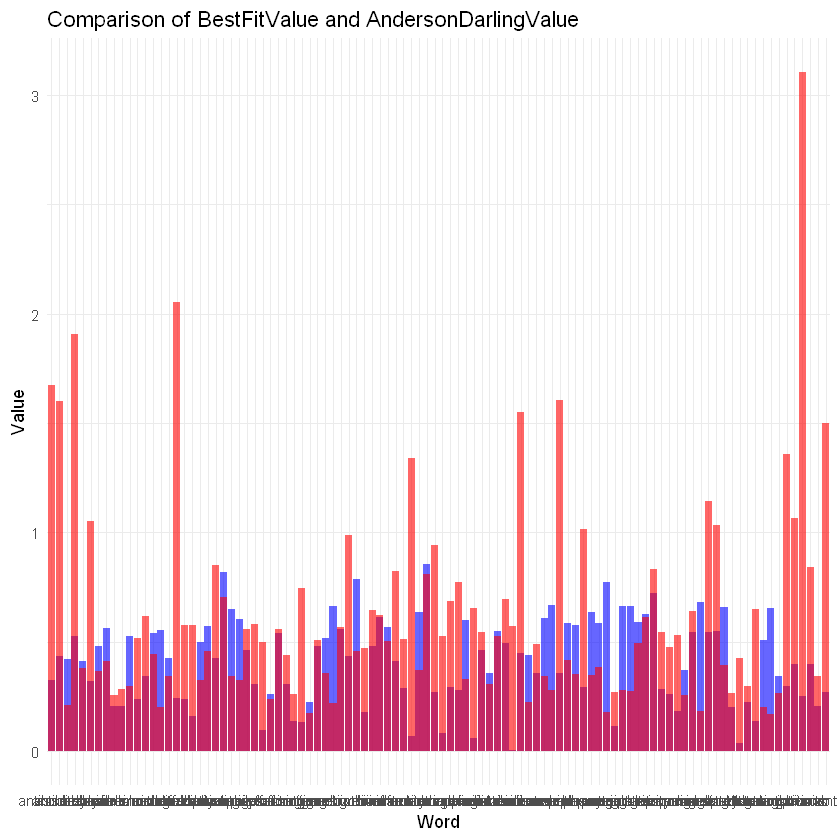

In [24]:
### compare polynomial best fit to AndersonDarlingValue

library(ggplot2)

merged_table <- merge(sorted_result_table_1, sorted_result_table_2, by = "Word", all.x = TRUE)

# Create a bar chart using ggplot
ggplot(merged_table, aes(x = Word)) +
  geom_bar(aes(y = BestFitValue), stat = "identity", position = "dodge", fill = "blue", alpha = 0.6) +
  geom_bar(aes(y = AndersonDarlingValue), stat = "identity", position = "dodge", fill = "red", alpha = 0.6) +
  labs(title = "Comparison of BestFitValue and AndersonDarlingValue",
       x = "Word",
       y = "Value") +
  theme_minimal()


Conclusion: Keywords in titles seem a bad tool to capture trends in Scientific interests. May have to do with the length of Biological research projects and the length of the publication process. Maybe combining different journals would give a different picture.